In [249]:
%matplotlib inline  
import tensorflow as tf
import tensorflow_hub as hub

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import re
import collections

import umap

<h2>Load the Data</h2>

In [316]:

            
def load_data(filename):
    """
    convert the data from text file to dataframe
    """
    headlines=['subid', 'Title', 'author', 'ups', 'downs', 'Have we visited\?', 'created', 'distinguished',\
               'edited', 'num_comments', 'score', 'upvote_ratio', 'OPbody']
    reply_headlines=['id', 'comment author', 'body', 'ups', 'downs', 'parent']
    conversation=pd.DataFrame(columns=set(headlines+reply_headlines))
    df_index=0
    with open(filename, 'rb') as f:
#         all_lines=f.read().decode()
#         all_lines=all_lines.replace('\n',"").replace('\r',"").replace('&#x200B',"")
# #         print(all_lines)
#         lines=all_lines.split('subid')
        lines=f.readlines()
        
        for line in lines:
            try:
                line=line.decode()
            except:
                pass
            line=line
            line=line.replace('\n',"").replace('\r',"").replace('&#x200B',"")
#             print(line)
            if ('subid' in line)|('OPbody' in line):
                splitters=headlines
            else:
                splitters=reply_headlines
            splitters=[splitter+":" for splitter in splitters]
            all_data=re.split('|'.join(splitters), line)[1:]
            all_data=[item.strip(", ") for item in all_data]
            
            if not(all_data):
                continue
            
            if 'subid' in line:
                df_index+=1
                op_subid=all_data[0]
                op_author=all_data[2]
            elif 'OPbody' in line:
                pass
            else:
                df_index+=1
            items_found=[]
            for item in splitters:
                item=item.replace("\?","?")
                if item in line:
                    items_found.append((item.strip(":"), line.index(item)))
#             print(items_found)
#             print(all_data)
            for j, item in enumerate(sorted(items_found, key=lambda x:x[1])):
                col, ind=item
#                 print(j, col, ind, all_data[j])
                conversation.loc[df_index,col]=all_data[j]
            conversation.loc[df_index, 'author']=op_author
            conversation.loc[df_index, 'subid']=op_subid
                
    return conversation
            
                
            

In [314]:
load_data(os.path.join(os.getcwd(),'output.txt' ))

-----------------------------------
subid: a4y6oz, Title: Crying doesn't mean you're weak, it just means you've been strong for too long., author:Tittyminator_Zilla, ups: 70, downs: 0, Have we visited?: False created:1544465971.0, distinguished:None, edited:False,num_comments:17, score:70, upvote_ratio:0.88
[('subid', 0), ('Title', 15), ('author', 103), ('ups', 130), ('downs', 139), ('Have we visited?', 149), ('created', 173), ('distinguished', 195), ('edited', 215), ('num_comments', 228), ('score', 245), ('upvote_ratio', 255)]
['a4y6oz', "Crying doesn't mean you're weak, it just means you've been strong for too long.", 'Tittyminator_Zilla', '70', '0', 'False', '1544465971.0', 'None', 'False', '17', '70', '0.88']
0 subid 0 a4y6oz
1 Title 15 Crying doesn't mean you're weak, it just means you've been strong for too long.
2 author 103 Tittyminator_Zilla
3 ups 130 70
4 downs 139 0
5 Have we visited? 149 False
6 created 173 1544465971.0
7 distinguished 195 None
8 edited 215 False
9 num_comm

[('id', 0), ('comment author', 12), ('body', 42), ('ups', 258), ('downs', 265), ('parent', 274)]
['ebid90x', 'TruthNotSorry', 'May I ask what they did? Obviously enough to feel like years of your life were tainted. I’m feeling the same about my half brothers since my dad died last year....they are greedy manipulative pieces of shit..', '1', '0', 'a4vhu0']
0 id 0 ebid90x
1 comment author 12 TruthNotSorry
2 body 42 May I ask what they did? Obviously enough to feel like years of your life were tainted. I’m feeling the same about my half brothers since my dad died last year....they are greedy manipulative pieces of shit..
3 ups 258 1
4 downs 265 0
5 parent 274 a4vhu0
id:ebiq6aa, comment author:sagewolf28, body:Some people really shouldn't have children. Now that I have my own, I know the struggles and selflessness it requires. Smart and kind parents listen and learn from their kids too. I would never do to my kids the things my mom has done to me, and I'm sorry for the struggles you've had

2 author 70 mentalelf
3 ups 88 16
4 downs 97 0
5 Have we visited? 107 False
6 created 131 1544468479.0
7 distinguished 153 None
8 edited 173 1544468844.0
9 num_comments 193 4
10 score 209 16
11 upvote_ratio 219 1.0
OPbody:I'm not planning anything but the storm is here.. Just have to hold on and wait it out like usual ;(It's just fucking sad. What's the point of all this 'recovery' effort if my life is just going to be like this forever. Ive let everyone down, depression has taken everyone I've ever loved or cared about away from me. Actually I've pushed them away to protect them from being traumatised by how bad things are for me, or been to anxious to attempt hold on to them. 
[('OPbody', 0)]
["I'm not planning anything but the storm is here.. Just have to hold on and wait it out like usual ;(It's just fucking sad. What's the point of all this 'recovery' effort if my life is just going to be like this forever. Ive let everyone down, depression has taken everyone I've ever loved or ca

id:ebj6nal, comment author:HumanNumber57, body:Thanks for the reply - not sure what more can be said at this point , ups:1, downs:0, parent:ebj5yev
[('id', 0), ('comment author', 12), ('body', 42), ('ups', 117), ('downs', 124), ('parent', 133)]
['ebj6nal', 'HumanNumber57', 'Thanks for the reply - not sure what more can be said at this point', '1', '0', 'ebj5yev']
0 id 0 ebj6nal
1 comment author 12 HumanNumber57
2 body 42 Thanks for the reply - not sure what more can be said at this point
3 ups 117 1
4 downs 124 0
5 parent 133 ebj5yev
id:ebj6hfy, comment author:HumanNumber57, body:Me being alive longer means me having more time to fuck everyone else over, which i very much do not want to do but manage to anyways , ups:1, downs:0, parent:ebj6a7p
[('id', 0), ('comment author', 12), ('body', 42), ('ups', 183), ('downs', 190), ('parent', 199)]
['ebj6hfy', 'HumanNumber57', 'Me being alive longer means me having more time to fuck everyone else over, which i very much do not want to do but man

2 body 46 Absolutely accurate representation of my life.
3 ups 100 2
4 downs 107 0
5 parent 116 a4s8kh
id:ebhp1or, comment author:15196, body:This is a mood. I've been out of work and education since September 2017 and honestly, taking a break has helped, but I don't feel any less depressed etc.- if anything, it's worse now I don't have a sense of self or achievement from working. I don't know what I can say to you, because when you feel this low, there isn't much that can be said. I'm proud of you for pushing for so long and doing everything "right" to try and help yourself, like keeping yourself busy and being active. But sometimes there just isn't anything you can do. I have found quetiapine/seroquel to be kind of helpful though. If you can access treatment and are willing to try, I would recommend it, but I won't give you any illusions that recovery will happen quickly. It can take years to heal from this kind of emotional pain and fatigue, and some people just don't get better. Wh

3 ups 57 6
4 downs 65 0
5 Have we visited? 75 False
6 created 99 1544479256.0
7 distinguished 121 None
8 edited 141 False
9 num_comments 154 1
10 score 170 6
11 upvote_ratio 179 0.87
OPbody:This sub has helped me so much. It’s been a hard year for me, and it still is - but you people made me realize there are good people out there that genuinely just want other people to get better. You guys don’t have to take the time out of your life to be nice to a stranger on the internet, but you did. Just want you beautiful souls to know that you made a difference in my life. I still have the urge to kill myself from time to time, but i know to come here instead. I hope 2019 will be a better year for me and for all of those who’ve lost all hopes. When you are at rock bottom, you have no way to go but up. 
[('OPbody', 0)]
['This sub has helped me so much. It’s been a hard year for me, and it still is - but you people made me realize there are good people out there that genuinely just want other pe

5 parent 84 a4zwp5
id:ebj02t6, comment author:handsomehouston, body:hope you find a way bro, ups:1, downs:0, parent:ebiuwtl
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 74), ('downs', 81), ('parent', 90)]
['ebj02t6', 'handsomehouston', 'hope you find a way bro', '1', '0', 'ebiuwtl']
0 id 0 ebj02t6
1 comment author 12 handsomehouston
2 body 44 hope you find a way bro
3 ups 74 1
4 downs 81 0
5 parent 90 ebiuwtl
-----------------------------------
subid: a51vmz, Title: Need some motivation, author:RollsRoyceRICKY, ups: 3, downs: 0, Have we visited?: False created:1544490123.0, distinguished:None, edited:False,num_comments:1, score:3, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 44), ('ups', 68), ('downs', 76), ('Have we visited?', 86), ('created', 110), ('distinguished', 132), ('edited', 152), ('num_comments', 165), ('score', 181), ('upvote_ratio', 190)]
['a51vmz', 'Need some motivation', 'RollsRoyceRICKY', '3', '0', 'False', '1544490123.0', 'None', 'False', '1',

1 comment author 12 handsomehouston
2 body 44 bro you will make it through highschool.

if you want to, you will.

guidance counselers, principals, and teachers have one job; to make sure you graduate.

reach out to them, even if you are the nonexistant student. they will help you, and if they dont then another will., ups:1, downs:0, parent:a4zvmg
[('ups', 117), ('downs', 124), ('parent', 133)]
['1', '0', 'a4zvmg']
0 ups 117 1
1 downs 124 0
2 parent 133 a4zvmg
-----------------------------------
subid: a4v4kp, Title: The world doesn't owe you anything., author:THISWAYHANS, ups: 25, downs: 0, Have we visited?: False created:1544443862.0, distinguished:None, edited:False,num_comments:4, score:25, upvote_ratio:0.96
[('subid', 0), ('Title', 15), ('author', 59), ('ups', 79), ('downs', 88), ('Have we visited?', 98), ('created', 122), ('distinguished', 144), ('edited', 164), ('num_comments', 177), ('score', 193), ('upvote_ratio', 203)]
['a4v4kp', "The world doesn't owe you anything.", 'THISWA

9 num_comments 197 3
10 score 213 9
11 upvote_ratio 222 0.8
OPbody:
[('OPbody', 0)]
['']
0 OPbody 0 
id:ebizg3m, comment author:destroyer629, body:Me 500 million. I think about the sweet release of death on the daily. I wish I wasn’t such a fucking piece of shit coward, ups:2, downs:0, parent:a4x3vc
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 170), ('downs', 177), ('parent', 186)]
['ebizg3m', 'destroyer629', 'Me 500 million. I think about the sweet release of death on the daily. I wish I wasn’t such a fucking piece of shit coward', '2', '0', 'a4x3vc']
0 id 0 ebizg3m
1 comment author 12 destroyer629
2 body 41 Me 500 million. I think about the sweet release of death on the daily. I wish I wasn’t such a fucking piece of shit coward
3 ups 170 2
4 downs 177 0
5 parent 186 a4x3vc
id:ebi4q5q, comment author:Emsaic, body:Me too, ups:1, downs:0, parent:a4x3vc
[('id', 0), ('comment author', 12), ('body', 35), ('ups', 48), ('downs', 55), ('parent', 64)]
['ebi4q5q', 'Emsaic', 'Me too

9 num_comments 192 2
10 score 208 1
11 upvote_ratio 217 0.67
OPbody:For the last couple of weeks my boyfriend have started to talk about suicide again. He has had a history of suicide attempts before we met. Everything was great the first 6 months of us seeing each other, but now he doesnt feel good.It started off with him not contacting me nor responding me for a week. I had this gut feeling he's going back tl his old habits. Turns out he was feeling more and more hopeless, he says that theres no meaning in life. That everything is a repetead cycle, everything is a pattern.I encouraged him to apply for school next semester and he did and looked forward to it. But now its like it doesnt even matter anymore. The past 2 weeks has been so scary, he's really down and avoids me. He keeps postponing us meeting. I've been trying to set up something for us to do, or to just go over to his place and talk but he finds excuses for not meeting. Today he told me its because he's in a bad place. He 

1 comment author 12 mentalelf
2 body 38 I like your username, Id like to think it so
3 ups 90 1
4 downs 97 0
5 parent 106 ebihvmz
id:ebii7xu, comment author:MagicTurtlesFly, body:it would be pretty cool.., ups:2, downs:0, parent:ebii1yt
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 76), ('downs', 83), ('parent', 92)]
['ebii7xu', 'MagicTurtlesFly', 'it would be pretty cool..', '2', '0', 'ebii1yt']
0 id 0 ebii7xu
1 comment author 12 MagicTurtlesFly
2 body 44 it would be pretty cool..
3 ups 76 2
4 downs 83 0
5 parent 92 ebii1yt
id:ebiidvm, comment author:mentalelf, body:Isn't it like, technically possible with all that quantum mechanics stuff. According to quantum theory anything is possible, just odds that are so low that it will likely never happen , ups:1, downs:0, parent:ebii7xu
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 229), ('downs', 236), ('parent', 245)]
['ebiidvm', 'mentalelf', "Isn't it like, technically possible with all that quantum mechanics stuff.

4 downs 294 0
5 parent 303 a4wso7
id:ebid32z, comment author:Jefafa77, body:I dont know your entire situation ofcourse but it might be a good idea to go, especially if your SO wants you to go (as long as he/she has the right intentions)., ups:1, downs:0, parent:a4wso7
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 205), ('downs', 212), ('parent', 221)]
['ebid32z', 'Jefafa77', 'I dont know your entire situation ofcourse but it might be a good idea to go, especially if your SO wants you to go (as long as he/she has the right intentions).', '1', '0', 'a4wso7']
0 id 0 ebid32z
1 comment author 12 Jefafa77
2 body 37 I dont know your entire situation ofcourse but it might be a good idea to go, especially if your SO wants you to go (as long as he/she has the right intentions).
3 ups 205 1
4 downs 212 0
5 parent 221 a4wso7
id:ebie30c, comment author:just-a-bit-bored, body:Sorry man, I know how you feel. Mine tried to get me to commit suicide with her.
[('id', 0), ('comment author', 1

OPbody:I pray I don’t botch this attempt too badly 🤞🏽.If anyone ever wonders why, it was mostly because of my mom... too much trauma, and it just got to me over the years I guess, sorry, but I’ve been feeling physical and mental pain on a day-to-day basis, and have been feeling those pains for 2+ years now, and even though I would bring it up to you all the time, you would still ignore me. I just can’t get over all the times you used to beat me and drag me around the house. Sometimes I would scream and beg for you to stop while you were slamming my head into the bath tub. I would bring it up to you for reconciliation, but you would turn a deaf ear and pretend like nothing ever happened. You shattered my self esteem from the age of 5 and made it impossible for me to love myself. I’ve been trying to do this for a few weeks, hell maybe even months, and I really don’t want to die. But I need a break from you and life, even if I can never come back. Sorry ❤️. Idk if anyone will ever read th

2 author 39 deanisded
3 ups 57 3
4 downs 65 0
5 Have we visited? 75 False
6 created 99 1544475836.0
7 distinguished 121 None
8 edited 141 False
9 num_comments 154 0
10 score 170 3
11 upvote_ratio 179 0.8
OPbody:I'm a 20 year old trans guy, and I've been struggling with mental health stuff for a very long time. I started to feel anxious and depressed when I was around ten, and it just got worse from there. When puberty hit, I hated how I was starting to get curves and look womanly, so I ended up developing an eating disorder which I still have to this day. Abusive relationships and abusive parents have left me feeling like I will never be worthy or deserving of love. I also recently got diagnosed with BPD after years of my mental health issues not being taken seriously. I've destroyed my thighs and my arm with self harm that's been going on since I was 12. I've had so many suicide attempts that I've lost count. My dysphoria makes me feel like ripping off my skin and it makes me overly a

2 body 37 Thank you so frickin much you actually made me cry a bit ❤️❤️
3 ups 105 2
4 downs 112 0
5 parent 121 ebits2h
id:ebitzpe, comment author:kodiak8817, body:No need to thank anybody, glad I could help. , ups:1, downs:0, parent:ebitxjj
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 91), ('downs', 98), ('parent', 107)]
['ebitzpe', 'kodiak8817', 'No need to thank anybody, glad I could help.', '1', '0', 'ebitxjj']
0 id 0 ebitzpe
1 comment author 12 kodiak8817
2 body 39 No need to thank anybody, glad I could help.
3 ups 91 1
4 downs 98 0
5 parent 107 ebitxjj
-----------------------------------
subid: a4yqhg, Title: Ramblings, author:ohTHATone, ups: 3, downs: 0, Have we visited?: False created:1544469348.0, distinguished:None, edited:False,num_comments:0, score:3, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 33), ('ups', 51), ('downs', 59), ('Have we visited?', 69), ('created', 93), ('distinguished', 115), ('edited', 135), ('num_comments', 148), ('score', 164), 

0 OPbody 0 I'm from south america so i can't really describe my problem with exact terms since the educational system is different here, I currently assist to a technnical highschool (if that's how you call it) and for reasons i can't explain very well (it's not that my parents don't want me to go to a different school, it's more of a school related problem) , i can't get out of this prison, the degenerates i have to go with, the subjects i hate and fail at, drive me simply insane. when i had the opportunity to get out i didn't take it, dumbest decision of all time, will haunt me forever. to this point i see my life headed towards one direction: living in the street because of some dumb school thing.
-----------------------------------
subid: a4w2m1, Title: Logistically Speaking, I Should Kill Myself, author:PagliacciNeedsHugs, ups: 6, downs: 0, Have we visited?: False created:1544451860.0, distinguished:None, edited:False,num_comments:1, score:6, upvote_ratio:0.8
[('subid', 0), ('Titl

1 downs 118 0
2 parent 127 ebi8iyi
id:ebi6l2t, comment author:StaySharpp, body:Sure, there are things in life that make me happy. Still doesn't take away from the fact that I want to end my life. That will always be there.
[('id', 0), ('comment author', 12), ('body', 39)]
['ebi6l2t', 'StaySharpp', "Sure, there are things in life that make me happy. Still doesn't take away from the fact that I want to end my life. That will always be there."]
0 id 0 ebi6l2t
1 comment author 12 StaySharpp
2 body 39 Sure, there are things in life that make me happy. Still doesn't take away from the fact that I want to end my life. That will always be there.

The one thing I had going for me is that I'm in nursing school hoping to some day work in medicine. However, my grades are so poor that finding any sort of work (hell, even passing school in the first place) is slim at best. Who wants to hire someone who is doing shit in school - the basis of my practice. I'm a liability; I'm dangerous from the hospit

3 ups 385 2
4 downs 392 0
5 parent 401 a4ygay
id:ebig9x4, comment author:Rasputia__Latimore, body:Why would you do this as soon as you turn 18 and enter adult hood? You're about to be free from your awful parents and make a life for yourself, and now you want to throw it all away? That makes no sense? Doing this because you're vindictive makes you look bad, not your parents...they'll see this post sooner or later. Just please don't, ups:-1, downs:0, parent:a4ygay
[('id', 0), ('comment author', 12), ('body', 47), ('ups', 391), ('downs', 399), ('parent', 408)]
['ebig9x4', 'Rasputia__Latimore', "Why would you do this as soon as you turn 18 and enter adult hood? You're about to be free from your awful parents and make a life for yourself, and now you want to throw it all away? That makes no sense? Doing this because you're vindictive makes you look bad, not your parents...they'll see this post sooner or later. Just please don't", '-1', '0', 'a4ygay']
0 id 0 ebig9x4
1 comment author 12 Rasp

5 parent 542 a4wt52
id:ebi748b, comment author:lil_gold_, body:Hi, ups:1, downs:0, parent:a4wt52
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 47), ('downs', 54), ('parent', 63)]
['ebi748b', 'lil_gold_', 'Hi', '1', '0', 'a4wt52']
0 id 0 ebi748b
1 comment author 12 lil_gold_
2 body 38 Hi
3 ups 47 1
4 downs 54 0
5 parent 63 a4wt52
id:ebiam4c, comment author:curly-687, body:I am trying but no one accept me 😭, ups:1, downs:0, parent:ebi3ohu
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 79), ('downs', 86), ('parent', 95)]
['ebiam4c', 'curly-687', 'I am trying but no one accept me 😭', '1', '0', 'ebi3ohu']
0 id 0 ebiam4c
1 comment author 12 curly-687
2 body 38 I am trying but no one accept me 😭
3 ups 79 1
4 downs 86 0
5 parent 95 ebi3ohu
-----------------------------------
subid: a51l9j, Title: Do you ever...?, author:KnightRider117, ups: 0, downs: 0, Have we visited?: False created:1544487974.0, distinguished:None, edited:False,num_comments:0, score:0, upvote_ratio:0.

id:ebj5fro, comment author:fatvirginguy24, body:What happened , ups:1, downs:0, parent:a51dpp
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 64), ('downs', 71), ('parent', 80)]
['ebj5fro', 'fatvirginguy24', 'What happened', '1', '0', 'a51dpp']
0 id 0 ebj5fro
1 comment author 12 fatvirginguy24
2 body 43 What happened
3 ups 64 1
4 downs 71 0
5 parent 80 a51dpp
-----------------------------------
subid: a519hq, Title: 67 More Days, author:Captain_MakeItHappen, ups: 1, downs: 0, Have we visited?: False created:1544485657.0, distinguished:None, edited:False,num_comments:0, score:1, upvote_ratio:0.66
[('subid', 0), ('Title', 15), ('author', 36), ('ups', 65), ('downs', 73), ('Have we visited?', 83), ('created', 107), ('distinguished', 129), ('edited', 149), ('num_comments', 162), ('score', 178), ('upvote_ratio', 187)]
['a519hq', '67 More Days', 'Captain_MakeItHappen', '1', '0', 'False', '1544485657.0', 'None', 'False', '0', '1', '0.66']
0 subid 0 a519hq
1 Title 15 67 More Days
2 au

1 comment author 12 None
2 body 33 [deleted]
3 ups 49 1
4 downs 56 0
5 parent 65 ebhyr24
id:ebhz117, comment author:gotnoskillz, body:Im on the same boat and I believe most others too, part of the reason it's this bad is due to faking being ok towards the rest of the world while we have only gotten worse from one day to the next., ups:3, downs:0, parent:ebhbqic
[('id', 0), ('comment author', 12), ('body', 40), ('ups', 244), ('downs', 251), ('parent', 260)]
['ebhz117', 'gotnoskillz', "Im on the same boat and I believe most others too, part of the reason it's this bad is due to faking being ok towards the rest of the world while we have only gotten worse from one day to the next.", '3', '0', 'ebhbqic']
0 id 0 ebhz117
1 comment author 12 gotnoskillz
2 body 40 Im on the same boat and I believe most others too, part of the reason it's this bad is due to faking being ok towards the rest of the world while we have only gotten worse from one day to the next.
3 ups 244 3
4 downs 251 0
5 parent 

2 author 126 zenmindfulness
3 ups 149 2
4 downs 157 0
5 Have we visited? 167 False
6 created 191 1544466401.0
7 distinguished 213 None
8 edited 233 False
9 num_comments 246 1
10 score 262 2
11 upvote_ratio 271 1.0
OPbody:In short, I’m a loser. I can’t wait to check out!!
[('OPbody', 0)]
['In short, I’m a loser. I can’t wait to check out!!']
0 OPbody 0 In short, I’m a loser. I can’t wait to check out!!
id:ebiihd4, comment author:skeetinyoureye666, body:Same., ups:2, downs:0, parent:a4y96q
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 58), ('downs', 65), ('parent', 74)]
['ebiihd4', 'skeetinyoureye666', 'Same.', '2', '0', 'a4y96q']
0 id 0 ebiihd4
1 comment author 12 skeetinyoureye666
2 body 46 Same.
3 ups 58 2
4 downs 65 0
5 parent 74 a4y96q
-----------------------------------
subid: a4w4uh, Title: The only reason I haven’t killed myself.., author:bikramxo, ups: 3, downs: 0, Have we visited?: False created:1544452346.0, distinguished:None, edited:False,num_comments:1, score:3,

4 downs 155 0
5 parent 164 ebi4dtx
id:ebidl1w, comment author:Skeier, body:And tell them what? , ups:1, downs:0, parent:ebi4i9w
[('id', 0), ('comment author', 12), ('body', 35), ('ups', 62), ('downs', 69), ('parent', 78)]
['ebidl1w', 'Skeier', 'And tell them what?', '1', '0', 'ebi4i9w']
0 id 0 ebidl1w
1 comment author 12 Skeier
2 body 35 And tell them what?
3 ups 62 1
4 downs 69 0
5 parent 78 ebi4i9w
id:ebidso2, comment author:Idulus, body:Tell them, that you are feeling sad atm and the reasons why you feel like this. If you don't know why you feel sad, then tell them, that you don't know why. Maybe they have an idea on how to help you, that you haven't thought about yet?, ups:1, downs:0, parent:ebidl1w
[('id', 0), ('comment author', 12), ('body', 35), ('ups', 278), ('downs', 285), ('parent', 294)]
['ebidso2', 'Idulus', "Tell them, that you are feeling sad atm and the reasons why you feel like this. If you don't know why you feel sad, then tell them, that you don't know why. Maybe they

2 body 38 HAPPY BIRTHDAY!!!🎂🤗 I hope you give "being 18" a chance. Best of luck and cheers!🍻
3 ups 127 3
4 downs 134 0
5 parent 143 a4q0dr
id:ebgrt1e, comment author:h3llr4iser96, body:Happy birthday man, 
[('id', 0), ('comment author', 12), ('body', 41)]
['ebgrt1e', 'h3llr4iser96', 'Happy birthday man']
0 id 0 ebgrt1e
1 comment author 12 h3llr4iser96
2 body 41 Happy birthday man

I know it seems like everything is shit. I was like that on my 18th birthday too. No matter what happens man just try and stay focused. Don’t let your emotions get the best of you. 
“If you’re going through hell, keep going.” — Winston Churchill. , ups:2, downs:0, parent:a4q0dr
[('ups', 67), ('downs', 74), ('parent', 83)]
['2', '0', 'a4q0dr']
0 ups 67 2
1 downs 74 0
2 parent 83 a4q0dr
id:ebh8y8q, comment author:techknowAthena, body:You're an adult now, so go make your own life. No reason to not at least give it a shot on your own., ups:2, downs:0, parent:a4q0dr
[('id', 0), ('comment author', 12), ('body', 43)

1 downs 48 0
2 parent 57 ebidpns
id:ebim7rd, comment author:ersatz101, body:School was absolute hell for me, but I always chalked that up to the tense and competitive environment that a school can give, the illusion of constantly failing and never meeting up to the expectations of teachers/peers, which absolutely exists and causes many intelligent people to develop imposter syndrome. Once I was done with school and had people tell me the truth of how much I was messing up is when I realized how much I truly struggled cognitively and how hindered I truly was/how incompetent I am. You might be a victim of your environment, freind., ups:1, downs:0, parent:ebiiotr
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 605), ('downs', 612), ('parent', 621)]
['ebim7rd', 'ersatz101', 'School was absolute hell for me, but I always chalked that up to the tense and competitive environment that a school can give, the illusion of constantly failing and never meeting up to the expectations of te

2 body 42 My suicidal thoughts have become completely pervasive it's all I can think about. I just try to keep finding reasons to keep living before it gets too much.
3 ups 205 2
4 downs 212 0
5 parent 221 a4ltze
id:ebhnb5s, comment author:bleachissourwater, body:oh, all the time! , ups:2, downs:0, parent:a4ltze
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 71), ('downs', 78), ('parent', 87)]
['ebhnb5s', 'bleachissourwater', 'oh, all the time!', '2', '0', 'a4ltze']
0 id 0 ebhnb5s
1 comment author 12 bleachissourwater
2 body 46 oh, all the time!
3 ups 71 2
4 downs 78 0
5 parent 87 a4ltze
id:ebg8t1o, comment author:FineEquivalent, body:I get urges to stab myself violently so I would bleed out. Typically in the chest, neck or wrist. Sometimes I hit myself with my fist like I'm holding a knife. , ups:1, downs:0, parent:a4ltze
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 210), ('downs', 217), ('parent', 226)]
['ebg8t1o', 'FineEquivalent', "I get urges to stab myself

7 distinguished 233 None
8 edited 253 False
9 num_comments 266 5
10 score 282 3
11 upvote_ratio 291 0.72
OPbody:I have no friends or SO left. I’ve gotten rid of them all. For a while now I’ve been focusing on university and rebuilding the relationship with the rest of my family. I’m glad to say that in a long time, I finally feel like my family accepts me. We’ve spoken more, we go out and my grades are improving. I saved two courses from failing to near distinction and I feel like this can go on until I graduate.The weird thing is that being high right now and seeing this from another perspective, I’ve been hit with a feeling of sadness. Sadness and this feeling that tonight is my night. It’s 11:40PM right now in Sydney. I’ve got my headphones in, posting on reddit. I’ve had my suicide note written for a while now and I’ve left enough hints for someone to find it. I just feel like I’ve accomplished everything I need to accomplish. Quit while you’re ahead. That’s me. If I see this post 

8 edited 176 False
9 num_comments 189 3
10 score 205 2
11 upvote_ratio 214 1.0
OPbody:Whenever I last decided, the 21st was my chosen date. It's a Friday, the last day of class - so if anyone from school finds out, it won't be for a few weeks after I'm gone.;I'm so tired of all this shit. I just want to do it already. I'm still stressing about school work even though there's literally no point, so I might as well go now. It's unlikely to be tonight, I just have to keep the urges at bay.;I don't think I'm fully human. Either that or someone's out there trying to make me desperate enough to go ahead with all this. I don't blame them.;I feel so bad for my mum. She lost her dad a few weeks ago and I don't want to hurt her, but she'll get over me. I'm just a controlling, rude, ungreatful shit.;I feel so bad for H. We met in a psychiatric hospital last year and she's struggled a lot with two other suicides this year, The last one was my closest friend. I was the only one who could have stopp

0 id 0 ebiqtm5
1 comment author 12 keisbauaj
2 body 38 My chances are less than 1%. It's really not worth living for that. I'm sorry you didn't give me a good reason to keep on living
3 ups 173 1
4 downs 180 0
5 parent 189 ebiqob2
id:ebir61a, comment author:mentalelf, body:I hope someone else can help , ups:2, downs:0, parent:ebiqtm5
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 74), ('downs', 81), ('parent', 90)]
['ebir61a', 'mentalelf', 'I hope someone else can help', '2', '0', 'ebiqtm5']
0 id 0 ebir61a
1 comment author 12 mentalelf
2 body 38 I hope someone else can help
3 ups 74 2
4 downs 81 0
5 parent 90 ebiqtm5
id:ebiqw0m, comment author:mentalelf, body:Ok, ups:1, downs:0, parent:ebiqtm5
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 47), ('downs', 54), ('parent', 63)]
['ebiqw0m', 'mentalelf', 'Ok', '1', '0', 'ebiqtm5']
0 id 0 ebiqw0m
1 comment author 12 mentalelf
2 body 38 Ok
3 ups 47 1
4 downs 54 0
5 parent 63 ebiqtm5
id:ebirebm, comment author:keisbauaj, 

1 downs 9 0
2 parent 18 ebhf1qi
id:ebhfbnk, comment author:heythereitsbeth, body:It sounds like you should definitely go to a doctor and seek professional help , ups:1, downs:0, parent:ebhf9yj
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 130), ('downs', 137), ('parent', 146)]
['ebhfbnk', 'heythereitsbeth', 'It sounds like you should definitely go to a doctor and seek professional help', '1', '0', 'ebhf9yj']
0 id 0 ebhfbnk
1 comment author 12 heythereitsbeth
2 body 44 It sounds like you should definitely go to a doctor and seek professional help
3 ups 130 1
4 downs 137 0
5 parent 146 ebhf9yj
id:ebhlv6j, comment author:YaBaeAmin, body:World is hard man. You got to live with it, and be happy to be alive. What you call a horrible live is heaven for some people. Even if you dont have good parents., ups:0, downs:0, parent:ebhf9yj
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 207), ('downs', 214), ('parent', 223)]
['ebhlv6j', 'YaBaeAmin', 'World is hard man. You got t

5 parent 78 ebj6vii
-----------------------------------
subid: a4tlzn, Title: The only thing I want is to kill myself, author:redditsmurfLUL, ups: 6, downs: 0, Have we visited?: False created:1544427508.0, distinguished:None, edited:False,num_comments:1, score:6, upvote_ratio:0.88
[('subid', 0), ('Title', 15), ('author', 63), ('ups', 86), ('downs', 94), ('Have we visited?', 104), ('created', 128), ('distinguished', 150), ('edited', 170), ('num_comments', 183), ('score', 199), ('upvote_ratio', 208)]
['a4tlzn', 'The only thing I want is to kill myself', 'redditsmurfLUL', '6', '0', 'False', '1544427508.0', 'None', 'False', '1', '6', '0.88']
0 subid 0 a4tlzn
1 Title 15 The only thing I want is to kill myself
2 author 63 redditsmurfLUL
3 ups 86 6
4 downs 94 0
5 Have we visited? 104 False
6 created 128 1544427508.0
7 distinguished 150 None
8 edited 170 False
9 num_comments 183 1
10 score 199 6
11 upvote_ratio 208 0.88
OPbody:Nothing is enjoyable anymore. I don’t want to do anything with my l

4 downs 118 0
5 Have we visited? 128 False
6 created 152 1544450737.0
7 distinguished 174 None
8 edited 194 1544454752.0
9 num_comments 214 16
10 score 231 1
11 upvote_ratio 240 0.54
OPbody:So today I just posted a thread and it is kinda the first time I opened up to being suicidal. The link is here.;[https://www.reddit.com/r/SuicideWatch/comments/a4ub0q/if\_you\_know\_your\_life\_is\_hopeless\_and\_continuing/](https://www.reddit.com/r/SuicideWatch/comments/a4ub0q/if_you_know_your_life_is_hopeless_and_continuing/);I was expecting my thread would get a lot of attention with comments and upvotes but it depresses me to see that even if my life is ending hardly anyone is going to notice. At the rate it is going the thread will probably just wither away.;Are people not commenting nor upvoting because they know I'm right and they just don't want to be the one to say it?;I have come to the point in my life that I am willing to end myself but the truth is I want someone to be able to convince

3 ups 309 2
4 downs 316 0
5 parent 325 ebidm8r
id:ebidxn6, comment author:YA-BOI-WILDCOCK, body:no there is no one that gives a shit about my existence. my grades were A-B whole time and my parent were not giving a shit, ups:1, downs:0, parent:ebidt3r
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 174), ('downs', 181), ('parent', 190)]
['ebidxn6', 'YA-BOI-WILDCOCK', 'no there is no one that gives a shit about my existence. my grades were A-B whole time and my parent were not giving a shit', '1', '0', 'ebidt3r']
0 id 0 ebidxn6
1 comment author 12 YA-BOI-WILDCOCK
2 body 44 no there is no one that gives a shit about my existence. my grades were A-B whole time and my parent were not giving a shit
3 ups 174 1
4 downs 181 0
5 parent 190 ebidt3r
id:ebie4vv, comment author:Twitch_Earthomon, body:Think about it from their perspective, why do they hate you? Even if it’s something untrue it’s important to notice it., ups:2, downs:0, parent:ebidxn6
[('id', 0), ('comment author', 12), ('

1 Title 15 Received a threatening message. Worried about its implications.
2 author 87 StrikingWorld
3 ups 109 1
4 downs 117 0
5 Have we visited? 127 False
6 created 151 1544461523.0
7 distinguished 173 None
8 edited 193 False
9 num_comments 206 0
10 score 222 1
11 upvote_ratio 231 1.0
OPbody:Basically in my email. I received a rather nasty blackmailing message from 'hackers' who were threatening to leak my private stuff and wanted payment of bitcoin.Now I deleted the email and changed the password.  The message was vague enough that I think it was just a scam. But when I contacted the IT people, they were not very helpful and it makes me think what if these 'hackers' targeted someone even more vulnerable than myself. Sooner or later I think my work will be hit by a large scale attack and we will be helpless.It makes me feel suicidal to think that a stalker might one day get me in a really bad position.
[('OPbody', 0)]
["Basically in my email. I received a rather nasty blackmailing mes

0 ups 120 0
1 downs 127 0
2 parent 136 ebhrqal
-----------------------------------
subid: a4tj5v, Title: I'm so tired of this life. I could use some help. This is my desperate attempt to turn my life around., author:mannypwidi, ups: 6, downs: 0, Have we visited?: False created:1544426689.0, distinguished:None, edited:False,num_comments:1, score:6, upvote_ratio:0.87
[('subid', 0), ('Title', 15), ('author', 126), ('ups', 145), ('downs', 153), ('Have we visited?', 163), ('created', 187), ('distinguished', 209), ('edited', 229), ('num_comments', 242), ('score', 258), ('upvote_ratio', 267)]
['a4tj5v', "I'm so tired of this life. I could use some help. This is my desperate attempt to turn my life around.", 'mannypwidi', '6', '0', 'False', '1544426689.0', 'None', 'False', '1', '6', '0.87']
0 subid 0 a4tj5v
1 Title 15 I'm so tired of this life. I could use some help. This is my desperate attempt to turn my life around.
2 author 126 mannypwidi
3 ups 145 6
4 downs 153 0
5 Have we visited? 163 Fa

OPbody:It's too much I don't want to be here I want to go to hospital I want to have a breakBut I need the money and I am NOT living with my mother when I am well enough to leave I just want to die I want my brother to be happy I want to be well enough to help I don't think I'll ever be well I'm 22 it's been long it's been hard I want a proper mum I need someone to mum me just a little just one time just a hug I'm sick of always being the mum I've never been able to be a child or a teenagerI don't think I'll do it but my impulse control is so low so I think there's a possibility something will make me blow Being self aware is fucking bullshit too being self aware doesn't help being self aware is a fucking curse 
[('OPbody', 0)]
["It's too much I don't want to be here I want to go to hospital I want to have a breakBut I need the money and I am NOT living with my mother when I am well enough to leave I just want to die I want my brother to be happy I want to be well enough to help I don'

4 downs 402 0
5 parent 411 a4ry5g
id:ebh66dx, comment author:Jwillis-8, body:You say that you've been friendzoned. Think about it this way: you like her, right? You're on good terms with her, aren't you? If you care about her and she cares about you, you essentially have a good, meaningful relationship with her, as is., ups:2, downs:0, parent:a4ry5g
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 288), ('downs', 295), ('parent', 304)]
['ebh66dx', 'Jwillis-8', "You say that you've been friendzoned. Think about it this way: you like her, right? You're on good terms with her, aren't you? If you care about her and she cares about you, you essentially have a good, meaningful relationship with her, as is.", '2', '0', 'a4ry5g']
0 id 0 ebh66dx
1 comment author 12 Jwillis-8
2 body 38 You say that you've been friendzoned. Think about it this way: you like her, right? You're on good terms with her, aren't you? If you care about her and she cares about you, you essentially have a good, m

id:ebh61qf, comment author:Jordanles, body:Money. I don't have enough money to afford a successful attempt., ups:3, downs:0, parent:a4pkwb
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 109), ('downs', 116), ('parent', 125)]
['ebh61qf', 'Jordanles', "Money. I don't have enough money to afford a successful attempt.", '3', '0', 'a4pkwb']
0 id 0 ebh61qf
1 comment author 12 Jordanles
2 body 38 Money. I don't have enough money to afford a successful attempt.
3 ups 109 3
4 downs 116 0
5 parent 125 a4pkwb
id:ebh8l1o, comment author:Talim646, body:My dog. She had to get her limb removed due to bone cancer and now she's on a complicated medicine schedule to keep it from spreading. I know no one in my family would give her the care she needs and deserves. , ups:3, downs:0, parent:a4pkwb
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 254), ('downs', 261), ('parent', 270)]
['ebh8l1o', 'Talim646', "My dog. She had to get her limb removed due to bone cancer and now she's on a c

id:ebhgjwe, comment author:redditsmurfLUL, body:No immediate way to kill myself. Once the opportunity presents itself, I’m gonna do it. I hate being alive., ups:2, downs:0, parent:a4pkwb
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 157), ('downs', 164), ('parent', 173)]
['ebhgjwe', 'redditsmurfLUL', 'No immediate way to kill myself. Once the opportunity presents itself, I’m gonna do it. I hate being alive.', '2', '0', 'a4pkwb']
0 id 0 ebhgjwe
1 comment author 12 redditsmurfLUL
2 body 43 No immediate way to kill myself. Once the opportunity presents itself, I’m gonna do it. I hate being alive.
3 ups 157 2
4 downs 164 0
5 parent 173 a4pkwb
id:ebhiw3l, comment author:TRONCAT2, body:My friends, if I never met them, I wouldn't have made it this far in life., ups:2, downs:0, parent:a4pkwb
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 118), ('downs', 125), ('parent', 134)]
['ebhiw3l', 'TRONCAT2', "My friends, if I never met them, I wouldn't have made it this far in li

id:ebh5uz9, comment author:CeePurr, body:Why do you want to die?, ups:1, downs:0, parent:ebgslja
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 66), ('downs', 73), ('parent', 82)]
['ebh5uz9', 'CeePurr', 'Why do you want to die?', '1', '0', 'ebgslja']
0 id 0 ebh5uz9
1 comment author 12 CeePurr
2 body 36 Why do you want to die?
3 ups 66 1
4 downs 73 0
5 parent 82 ebgslja
id:ebho45k, comment author:GrayMan108, body:My mum pretty much said the same thing. She said that if I went then she might as well go too. All they're trying to do is guilt us into staying alive which is fucking awful to be honest. Whenever someone says that it's proof that they don't care about you. If we could feel after death I wouldn't feel guilty if someone committed suicide after I did. It's their choice at the end of the day. , ups:2, downs:0, parent:ebgz7rv
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 439), ('downs', 446), ('parent', 455)]
['ebho45k', 'GrayMan108', "My mum pretty much said

11 upvote_ratio 193 1.0
OPbody:
[('OPbody', 0)]
['']
0 OPbody 0 
id:ebh76jo, comment author:Anonku, body:You too., ups:2, downs:0, parent:a4rw5i
[('id', 0), ('comment author', 12), ('body', 35), ('ups', 50), ('downs', 57), ('parent', 66)]
['ebh76jo', 'Anonku', 'You too.', '2', '0', 'a4rw5i']
0 id 0 ebh76jo
1 comment author 12 Anonku
2 body 35 You too.
3 ups 50 2
4 downs 57 0
5 parent 66 a4rw5i
id:ebh5p0s, comment author:srksi, body:You know, point in this reddit is talking with people to feel better, not just saying goodbyes!, ups:2, downs:0, parent:a4rw5i
[('id', 0), ('comment author', 12), ('body', 34), ('ups', 136), ('downs', 143), ('parent', 152)]
['ebh5p0s', 'srksi', 'You know, point in this reddit is talking with people to feel better, not just saying goodbyes!', '2', '0', 'a4rw5i']
0 id 0 ebh5p0s
1 comment author 12 srksi
2 body 34 You know, point in this reddit is talking with people to feel better, not just saying goodbyes!
3 ups 136 2
4 downs 143 0
5 parent 152 a4rw5i
id:ebhd

2 author 79 RJWolfe
3 ups 95 13
4 downs 104 0
5 Have we visited? 114 False
6 created 138 1544397235.0
7 distinguished 160 None
8 edited 180 False
9 num_comments 193 1
10 score 209 13
11 upvote_ratio 219 0.85
OPbody:See the cat. See the cradle. No more.I've tried, damn me. I did. Did everything I could and when the path started to crumble and fall into darkness, when everything ahead was death, I turned back.Is that weakness? Cowardice? Maybe, but I always wanted to burn myself out, trying to do something great. Turns out, my something great, was trying to save my own life. I've come to the horrific realization that I have, subconsciously, pushed myself to extremes with the thought that when the chips are down, I'll measure up against my own standards.I don't feel tested. I don't feel exhausted with fighting as I  thought I would be. Not in the correct sense. Not the same feeling after hard work or when you know you've tried your best.And yet, here we are. I'm broken. I'm sorry for that


It is us,

Random strangers. 

Spending out free time to listen to you and try to offer our help. 

Granted this is all through a screen so there’s not much we can do but just advice you, it might not be helpful but just realise that is random strangers are spending our free time trying to help you because we don’t want you to leave us.

We want you to stay here on earth where you belong., ups:2, downs:0, parent:a4tf0j
[('ups', 53), ('downs', 60), ('parent', 69)]
['2', '0', 'a4tf0j']
0 ups 53 2
1 downs 60 0
2 parent 69 a4tf0j
id:ebhfinq, comment author:DrakHanzo, body:I guess we're in the same situation. It sucks., ups:1, downs:0, parent:a4tf0j
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 91), ('downs', 98), ('parent', 107)]
['ebhfinq', 'DrakHanzo', "I guess we're in the same situation. It sucks.", '1', '0', 'a4tf0j']
0 id 0 ebhfinq
1 comment author 12 DrakHanzo
2 body 38 I guess we're in the same situation. It sucks.
3 ups 91 1
4 downs 98 0
5 parent 107 a4tf0j
id:ebhftz0

9 num_comments 152 0
10 score 168 3
11 upvote_ratio 177 0.81
OPbody:I made a post on here about a month ago now regarding my constant suicidal ideation, shortly after that was posted my girlfriend of 4 years decided that she no longer wanted to/could deal with my depression and broke up with me and is completely ignoring any form of me reaching out, so I've decided to write out my thoughts here. A couple of things I did leave out on my previous post was the fact that within the past month I've dropped from 125 to 105, it's not something I'm trying to do at all I just literally cannot bring myself to eat, I always buy food to try and force myself to eat but it always ends up being thrown away. As well as the fact that during one of these episodes when the emotions and pain seem to overload my coping capacity, though I'm not sure entirely what comes over me, I'll resort to severely beating myself, more specifically repeatedly punching the right side of my head as absolutely hard as I can

1 downs 121 0
2 parent 130 ebhqs8t
-----------------------------------
subid: a4u8o7, Title: I'm not enough, author:Emsaic, ups: 1, downs: 0, Have we visited?: False created:1544434335.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:0.66
[('subid', 0), ('Title', 15), ('author', 38), ('ups', 53), ('downs', 61), ('Have we visited?', 71), ('created', 95), ('distinguished', 117), ('edited', 137), ('num_comments', 150), ('score', 166), ('upvote_ratio', 175)]
['a4u8o7', "I'm not enough", 'Emsaic', '1', '0', 'False', '1544434335.0', 'None', 'False', '1', '1', '0.66']
0 subid 0 a4u8o7
1 Title 15 I'm not enough
2 author 38 Emsaic
3 ups 53 1
4 downs 61 0
5 Have we visited? 71 False
6 created 95 1544434335.0
7 distinguished 117 None
8 edited 137 False
9 num_comments 150 1
10 score 166 1
11 upvote_ratio 175 0.66
OPbody:I Was never going to be enough, maybe I should end it in march, I feel so little
[('OPbody', 0)]
['I Was never going to be enough, maybe I should end it in

3 ups 248 5
4 downs 255 0
5 parent 264 ebgo2yv
id:ebgiiet, comment author:embarrassed_hermit18, body:What are your plans Bro? , ups:1, downs:0, parent:ebgi8va
[('id', 0), ('comment author', 12), ('body', 49), ('ups', 81), ('downs', 88), ('parent', 97)]
['ebgiiet', 'embarrassed_hermit18', 'What are your plans Bro?', '1', '0', 'ebgi8va']
0 id 0 ebgiiet
1 comment author 12 embarrassed_hermit18
2 body 49 What are your plans Bro?
3 ups 81 1
4 downs 88 0
5 parent 97 ebgi8va
id:ebgjrd8, comment author:SquashedPizza, body:I feel the same :( I feel so lonely and unwanted. I'm never good enough for anyone.
[('id', 0), ('comment author', 12), ('body', 42)]
['ebgjrd8', 'SquashedPizza', "I feel the same :( I feel so lonely and unwanted. I'm never good enough for anyone."]
0 id 0 ebgjrd8
1 comment author 12 SquashedPizza
2 body 42 I feel the same :( I feel so lonely and unwanted. I'm never good enough for anyone.
Every day just sucks more than the last., ups:1, downs:0, parent:ebgiiet
[('ups', 42), 

4 downs 65 0
5 parent 74 a4pk8p
id:ebgomrl, comment author:Kibbaa, body:Do whatever you can to pull through to see another day. You never know when things will change for the better, ups:2, downs:0, parent:a4pk8p
[('id', 0), ('comment author', 12), ('body', 35), ('ups', 151), ('downs', 158), ('parent', 167)]
['ebgomrl', 'Kibbaa', 'Do whatever you can to pull through to see another day. You never know when things will change for the better', '2', '0', 'a4pk8p']
0 id 0 ebgomrl
1 comment author 12 Kibbaa
2 body 35 Do whatever you can to pull through to see another day. You never know when things will change for the better
3 ups 151 2
4 downs 158 0
5 parent 167 a4pk8p
id:ebgrw80, comment author:LindwormLogic, body:If you feel like you're hitting the bottom, what have you got to lose?
[('id', 0), ('comment author', 12), ('body', 42)]
['ebgrw80', 'LindwormLogic', "If you feel like you're hitting the bottom, what have you got to lose?"]
0 id 0 ebgrw80
1 comment author 12 LindwormLogic
2 body 

11 upvote_ratio 199 1.0
OPbody:i say second worst because nothing trumps the day my newborn child died 7 days after birth, but hat about 5 years ago. i'm typing this just to find some reason to keep on keeping on. everything i think about leads me towards my death, i just want the pain to stop.  i wasn't a very nice person for years, i was in an amazing relationship with the most wonderful woman in the world, she was my world but due to me having a really bad self esteem i cheated 5 years ago before my son died, i was in a rough spot, i was far from home and on course in the military, i spent the majority of my career at that point away from home or struggling with the thought of leaving again, granted i never served overseas it was just to go on course for something for months at a time. i struggle with massive depression and i always figured i had a handle on it, until now.  i did not now i was projecting it onto my wife,i did not know i was hurting so bad, granted i had the usual th

3 ups 317 1
4 downs 324 0
5 parent 333 ebh3pwy
id:ebh4e6s, comment author:cool_dude69420_weed, body:Do you have any family issues? The main reasons I think about suicide so much is because my family has been drifting apart for each other and I have no friends at all., ups:2, downs:0, parent:ebh436c
[('id', 0), ('comment author', 12), ('body', 48), ('ups', 222), ('downs', 229), ('parent', 238)]
['ebh4e6s', 'cool_dude69420_weed', 'Do you have any family issues? The main reasons I think about suicide so much is because my family has been drifting apart for each other and I have no friends at all.', '2', '0', 'ebh436c']
0 id 0 ebh4e6s
1 comment author 12 cool_dude69420_weed
2 body 48 Do you have any family issues? The main reasons I think about suicide so much is because my family has been drifting apart for each other and I have no friends at all.
3 ups 222 2
4 downs 229 0
5 parent 238 ebh436c
id:ebh5e3i, comment author:lt_potatoe, body:I have some family issues this came  after my depres

2 author 80 FuhcThisLpPlayer
3 ups 105 1
4 downs 113 0
5 Have we visited? 123 False
6 created 147 1544429308.0
7 distinguished 169 None
8 edited 189 False
9 num_comments 202 0
10 score 218 1
11 upvote_ratio 227 0.6
OPbody: Mine seem to be surrounding fear, the pain,  the idea that I'd no longer exist.  I'm afraid to rot. I stopped cutting 10 years ago,  but the urge is strong and I'm understanding who I am,  what I'm like, and where I'm going and I don't like it.  I'm actively searching for the right way to go and biding my time.  
[('OPbody', 0)]
["Mine seem to be surrounding fear, the pain,  the idea that I'd no longer exist.  I'm afraid to rot. I stopped cutting 10 years ago,  but the urge is strong and I'm understanding who I am,  what I'm like, and where I'm going and I don't like it.  I'm actively searching for the right way to go and biding my time."]
0 OPbody 0 Mine seem to be surrounding fear, the pain,  the idea that I'd no longer exist.  I'm afraid to rot. I stopped cutting 

2 body 38 I'm so sorry, friend. That's so much to bear by yourself. It sounds like there are many issues piled on top of each other, making it hard to manage everything. It's not fair to yourself to be upset about not graduating "on time", there's so much going on!!! I'm so sorry your ex didn't take you seriously; you didn't deserve the abuse in the first place and you didn't deserve someone ignoring how serious it was. I love you, friend. I know life is a series of disappointments right now, but you deserve to keep living to see the good things too, the happy moments, to smell the flowers for once.
3 ups 641 2
4 downs 648 0
5 parent 657 a4trmo
id:ebi3lr4, comment author:spfprincess, body:Thanks for responding, ups:1, downs:0, parent:ebhssrz
[('id', 0), ('comment author', 12), ('body', 40), ('ups', 68), ('downs', 75), ('parent', 84)]
['ebi3lr4', 'spfprincess', 'Thanks for responding', '1', '0', 'ebhssrz']
0 id 0 ebi3lr4
1 comment author 12 spfprincess
2 body 40 Thanks for responding
3 

id:ebgmtdl, comment author:ah-ha-2, body:You’re welcome and I feel your pain. My head is a mess and people tell me I have it good, things will get better, people have it worse, and so on. The problem is I’m in a life I hate. The one thing I enjoyed was taken away and now I’m back to square one. I make terrible decisions when I’m up and then it crashes like a wave against rocks. I get now wanting to share, it makes things a lot more complicated. , ups:1, downs:0, parent:a4p6wx
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 451), ('downs', 458), ('parent', 467)]
['ebgmtdl', 'ah-ha-2', 'You’re welcome and I feel your pain. My head is a mess and people tell me I have it good, things will get better, people have it worse, and so on. The problem is I’m in a life I hate. The one thing I enjoyed was taken away and now I’m back to square one. I make terrible decisions when I’m up and then it crashes like a wave against rocks. I get now wanting to share, it makes things a lot more com

OPbody:I’mScared of getting help for being bipolar. I have been posting on here and I am just so fearful of getting help because I won’t feel like the sad depressed fuck I’ve always been. I feel worthless and like none of my effort will ever matter. I want help so I can show everyone and myself that i can be better but I’m scared of feeling different. 
[('OPbody', 0)]
['I’mScared of getting help for being bipolar. I have been posting on here and I am just so fearful of getting help because I won’t feel like the sad depressed fuck I’ve always been. I feel worthless and like none of my effort will ever matter. I want help so I can show everyone and myself that i can be better but I’m scared of feeling different.']
0 OPbody 0 I’mScared of getting help for being bipolar. I have been posting on here and I am just so fearful of getting help because I won’t feel like the sad depressed fuck I’ve always been. I feel worthless and like none of my effort will ever matter. I want help so I can sho

I inherently view my life as being worth some value *less* than that of any other given human life, if there is such a number. 
This factor, so emotionally undermining, paired with a big ontological nihilistic complex, that coincidentally undermines the *concept* of meaning itself, places me in a very tight spot emotionally.
Between that of happiness, meaninglessness, and a miserable career of failure and begrudging purpose., ups:1, downs:0, parent:ebhg35o
[('ups', 103), ('downs', 110), ('parent', 119)]
['1', '0', 'ebhg35o']
0 ups 103 1
1 downs 110 0
2 parent 119 ebhg35o
-----------------------------------
subid: a4tgav, Title: One last chance, author:mrkaido, ups: 1, downs: 0, Have we visited?: False created:1544425901.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:0.66
[('subid', 0), ('Title', 15), ('author', 39), ('ups', 55), ('downs', 63), ('Have we visited?', 73), ('created', 97), ('distinguished', 119), ('edited', 139), ('num_comments', 152), ('score', 


https://sciencebasedmedicine.org/the-end-of-chiropractic/

https://theoutline.com/post/1617/chiropractors-are-bullshit?zd=1&zi=bj6a575j

https://health.spectator.co.uk/the-evidence-shows-that-chiropractors-do-more-harm-than-good/, ups:1, downs:0, parent:ebhfs6p
[('ups', 94), ('downs', 101), ('parent', 110)]
['1', '0', 'ebhfs6p']
0 ups 94 1
1 downs 101 0
2 parent 110 ebhfs6p
id:ebhgxnv, comment author:mylifeisagarbageheap, body:Thanks. It helps a tiny bit to know that I'm not alone., ups:2, downs:0, parent:ebhgwt3
[('id', 0), ('comment author', 12), ('body', 49), ('ups', 111), ('downs', 118), ('parent', 127)]
['ebhgxnv', 'mylifeisagarbageheap', "Thanks. It helps a tiny bit to know that I'm not alone.", '2', '0', 'ebhgwt3']
0 id 0 ebhgxnv
1 comment author 12 mylifeisagarbageheap
2 body 49 Thanks. It helps a tiny bit to know that I'm not alone.
3 ups 111 2
4 downs 118 0
5 parent 127 ebhgwt3
-----------------------------------
subid: a4rtmw, Title: My mom and her boyfriend are complete an

4 downs 93 0
5 parent 102 ebhh0de
id:ebi9qrs, comment author:DrakHanzo, body:No. Sadly, I'm unable to get that kind of attention due to my current situation., ups:1, downs:0, parent:ebhof3z
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 125), ('downs', 132), ('parent', 141)]
['ebi9qrs', 'DrakHanzo', "No. Sadly, I'm unable to get that kind of attention due to my current situation.", '1', '0', 'ebhof3z']
0 id 0 ebi9qrs
1 comment author 12 DrakHanzo
2 body 38 No. Sadly, I'm unable to get that kind of attention due to my current situation.
3 ups 125 1
4 downs 132 0
5 parent 141 ebhof3z
id:ebhh411, comment author:DrakHanzo, body:Jokes on me, i thought i had 2 comments but they were mine., ups:1, downs:0, parent:ebhh1dc
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 104), ('downs', 111), ('parent', 120)]
['ebhh411', 'DrakHanzo', 'Jokes on me, i thought i had 2 comments but they were mine.', '1', '0', 'ebhh1dc']
0 id 0 ebhh411
1 comment author 12 DrakHanzo
2 body 38 Joke

0 subid 0 a4t2zd
1 Title 15 I dont want to live as a weird social outcast treated as a freak by everyone.
2 author 101 Sarah_Luxemburg
3 ups 125 1
4 downs 133 0
5 Have we visited? 143 False
6 created 167 1544422373.0
7 distinguished 189 None
8 edited 209 False
9 num_comments 222 1
10 score 238 1
11 upvote_ratio 247 0.67
OPbody:I'm trans. I'm ugly. I'll never pass... What has life got to offer me fr? 😢 I'll never get a bf, and everyone from my evangelical family will hate me. My parents want me to kill myself. Why else would they have pushed me back into the closet at 13 and allow testosterone to turn me into a man. I just want to fucking get hooked on heroine and die.
[('OPbody', 0)]
["I'm trans. I'm ugly. I'll never pass... What has life got to offer me fr? 😢 I'll never get a bf, and everyone from my evangelical family will hate me. My parents want me to kill myself. Why else would they have pushed me back into the closet at 13 and allow testosterone to turn me into a man. I just want

id:ebgzl3w, comment author:McSwearWolf, body:Sorry I don’t have advice on accepting / correcting your physical appearance but I would like to say... You seem very intelligent; highly articulate, educated, well read. The world needs more people like you. I hope you stay around. We’re all going to lose our “looks” eventually. I have a prominent scar on the left side of my upper lip - I don’t like it, but changing it might make me look like a totally different person, and I might find something else “imperfect” to focus on. There are things about you that give you perspective and character. Things the ‘beautiful’ women of the world miss - I’ve been around many outwardly beautiful people and it may sound trite but most of them are so effing boring I wanted to claw my eyes out having to listen to their vapid, pointless drivel. Anyway, you’re heard. Your pain and struggles are hard, and I hope they become easier in some way. I hope you find what you’re looking for. Oh and your ex and your bo

0 subid 0 a4mhqg
1 Title 15 please listen to me and my story with empathy, i really need it ):
2 author 90 your_godammn_right
3 ups 117 12
4 downs 126 0
5 Have we visited? 136 False
6 created 160 1544375174.0
7 distinguished 182 None
8 edited 202 False
9 num_comments 215 3
10 score 231 12
11 upvote_ratio 241 0.92
OPbody:i'm so fed up with the world. i frequently have fantasies of sending messages to society, messages such as how the world has hurt me and caused me doom, how no one understands when i talk. everybody is a stigmatizing asshole. does it matter if i am a Narcissist? does it matter if i need to post about my mental health online, does it matter that i am different and nobody could understand me? i am prone to feelings of rage, disdain, envy. i just looked through this sub and saw someone get a few hundred upvotes and get support, why not me??? why can't you try and help me? why when i try to get help you can't follow my train of thought. it feels like i am speaking another l

id:ebf5y1o, comment author:Real_Sockem2ya, body:I have tried twice. Both times with two different guns 3-4 years apart. First time it was either a defective primer, or a light primer strike as the round didnt go off.
[('id', 0), ('comment author', 12), ('body', 43)]
['ebf5y1o', 'Real_Sockem2ya', 'I have tried twice. Both times with two different guns 3-4 years apart. First time it was either a defective primer, or a light primer strike as the round didnt go off.']
0 id 0 ebf5y1o
1 comment author 12 Real_Sockem2ya
2 body 43 I have tried twice. Both times with two different guns 3-4 years apart. First time it was either a defective primer, or a light primer strike as the round didnt go off.
The second time I pulled the trigger. Waited, waited. And then lowered the gun and *BANG*. If only I just waited one more second. That's a delayed primer. I have been burned alive, and caved my front skull in. I eont know how I'm alive. I dont know why I'm alive. But I dont want to be alive., ups:3, d

-----------------------------------
subid: a4sc8w, Title: Going out with a bang 21F, author:Throwaway2880732, ups: 1, downs: 0, Have we visited?: False created:1544416035.0, distinguished:None, edited:False,num_comments:7, score:1, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 49), ('ups', 74), ('downs', 82), ('Have we visited?', 92), ('created', 116), ('distinguished', 138), ('edited', 158), ('num_comments', 171), ('score', 187), ('upvote_ratio', 196)]
['a4sc8w', 'Going out with a bang 21F', 'Throwaway2880732', '1', '0', 'False', '1544416035.0', 'None', 'False', '7', '1', '1.0']
0 subid 0 a4sc8w
1 Title 15 Going out with a bang 21F
2 author 49 Throwaway2880732
3 ups 74 1
4 downs 82 0
5 Have we visited? 92 False
6 created 116 1544416035.0
7 distinguished 138 None
8 edited 158 False
9 num_comments 171 7
10 score 187 1
11 upvote_ratio 196 1.0
OPbody:Almost jumped off a parking garage. Didn't do it. Stopped taking my antidepressants cold turkey after 8 years so I would become 

5 parent 234 ebguml9
id:ebgv8gp, comment author:nathanello, body:What are you doing right now? I'm currently on page 4 of my suicide note.
[('id', 0), ('comment author', 12), ('body', 39)]
['ebgv8gp', 'nathanello', "What are you doing right now? I'm currently on page 4 of my suicide note."]
0 id 0 ebgv8gp
1 comment author 12 nathanello
2 body 39 What are you doing right now? I'm currently on page 4 of my suicide note.
, ups:1, downs:0, parent:ebgut3e
[('ups', 2), ('downs', 9), ('parent', 18)]
['1', '0', 'ebgut3e']
0 ups 2 1
1 downs 9 0
2 parent 18 ebgut3e
id:ebgvff9, comment author:EuphoricAvocado, body:I’m laying in bed listening to a song on repeat and staring at a knife thinking of the best way to end it. I’ve been having these feelings for months but can’t bring myself to do it. , ups:1, downs:0, parent:ebgv8gp
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 234), ('downs', 241), ('parent', 250)]
['ebgvff9', 'EuphoricAvocado', 'I’m laying in bed listening to a song on rep

9 num_comments 167 30
10 score 184 33
11 upvote_ratio 194 0.9
OPbody:Not because I think it would make me happy, but because then I could hire someone to kill me.
[('OPbody', 0)]
['Not because I think it would make me happy, but because then I could hire someone to kill me.']
0 OPbody 0 Not because I think it would make me happy, but because then I could hire someone to kill me.
id:ebg6p21, comment author:LeSpork, body:I also wish I were rich. I'd spend a solid two years getting all of the medial work I need done.
[('id', 0), ('comment author', 12), ('body', 36)]
['ebg6p21', 'LeSpork', "I also wish I were rich. I'd spend a solid two years getting all of the medial work I need done."]
0 id 0 ebg6p21
1 comment author 12 LeSpork
2 body 36 I also wish I were rich. I'd spend a solid two years getting all of the medial work I need done.

There's also an option to join Dignitas, as well as means to peruse their services.

Of course, money only helps with certain existential issues. Clearly yo

2 parent 207 ebhkh3b
id:ebhfp78, comment author:AeRUBIK-Cubing, body:>From our post history, you're going to send something about how "God is with you" etc., and I'm just going to stop you right there and ask to give reasons that aren't subjective.
[('id', 0), ('comment author', 12), ('body', 43)]
['ebhfp78', 'AeRUBIK-Cubing', '>From our post history, you\'re going to send something about how "God is with you" etc., and I\'m just going to stop you right there and ask to give reasons that aren\'t subjective.']
0 id 0 ebhfp78
1 comment author 12 AeRUBIK-Cubing
2 body 43 >From our post history, you're going to send something about how "God is with you" etc., and I'm just going to stop you right there and ask to give reasons that aren't subjective.

This is my point. It might apply to you, but not for the 68.9% of the world that's not Christian, including the 16% without religion in general. [Quoting:](http://dc.medill.northwestern.edu/blog/2017/07/05/new-study-suggests-religion-affects-su

5 parent 241 ebgf02m
id:ebgfhhi, comment author:NbaLiveMobile10, body:Yes, I completely feel that. Either you can ignore the thoughts and the problems in life but you are really just putting them away and avoiding them till they come up later. Or when you actually reflect on them or when it comes time to deal with it, you get in a extremely negative mindset and think you are hopeless and that things wont get better. Idk if the same applies to you but these are just some of the thought patterns I have and trying to relate to your struggles as well, ups:1, downs:0, parent:ebgf6xs
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 533), ('downs', 540), ('parent', 549)]
['ebgfhhi', 'NbaLiveMobile10', 'Yes, I completely feel that. Either you can ignore the thoughts and the problems in life but you are really just putting them away and avoiding them till they come up later. Or when you actually reflect on them or when it comes time to deal with it, you get in a extremely negative mind

1 Title 15 I’m basically borderline retarded
2 author 57 JRambs24
3 ups 74 3
4 downs 82 0
5 Have we visited? 92 False
6 created 116 1544389888.0
7 distinguished 138 None
8 edited 158 False
9 num_comments 171 1
10 score 187 3
11 upvote_ratio 196 0.8
OPbody:I think that’s a good justification as to why i am suicidal.
[('OPbody', 0)]
['I think that’s a good justification as to why i am suicidal.']
0 OPbody 0 I think that’s a good justification as to why i am suicidal.
id:ebgeocc, comment author:ouun, body:believe retarded people wouldnt think about suicide, they do not think what is ahead of them, you should take example from them 
[('id', 0), ('comment author', 12), ('body', 33)]
['ebgeocc', 'ouun', 'believe retarded people wouldnt think about suicide, they do not think what is ahead of them, you should take example from them']
0 id 0 ebgeocc
1 comment author 12 ouun
2 body 33 believe retarded people wouldnt think about suicide, they do not think what is ahead of them, you should take ex

2 body 48 I had a very similar feeling where I could fake any emotion just to get through the day. I cant say I have gotten better.
3 ups 176 2
4 downs 183 0
5 parent 192 a4roor
-----------------------------------
subid: a4rnhp, Title: I don't want to get better., author:Shawck, ups: 1, downs: 0, Have we visited?: False created:1544410647.0, distinguished:None, edited:False,num_comments:2, score:1, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 51), ('ups', 66), ('downs', 74), ('Have we visited?', 84), ('created', 108), ('distinguished', 130), ('edited', 150), ('num_comments', 163), ('score', 179), ('upvote_ratio', 188)]
['a4rnhp', "I don't want to get better.", 'Shawck', '1', '0', 'False', '1544410647.0', 'None', 'False', '2', '1', '1.0']
0 subid 0 a4rnhp
1 Title 15 I don't want to get better.
2 author 51 Shawck
3 ups 66 1
4 downs 74 0
5 Have we visited? 84 False
6 created 108 1544410647.0
7 distinguished 130 None
8 edited 150 False
9 num_comments 163 2
10 score 179 1
11 up

id:ebg0hjx, comment author:A_a97, body:i am nearly the end of month 3, ups:1, downs:0, parent:ebfzi1c
[('id', 0), ('comment author', 12), ('body', 34), ('ups', 71), ('downs', 78), ('parent', 87)]
['ebg0hjx', 'A_a97', 'i am nearly the end of month 3', '1', '0', 'ebfzi1c']
0 id 0 ebg0hjx
1 comment author 12 A_a97
2 body 34 i am nearly the end of month 3
3 ups 71 1
4 downs 78 0
5 parent 87 ebfzi1c
id:ebg0lxi, comment author:xobabe, body:Yes I swear on dads grave I wish I had pictures of them to show you the before and after but sadly I don’t, please trust me, and I know for a fact that Accutane messes with the brain a little so please please pretty please hang in there you’ll be alright and it will show results , ups:3, downs:0, parent:ebg0gei
[('id', 0), ('comment author', 12), ('body', 35), ('ups', 322), ('downs', 329), ('parent', 338)]
['ebg0lxi', 'xobabe', 'Yes I swear on dads grave I wish I had pictures of them to show you the before and after but sadly I don’t, please trust me, and 

4 downs 61 0
5 parent 70 ebglilf
id:ebgo5ti, comment author:Nickihateslife, body:I’m not gonna call 91w I can’t rk afford an ambulance , ups:1, downs:0, parent:ebgo06t
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 104), ('downs', 111), ('parent', 120)]
['ebgo5ti', 'Nickihateslife', 'I’m not gonna call 91w I can’t rk afford an ambulance', '1', '0', 'ebgo06t']
0 id 0 ebgo5ti
1 comment author 12 Nickihateslife
2 body 43 I’m not gonna call 91w I can’t rk afford an ambulance
3 ups 104 1
4 downs 111 0
5 parent 120 ebgo06t
id:ebgo8q1, comment author:Nickihateslife, body:Chillllll, ups:1, downs:0, parent:ebgo06t
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 59), ('downs', 66), ('parent', 75)]
['ebgo8q1', 'Nickihateslife', 'Chillllll', '1', '0', 'ebgo06t']
0 id 0 ebgo8q1
1 comment author 12 Nickihateslife
2 body 43 Chillllll
3 ups 59 1
4 downs 66 0
5 parent 75 ebgo06t
id:ebglovv, comment author:Kibbaa, body:So you haven't gone *through* yet? Please don't, ups:1, downs:0,

5 parent 262 a4rboy
-----------------------------------
subid: a4pi7z, Title: thinking about dying, author:pm_me_ur_bussy, ups: 2, downs: 0, Have we visited?: False created:1544394528.0, distinguished:None, edited:False,num_comments:1, score:2, upvote_ratio:0.75
[('subid', 0), ('Title', 15), ('author', 44), ('ups', 67), ('downs', 75), ('Have we visited?', 85), ('created', 109), ('distinguished', 131), ('edited', 151), ('num_comments', 164), ('score', 180), ('upvote_ratio', 189)]
['a4pi7z', 'thinking about dying', 'pm_me_ur_bussy', '2', '0', 'False', '1544394528.0', 'None', 'False', '1', '2', '0.75']
0 subid 0 a4pi7z
1 Title 15 thinking about dying
2 author 44 pm_me_ur_bussy
3 ups 67 2
4 downs 75 0
5 Have we visited? 85 False
6 created 109 1544394528.0
7 distinguished 131 None
8 edited 151 False
9 num_comments 164 1
10 score 180 2
11 upvote_ratio 189 0.75
OPbody:its my dumb luck, nothing good happens to me, the last 5 years have been shit, never genuinely smiled, never enjoyed something

OPbody:I tried having a plastic bag tied over my head for a while just to see how long it would take for my breathing to get labored and it didn't take long. Unfortunately I don't have hard liquor on hand but I guess I'll have to do without. Except for deleting like my browser history, is there anything else I should think about?
[('OPbody', 0)]
["I tried having a plastic bag tied over my head for a while just to see how long it would take for my breathing to get labored and it didn't take long. Unfortunately I don't have hard liquor on hand but I guess I'll have to do without. Except for deleting like my browser history, is there anything else I should think about?"]
0 OPbody 0 I tried having a plastic bag tied over my head for a while just to see how long it would take for my breathing to get labored and it didn't take long. Unfortunately I don't have hard liquor on hand but I guess I'll have to do without. Except for deleting like my browser history, is there anything else I should 

['-5', '0', 'a4gh8t']
0 ups 190 -5
1 downs 198 0
2 parent 207 a4gh8t
id:ebelgzr, comment author:LibellousLife, body:I understand that and believe the general sentiment could still be applicable to me.
[('id', 0), ('comment author', 12), ('body', 42)]
['ebelgzr', 'LibellousLife', 'I understand that and believe the general sentiment could still be applicable to me.']
0 id 0 ebelgzr
1 comment author 12 LibellousLife
2 body 42 I understand that and believe the general sentiment could still be applicable to me.

I just question whether the needed effort to find solace in the unchangeable situaiton, is worth it or possible on my part.

My life choices/possibilities have been effectively neutered., ups:1, downs:0, parent:ebekglo
[('ups', 63), ('downs', 70), ('parent', 79)]
['1', '0', 'ebekglo']
0 ups 63 1
1 downs 70 0
2 parent 79 ebekglo
id:ebeyyg5, comment author:LibellousLife, body:You didn't/don't face legal issues that limit your life and pre-shape others opinions of you to an extreme deg

1 comment author 12 tgwaoh_
2 body 36 Please take a step back and reconsider this. I don’t believe there are any words in the world I could say to make an impact on you, but I need you to know that I say this with certainty there will be so many good things in the future. I am here if you want to talk. Any time. You’re not alone though you may feel so.
3 ups 360 1
4 downs 367 0
5 parent 376 a4mkv9
id:ebi6zoe, comment author:OhAlanh, body:Bot?, ups:1, downs:0, parent:ebgk259
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 47), ('downs', 54), ('parent', 63)]
['ebi6zoe', 'OhAlanh', 'Bot?', '1', '0', 'ebgk259']
0 id 0 ebi6zoe
1 comment author 12 OhAlanh
2 body 36 Bot?
3 ups 47 1
4 downs 54 0
5 parent 63 ebgk259
id:ebi7f27, comment author:tgwaoh_, body:Huh? , ups:1, downs:0, parent:ebi6zoe
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 48), ('downs', 55), ('parent', 64)]
['ebi7f27', 'tgwaoh_', 'Huh?', '1', '0', 'ebi6zoe']
0 id 0 ebi7f27
1 comment author 12 tgwaoh_
2 bod

5 parent 231 ebif9ij
id:ebihyd2, comment author:justsomedprsdgirl, body:Yep. I think everyone knows it at this point., ups:2, downs:0, parent:ebifir4
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 98), ('downs', 105), ('parent', 114)]
['ebihyd2', 'justsomedprsdgirl', 'Yep. I think everyone knows it at this point.', '2', '0', 'ebifir4']
0 id 0 ebihyd2
1 comment author 12 justsomedprsdgirl
2 body 46 Yep. I think everyone knows it at this point.
3 ups 98 2
4 downs 105 0
5 parent 114 ebifir4
-----------------------------------
subid: a4qhsk, Title: Too much physical pain, author:LegitimatelyTrash, ups: 1, downs: 0, Have we visited?: False created:1544401737.0, distinguished:None, edited:False,num_comments:3, score:1, upvote_ratio:0.67
[('subid', 0), ('Title', 15), ('author', 46), ('ups', 72), ('downs', 80), ('Have we visited?', 90), ('created', 114), ('distinguished', 136), ('edited', 156), ('num_comments', 169), ('score', 185), ('upvote_ratio', 194)]
['a4qhsk', 'Too much physic

1 downs 124 0
2 parent 133 a4ki3v
id:ebfkglv, comment author:Poko318, body:I hope you take this as a sign. You're a strong, beautiful person. Whatever hurts right now can be changed and will eventually change in the future., ups:0, downs:0, parent:a4ki3v
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 191), ('downs', 198), ('parent', 207)]
['ebfkglv', 'Poko318', "I hope you take this as a sign. You're a strong, beautiful person. Whatever hurts right now can be changed and will eventually change in the future.", '0', '0', 'a4ki3v']
0 id 0 ebfkglv
1 comment author 12 Poko318
2 body 36 I hope you take this as a sign. You're a strong, beautiful person. Whatever hurts right now can be changed and will eventually change in the future.
3 ups 191 0
4 downs 198 0
5 parent 207 a4ki3v
id:ebfdfc8, comment author:missmaykdh, body:yeah. plastic bag didn't do it. I'm wishing for the pharmacy to open tomorrow and then I'll try again , ups:0, downs:0, parent:ebfcuef
[('id', 0), ('comment auth

2 body 38 I'm a bad person and I have nothing to live for.
3 ups 93 1
4 downs 100 0
5 parent 109 ebfl68h
-----------------------------------
subid: a4kqel, Title: What type of rope, author:Igotadalmation, ups: 6, downs: 0, Have we visited?: False created:1544359637.0, distinguished:None, edited:False,num_comments:8, score:6, upvote_ratio:0.88
[('subid', 0), ('Title', 15), ('author', 41), ('ups', 64), ('downs', 72), ('Have we visited?', 82), ('created', 106), ('distinguished', 128), ('edited', 148), ('num_comments', 161), ('score', 177), ('upvote_ratio', 186)]
['a4kqel', 'What type of rope', 'Igotadalmation', '6', '0', 'False', '1544359637.0', 'None', 'False', '8', '6', '0.88']
0 subid 0 a4kqel
1 Title 15 What type of rope
2 author 41 Igotadalmation
3 ups 64 6
4 downs 72 0
5 Have we visited? 82 False
6 created 106 1544359637.0
7 distinguished 128 None
8 edited 148 False
9 num_comments 161 8
10 score 177 6
11 upvote_ratio 186 0.88
OPbody:This is probably against the rules I dont know but

5 parent 76 a4e0ky
id:ebesk9v, comment author:mentalelf, body:😊, ups:2, downs:0, parent:a4e0ky
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 46), ('downs', 53), ('parent', 62)]
['ebesk9v', 'mentalelf', '😊', '2', '0', 'a4e0ky']
0 id 0 ebesk9v
1 comment author 12 mentalelf
2 body 38 😊
3 ups 46 2
4 downs 53 0
5 parent 62 a4e0ky
id:ebevx14, comment author:Persnarkety, body:So proud of you., ups:2, downs:0, parent:a4e0ky
[('id', 0), ('comment author', 12), ('body', 40), ('ups', 63), ('downs', 70), ('parent', 79)]
['ebevx14', 'Persnarkety', 'So proud of you.', '2', '0', 'a4e0ky']
0 id 0 ebevx14
1 comment author 12 Persnarkety
2 body 40 So proud of you.
3 ups 63 2
4 downs 70 0
5 parent 79 a4e0ky
id:ebf9yxs, comment author:Igotadalmation, body:Youre awesome, ups:2, downs:0, parent:a4e0ky
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 63), ('downs', 70), ('parent', 79)]
['ebf9yxs', 'Igotadalmation', 'Youre awesome', '2', '0', 'a4e0ky']
0 id 0 ebf9yxs
1 comment author 12 I

5 Have we visited? 85 False
6 created 109 1544391462.0
7 distinguished 131 None
8 edited 151 1544395162.0
9 num_comments 171 1
10 score 187 1
11 upvote_ratio 196 1.0
OPbody:💊 I don’t feel real. I feel like I’m falling and standing and sitting all at one.  There’s no emotion either. I took pills. That’s why I guess
[('OPbody', 0)]
['💊 I don’t feel real. I feel like I’m falling and standing and sitting all at one.  There’s no emotion either. I took pills. That’s why I guess']
0 OPbody 0 💊 I don’t feel real. I feel like I’m falling and standing and sitting all at one.  There’s no emotion either. I took pills. That’s why I guess
-----------------------------------
subid: a4oxtc, Title: hey, i guess i need some help, author:Mikosu04, ups: 1, downs: 0, Have we visited?: False created:1544390646.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:0.99
[('subid', 0), ('Title', 15), ('author', 53), ('ups', 70), ('downs', 78), ('Have we visited?', 88), ('created', 112), ('d

id:ebgeyck, comment author:Yolotib, body:If you’re still here answer to this comment please., ups:1, downs:0, parent:ebgc8fp
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 94), ('downs', 101), ('parent', 110)]
['ebgeyck', 'Yolotib', 'If you’re still here answer to this comment please.', '1', '0', 'ebgc8fp']
0 id 0 ebgeyck
1 comment author 12 Yolotib
2 body 36 If you’re still here answer to this comment please.
3 ups 94 1
4 downs 101 0
5 parent 110 ebgc8fp
-----------------------------------
subid: a4kqxr, Title: It was me, author:throwawayyymysanity, ups: 4, downs: 0, Have we visited?: False created:1544359829.0, distinguished:None, edited:False,num_comments:1, score:4, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 33), ('ups', 61), ('downs', 69), ('Have we visited?', 79), ('created', 103), ('distinguished', 125), ('edited', 145), ('num_comments', 158), ('score', 174), ('upvote_ratio', 183)]
['a4kqxr', 'It was me', 'throwawayyymysanity', '4', '0', 'False', '15443

id:ebdyncs, comment author:None, body:[deleted], ups:3, downs:0, parent:a4er4l
[('id', 0), ('comment author', 12), ('body', 33), ('ups', 49), ('downs', 56), ('parent', 65)]
['ebdyncs', 'None', '[deleted]', '3', '0', 'a4er4l']
0 id 0 ebdyncs
1 comment author 12 None
2 body 33 [deleted]
3 ups 49 3
4 downs 56 0
5 parent 65 a4er4l
id:ebdt9sv, comment author:hst600, body:Please don't go. Reconsider. January really isn't that far away, and I say that before a week of finals. Just don't focus on the time to reach January, preoccupy yourself with other things in your life you do or enjoy, rather than how long it's taking, and it'll go fast. I hope that if you do stay, those weeks will provide you peace and time to think on your choice. , ups:10, downs:0, parent:a4er4l
[('id', 0), ('comment author', 12), ('body', 35), ('ups', 411), ('downs', 419), ('parent', 428)]
['ebdt9sv', 'hst600', "Please don't go. Reconsider. January really isn't that far away, and I say that before a week of finals. Just

1 comment author 12 G-I-Luvit
2 body 38 So, what someone is supposed to just stay alive and be miserable so it doesnt hurt anyones feelings? What if your family is part of the reason you dont want to live? Your response is the textual equivilant to a slap in the face.
3 ups 274 2
4 downs 281 0
5 parent 290 ebdzaw8
id:ebdz7ta, comment author:savona_16, body:I’m a year older than you and going through some horrible thoughts right now too. 
[('id', 0), ('comment author', 12), ('body', 38)]
['ebdz7ta', 'savona_16', 'I’m a year older than you and going through some horrible thoughts right now too.']
0 id 0 ebdz7ta
1 comment author 12 savona_16
2 body 38 I’m a year older than you and going through some horrible thoughts right now too.

Where in the world do you live? , ups:1, downs:0, parent:ebdyxex
[('ups', 34), ('downs', 41), ('parent', 50)]
['1', '0', 'ebdyxex']
0 ups 34 1
1 downs 41 0
2 parent 50 ebdyxex
id:ebdupts, comment author:ACutleryChristmas, body:At least give 2019 a chance... pl

2 parent 159 a4gtfu
id:ebf4ywc, comment author:bleachissourwater, body:it's utter garbage for people to devalue you based on the fact that they appear to consider you inferior intellectually. OP, you seem like a good guy and i wish i could do more for you than just offer kind words and a listening ear, but that's all i have and i'll make do with it right now. you come across very eloquent and you articulate yourself well. please don't allow yourself to give what other people think of you too much weight.
[('id', 0), ('comment author', 12), ('body', 46)]
['ebf4ywc', 'bleachissourwater', "it's utter garbage for people to devalue you based on the fact that they appear to consider you inferior intellectually. OP, you seem like a good guy and i wish i could do more for you than just offer kind words and a listening ear, but that's all i have and i'll make do with it right now. you come across very eloquent and you articulate yourself well. please don't allow yourself to give what other peop

6 created 97 1544383711.0
7 distinguished 119 None
8 edited 139 False
9 num_comments 152 4
10 score 168 1
11 upvote_ratio 177 0.66
OPbody:I have nothing and no one, no friends, no family, no GF, no good health... And no one cares about me, hell everyone brings me down. Just waiting for the right time to end it, maybe ill be smart to not do it, maybe ill be smart to do it, who cares anyways. I just wanted to see if there are people like me. :'(
[('OPbody', 0)]
["I have nothing and no one, no friends, no family, no GF, no good health... And no one cares about me, hell everyone brings me down. Just waiting for the right time to end it, maybe ill be smart to not do it, maybe ill be smart to do it, who cares anyways. I just wanted to see if there are people like me. :'("]
0 OPbody 0 I have nothing and no one, no friends, no family, no GF, no good health... And no one cares about me, hell everyone brings me down. Just waiting for the right time to end it, maybe ill be smart to not do it, may

1 comment author 12 Budd0413
2 body 37 It’s just a local recheck town
3 ups 74 1
4 downs 81 0
5 parent 90 ebf2sy1
id:ebf37e1, comment author:Nickihateslife, body:Oh ok lol, ups:1, downs:0, parent:ebf365q
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 59), ('downs', 66), ('parent', 75)]
['ebf37e1', 'Nickihateslife', 'Oh ok lol', '1', '0', 'ebf365q']
0 id 0 ebf37e1
1 comment author 12 Nickihateslife
2 body 43 Oh ok lol
3 ups 59 1
4 downs 66 0
5 parent 75 ebf365q
-----------------------------------
subid: a4k97n, Title: Do I return for the last time?, author:the_away_thrower, ups: 3, downs: 0, Have we visited?: False created:1544354012.0, distinguished:None, edited:False,num_comments:1, score:3, upvote_ratio:0.71
[('subid', 0), ('Title', 15), ('author', 54), ('ups', 79), ('downs', 87), ('Have we visited?', 97), ('created', 121), ('distinguished', 143), ('edited', 163), ('num_comments', 176), ('score', 192), ('upvote_ratio', 201)]
['a4k97n', 'Do I return for the last time?', 'th

id:ebfjj60, comment author:LegitimatelyTrash, body:I wish us both peace wherever we end up, ups:2, downs:0, parent:ebfcowg
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 92), ('downs', 99), ('parent', 108)]
['ebfjj60', 'LegitimatelyTrash', 'I wish us both peace wherever we end up', '2', '0', 'ebfcowg']
0 id 0 ebfjj60
1 comment author 12 LegitimatelyTrash
2 body 46 I wish us both peace wherever we end up
3 ups 92 2
4 downs 99 0
5 parent 108 ebfcowg
id:ebfk5c0, comment author:Poko318, body:If you dont mind me asking, what has pushed u over the edge?, ups:1, downs:0, parent:ebfcowg
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 103), ('downs', 110), ('parent', 119)]
['ebfk5c0', 'Poko318', 'If you dont mind me asking, what has pushed u over the edge?', '1', '0', 'ebfcowg']
0 id 0 ebfk5c0
1 comment author 12 Poko318
2 body 36 If you dont mind me asking, what has pushed u over the edge?
3 ups 103 1
4 downs 110 0
5 parent 119 ebfcowg
id:ebfpld6, comment author:Throwaway_

OPbody:Why cant I kill myself? Because people will miss me? Yeah. I get that. Why dont they miss me now.Because I have so much to live for?I'm unmotivated. Without a drive to do anything. And have been for years. I try to do school, but I dont study. I dropped out of high school at the age of 15 or 16 because I didnt study or do any homework. I am just unmoitavted and I cant force myself to do things. I became. Wildland Firefivbted because I'm forced to get up and just do the work. But that's just a MAXIMUM of 90 days a season. (I also always wanted to be a Firefighter): I'm not very smart. I'm just not.: I'm not very attractive. Everything but my ex's prove it. They are ex's though. I'm depressed. I just lost the person I loved most in this world and it was partially my fault. I'm to blame for all my problems. No one else. It's my fault.I wish u could wake up every morning to wish I was dead. But I cant even get a good nights sleep. The past 2 months I've slept 1am-3am. And I do nothi

3 ups 66 1
4 downs 74 0
5 Have we visited? 84 False
6 created 108 1544378796.0
7 distinguished 130 None
8 edited 150 False
9 num_comments 163 0
10 score 179 1
11 upvote_ratio 188 0.6
OPbody:I’m finally okay with the potential consequences that may come with it ☺️
[('OPbody', 0)]
['I’m finally okay with the potential consequences that may come with it ☺️']
0 OPbody 0 I’m finally okay with the potential consequences that may come with it ☺️
-----------------------------------
subid: a4kgtx, Title: I’m so sad. I have ADHD, OCD, and depression. My grandma with dementia is dying and it’s really making me question what’s the point of trying if we all pass eventually...., author:taylorswift98, ups: 3, downs: 0, Have we visited?: False created:1544356560.0, distinguished:None, edited:1544357810.0,num_comments:1, score:3, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 195), ('ups', 217), ('downs', 225), ('Have we visited?', 235), ('created', 259), ('distinguished', 281), ('edited', 3

3 ups 289 1
4 downs 296 0
5 parent 305 ebfbp0x
id:ebfecpz, comment author:Igotadalmation, body:Normally I'd agree it's never the answer and normally I just wouldn't feel like this I keep my depression at bay as much as I can with prozac and smoking way too much weed but tonight there was something different going on I've never felt so determined to actually do it and so much like it was the only option. It's fading now and sleep is coming to me thank you so much for spending your valuable time talking to me you are very kind and special, ups:1, downs:0, parent:ebfc3im
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 497), ('downs', 504), ('parent', 513)]
['ebfecpz', 'Igotadalmation', "Normally I'd agree it's never the answer and normally I just wouldn't feel like this I keep my depression at bay as much as I can with prozac and smoking way too much weed but tonight there was something different going on I've never felt so determined to actually do it and so much like it was th

10 score 187 5
11 upvote_ratio 196 0.73
OPbody:Dear Reader,This is not a cry for help. This is not a death note. This is simply a catalogue of where I’ve been, where I am, and where I aim to go. I was born on May 3rd, 2000 to two loving parents, an older brother, and a twin sister who came right after me. My family lived in a suburb outside of Columbus, OH, and I was born in a hospital twenty minutes from the home I grew up in. I remember so many good memories. Skiing during the winter, sledding at the big hill with my friends, playing baseball in the front yard, eating s'mores around a campfire my dad built in the backyard. But I remember bad memories as well. My parent’s fights about money, their accusations of infidelity, their dislike for the friends they made around town. So many petty things. When they divorced, my sister and I were in 2nd grade, our brother in 6th, and we saw that we were not going to be a whole family anymore. I can’t speak for them, but I believe we all felt t

1 comment author 12 lordfreezoo
2 body 40 I don’t know. I don’t care about anything anymore. I just want to die. That’s all I want.
3 ups 136 1
4 downs 143 0
5 parent 152 ebf1073
id:ebf158a, comment author:Graysonspop4444, body:Does your family make you feel this way, ups:1, downs:0, parent:ebf12r2
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 90), ('downs', 97), ('parent', 106)]
['ebf158a', 'Graysonspop4444', 'Does your family make you feel this way', '1', '0', 'ebf12r2']
0 id 0 ebf158a
1 comment author 12 Graysonspop4444
2 body 44 Does your family make you feel this way
3 ups 90 1
4 downs 97 0
5 parent 106 ebf12r2
id:ebf162z, comment author:lordfreezoo, body:Yeah, they’re part of it., ups:1, downs:0, parent:ebf158a
[('id', 0), ('comment author', 12), ('body', 40), ('ups', 72), ('downs', 79), ('parent', 88)]
['ebf162z', 'lordfreezoo', 'Yeah, they’re part of it.', '1', '0', 'ebf158a']
0 id 0 ebf162z
1 comment author 12 lordfreezoo
2 body 40 Yeah, they’re part of it.
3 ups 7

id:ebfw4no, comment author:Blind_sypher88, body:No., ups:1, downs:0, parent:ebf2u9i
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 53), ('downs', 60), ('parent', 69)]
['ebfw4no', 'Blind_sypher88', 'No.', '1', '0', 'ebf2u9i']
0 id 0 ebfw4no
1 comment author 12 Blind_sypher88
2 body 43 No.
3 ups 53 1
4 downs 60 0
5 parent 69 ebf2u9i
id:ebeqc23, comment author:Blind_sypher88, body:Did I stutter?, ups:0, downs:0, parent:ebep1m5
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 64), ('downs', 71), ('parent', 80)]
['ebeqc23', 'Blind_sypher88', 'Did I stutter?', '0', '0', 'ebep1m5']
0 id 0 ebeqc23
1 comment author 12 Blind_sypher88
2 body 43 Did I stutter?
3 ups 64 0
4 downs 71 0
5 parent 80 ebep1m5
id:ebefb4i, comment author:loveparamore, body:That just makes me feel even worse for feeling so bad in the first place., ups:7, downs:0, parent:ebef1s0
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 121), ('downs', 128), ('parent', 137)]
['ebefb4i', 'loveparamore', 'T

id:ebetlf9, comment author:Hattingman, body:Look man, I'm in the lowest point of my life. I've been trying to reach the lifeline for three days via messages because calling would alert everyone around me. Last night at 5 am I got through and didn't get much help either. The best advice I can give to you is to look for a community center in your town. Set up an appointment and see where that takes you. I'm at the end of my rope and the clinic I'm going to is my last option. I hope you take my consideration and hang in there just a tad bit longer. I know it's hard. It's tough. But if I'm at my lowest with no friends, no supportive family, and an unsupportive boss, and trying to give this one or shit, then so can you. , ups:2, downs:0, parent:a4iv0o
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 727), ('downs', 734), ('parent', 743)]
['ebetlf9', 'Hattingman', "Look man, I'm in the lowest point of my life. I've been trying to reach the lifeline for three days via messages becaus

1 Title 15 It makes sense right now
2 author 48 turboshot49cents
3 ups 73 2
4 downs 81 0
5 Have we visited? 91 False
6 created 115 1544354191.0
7 distinguished 137 None
8 edited 157 False
9 num_comments 170 1
10 score 186 2
11 upvote_ratio 195 0.75
OPbody:I have a teacher who’s infamous for being a nonsensical grader. Both times I’ve taken his class I’ve gotten B’s, even when I’ve communicated with him that I want an A and have been willing to do anything it takes to achieve that. The more people tell me, “Don’t bother with him, he’s just gonna give you whatever grade he wants” the more it drives me to squeeze an A out of him. This semester I’ve done every assignment to the letter, and some extra credit, so I think I should get an A. But you just never know with this man. And last week I was a few minutes late for class and he completely bitched me out. I get the strong feeling that ruined my chance. But at this point, considering how hard I’ve worked, if I don’t get an A that’ll be en


I can only hope you find some kind of peace during all this., ups:2, downs:0, parent:a4ew6u
[('ups', 62), ('downs', 69), ('parent', 78)]
['2', '0', 'a4ew6u']
0 ups 62 2
1 downs 69 0
2 parent 78 a4ew6u
id:ebe7peg, comment author:helpmemoveonpls2018, body:I understand your sentiment but I don’t want a fresh start. I want Christmas and I want my life. , ups:2, downs:0, parent:a4ew6u
[('id', 0), ('comment author', 12), ('body', 48), ('ups', 152), ('downs', 159), ('parent', 168)]
['ebe7peg', 'helpmemoveonpls2018', 'I understand your sentiment but I don’t want a fresh start. I want Christmas and I want my life.', '2', '0', 'a4ew6u']
0 id 0 ebe7peg
1 comment author 12 helpmemoveonpls2018
2 body 48 I understand your sentiment but I don’t want a fresh start. I want Christmas and I want my life.
3 ups 152 2
4 downs 159 0
5 parent 168 a4ew6u
id:ebdwx3t, comment author:Crochetcreature, body:Why are you losing everything? What happened? , ups:1, downs:0, parent:a4ew6u
[('id', 0), ('comment author'

2 parent 107 ebe6ze5
id:ebe7xrx, comment author:TehReclaimer2552, body:it did, for a while. then I just developed a bad physical dependency on it that caused further deterioration of my marriage. cost me jobs. cost me everything. 
[('id', 0), ('comment author', 12), ('body', 45)]
['ebe7xrx', 'TehReclaimer2552', 'it did, for a while. then I just developed a bad physical dependency on it that caused further deterioration of my marriage. cost me jobs. cost me everything.']
0 id 0 ebe7xrx
1 comment author 12 TehReclaimer2552
2 body 45 it did, for a while. then I just developed a bad physical dependency on it that caused further deterioration of my marriage. cost me jobs. cost me everything.

I miss smoking weed, but it caused so many worse problems and didn't really help with the ones I was trying to fix.

I've been battling depression for at least half of my life if not longer (I'm 25) and was even married into a family of counselors. Not my STBXW, nor my STBXMIL bothered to help, despite

0 OPbody 0 I just want to kill myself to make the lives of other people worse because mine has been miserable for the longest time. I hate being partnerless and friendless. I've been like this forever. What am i good at? Saying jokes that people don't understand and playing fucking Halo. I wanted to do this since i was 12 cuz i never went out with people or had friends.
id:ebhs9g3, comment author:ThisToWiIlPass, body:Do you have any hobbies and interests?
[('id', 0), ('comment author', 12), ('body', 43)]
['ebhs9g3', 'ThisToWiIlPass', 'Do you have any hobbies and interests?']
0 id 0 ebhs9g3
1 comment author 12 ThisToWiIlPass
2 body 43 Do you have any hobbies and interests?

Maybe it would help to try stuff outside the house?

It can be hard to meet people otherwise.

I have a thread about loneliness that I hope can help http://www.socialanxietysupport.com/forum/f35/making-friends-as-an-adult-the-definite-thread-236633/ High school shook me up to, but you aren't doomed or anything. I was

id:ebf6632, comment author:LogS616, body:This is a very tough thing that I and a lot of people have trouble understanding. I had no idea that there were people who suffered from dysphoria for being an otherkin. There are certainly more people like you and I want to thank you for bringing a little-known situation before a largely supportive community.
[('id', 0), ('comment author', 12), ('body', 36)]
['ebf6632', 'LogS616', 'This is a very tough thing that I and a lot of people have trouble understanding. I had no idea that there were people who suffered from dysphoria for being an otherkin. There are certainly more people like you and I want to thank you for bringing a little-known situation before a largely supportive community.']
0 id 0 ebf6632
1 comment author 12 LogS616
2 body 36 This is a very tough thing that I and a lot of people have trouble understanding. I had no idea that there were people who suffered from dysphoria for being an otherkin. There are certainly more people like

7 distinguished 148 None
8 edited 168 1544308553.0
9 num_comments 188 13
10 score 205 23
11 upvote_ratio 215 0.89
OPbody:I don't want him to ever come across this post, so I will leave all the distinctive details out.He messaged me on a very particular day, a date I will never forget. A date that will always remind me of him. It didn't take long to fall for him. We were dating for a few months, which I didn't know back then would be the best times of my life. He told me he never liked a girl as much as he liked me. He was extremely good looking, could get any girl in person, yet he was with me. I know he cared about me, I know what he was telling me was true. I couldn't believe it... it was a dream come true. The person you want more than anything in this world actually wants you back?He was the only and first person who ever made me question what "I love you" really means. Previously, I had just said it for the sake of saying it. Or I thought what I felt was love, but it wasn't. Becau

1 downs 204 0
2 parent 213 ebe8mwx
id:ebiyob0, comment author:alysxxx, body:One thing that helped me overcome that cycle was a very good male friend sitting me down and telling me about myself. He was harsh and blunt but I know it came from a place of love and I know he said what he said because he cared. No one else got through to me, but he did. I guess I needed that “tough love” at the time. I stopped talking to anything with a penis aside from the male friend and the other guys that were a part of a band that my male friend and I were in. A few months later I met my husband after he tried out for our open drummer position. Wasn’t interested at him in the least bit and now he’s my husband. 
[('id', 0), ('comment author', 12), ('body', 36)]
['ebiyob0', 'alysxxx', 'One thing that helped me overcome that cycle was a very good male friend sitting me down and telling me about myself. He was harsh and blunt but I know it came from a place of love and I know he said what he said because he

1 comment author 12 Throwaway_deadinside
2 body 49 Thank you for your words.
3 ups 81 1
4 downs 88 0
5 parent 97 ebgof5j
id:ebfadjl, comment author:Vader_117, body:Please consider talking to someone I know it may seem cliche  but there are people to talk to and who are ready to listen , ups:1, downs:0, parent:ebfa49k
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 167), ('downs', 174), ('parent', 183)]
['ebfadjl', 'Vader_117', 'Please consider talking to someone I know it may seem cliche  but there are people to talk to and who are ready to listen', '1', '0', 'ebfa49k']
0 id 0 ebfadjl
1 comment author 12 Vader_117
2 body 38 Please consider talking to someone I know it may seem cliche  but there are people to talk to and who are ready to listen
3 ups 167 1
4 downs 174 0
5 parent 183 ebfa49k
id:ebfadst, comment author:Vader_117, body:Please consider talking to someone I know it may seem cliche  but there are people to talk to and who are ready to listen , ups:1, downs:0, parent

And yet I feel alone very often. Usually because I think that they don't actually care or something like that. I do not know if the people in your life are also like this, but if they are as you think they are then I will give you this tip. Try online friends. Maybe you have already tried or you feel like an online friend won't help, but at least just a little bit of contact might help. I used to chatroulette, without face camera, and select whatever topic I wanted to talk about. It helped just talking to someone, I usually didn't ask for their number or email or anything like that because it was enough for me to just have a little chat and move on. Maybe this also works for you?
Love is a tricky thing, you know this too. I hope that she will be more clear about how she feels about you so at least you know where you stand soon.
I hope this helped, even if it's just a little., ups:3, downs:0, parent:a4chys
[('ups', 49), ('downs', 56), ('parent', 65)]
['3', '0', 'a4chys']
0 ups 49 3
1 do

1 comment author 12 ThisToWiIlPass
2 body 43 Its ok to take time to yourself when you need it, but isolating yourself is a bad idea, especially when you're going through stuff. Keep the good people in your life, talk to them when you need to and if you need to be alone at times let them know to. No man is an island, humans are pack animals and everything we've achieved has been through people working together
3 ups 417 1
4 downs 424 0
5 parent 433 a4g8sn
-----------------------------------
subid: a4ibrv, Title: On the run right now - help, author:mungohedgehog, ups: 3, downs: 0, Have we visited?: False created:1544332279.0, distinguished:None, edited:False,num_comments:14, score:3, upvote_ratio:0.99
[('subid', 0), ('Title', 15), ('author', 51), ('ups', 73), ('downs', 81), ('Have we visited?', 91), ('created', 115), ('distinguished', 137), ('edited', 157), ('num_comments', 170), ('score', 187), ('upvote_ratio', 196)]
['a4ibrv', 'On the run right now - help', 'mungohedgehog', '3', '0', '

1 comment author 12 HideAllSpoons
2 body 42 Good to hear my dood, please think long and hard.
3 ups 98 1
4 downs 105 0
5 parent 114 ebeq1fo
id:ebfapmj, comment author:mungohedgehog, body:The scary thing is that emotional mind and rational mind really aren’t that far off right now. At some point today, either I’m spending some time with my family, or I’m back at this again.
[('id', 0), ('comment author', 12), ('body', 42)]
['ebfapmj', 'mungohedgehog', 'The scary thing is that emotional mind and rational mind really aren’t that far off right now. At some point today, either I’m spending some time with my family, or I’m back at this again.']
0 id 0 ebfapmj
1 comment author 12 mungohedgehog
2 body 42 The scary thing is that emotional mind and rational mind really aren’t that far off right now. At some point today, either I’m spending some time with my family, or I’m back at this again.

I’ve long maintained there should be a dating site for borderlines. We could all meet each other’s needs

4 downs 80 0
5 Have we visited? 90 False
6 created 114 1544331741.0
7 distinguished 136 None
8 edited 156 False
9 num_comments 169 1
10 score 185 3
11 upvote_ratio 194 0.8
OPbody:I wish I had someone to talk to in person, I’m considered the “strong” friend, I also seem happy and everyone comes to me for help and advice. When I talk about my problems to my “friends” they become scared and overly worried, that makes me uncomfortable and I don’t want them to feel that way.I can’t open up to a therapist because Im shy and idk how to open up to a new person.I’m a victim of abuse...I don’t know how to open up and talk to someone in person.I’m on medication It can only do so much...That dark suicidal feeling is lingering and I need someone just to talk to.
[('OPbody', 0)]
['I wish I had someone to talk to in person, I’m considered the “strong” friend, I also seem happy and everyone comes to me for help and advice. When I talk about my problems to my “friends” they become scared and overly wor

1 comment author 12 SnowWhiteWillow
2 body 44 Try me now
3 ups 61 4
4 downs 68 0
5 parent 77 ebdd830
id:ebekqbz, comment author:methylphenidate1, body:wtf is a Laplander?, ups:0, downs:0, parent:ebdzzd9
[('id', 0), ('comment author', 12), ('body', 45), ('ups', 71), ('downs', 78), ('parent', 87)]
['ebekqbz', 'methylphenidate1', 'wtf is a Laplander?', '0', '0', 'ebdzzd9']
0 id 0 ebekqbz
1 comment author 12 methylphenidate1
2 body 45 wtf is a Laplander?
3 ups 71 0
4 downs 78 0
5 parent 87 ebdzzd9
-----------------------------------
subid: a4gsdn, Title: the only reasons i haven't ended it yet are, author:iwannaf00kindie, ups: 7, downs: 0, Have we visited?: False created:1544319143.0, distinguished:None, edited:False,num_comments:1, score:7, upvote_ratio:0.9
[('subid', 0), ('Title', 15), ('author', 67), ('ups', 91), ('downs', 99), ('Have we visited?', 109), ('created', 133), ('distinguished', 155), ('edited', 175), ('num_comments', 188), ('score', 204), ('upvote_ratio', 213)]
['a4gsdn', "t

OPbody:I've been begging my husband nearly every day to come back. I'm unemployed. An impatient mom. A selfish bitch. I'm tired of all of it. I so badly wish the universe would take me out because I'm too much of a chicken to do it myself. I'm just tired. I'm tired of trying and failing to do life on my own. Please don't tell me to be strong for my kid. Hes the only reason I'm not killing myself. I'm being as strong as I can for him. But no one is strong for me.
[('OPbody', 0)]
["I've been begging my husband nearly every day to come back. I'm unemployed. An impatient mom. A selfish bitch. I'm tired of all of it. I so badly wish the universe would take me out because I'm too much of a chicken to do it myself. I'm just tired. I'm tired of trying and failing to do life on my own. Please don't tell me to be strong for my kid. Hes the only reason I'm not killing myself. I'm being as strong as I can for him. But no one is strong for me."]
0 OPbody 0 I've been begging my husband nearly every 

3 ups 769 1
4 downs 776 0
5 parent 785 a4h5e9
id:ebeq170, comment author:bcq415, body:I will be sure to bring that up the next time that I go, thank you for bringing that up. Thank you for your kind words! , ups:2, downs:0, parent:ebeoqu5
[('id', 0), ('comment author', 12), ('body', 35), ('ups', 162), ('downs', 169), ('parent', 178)]
['ebeq170', 'bcq415', 'I will be sure to bring that up the next time that I go, thank you for bringing that up. Thank you for your kind words!', '2', '0', 'ebeoqu5']
0 id 0 ebeq170
1 comment author 12 bcq415
2 body 35 I will be sure to bring that up the next time that I go, thank you for bringing that up. Thank you for your kind words!
3 ups 162 2
4 downs 169 0
5 parent 178 ebeoqu5
-----------------------------------
subid: a4jtt4, Title: Drugs Have Kept Me from Ending My Life, author:-bach, ups: 1, downs: 0, Have we visited?: False created:1544348788.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:0.6
[('subid', 0), ('Title', 15)

id:ebhrcr2, comment author:ThisToWiIlPass, body:I think it's too son to give up on earth, we've hurt the environment but we've survived other crises and we'll survive this one.
[('id', 0), ('comment author', 12), ('body', 43)]
['ebhrcr2', 'ThisToWiIlPass', "I think it's too son to give up on earth, we've hurt the environment but we've survived other crises and we'll survive this one."]
0 id 0 ebhrcr2
1 comment author 12 ThisToWiIlPass
2 body 43 I think it's too son to give up on earth, we've hurt the environment but we've survived other crises and we'll survive this one.

Do you think you might be in the wrong line of work? Maybe you'd do better elsewhere, ups:1, downs:0, parent:a4gprh
[('ups', 86), ('downs', 93), ('parent', 102)]
['1', '0', 'a4gprh']
0 ups 86 1
1 downs 93 0
2 parent 102 a4gprh
-----------------------------------
subid: a4jkn7, Title: What are some good reasons to live your life?, author:wafflezthecat, ups: 1, downs: 0, Have we visited?: False created:1544345640.0, dis

id:ebiinvv, comment author:Poko318, body:Hilarious for sure lol, ups:1, downs:0, parent:ebgnl7l
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 65), ('downs', 72), ('parent', 81)]
['ebiinvv', 'Poko318', 'Hilarious for sure lol', '1', '0', 'ebgnl7l']
0 id 0 ebiinvv
1 comment author 12 Poko318
2 body 36 Hilarious for sure lol
3 ups 65 1
4 downs 72 0
5 parent 81 ebgnl7l
id:ebgnojr, comment author:wafflezthecat, body:Thank you, ups:1, downs:0, parent:ebf4cyc
[('id', 0), ('comment author', 12), ('body', 42), ('ups', 58), ('downs', 65), ('parent', 74)]
['ebgnojr', 'wafflezthecat', 'Thank you', '1', '0', 'ebf4cyc']
0 id 0 ebgnojr
1 comment author 12 wafflezthecat
2 body 42 Thank you
3 ups 58 1
4 downs 65 0
5 parent 74 ebf4cyc
-----------------------------------
subid: a4jhd3, Title: Help, author:verysad1120, ups: 1, downs: 0, Have we visited?: False created:1544344479.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:0.6
[('subid', 0), ('Title', 15), ('author

0 id 0 ebixv6y
1 comment author 12 alysxxx
2 body 36 How did your day go?

I’m glad that what I said helped. I used to be a garbage human, but over the past 4ish years I’ve really shifted my thought process. I can relate to caring too much, though. It is very draining and I can fuck myself pretty hard at times. Now it’s just a matter of a healthy balance. You should never sacrifice your own well-being for anything or anyone and that’s something I’m learning the hard way. 

I also relate to your body not having the energy to get out of bed. I get seasonal depression every year. I’m also anemic right now. I’m both physically and mentally crap right now and both play into each other — being so weak makes me depressed and feel shitty and being depressed makes me even more weak. I did manage to leave the house and get some things done today, though. 

 , ups:1, downs:0, parent:ebicvts
[('ups', 3), ('downs', 10), ('parent', 19)]
['1', '0', 'ebicvts']
0 ups 3 1
1 downs 10 0
2 parent 19 ebicvt

4 downs 62 0
5 parent 71 a495ev
id:ebdrxt1, comment author:NoRagrets4Me, body:You're the only one who gets to decide what you want to do with your life, who and what you're going to be isn't up to anyone but yourself. LIVE for YOURSELF. Don't worry about the expectations of others. Find what makes you happy and do those things. You really can do anything you set your mind to. It's never easy, life. You're getting hopeless now maybe but you'll appreciate your successes that much more once you get to where YOU want to be in life. You can't appreciate the good without the bad. Unfortunately sometimes the bad sticks around much longer than we want it to. You ALWAYS have something to live for! You might not see it now but I promise you that you do. Ending things is a permanent solution to an impermanent problem. Who is to say you can't still live up to what you want to be anyways? Go for it. , ups:2, downs:0, parent:a495ev
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 870), ('do

0 ups 345 1
1 downs 352 0
2 parent 361 a4fs01
-----------------------------------
subid: a4it7c, Title: Dont know why im posting, author:lostforevrbtsmile, ups: 1, downs: 0, Have we visited?: False created:1544337025.0, distinguished:None, edited:False,num_comments:4, score:1, upvote_ratio:0.99
[('subid', 0), ('Title', 15), ('author', 48), ('ups', 74), ('downs', 82), ('Have we visited?', 92), ('created', 116), ('distinguished', 138), ('edited', 158), ('num_comments', 171), ('score', 187), ('upvote_ratio', 196)]
['a4it7c', 'Dont know why im posting', 'lostforevrbtsmile', '1', '0', 'False', '1544337025.0', 'None', 'False', '4', '1', '0.99']
0 subid 0 a4it7c
1 Title 15 Dont know why im posting
2 author 48 lostforevrbtsmile
3 ups 74 1
4 downs 82 0
5 Have we visited? 92 False
6 created 116 1544337025.0
7 distinguished 138 None
8 edited 158 False
9 num_comments 171 4
10 score 187 1
11 upvote_ratio 196 0.99
OPbody:Not quite sure why I'm posting this.it wont be very long for now . Why doea lif

2 parent 579 ebdwveh
-----------------------------------
subid: a4g7l0, Title: When I tried to die, author:butterflyfrenchfry, ups: 4, downs: 0, Have we visited?: False created:1544314710.0, distinguished:None, edited:1544316045.0,num_comments:2, score:4, upvote_ratio:0.83
[('subid', 0), ('Title', 15), ('author', 43), ('ups', 70), ('downs', 78), ('Have we visited?', 88), ('created', 112), ('distinguished', 134), ('edited', 154), ('num_comments', 174), ('score', 190), ('upvote_ratio', 199)]
['a4g7l0', 'When I tried to die', 'butterflyfrenchfry', '4', '0', 'False', '1544314710.0', 'None', '1544316045.0', '2', '4', '0.83']
0 subid 0 a4g7l0
1 Title 15 When I tried to die
2 author 43 butterflyfrenchfry
3 ups 70 4
4 downs 78 0
5 Have we visited? 88 False
6 created 112 1544314710.0
7 distinguished 134 None
8 edited 154 1544316045.0
9 num_comments 174 2
10 score 190 4
11 upvote_ratio 199 0.83
OPbody:I was going on senior year of high school and my parents sat me down for *the talk* I’d heard s

id:ebe5k0e, comment author:Morbid_Cam, body:I cant really explain coping but I will say that I dont blame you, the school system here in America sucks, its built to produce factory workers and then to try to ship everyone off to college to saddle us with debt and the high school environment sucks too, it depressed me like crazy going to that same building every day, seeing the same people who were better than me in every way, constantly failing no matter how hard I tried and scraping to get by, dealing with teachers who really didnt care about me at all, my only joy came from the few field trips I went on. So I just say that I dont blame your decision and you're definitely not alone., ups:2, downs:0, parent:a4g0da
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 694), ('downs', 701), ('parent', 710)]
['ebe5k0e', 'Morbid_Cam', "I cant really explain coping but I will say that I dont blame you, the school system here in America sucks, its built to produce factory workers and the

0 id 0 ebed2m7
1 comment author 12 dahliazuli
2 body 39 yeah, i'm on the chat. more than 50 people ahead of me. it's ok, i guess. i keep thinking there is probably a lot of people whose pain is more acute than mine.
3 ups 205 2
4 downs 212 0
5 parent 221 a4gzog
id:ebee37k, comment author:ditto921, body:That's why I'm here I was originally intended to haear he voice of another human but there are also other chatrooms out there., ups:2, downs:0, parent:a4gzog
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 170), ('downs', 177), ('parent', 186)]
['ebee37k', 'ditto921', "That's why I'm here I was originally intended to haear he voice of another human but there are also other chatrooms out there.", '2', '0', 'a4gzog']
0 id 0 ebee37k
1 comment author 12 ditto921
2 body 37 That's why I'm here I was originally intended to haear he voice of another human but there are also other chatrooms out there.
3 ups 170 2
4 downs 177 0
5 parent 186 a4gzog
id:ebecl7m, comment author:PsychicSteven

1 comment author 12 Throwaway_deadinside
2 body 49 20 Not for long though. Wish I could do that, but my parents won't ever allow me to "waste time of my life doing nothing". Whatever. I suck at art anyway. I haven't gone to uni in a week and no one bothered check on me. Literally will be forgotten two days after I am gone.
3 ups 329 1
4 downs 336 0
5 parent 345 ebdfbmd
id:ebdp65h, comment author:Throwaway_deadinside, body:I don't know man. I appreciate your words you are really a kind person and I like your optimism. But I feel so tired..., ups:3, downs:0, parent:ebdn4jn
[('id', 0), ('comment author', 12), ('body', 49), ('ups', 175), ('downs', 182), ('parent', 191)]
['ebdp65h', 'Throwaway_deadinside', "I don't know man. I appreciate your words you are really a kind person and I like your optimism. But I feel so tired...", '3', '0', 'ebdn4jn']
0 id 0 ebdp65h
1 comment author 12 Throwaway_deadinside
2 body 49 I don't know man. I appreciate your words you are really a kind person and I li

2 parent 18 ebdsw2v
-----------------------------------
subid: a4f3hc, Title: It feels like a perfect night to kill myself, author:casualtea11, ups: 3, downs: 0, Have we visited?: False created:1544306616.0, distinguished:None, edited:False,num_comments:5, score:3, upvote_ratio:0.81
[('subid', 0), ('Title', 15), ('author', 68), ('ups', 88), ('downs', 96), ('Have we visited?', 106), ('created', 130), ('distinguished', 152), ('edited', 172), ('num_comments', 185), ('score', 201), ('upvote_ratio', 210)]
['a4f3hc', 'It feels like a perfect night to kill myself', 'casualtea11', '3', '0', 'False', '1544306616.0', 'None', 'False', '5', '3', '0.81']
0 subid 0 a4f3hc
1 Title 15 It feels like a perfect night to kill myself
2 author 68 casualtea11
3 ups 88 3
4 downs 96 0
5 Have we visited? 106 False
6 created 130 1544306616.0
7 distinguished 152 None
8 edited 172 False
9 num_comments 185 5
10 score 201 3
11 upvote_ratio 210 0.81
OPbody:
[('OPbody', 0)]
['']
0 OPbody 0 
id:ebdxeu8, comment author:

-----------------------------------
subid: a4b1p9, Title: i’m about to take 200 tablets of carbamazepine 200mg, author:vickedalien, ups: 17, downs: 0, Have we visited?: False created:1544278707.0, distinguished:None, edited:False,num_comments:41, score:17, upvote_ratio:0.95
[('subid', 0), ('Title', 15), ('author', 76), ('ups', 96), ('downs', 105), ('Have we visited?', 115), ('created', 139), ('distinguished', 161), ('edited', 181), ('num_comments', 194), ('score', 211), ('upvote_ratio', 221)]
['a4b1p9', 'i’m about to take 200 tablets of carbamazepine 200mg', 'vickedalien', '17', '0', 'False', '1544278707.0', 'None', 'False', '41', '17', '0.95']
0 subid 0 a4b1p9
1 Title 15 i’m about to take 200 tablets of carbamazepine 200mg
2 author 76 vickedalien
3 ups 96 17
4 downs 105 0
5 Have we visited? 115 False
6 created 139 1544278707.0
7 distinguished 161 None
8 edited 181 False
9 num_comments 194 41
10 score 211 17
11 upvote_ratio 221 0.95
OPbody:worst case scenario is probably a coma but tha

5 parent 65 ebcyy9b
id:ebczw5y, comment author:vickedalien, body:crisis lines don’t work for me but thanks for the suggestion anyway 
[('id', 0), ('comment author', 12), ('body', 40)]
['ebczw5y', 'vickedalien', 'crisis lines don’t work for me but thanks for the suggestion anyway']
0 id 0 ebczw5y
1 comment author 12 vickedalien
2 body 40 crisis lines don’t work for me but thanks for the suggestion anyway

the other poster is at least fuelling me with bullshit putting me off doing damage to myself so i guess that’s something (maybe that’s their tactic?), ups:1, downs:0, parent:ebczpuu
[('ups', 151), ('downs', 158), ('parent', 167)]
['1', '0', 'ebczpuu']
0 ups 151 1
1 downs 158 0
2 parent 167 ebczpuu
id:ebd1ae7, comment author:None, body:[removed], ups:-1, downs:0, parent:ebczpuu
[('id', 0), ('comment author', 12), ('body', 33), ('ups', 49), ('downs', 57), ('parent', 66)]
['ebd1ae7', 'None', '[removed]', '-1', '0', 'ebczpuu']
0 id 0 ebd1ae7
1 comment author 12 None
2 body 33 [removed]
3 u

1 comment author 12 None
2 body 33 [deleted]
3 ups 49 2
4 downs 56 0
5 parent 65 ebd2p1y
-----------------------------------
subid: a4i8tt, Title: I need a gun but I’m under 21 (I’m in the U.S), author:MaryKiegler, ups: 0, downs: 0, Have we visited?: False created:1544331514.0, distinguished:None, edited:False,num_comments:9, score:0, upvote_ratio:0.5
[('subid', 0), ('Title', 15), ('author', 70), ('ups', 90), ('downs', 98), ('Have we visited?', 108), ('created', 132), ('distinguished', 154), ('edited', 174), ('num_comments', 187), ('score', 203), ('upvote_ratio', 212)]
['a4i8tt', 'I need a gun but I’m under 21 (I’m in the U.S)', 'MaryKiegler', '0', '0', 'False', '1544331514.0', 'None', 'False', '9', '0', '0.5']
0 subid 0 a4i8tt
1 Title 15 I need a gun but I’m under 21 (I’m in the U.S)
2 author 70 MaryKiegler
3 ups 90 0
4 downs 98 0
5 Have we visited? 108 False
6 created 132 1544331514.0
7 distinguished 154 None
8 edited 174 False
9 num_comments 187 9
10 score 203 0
11 upvote_ratio 212 

0 id 0 ebd392v
1 comment author 12 TheEves2
2 body 37 You have to accept that you deserve to be alive, like anybody else. And you owe it to yourself to make small and then bigger changes to give yourself a better life.

If you value yourself, others will too. You sound depressed, medication may help you see things in a better light.

It will take effort, but the only person who can make things better is you. Make the first step today., ups:1, downs:0, parent:a499in
[('ups', 104), ('downs', 111), ('parent', 120)]
['1', '0', 'a499in']
0 ups 104 1
1 downs 111 0
2 parent 120 a499in
id:ebdqbmc, comment author:Omninoms, body:heyy, the mindset i have i wanna shout out to you, as a fella like you, loser as you would say, just don't give a fuck what those other happy couples are doing, just rolling your own path, i'm telling you the path might be lonely boooooooring and sometimes feel like too much to go on, but at the end you never know what ya get, someday, at the right place and time you wil

3 ups 67 1
4 downs 75 0
5 Have we visited? 85 False
6 created 109 1544329218.0
7 distinguished 131 None
8 edited 151 False
9 num_comments 164 1
10 score 180 1
11 upvote_ratio 189 0.66
OPbody:all of my time is spent on coursework. if i am not working i am taking naps or watching mediocre shows on netflix. i have nothing else to do with my time, other than waste it on my own existence. i wish there were things that made me want to stay here. but wishing has never done anyone any good. 
[('OPbody', 0)]
['all of my time is spent on coursework. if i am not working i am taking naps or watching mediocre shows on netflix. i have nothing else to do with my time, other than waste it on my own existence. i wish there were things that made me want to stay here. but wishing has never done anyone any good.']
0 OPbody 0 all of my time is spent on coursework. if i am not working i am taking naps or watching mediocre shows on netflix. i have nothing else to do with my time, other than waste it on my ow

3 ups 117 2
4 downs 125 0
5 Have we visited? 135 False
6 created 159 1544313806.0
7 distinguished 181 None
8 edited 201 False
9 num_comments 214 2
10 score 230 2
11 upvote_ratio 239 0.75
OPbody:It's the middle of the night. About two hours ago I just left my house after my mother had a meltdown and threatned to harm me. I have nowhere to go but I don't want to go back home
[('OPbody', 0)]
["It's the middle of the night. About two hours ago I just left my house after my mother had a meltdown and threatned to harm me. I have nowhere to go but I don't want to go back home"]
0 OPbody 0 It's the middle of the night. About two hours ago I just left my house after my mother had a meltdown and threatned to harm me. I have nowhere to go but I don't want to go back home
id:ebe3xss, comment author:LightningEmpire, body:Sorry to hear. Are you old enough to get your own place?, ups:3, downs:0, parent:a4g38b
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 107), ('downs', 114), ('parent', 1

9 num_comments 163 10
10 score 180 75
11 upvote_ratio 190 0.94
OPbody:I hate the fact that my parents were super strict in raising me and breathe down my neck constantly. As if it isn't embarrassing enough being 24 years old, living with my family, still haven't finished college, and don't have a license. My mother worries about EVERY.LITTLE.THING. and it has caused me to have severe anxiety and I cannot complete simple tasks without having a panic attack. I struggle to have any kind of relationship to the point where I just gave up doing that so I just focus on school and working while I spend all my free time on my phone wasting away.I fucking hate that they brought me into this world full of suffering where I cannot be taken seriously by anyone and will always be inferior compared to someone else. I don't want therapy, I don't want drugs, I am sick and fucking terrified of the half-assed condescending bullshit phrases that people say like: "It gets better". No it fucking doesn't and

3 ups 80 -5
4 downs 88 0
5 parent 97 ebcacjx
-----------------------------------
subid: a4fwtc, Title: I'm not doing well and in an increasing amount of distress, author:Yungsleepboat, ups: 2, downs: 0, Have we visited?: False created:1544312419.0, distinguished:None, edited:False,num_comments:5, score:2, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 82), ('ups', 104), ('downs', 112), ('Have we visited?', 122), ('created', 146), ('distinguished', 168), ('edited', 188), ('num_comments', 201), ('score', 217), ('upvote_ratio', 226)]
['a4fwtc', "I'm not doing well and in an increasing amount of distress", 'Yungsleepboat', '2', '0', 'False', '1544312419.0', 'None', 'False', '5', '2', '1.0']
0 subid 0 a4fwtc
1 Title 15 I'm not doing well and in an increasing amount of distress
2 author 82 Yungsleepboat
3 ups 104 2
4 downs 112 0
5 Have we visited? 122 False
6 created 146 1544312419.0
7 distinguished 168 None
8 edited 188 False
9 num_comments 201 5
10 score 217 2
11 upvote_ratio 22

0 id 0 ebimf9m
1 comment author 12 Slyis
2 body 34 Fuck all of that.
3 ups 59 1
4 downs 66 0
5 parent 75 ebhubfr
-----------------------------------
subid: a4d44q, Title: I have been having suicidal thoughts for years. Today I just kicked out my bf who has been trying to stay clean over a lousy argument that escalated, author:uryviel091, ups: 4, downs: 0, Have we visited?: False created:1544293582.0, distinguished:None, edited:False,num_comments:1, score:4, upvote_ratio:0.83
[('subid', 0), ('Title', 15), ('author', 172), ('ups', 191), ('downs', 199), ('Have we visited?', 209), ('created', 233), ('distinguished', 255), ('edited', 275), ('num_comments', 288), ('score', 304), ('upvote_ratio', 313)]
['a4d44q', 'I have been having suicidal thoughts for years. Today I just kicked out my bf who has been trying to stay clean over a lousy argument that escalated', 'uryviel091', '4', '0', 'False', '1544293582.0', 'None', 'False', '1', '4', '0.83']
0 subid 0 a4d44q
1 Title 15 I have been having s

4 downs 111 0
5 parent 120 ebdbxl0
id:ebdcfym, comment author:AnAbandonedMan, body:Serious., ups:1, downs:0, parent:ebdc503
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 58), ('downs', 65), ('parent', 74)]
['ebdcfym', 'AnAbandonedMan', 'Serious.', '1', '0', 'ebdc503']
0 id 0 ebdcfym
1 comment author 12 AnAbandonedMan
2 body 43 Serious.
3 ups 58 1
4 downs 65 0
5 parent 74 ebdc503
id:ebdcmzh, comment author:AnAbandonedMan, body:I’ve been white collar all my life, not fun., ups:1, downs:0, parent:ebdc503
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 94), ('downs', 101), ('parent', 110)]
['ebdcmzh', 'AnAbandonedMan', 'I’ve been white collar all my life, not fun.', '1', '0', 'ebdc503']
0 id 0 ebdcmzh
1 comment author 12 AnAbandonedMan
2 body 43 I’ve been white collar all my life, not fun.
3 ups 94 1
4 downs 101 0
5 parent 110 ebdc503
-----------------------------------
subid: a4hgks, Title: Tried to hang myself on Wednesday, author:Jackattack-19, ups: 1, downs: 0, Ha

1 downs 26 0
2 parent 35 a4dixp
id:ebdqv3a, comment author:officialkarlmarx, body:i don’t want to live for myself why should i live another some odd years for other people? that doesn’t seem fair. i’m so at peace with dying. the only thing holding me back is my friends and family and the thought that they will find my body, ups:2, downs:0, parent:ebdi31k
[('id', 0), ('comment author', 12), ('body', 45), ('ups', 294), ('downs', 301), ('parent', 310)]
['ebdqv3a', 'officialkarlmarx', 'i don’t want to live for myself why should i live another some odd years for other people? that doesn’t seem fair. i’m so at peace with dying. the only thing holding me back is my friends and family and the thought that they will find my body', '2', '0', 'ebdi31k']
0 id 0 ebdqv3a
1 comment author 12 officialkarlmarx
2 body 45 i don’t want to live for myself why should i live another some odd years for other people? that doesn’t seem fair. i’m so at peace with dying. the only thing holding me back is my frien

id:ebdu4tm, comment author:throwaway10101314, body:Thank you, now that I think of it I’ve done a similar thing in the past for motivational purposes. I’ll definitely give that a try, ups:2, downs:0, parent:ebdr6u7
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 183), ('downs', 190), ('parent', 199)]
['ebdu4tm', 'throwaway10101314', 'Thank you, now that I think of it I’ve done a similar thing in the past for motivational purposes. I’ll definitely give that a try', '2', '0', 'ebdr6u7']
0 id 0 ebdu4tm
1 comment author 12 throwaway10101314
2 body 46 Thank you, now that I think of it I’ve done a similar thing in the past for motivational purposes. I’ll definitely give that a try
3 ups 183 2
4 downs 190 0
5 parent 199 ebdr6u7
-----------------------------------
subid: a4a9b4, Title: Tonight, author:sneakySeaTurtle, ups: 12, downs: 0, Have we visited?: False created:1544271160.0, distinguished:None, edited:False,num_comments:11, score:12, upvote_ratio:0.89
[('subid', 0), ('Title', 1

8 edited 249 False
9 num_comments 262 2
10 score 278 3
11 upvote_ratio 287 0.72
OPbody:I just want to go home and be taken care of. I can’t take care of myself anymore. My bed smells like sweat. I’m just waiting till the bar opens at 3.
[('OPbody', 0)]
['I just want to go home and be taken care of. I can’t take care of myself anymore. My bed smells like sweat. I’m just waiting till the bar opens at 3.']
0 OPbody 0 I just want to go home and be taken care of. I can’t take care of myself anymore. My bed smells like sweat. I’m just waiting till the bar opens at 3.
id:ebdicax, comment author:Sprint_Feathers, body:Change the sheets, redecorate the house and take a shower it helps in for a mood change, ups:2, downs:0, parent:a4dds1
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 138), ('downs', 145), ('parent', 154)]
['ebdicax', 'Sprint_Feathers', 'Change the sheets, redecorate the house and take a shower it helps in for a mood change', '2', '0', 'a4dds1']
0 id 0 ebdicax
1 comment 

-----------------------------------
subid: a4f24t, Title: Please help me get thru this part of my life!!! I am so ready to die., author:ah-ha-2, ups: 2, downs: 0, Have we visited?: False created:1544306383.0, distinguished:None, edited:False,num_comments:4, score:2, upvote_ratio:0.75
[('subid', 0), ('Title', 15), ('author', 93), ('ups', 109), ('downs', 117), ('Have we visited?', 127), ('created', 151), ('distinguished', 173), ('edited', 193), ('num_comments', 206), ('score', 222), ('upvote_ratio', 231)]
['a4f24t', 'Please help me get thru this part of my life!!! I am so ready to die.', 'ah-ha-2', '2', '0', 'False', '1544306383.0', 'None', 'False', '4', '2', '0.75']
0 subid 0 a4f24t
1 Title 15 Please help me get thru this part of my life!!! I am so ready to die.
2 author 93 ah-ha-2
3 ups 109 2
4 downs 117 0
5 Have we visited? 127 False
6 created 151 1544306383.0
7 distinguished 173 None
8 edited 193 False
9 num_comments 206 4
10 score 222 2
11 upvote_ratio 231 0.75
OPbody:
[('OPbody', 0

id:ebe7huz, comment author:Poko318, body:My life has had its shitty parts. For 7 years I was forced to stay at home with my wife and kids because we couldnt afford to move out. My brothers GF also lived with us. Shes a psychopath. She would do things to my wife, and then hide it, and wait for my wife to complain only to make her look crazy. This tore my family apart - I stopped speaking to my parents, my brother who we were best friends since birth, and has driven me to severe depression and I was even diagnosed with a few disorders.
[('id', 0), ('comment author', 12), ('body', 36)]
['ebe7huz', 'Poko318', 'My life has had its shitty parts. For 7 years I was forced to stay at home with my wife and kids because we couldnt afford to move out. My brothers GF also lived with us. Shes a psychopath. She would do things to my wife, and then hide it, and wait for my wife to complain only to make her look crazy. This tore my family apart - I stopped speaking to my parents, my brother who we were

id:ebi2hf0, comment author:AdventurousBass5, body:i tried to communicate with to many people so far. i acted very strange i think i dont know what i do because i am not noticing what is happening around me. I confuse time and place as my doctor said. And i always ended up people going away from me.I couldnt have any friendship  , romantic relationships and realtionship with my familly. I really dont have any urge to go out anymore. I dont want to relive the same failures. I am really tried to try anymore. I dont know what to do. I cant stand to be awake 3 4 hours a day. I always try to sleep or sit down closing my eyes and not doing anything for hours. I can go out and talk to people but in the end it always end up with the same senario. I can build relationships i guess., ups:1, downs:0, parent:ebhm5kw
[('id', 0), ('comment author', 12), ('body', 45), ('ups', 784), ('downs', 791), ('parent', 800)]
['ebi2hf0', 'AdventurousBass5', 'i tried to communicate with to many people so far. i ac

1 comment author 12 ElectricPresident
2 body 46 What you you mean about the hammer? Using a hammer for any dental purpose would cause more harm than good.

As far as nausea is concerned - do you have access to ginger? I use ginger gum or tea with ginger in it (or strong ginger beer (not actually alcoholic)) to calm my stomach. It's a natural way to reduce nausea that I find very effective. , ups:1, downs:0, parent:a4fma5
[('ups', 239), ('downs', 246), ('parent', 255)]
['1', '0', 'a4fma5']
0 ups 239 1
1 downs 246 0
2 parent 255 a4fma5
id:ebdzw24, comment author:Yungsleepboat, body:I need the hamer to beat a tooth into place. I don't know if ginger will work my body is broken because my brain is either way I don't have it. Thanks though., ups:1, downs:0, parent:ebdzs39
[('id', 0), ('comment author', 12), ('body', 42), ('ups', 207), ('downs', 214), ('parent', 223)]
['ebdzw24', 'Yungsleepboat', "I need the hamer to beat a tooth into place. I don't know if ginger will work my body is broken

1 comment author 12 Bad_Question_But
2 body 45 Same
3 ups 56 1
4 downs 63 0
5 parent 72 a4a2en
id:ebd895j, comment author:Runnin99, body:It won't get better, but you will become better at dealing with it. College is not all there is, and neither is the army. I have been in both., ups:1, downs:0, parent:a4a2en
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 186), ('downs', 193), ('parent', 202)]
['ebd895j', 'Runnin99', "It won't get better, but you will become better at dealing with it. College is not all there is, and neither is the army. I have been in both.", '1', '0', 'a4a2en']
0 id 0 ebd895j
1 comment author 12 Runnin99
2 body 37 It won't get better, but you will become better at dealing with it. College is not all there is, and neither is the army. I have been in both.
3 ups 186 1
4 downs 193 0
5 parent 202 a4a2en
id:ebcn4xl, comment author:LOCK3DANDLOAD3D, body:Have you started college yet?, ups:0, downs:0, parent:a4a2en
[('id', 0), ('comment author', 12), ('body', 44),

1 comment author 12 Trip_the_light3020
2 body 47 I think plans are easy to formulate...but the actual follow through is a rarity. The final act is one that is hard to do with planning alone. There is an incredibly strong survival instinct that doesn't care about your plan.


For many, this pause and difficulty is what they need to find hope. My wish is for you to find it , ups:1, downs:0, parent:a4873q
[('ups', 100), ('downs', 107), ('parent', 116)]
['1', '0', 'a4873q']
0 ups 100 1
1 downs 107 0
2 parent 116 a4873q
-----------------------------------
subid: a4ezp8, Title: Almost, author:AbsurdPigment, ups: 0, downs: 0, Have we visited?: False created:1544305906.0, distinguished:None, edited:False,num_comments:2, score:0, upvote_ratio:0.5
[('subid', 0), ('Title', 15), ('author', 30), ('ups', 52), ('downs', 60), ('Have we visited?', 70), ('created', 94), ('distinguished', 116), ('edited', 136), ('num_comments', 149), ('score', 165), ('upvote_ratio', 174)]
['a4ezp8', 'Almost', 'AbsurdPigm

1 comment author 12 mentalelf
2 body 38 What I've learned to do is to separate the physical and psychological symptoms as best as possible. I know they are closely intertwined and essentially feed off eachother, however when looking a solving immediate problems it can help to separate them a bit.

The main reason is that the physical ones can usually be treated quite quickly (temporarily mind, you)

The thing that really stands out in your post is the lack of sleep - it goes without saying its one of if not the most important thing for our mental health. 

As soon as I start having sleep issues I go into action plan. Sleep hygiene, essential oils, delta wave ambient sound. If that fails then its straight to the Doctor/Mental health team/psychiatrist. If there's one thing a doctor can treat, its sleep issues, if they can't do that well then consider seeing a new doctor. Sleep is like the foundation and if that's not there all the other psychological issues just go haywire., ups:2, downs

0 id 0 ebchyjk
1 comment author 12 PRACGfanbase
2 body 41 Hi. Are you British?
3 ups 68 1
4 downs 75 0
5 parent 84 ebchxse
id:ebcjiwl, comment author:uglygodv2, body:No I haven’t ever had anything prescribed to me but I’ll smoke to sleep. Also earlier in the year, mid spring-early summer I was doing lots of acid. I got addicted to the feeling because it’s like a happiness simulator for me lol I also blame some of my confusion on doing to many psychedelics and smoking. If I could have my way i wouldn’t kill myself, I wish I could be brainwashed, everything erased and just start from scratch but that isn’t possible. I don’t want memories, ups:2, downs:0, parent:ebcit5k
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 522), ('downs', 529), ('parent', 538)]
['ebcjiwl', 'uglygodv2', 'No I haven’t ever had anything prescribed to me but I’ll smoke to sleep. Also earlier in the year, mid spring-early summer I was doing lots of acid. I got addicted to the feeling because it’s like a ha

id:ebck5qr, comment author:Domcanf, body:Why this day though?, ups:4, downs:0, parent:a488vx
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 63), ('downs', 70), ('parent', 79)]
['ebck5qr', 'Domcanf', 'Why this day though?', '4', '0', 'a488vx']
0 id 0 ebck5qr
1 comment author 12 Domcanf
2 body 36 Why this day though?
3 ups 63 4
4 downs 70 0
5 parent 79 a488vx
id:ebd0tzs, comment author:Ramy_91, body:Don't do it on my birthday bro, talk to people I'm sure there's a way out, ups:1, downs:0, parent:a488vx
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 116), ('downs', 123), ('parent', 132)]
['ebd0tzs', 'Ramy_91', "Don't do it on my birthday bro, talk to people I'm sure there's a way out", '1', '0', 'a488vx']
0 id 0 ebd0tzs
1 comment author 12 Ramy_91
2 body 36 Don't do it on my birthday bro, talk to people I'm sure there's a way out
3 ups 116 1
4 downs 123 0
5 parent 132 a488vx
id:ebd8azz, comment author:amaraagew, body:Only my bones will survive by then., ups:1, downs:

5 parent 173 ebg3t39
id:ebg6aej, comment author:ThisToWiIlPass, body:Fan clubs? Concerts? OR even just groups online, ups:1, downs:0, parent:ebg66v3
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 97), ('downs', 104), ('parent', 113)]
['ebg6aej', 'ThisToWiIlPass', 'Fan clubs? Concerts? OR even just groups online', '1', '0', 'ebg66v3']
0 id 0 ebg6aej
1 comment author 12 ThisToWiIlPass
2 body 43 Fan clubs? Concerts? OR even just groups online
3 ups 97 1
4 downs 104 0
5 parent 113 ebg66v3
id:ebgqcvi, comment author:ireallylikebeards, body:Haven't found any fan clubs, and I have no idea how I'm supposed to approach people at concerts :(
[('id', 0), ('comment author', 12), ('body', 46)]
['ebgqcvi', 'ireallylikebeards', "Haven't found any fan clubs, and I have no idea how I'm supposed to approach people at concerts :("]
0 id 0 ebgqcvi
1 comment author 12 ireallylikebeards
2 body 46 Haven't found any fan clubs, and I have no idea how I'm supposed to approach people at concerts :(

I

1 downs 149 0
2 parent 158 a41msz
id:ebbh2o8, comment author:Ramy_91, body:I think you have many options and you have to put the effort into them to make life your bitch, suicide isn't one of them trust me, talk to your parents about it, ups:1, downs:0, parent:a41msz
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 204), ('downs', 211), ('parent', 220)]
['ebbh2o8', 'Ramy_91', "I think you have many options and you have to put the effort into them to make life your bitch, suicide isn't one of them trust me, talk to your parents about it", '1', '0', 'a41msz']
0 id 0 ebbh2o8
1 comment author 12 Ramy_91
2 body 36 I think you have many options and you have to put the effort into them to make life your bitch, suicide isn't one of them trust me, talk to your parents about it
3 ups 204 1
4 downs 211 0
5 parent 220 a41msz
id:ebbu6aq, comment author:bandoogie, body:Yeah, I think the main thing holding me on is my parents too. If they were already gone, I would follow them. But it's a do

1 comment author 12 mentalelf
2 body 38 Ello
3 ups 50 4
4 downs 57 0
5 parent 66 a42tju
id:ebbd2y2, comment author:GrimalKin_Seamless, body:Hello :), ups:5, downs:0, parent:a42tju
[('id', 0), ('comment author', 12), ('body', 47), ('ups', 62), ('downs', 69), ('parent', 78)]
['ebbd2y2', 'GrimalKin_Seamless', 'Hello :)', '5', '0', 'a42tju']
0 id 0 ebbd2y2
1 comment author 12 GrimalKin_Seamless
2 body 47 Hello :)
3 ups 62 5
4 downs 69 0
5 parent 78 a42tju
id:ebbefrm, comment author:acorn24, body:Hi, ups:5, downs:0, parent:a42tju
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 45), ('downs', 52), ('parent', 61)]
['ebbefrm', 'acorn24', 'Hi', '5', '0', 'a42tju']
0 id 0 ebbefrm
1 comment author 12 acorn24
2 body 36 Hi
3 ups 45 5
4 downs 52 0
5 parent 61 a42tju
id:ebbkh1n, comment author:AliceKuroame, body:This has to be the most successful call for friends I've ever seen..., ups:3, downs:0, parent:a42tju
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 117), ('downs', 124), 

2 parent 18 ebb1y8e
id:ebbbhhh, comment author:runDuTT, body:Uh, ups:2, downs:0, parent:ebb9s57
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 45), ('downs', 52), ('parent', 61)]
['ebbbhhh', 'runDuTT', 'Uh', '2', '0', 'ebb9s57']
0 id 0 ebbbhhh
1 comment author 12 runDuTT
2 body 36 Uh
3 ups 45 2
4 downs 52 0
5 parent 61 ebb9s57
id:ebd5i04, comment author:runDuTT, body:Hey, how's it going?, ups:1, downs:0, parent:ebc9kxk
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 63), ('downs', 70), ('parent', 79)]
['ebd5i04', 'runDuTT', "Hey, how's it going?", '1', '0', 'ebc9kxk']
0 id 0 ebd5i04
1 comment author 12 runDuTT
2 body 36 Hey, how's it going?
3 ups 63 1
4 downs 70 0
5 parent 79 ebc9kxk
id:ebb3sgd, comment author:runDuTT, body:Dunno about mobile but I'd like to play red dead 2, ups:5, downs:0, parent:ebb2rhl
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 93), ('downs', 100), ('parent', 109)]
['ebb3sgd', 'runDuTT', "Dunno about mobile but I'd like to play re

5 parent 94 ebd581t
id:ebb3d81, comment author:throwa2934, body:python lol. do you code?, ups:1, downs:0, parent:ebb32ra
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 70), ('downs', 77), ('parent', 86)]
['ebb3d81', 'throwa2934', 'python lol. do you code?', '1', '0', 'ebb32ra']
0 id 0 ebb3d81
1 comment author 12 throwa2934
2 body 39 python lol. do you code?
3 ups 70 1
4 downs 77 0
5 parent 86 ebb32ra
id:ebb9gqj, comment author:Ficulinean, body:No, no, that just made me more confused. I overthink things already, you know., ups:5, downs:0, parent:ebb7mn5
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 124), ('downs', 131), ('parent', 140)]
['ebb9gqj', 'Ficulinean', 'No, no, that just made me more confused. I overthink things already, you know.', '5', '0', 'ebb7mn5']
0 id 0 ebb9gqj
1 comment author 12 Ficulinean
2 body 39 No, no, that just made me more confused. I overthink things already, you know.
3 ups 124 5
4 downs 131 0
5 parent 140 ebb7mn5
id:ebd7o8u, comment au

4 downs 199 0
5 parent 208 ebd8fm1
id:ebdkxot, comment author:Nickihateslife, body:Wow. I have no words. Thank you. I just watched the trailer. Doesn’t seem like me, but an idealized version of my life where people heard me. Thank you , ups:2, downs:0, parent:ebdk47f
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 202), ('downs', 209), ('parent', 218)]
['ebdkxot', 'Nickihateslife', 'Wow. I have no words. Thank you. I just watched the trailer. Doesn’t seem like me, but an idealized version of my life where people heard me. Thank you', '2', '0', 'ebdk47f']
0 id 0 ebdkxot
1 comment author 12 Nickihateslife
2 body 43 Wow. I have no words. Thank you. I just watched the trailer. Doesn’t seem like me, but an idealized version of my life where people heard me. Thank you
3 ups 202 2
4 downs 209 0
5 parent 218 ebdk47f
id:ebdr2iy, comment author:Rainge_Magmavolt, body:You better, or you might catch some shit you can't pronounce. You're young, fight for what you want. Nothing comes easy.

5 parent 277 a4cfqq
id:ebeu379, comment author:HideAllSpoons, body:Making other people happy and suffer less, making the world a better place, making art, taking care of animals, supporting other people's endeavors, those are my reasons. What do you think?, ups:1, downs:0, parent:a4cfqq
[('id', 0), ('comment author', 12), ('body', 42), ('ups', 238), ('downs', 245), ('parent', 254)]
['ebeu379', 'HideAllSpoons', "Making other people happy and suffer less, making the world a better place, making art, taking care of animals, supporting other people's endeavors, those are my reasons. What do you think?", '1', '0', 'a4cfqq']
0 id 0 ebeu379
1 comment author 12 HideAllSpoons
2 body 42 Making other people happy and suffer less, making the world a better place, making art, taking care of animals, supporting other people's endeavors, those are my reasons. What do you think?
3 ups 238 1
4 downs 245 0
5 parent 254 a4cfqq
-----------------------------------
subid: a4cecs, Title: I feel paranoid and 

9 num_comments 191 2
10 score 207 9
11 upvote_ratio 216 1.0
OPbody:I only have a few things left to do until I'm ready. I need to get Christmas gifts together and go support a friend next Saturday. I guess I should write a note too. Other than that, I've got nothing holding me here anymore, I'm finally done. I've promised myself that if I don't go through with it by February than there's clearly something I still want to live for and I'll start really fighting for recovery, but honestly I don't think I have the energy to every fully recover. It's simply too much work and I don't care enough about myself. I don't want to spend that much of my time when I could likely never truly feel normal again. Sure I could learn to cope but I'd much rather off myself. I hate waking up to the same thing every day. I know that it's immature but fuck it I don't care anymore. Everyone I know is strong enough to deal with the aftermath anyways. They have their beliefs to fall back onto. I like to think I

0 ups 159 29
1 downs 167 0
2 parent 176 a404h1
id:ebafym4, comment author:andayray, body:Thank you for putting my view on life in words , ups:15, downs:0, parent:a404h1
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 91), ('downs', 99), ('parent', 108)]
['ebafym4', 'andayray', 'Thank you for putting my view on life in words', '15', '0', 'a404h1']
0 id 0 ebafym4
1 comment author 12 andayray
2 body 37 Thank you for putting my view on life in words
3 ups 91 15
4 downs 99 0
5 parent 108 a404h1
id:ebavl7h, comment author:DramaKlng, body:Welcome to reality. Cruel world. Do everything you can to avoid a 9 to 5 job. I started 2 companies, I trade Bitcoin and constantly searching for opportunities to make money. But it's delusional to think life will get as free as it was before even with money, ups:11, downs:0, parent:a404h1
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 303), ('downs', 311), ('parent', 320)]
['ebavl7h', 'DramaKlng', "Welcome to reality. Cruel world. Do ev

1 comment author 12 max1806
2 body 36 What did you mean with your last sentence?
3 ups 85 1
4 downs 92 0
5 parent 101 ebavl7h
id:ebhuz84, comment author:max1806, body:But how do you know civilizations always come to an end? Mankind has never been erased from the table before., ups:0, downs:0, parent:ebbo6g1
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 152), ('downs', 159), ('parent', 168)]
['ebhuz84', 'max1806', 'But how do you know civilizations always come to an end? Mankind has never been erased from the table before.', '0', '0', 'ebbo6g1']
0 id 0 ebhuz84
1 comment author 12 max1806
2 body 36 But how do you know civilizations always come to an end? Mankind has never been erased from the table before.
3 ups 152 0
4 downs 159 0
5 parent 168 ebbo6g1
id:ebhv44z, comment author:max1806, body:I got some similar thoughts. I was always afraid of becoming homeless etc. But I don't care anymore. Everything going on is just a complete joke, ups:1, downs:0, parent:ebdx1a8
[('id', 0

1 downs 553 0
2 parent 562 ebay6vn
id:ebazekd, comment author:L4HH, body:I didn’t say there were examples of true communism around right now. But if they aren’t doing the base level definition of communism idk how you’d call them communist. The United States President could go on TV right now and say we are a Socialist or Communist country and it wouldn’t be farther from the truth.
[('id', 0), ('comment author', 12), ('body', 33)]
['ebazekd', 'L4HH', 'I didn’t say there were examples of true communism around right now. But if they aren’t doing the base level definition of communism idk how you’d call them communist. The United States President could go on TV right now and say we are a Socialist or Communist country and it wouldn’t be farther from the truth.']
0 id 0 ebazekd
1 comment author 12 L4HH
2 body 33 I didn’t say there were examples of true communism around right now. But if they aren’t doing the base level definition of communism idk how you’d call them communist. The United S

1 comment author 12 deathr0we
2 body 38 Thank you! I did manage to pass out and I’m still here Aha.
3 ups 104 2
4 downs 111 0
5 parent 120 ebcngzp
id:ebdmtnb, comment author:shapeshifter83, body:Glad to hear it guy, ups:1, downs:0, parent:ebdlxjp
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 69), ('downs', 76), ('parent', 85)]
['ebdmtnb', 'shapeshifter83', 'Glad to hear it guy', '1', '0', 'ebdlxjp']
0 id 0 ebdmtnb
1 comment author 12 shapeshifter83
2 body 43 Glad to hear it guy
3 ups 69 1
4 downs 76 0
5 parent 85 ebdlxjp
-----------------------------------
subid: a48lln, Title: I think its time, author:Imfuckingoverit, ups: 4, downs: 0, Have we visited?: False created:1544252457.0, distinguished:None, edited:False,num_comments:1, score:4, upvote_ratio:0.99
[('subid', 0), ('Title', 15), ('author', 40), ('ups', 64), ('downs', 72), ('Have we visited?', 82), ('created', 106), ('distinguished', 128), ('edited', 148), ('num_comments', 161), ('score', 177), ('upvote_ratio', 186)]


8 edited 151 False
9 num_comments 164 2
10 score 180 3
11 upvote_ratio 189 0.72
OPbody:Please read my last post
[('OPbody', 0)]
['Please read my last post']
0 OPbody 0 Please read my last post
id:ebcdmrx, comment author:PRACGfanbase, body:Happy birthday, ups:1, downs:0, parent:a48iu9
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 62), ('downs', 69), ('parent', 78)]
['ebcdmrx', 'PRACGfanbase', 'Happy birthday', '1', '0', 'a48iu9']
0 id 0 ebcdmrx
1 comment author 12 PRACGfanbase
2 body 41 Happy birthday
3 ups 62 1
4 downs 69 0
5 parent 78 a48iu9
id:ebe0ku2, comment author:savona_16, body:Happy birthday ❤️, ups:1, downs:0, parent:a48iu9
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 62), ('downs', 69), ('parent', 78)]
['ebe0ku2', 'savona_16', 'Happy birthday ❤️', '1', '0', 'a48iu9']
0 id 0 ebe0ku2
1 comment author 12 savona_16
2 body 38 Happy birthday ❤️
3 ups 62 1
4 downs 69 0
5 parent 78 a48iu9
-----------------------------------
subid: a4axeb, Title: Don't know wh

10 score 218 6
11 upvote_ratio 227 0.88
OPbody:I can remeber wanting to kill myself since I was 12. I'm 18 now so I've had good practice not doing it. This is the first time I've ever genuinely spoken about my depression. I'm a very cheerful person so it's hard to tell. I'm just sick of the cycle of cheerfulness and then staring out the 4th floor window desperately. I just need a solution to keep the spirals at bay. Something to keep me calm. My God my anxiety is bad it's constant screaming especially now with exams. I can't take pot or anything illegal because of my job. I know I don't really want to die I just wish I was never born. I could never do this to my mom and dad. Please for the love of God help me stop it. You say counselor and I say the end of my career. Please just help me find something to take this snake out of my ear. Please 
[('OPbody', 0)]
["I can remeber wanting to kill myself since I was 12. I'm 18 now so I've had good practice not doing it. This is the first time 

1 comment author 12 Rainge_Magmavolt
2 body 45 I was the same age when I wanted to end it. I want to ask you something. What was the final straw for you?
3 ups 159 1
4 downs 166 0
5 parent 175 a47nnj
id:ebc8bbw, comment author:Trip_the_light3020, body:No final straw...just don't have the guts to follow through correctly. But I felt this "knowing" maybe just 5 years ago.  Just defeat after defeat. No long standing recovery. , ups:1, downs:0, parent:ebc6gda
[('id', 0), ('comment author', 12), ('body', 47), ('ups', 229), ('downs', 236), ('parent', 245)]
['ebc8bbw', 'Trip_the_light3020', 'No final straw...just don\'t have the guts to follow through correctly. But I felt this "knowing" maybe just 5 years ago.  Just defeat after defeat. No long standing recovery.', '1', '0', 'ebc6gda']
0 id 0 ebc8bbw
1 comment author 12 Trip_the_light3020
2 body 47 No final straw...just don't have the guts to follow through correctly. But I felt this "knowing" maybe just 5 years ago.  Just defeat after defea

6 created 117 1544236843.0
7 distinguished 139 None
8 edited 159 False
9 num_comments 172 1
10 score 188 6
11 upvote_ratio 197 0.88
OPbody:I get shitty jobs. I can never get a gift anyone in my family wants. The college major i chose is disappointing my mom and dad. All my friends constantly do shit without me and my girlfriend is way too good for me and it’s only a matter of time before she realizes it. My sister is the golden child. Makes as much, if not a little more than my mom even though my sister works at a restaurant and my mom is a social worker. my dad absolutely hates me and everything that i do that’s part of my passion but loves when my sister follows her. i’m going to a school in arizone (i live in nevada) and my family thinks that i’m making a mistake and that i’ll just fuck up my life by not doing what my sister did and stay instate and they’ve blamed me for my dog’s failing health even though i’m not even allowed to take care of them. despite my sister consistently get

4 downs 150 0
5 Have we visited? 160 False
6 created 184 1544246373.0
7 distinguished 206 None
8 edited 226 False
9 num_comments 239 4
10 score 255 5
11 upvote_ratio 264 0.58
OPbody:
[('OPbody', 0)]
['']
0 OPbody 0 
id:ebcc37n, comment author:Blind_sypher88, body:Just pray they find you before you rot. Suicide, plus small stagnant body of water makes one hell of a smelly mess., ups:1, downs:0, parent:a47yc3
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 165), ('downs', 172), ('parent', 181)]
['ebcc37n', 'Blind_sypher88', 'Just pray they find you before you rot. Suicide, plus small stagnant body of water makes one hell of a smelly mess.', '1', '0', 'a47yc3']
0 id 0 ebcc37n
1 comment author 12 Blind_sypher88
2 body 43 Just pray they find you before you rot. Suicide, plus small stagnant body of water makes one hell of a smelly mess.
3 ups 165 1
4 downs 172 0
5 parent 181 a47yc3
id:ebcn1xs, comment author:Piper_27, body:So don’t do it. Leave it to the sober suicide purists. , up

1 comment author 12 LambofgodQueen
2 body 43 I attempted suicide when I was 18 I just turned 31 two days I feel the same way I'm sorry my friend❤️
3 ups 151 1
4 downs 158 0
5 parent 167 a441xw
id:ebc149l, comment author:Joelthaboss1234, body:Hey man sorry what your going through, I’m 14 and I think about killing myself for no reason and tell myself I want to die but I just don’t take into thought how fucking bad it is for people like you and I’m not gonna tell you that it’s gonna get better or tell you nice things (believe me I would) but apparently it hasn’t worked out but if you honestly want to rid yourself of the burden that you are then sure go ahead do what you will but as a Christian (you don’t have to care about what I say) I believe that if you kill yourself you go to hell and if I were you I wouldn’t want to find out but hell , if you don’t believe it then sure fine but if a 14 year old can make you get yourself up and do something that will give you at least the slightest of


As to sickness, this world sucks sometimes whether it's winter or not. I wish I had more experience in that area to be able to offer some comfort to you on that area. I have pretty bad arthritis in a weird location in my early twenties, but that's about it., ups:1, downs:0, parent:ebbe1sp
[('ups', 259), ('downs', 266), ('parent', 275)]
['1', '0', 'ebbe1sp']
0 ups 259 1
1 downs 266 0
2 parent 275 ebbe1sp
id:ebbez6a, comment author:ljthescribe31, body:Oh no not SAD, HIV. Like AIDS. Tends to mess with mental health too., ups:1, downs:0, parent:ebberlt
[('id', 0), ('comment author', 12), ('body', 42), ('ups', 117), ('downs', 124), ('parent', 133)]
['ebbez6a', 'ljthescribe31', 'Oh no not SAD, HIV. Like AIDS. Tends to mess with mental health too.', '1', '0', 'ebberlt']
0 id 0 ebbez6a
1 comment author 12 ljthescribe31
2 body 42 Oh no not SAD, HIV. Like AIDS. Tends to mess with mental health too.
3 ups 117 1
4 downs 124 0
5 parent 133 ebberlt
id:ebbjoj3, comment author:Ficulinean, body:Ah, I 

5 parent 175 a47936
-----------------------------------
subid: a46ge9, Title: No more mammograms, author:carbomerguar, ups: 7, downs: 0, Have we visited?: False created:1544233438.0, distinguished:None, edited:1544233897.0,num_comments:1, score:7, upvote_ratio:0.89
[('subid', 0), ('Title', 15), ('author', 42), ('ups', 63), ('downs', 71), ('Have we visited?', 81), ('created', 105), ('distinguished', 127), ('edited', 147), ('num_comments', 167), ('score', 183), ('upvote_ratio', 192)]
['a46ge9', 'No more mammograms', 'carbomerguar', '7', '0', 'False', '1544233438.0', 'None', '1544233897.0', '1', '7', '0.89']
0 subid 0 a46ge9
1 Title 15 No more mammograms
2 author 42 carbomerguar
3 ups 63 7
4 downs 71 0
5 Have we visited? 81 False
6 created 105 1544233438.0
7 distinguished 127 None
8 edited 147 1544233897.0
9 num_comments 167 1
10 score 183 7
11 upvote_ratio 192 0.89
OPbody:I am a 2 year breast cancer survivor and I have made the decision to no longer screen for any more cancers.  This is 

id:ebhm2xz, comment author:ThisToWiIlPass, body:What kind of stuff is making you feel this way? YOU told anyone about it or looked into getting help? YOu really should consider professinal help if you haven't tried it, ups:1, downs:0, parent:a487fk
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 219), ('downs', 226), ('parent', 235)]
['ebhm2xz', 'ThisToWiIlPass', "What kind of stuff is making you feel this way? YOU told anyone about it or looked into getting help? YOu really should consider professinal help if you haven't tried it", '1', '0', 'a487fk']
0 id 0 ebhm2xz
1 comment author 12 ThisToWiIlPass
2 body 43 What kind of stuff is making you feel this way? YOU told anyone about it or looked into getting help? YOu really should consider professinal help if you haven't tried it
3 ups 219 1
4 downs 226 0
5 parent 235 a487fk
-----------------------------------
subid: a467xd, Title: 19F, author:AbstractUtopia, ups: 7, downs: 0, Have we visited?: False created:1544231522.0, disti

2 body 44 This would probably be the least selfish thing I have done. I had a cure, I use to use cannabis regularly. But then depression started when I tried to get into the Union.

You probably have a decent job. So you are better off than me. I’ve just been losing my fight for a long time.

Thank you for the love by the way., ups:3, downs:0, parent:ebawr2t
[('ups', 36), ('downs', 43), ('parent', 52)]
['3', '0', 'ebawr2t']
0 ups 36 3
1 downs 43 0
2 parent 52 ebawr2t
id:ebbj1ze, comment author:fontoman, body:Cognitive distortion. Can’t love? No better than them? Do you think you are better than others? I would not agree with you on that.  One has to know a person to love them?  Think about your mindset a little better is my hope. You may not be able to possess love, and I mean no disrespect at all. I dont know you. I know people have just as much right as any other.  We are all special, yet not.  Now the selfish part is a character that one knows if they choose, more have this ability 

1 comment author 12 sneakykng
2 body 38 No thats how my family treats me
3 ups 77 1
4 downs 84 0
5 parent 93 ebca5zv
id:ebbzk47, comment author:DevilDoc44, body:Do you have a job? What do you need to do to get your own place, ups:1, downs:0, parent:ebbytpl
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 109), ('downs', 116), ('parent', 125)]
['ebbzk47', 'DevilDoc44', 'Do you have a job? What do you need to do to get your own place', '1', '0', 'ebbytpl']
0 id 0 ebbzk47
1 comment author 12 DevilDoc44
2 body 39 Do you have a job? What do you need to do to get your own place
3 ups 109 1
4 downs 116 0
5 parent 125 ebbytpl
id:ebbzyt7, comment author:Whatever_ho, body:Hey, we all need a hand sometimes, I know i use this a lot to get support, people on here are really amazing. , ups:2, downs:0, parent:ebbzupn
[('id', 0), ('comment author', 12), ('body', 40), ('ups', 157), ('downs', 164), ('parent', 173)]
['ebbzyt7', 'Whatever_ho', 'Hey, we all need a hand sometimes, I know i use this


Do you have a university counselling service? They can be great with really low waiting lists (and free). If I was you I'd use all the services available possible at the university (discretionary payments/housing/hobby groups and clubs). If the symptoms are really bad maybe a meds review? One of the newer meds like mirtazaline or venlafaxine to help get you out of this current episode?, ups:2, downs:0, parent:a46239
[('ups', 390), ('downs', 397), ('parent', 406)]
['2', '0', 'a46239']
0 ups 390 2
1 downs 397 0
2 parent 406 a46239
id:ebbux8x, comment author:loveletr, body:It’s a horribly stigmatised disease, you’re right. It’s just so hard to live with. There’s such a disconnect between my ‘good’ side and my ‘bad’ side and I honestly just wanna die. 
[('id', 0), ('comment author', 12), ('body', 37)]
['ebbux8x', 'loveletr', 'It’s a horribly stigmatised disease, you’re right. It’s just so hard to live with. There’s such a disconnect between my ‘good’ side and my ‘bad’ side and I honestly 

11 upvote_ratio 189 1.0
OPbody:Just waiting for the day my grandfather leaves the safe open on accident. The shotgun in there will finally set me free.
[('OPbody', 0)]
['Just waiting for the day my grandfather leaves the safe open on accident. The shotgun in there will finally set me free.']
0 OPbody 0 Just waiting for the day my grandfather leaves the safe open on accident. The shotgun in there will finally set me free.
id:ebg3gib, comment author:ThisToWiIlPass, body:Please don't do this.
[('id', 0), ('comment author', 12), ('body', 43)]
['ebg3gib', 'ThisToWiIlPass', "Please don't do this."]
0 id 0 ebg3gib
1 comment author 12 ThisToWiIlPass
2 body 43 Please don't do this.

What kind of stuff is making you feel this way? Is there anything you could change in your life that would help? Have you told anyone about it or looked into getting help? Made any changes in your life lately?

Please tell the people in your life about this or consider getting help. Keeping it to yourself is only go

1 downs 202 0
2 parent 211 a47op5
-----------------------------------
subid: a48j8h, Title: Answers?, author:tmidds12, ups: 2, downs: 0, Have we visited?: False created:1544251814.0, distinguished:None, edited:False,num_comments:1, score:2, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 32), ('ups', 49), ('downs', 57), ('Have we visited?', 67), ('created', 91), ('distinguished', 113), ('edited', 133), ('num_comments', 146), ('score', 162), ('upvote_ratio', 171)]
['a48j8h', 'Answers?', 'tmidds12', '2', '0', 'False', '1544251814.0', 'None', 'False', '1', '2', '1.0']
0 subid 0 a48j8h
1 Title 15 Answers?
2 author 32 tmidds12
3 ups 49 2
4 downs 57 0
5 Have we visited? 67 False
6 created 91 1544251814.0
7 distinguished 113 None
8 edited 133 False
9 num_comments 146 1
10 score 162 2
11 upvote_ratio 171 1.0
OPbody:How much doxycycline would it take to OD
[('OPbody', 0)]
['How much doxycycline would it take to OD']
0 OPbody 0 How much doxycycline would it take to OD
id:ebgbbut, comme

4 downs 92 0
5 parent 101 ebbyr3p
id:ebc44o7, comment author:OneWhisper5225, body:Is there no one that is close enough to get to him? As others have said, calling the cops to check on him because he's not answering the phone is a lot. He will end up in the hospital involuntarily. If the messages are clear and he has specifically said he wants to commit suicide, then it might be worth making that call. But, if you have another option, where there is someone close that can go check on him, I'd try that first., ups:2, downs:0, parent:ebbyrwz
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 480), ('downs', 487), ('parent', 496)]
['ebc44o7', 'OneWhisper5225', "Is there no one that is close enough to get to him? As others have said, calling the cops to check on him because he's not answering the phone is a lot. He will end up in the hospital involuntarily. If the messages are clear and he has specifically said he wants to commit suicide, then it might be worth making that call. But,

1 comment author 12 EthicsMakeMeSoHorny
2 body 48 Not likely to work bud
3 ups 77 1
4 downs 84 0
5 parent 93 a4264u
id:ebb0ee7, comment author:Giles_Revisited, body:Giselle are you still on here? If you are please hit me up and maybe we can talk for a bit?, ups:1, downs:0, parent:a4264u
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 142), ('downs', 149), ('parent', 158)]
['ebb0ee7', 'Giles_Revisited', 'Giselle are you still on here? If you are please hit me up and maybe we can talk for a bit?', '1', '0', 'a4264u']
0 id 0 ebb0ee7
1 comment author 12 Giles_Revisited
2 body 44 Giselle are you still on here? If you are please hit me up and maybe we can talk for a bit?
3 ups 142 1
4 downs 149 0
5 parent 158 a4264u
id:ebb3tdo, comment author:gisellejoe, body:I feel like there's no going back from my fuck ups disappointments and utter stupidity. I was never strong enough to come back on my feet. With these major fuck ups. I won't come back. I don't have the strength, ups:1, downs:0

11 upvote_ratio 193 0.95
OPbody:I have everything, a loving family and good friends and an amazing girlfriend. Still I'm so very unmotivated to do anything, I'm unemployed and too lazy to change myself. All i do is loathe myself, everytime i try something new i get scared feel enormous anxiety and want it to just end. I don't want people around me to be around the pile of garbage that i am, why am i like this and if I didn't have these people i would have killed myself long ago. I am a shitty human being that does not deserve this life while kids are dying. All i want is to die a horrible fucking death. I hate myself.
[('OPbody', 0)]
["I have everything, a loving family and good friends and an amazing girlfriend. Still I'm so very unmotivated to do anything, I'm unemployed and too lazy to change myself. All i do is loathe myself, everytime i try something new i get scared feel enormous anxiety and want it to just end. I don't want people around me to be around the pile of garbage that 

[('id', 0), ('comment author', 12), ('body', 38), ('ups', 64), ('downs', 71), ('parent', 80)]
['ebch4ji', '_AileenW_', 'But I’m not Jewish', '2', '0', 'ebcgz67']
0 id 0 ebch4ji
1 comment author 12 _AileenW_
2 body 38 But I’m not Jewish
3 ups 64 2
4 downs 71 0
5 parent 80 ebcgz67
id:ebcih3l, comment author:bald-janitor, body:Oh, then just od like good white girls , ups:0, downs:0, parent:ebch4ji
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 87), ('downs', 94), ('parent', 103)]
['ebcih3l', 'bald-janitor', 'Oh, then just od like good white girls', '0', '0', 'ebch4ji']
0 id 0 ebcih3l
1 comment author 12 bald-janitor
2 body 41 Oh, then just od like good white girls
3 ups 87 0
4 downs 94 0
5 parent 103 ebch4ji
id:ebcj5sr, comment author:_AileenW_, body:I’m not white , ups:0, downs:0, parent:ebcih3l
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 59), ('downs', 66), ('parent', 75)]
['ebcj5sr', '_AileenW_', 'I’m not white', '0', '0', 'ebcih3l']
0 id 0 ebcj5sr
1 comment au

id:ebbw658, comment author:illbreakmyownheart, body:Please don't do it.
[('id', 0), ('comment author', 12), ('body', 47)]
['ebbw658', 'illbreakmyownheart', "Please don't do it."]
0 id 0 ebbw658
1 comment author 12 illbreakmyownheart
2 body 47 Please don't do it.

I have been where you are. My suicide date was supposed to be on Nov. 11. I let it pass. There's still opportunity to turn life into something better., ups:1, downs:0, parent:a45rub
[('ups', 152), ('downs', 159), ('parent', 168)]
['1', '0', 'a45rub']
0 ups 152 1
1 downs 159 0
2 parent 168 a45rub
-----------------------------------
subid: a45rg6, Title: I might get kicked out of college., author:iambigidiot, ups: 4, downs: 0, Have we visited?: False created:1544227979.0, distinguished:None, edited:False,num_comments:2, score:4, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 58), ('ups', 78), ('downs', 86), ('Have we visited?', 96), ('created', 120), ('distinguished', 142), ('edited', 162), ('num_comments', 175), ('sc

1 comment author 12 ah-ha-2
2 body 36 I have and do discuss it with them. I also took advice and reached out for professional help. Nothing helps so I’m more lost.
3 ups 169 1
4 downs 176 0
5 parent 185 a452dx
id:ebdsd03, comment author:ah-ha-2, body:It started with leaving medical issues that I let go until they made me stop. That was my only relief from the life I created, which I hate. I made really poor financial decisions that leveraged me beyond what I can manage. I trapped myself in a life, house, relationships, work (feels like working for free), and fitness level I can no longer manage. I can’t keep up with this fake life that I have no interest in. It made me lose function and now I just freeze. I’m afraid and anxious everyday and consider suicide as the only option. , ups:1, downs:0, parent:ebdn8c1
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 580), ('downs', 587), ('parent', 596)]
['ebdsd03', 'ah-ha-2', 'It started with leaving medical issues that I let go until

2 parent 111 a41tw5
id:ebawa64, comment author:fontoman, body:Tough love here.  Stop copping out. Are you a selfish person? Are you a disrespectful person? Are you a quitter? If you answered yes to all, fix your mindset. If you answered no to all fix your mindset.  We understand pain, I do at least. Pain I understand, and the fatigue this disease can create. The race is not over, just hard to run. 
[('id', 0), ('comment author', 12), ('body', 37)]
['ebawa64', 'fontoman', 'Tough love here.  Stop copping out. Are you a selfish person? Are you a disrespectful person? Are you a quitter? If you answered yes to all, fix your mindset. If you answered no to all fix your mindset.  We understand pain, I do at least. Pain I understand, and the fatigue this disease can create. The race is not over, just hard to run.']
0 id 0 ebawa64
1 comment author 12 fontoman
2 body 37 Tough love here.  Stop copping out. Are you a selfish person? Are you a disrespectful person? Are you a quitter? If you answered

1 comment author 12 ThisToWiIlPass
2 body 43 What kind of stuff is getting you down? You should tell the people in your life about some of it and see the school consular while you have the chance, it helped me a lot and it could be your last chance at free help.

Making music is a perfectly fine way of coping, even if you don't go pro, but be careful about the weed, too much of it can mess you up, ups:1, downs:0, parent:a47641
[('ups', 137), ('downs', 144), ('parent', 153)]
['1', '0', 'a47641']
0 ups 137 1
1 downs 144 0
2 parent 153 a47641
-----------------------------------
subid: a467nu, Title: Tried to look up reasons to live and instead researched more fatal methods, author:uniSean, ups: 3, downs: 0, Have we visited?: False created:1544231468.0, distinguished:None, edited:False,num_comments:2, score:3, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 98), ('ups', 114), ('downs', 122), ('Have we visited?', 132), ('created', 156), ('distinguished', 178), ('edited', 198), ('n

6 created 127 1544217060.0
7 distinguished 149 None
8 edited 169 False
9 num_comments 182 8
10 score 198 6
11 upvote_ratio 207 0.8
OPbody:I’m so fucking done with everything. I can’t do this anymore. Only reason I’m killing myself today specifically is so I don’t shoot up my school on Monday. I want to die, and I want to kill people. But I know those people don’t deserve to die. So in an hour, I’m going to blow my brains against my headboard. I don’t want your help or advice. I just wanted to let the world know. 
[('OPbody', 0)]
['I’m so fucking done with everything. I can’t do this anymore. Only reason I’m killing myself today specifically is so I don’t shoot up my school on Monday. I want to die, and I want to kill people. But I know those people don’t deserve to die. So in an hour, I’m going to blow my brains against my headboard. I don’t want your help or advice. I just wanted to let the world know.']
0 OPbody 0 I’m so fucking done with everything. I can’t do this anymore. Only rea

0 OPbody 0 Today I genuinely wondered that. I wondered if I had actually passed from a previous attempt and this is true hell. I know that sounds ridiculous but it feels like it sometimes.
id:ebb4pmb, comment author:None, body:oh this is how I feel too op. I genuinely feel like I entered another dimension at some point that is like a form of hell. you're not alone , ups:4, downs:0, parent:a433lv
[('id', 0), ('comment author', 12), ('body', 33), ('ups', 180), ('downs', 187), ('parent', 196)]
['ebb4pmb', 'None', "oh this is how I feel too op. I genuinely feel like I entered another dimension at some point that is like a form of hell. you're not alone", '4', '0', 'a433lv']
0 id 0 ebb4pmb
1 comment author 12 None
2 body 33 oh this is how I feel too op. I genuinely feel like I entered another dimension at some point that is like a form of hell. you're not alone
3 ups 180 4
4 downs 187 0
5 parent 196 a433lv
id:ebb5de1, comment author:mentalelf, body:An adverse drug reaction made me feel simi

2 body 45 Can we stop mentioning how she's 16? Not all 16 year olds want to kill themselves. This is not something we should all just say "it's just cause your 16” to. This is a serious thing.
3 ups 234 7
4 downs 241 0
5 parent 250 a3xjlf
id:ebai4ke, comment author:lupine69, body:Ok my advice for you is to run.  My mother was in a very suppressed  family that where alcoholics and would beat her constantly. Her school was also shit and she was bullied. Like I mean getting sexually harassed by the guys and beat by the girls. I mean if I was in her shoes I would have killed myself but she decided to run. She was 16 at that time and she ran away from home and traveled and that is how she met my father. In the years she was traveling she felt free and became a wonderful women with wonderful children. So before you decide to end it  I suggest you broaden your Harizon and live you life for you!!, ups:3, downs:0, parent:a3xjlf
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 664), ('d

1 comment author 12 Mnriver
2 body 36 I know that I am late posting this.. But I have been where u are now.. And I get everything you wrote.. Just know that there are people who felt what you feel and survived. Love you disturbed soul <3
3 ups 242 1
4 downs 249 0
5 parent 258 a3xjlf
id:ebc2i2b, comment author:Joelthaboss1234, body:Hey man sorry what your going through, I’m 14 and I think about killing myself for no reason and tell myself I want to die but I just don’t take into thought how fucking bad it is for people like you and I’m not gonna tell you that it’s gonna get better or tell you nice things (believe me I would) but apparently it hasn’t worked out but if you honestly want to rid yourself of the burden that you are then sure go ahead do what you will but as a Christian (you don’t have to care about what I say) I believe that if you kill yourself you go to hell and if I were you I wouldn’t want to find out but hell , if you don’t believe it then sure fine but if a 14 year old

1 comment author 12 hahahahub9
2 body 39 Duck yeah
3 ups 56 1
4 downs 63 0
5 parent 72 eb9wzpr
id:ebanorr, comment author:TehReclaimer2552, body:funny thing is, we're all this person. we've all been this person. Some of us here are in that persons shoes right now.
[('id', 0), ('comment author', 12), ('body', 45)]
['ebanorr', 'TehReclaimer2552', "funny thing is, we're all this person. we've all been this person. Some of us here are in that persons shoes right now."]
0 id 0 ebanorr
1 comment author 12 TehReclaimer2552
2 body 45 funny thing is, we're all this person. we've all been this person. Some of us here are in that persons shoes right now.

this sub is chock full of teens so ready to kill themselves. some have damn good fucking reasons to. others... it's temporary. being 16 isn't and shouldn't be a death sentence. shits hard at that age, but it'll pass. 

OP made no mention of trauma or depression. Just that they're sick of shit and don't want to grow up. I feel her, because I had 

3 ups 856 2
4 downs 863 0
5 parent 872 ebcakoe
id:ebcb3i2, comment author:Da-mall, body:What do you think you were doing that was hurting him? Did he hurt you in any way? Having all your relationships be failures can’t feel so good. It was a good choice to come onto this sub since you don’t have any friends or family to talk to. Talking to a stranger might not be what you want but it’s better then talking to no one. Do you think you fail a lot in life? Do you succeed at all? , ups:1, downs:0, parent:ebcatkn
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 435), ('downs', 442), ('parent', 451)]
['ebcb3i2', 'Da-mall', 'What do you think you were doing that was hurting him? Did he hurt you in any way? Having all your relationships be failures can’t feel so good. It was a good choice to come onto this sub since you don’t have any friends or family to talk to. Talking to a stranger might not be what you want but it’s better then talking to no one. Do you think you fail a lot in lif

5 parent 184 a46on8
-----------------------------------
subid: a45jlv, Title: If I don't get into a class for my major next quarter I'm killing myself. Yes, I know how stupid that sounds., author:TarinSilvergraft, ups: 3, downs: 0, Have we visited?: False created:1544226366.0, distinguished:None, edited:False,num_comments:1, score:3, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 133), ('ups', 158), ('downs', 166), ('Have we visited?', 176), ('created', 200), ('distinguished', 222), ('edited', 242), ('num_comments', 255), ('score', 271), ('upvote_ratio', 280)]
['a45jlv', "If I don't get into a class for my major next quarter I'm killing myself. Yes, I know how stupid that sounds.", 'TarinSilvergraft', '3', '0', 'False', '1544226366.0', 'None', 'False', '1', '3', '1.0']
0 subid 0 a45jlv
1 Title 15 If I don't get into a class for my major next quarter I'm killing myself. Yes, I know how stupid that sounds.
2 author 133 TarinSilvergraft
3 ups 158 3
4 downs 166 0
5 Have we visit

4 downs 114 0
5 parent 123 a3x9un
id:ebar139, comment author:hexaelah, body:I’m in the same boat. It’s my bipolar disorder. Long story. If you’d like someone to talk to I’m here., ups:1, downs:0, parent:a3x9un
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 146), ('downs', 153), ('parent', 162)]
['ebar139', 'hexaelah', 'I’m in the same boat. It’s my bipolar disorder. Long story. If you’d like someone to talk to I’m here.', '1', '0', 'a3x9un']
0 id 0 ebar139
1 comment author 12 hexaelah
2 body 37 I’m in the same boat. It’s my bipolar disorder. Long story. If you’d like someone to talk to I’m here.
3 ups 146 1
4 downs 153 0
5 parent 162 a3x9un
id:ebary4w, comment author:kurolust, body:talk to me, ups:1, downs:0, parent:a3x9un
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 54), ('downs', 61), ('parent', 70)]
['ebary4w', 'kurolust', 'talk to me', '1', '0', 'a3x9un']
0 id 0 ebary4w
1 comment author 12 kurolust
2 body 37 talk to me
3 ups 54 1
4 downs 61 0
5 parent 70 a3x

['1', '0', 'ebazjis']
0 ups 137 1
1 downs 144 0
2 parent 153 ebazjis
id:ebaxiv0, comment author:throwaway45673566054, body:I don't feel like doing it right now, got christmas to deal with. But I imagine I will do this in the future; really giving up.
[('id', 0), ('comment author', 12), ('body', 49)]
['ebaxiv0', 'throwaway45673566054', "I don't feel like doing it right now, got christmas to deal with. But I imagine I will do this in the future; really giving up."]
0 id 0 ebaxiv0
1 comment author 12 throwaway45673566054
2 body 49 I don't feel like doing it right now, got christmas to deal with. But I imagine I will do this in the future; really giving up.

Last time I saw my friend he was abusing alcohol and all sorts, I tried to help but lost contact. By now he could be on the streets / dead in his flat / hanging from a tree. I've walked through every street in town and can't find him. His family don't care about him. Hew wasn't far off suicide and I turned my back., ups:5, downs:0, par

11 upvote_ratio 209 0.84
OPbody:I'll try to make it short as much as possible.;Cutting the ties with my family had been in my head since my childhood; started around when I was seven. Actually, this was the only thing that helped me to survive/go through the emotional abuse. It was literally the only thing that stopped me even trying to kill myself. I left that roof called 'home' when I was seventeen but we had still somewhat restricted contact between us until two years ago. I removed myself completely from their lives and my mental health progressed immensely in just two years. Yeah, thanks to my disordered coping mechanism I gained over the years; I am not happier, yes but I am feeling so much better. I feel more connected, independent, grateful, passionate and determined than at any other time in my life. I know that this is the healthy decision for me, I have experienced this in first hand. I did not just remove my parents in my life, I also changed my lifestyle and all but still.

1 Title 15 It’s too much
2 author 37 8point3inch
3 ups 57 4
4 downs 65 0
5 Have we visited? 75 False
6 created 99 1544216062.0
7 distinguished 121 None
8 edited 141 False
9 num_comments 154 3
10 score 170 4
11 upvote_ratio 179 1.0
OPbody:I love this person with all my heart and I truly care for them but I have moved on from them. They have suicidal tendencies, anxiety depression bipolar etc they’ve been through hell! But every single day I need to be there for them, I keep up with him regularly on my phone but I’ve become desensitized to it I think. I’m starting to lose that feeling of sympathy and it’s turning into annoyance and I hate myself for it but I can’t control it. I’ve tried to get them to go to a counsellor but he didn’t like it and refuses to go. I don’t want to make anything more difficult for him but this is draining me I need help!! 
[('OPbody', 0)]
['I love this person with all my heart and I truly care for them but I have moved on from them. They have suicidal tendenci

1 comment author 12 avonhertz
2 body 38 Maybe, but if I don’t pass these exams.
And you’re thinking just like my parents. 
Career, perform well and bye to your feelingsz, ups:1, downs:0, parent:ebbmvrk
[('ups', 48), ('downs', 55), ('parent', 64)]
['1', '0', 'ebbmvrk']
0 ups 48 1
1 downs 55 0
2 parent 64 ebbmvrk
id:ebbnag1, comment author:avonhertz, body:I’m at a christian college and you can’t trust them. Plus, I’m a tad antisocial and I’m bad at words while talking. There are people I can go to. But they’ll tell my parents, or tell others. , ups:1, downs:0, parent:ebbmvrk
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 236), ('downs', 243), ('parent', 252)]
['ebbnag1', 'avonhertz', 'I’m at a christian college and you can’t trust them. Plus, I’m a tad antisocial and I’m bad at words while talking. There are people I can go to. But they’ll tell my parents, or tell others.', '1', '0', 'ebbmvrk']
0 id 0 ebbnag1
1 comment author 12 avonhertz
2 body 38 I’m at a christian college a

2 parent 167 a45qkz
id:ebg6ghi, comment author:ThisToWiIlPass, body:I guess mention some of the stuff you're going through and ask if there's anyone you can speak to?, ups:1, downs:0, parent:a45qkz
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 148), ('downs', 155), ('parent', 164)]
['ebg6ghi', 'ThisToWiIlPass', "I guess mention some of the stuff you're going through and ask if there's anyone you can speak to?", '1', '0', 'a45qkz']
0 id 0 ebg6ghi
1 comment author 12 ThisToWiIlPass
2 body 43 I guess mention some of the stuff you're going through and ask if there's anyone you can speak to?
3 ups 148 1
4 downs 155 0
5 parent 164 a45qkz
-----------------------------------
subid: a44aip, Title: I can't take it anymore, author:Johnnyrock199, ups: 3, downs: 0, Have we visited?: False created:1544218015.0, distinguished:None, edited:False,num_comments:0, score:3, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 47), ('ups', 69), ('downs', 77), ('Have we visited?', 87), ('cr

1 comment author 12 None
2 body 33 [deleted]
3 ups 49 2
4 downs 56 0
5 parent 65 a436dt
id:ebb64pd, comment author:None, body:for most people it does get better, I believe I am a rare exception due to my history and extremely bad luck. honestly if I never had physical symptoms/pain I would have never considered killing myself. because I believe if you don't have chronic mysterious physical pain like I did there is often a way to feel alive and happy. unfortunately even though I don't have pain anymore it happened during the worst period of my life to miss and I can't get it back. i simply can't catch up to where I need to be in life because of the ages i missed. I would also recommend trying mushrooms (psilocybin), i've been trying to get some for years but because I don't have friends I don't know how to get them. they're supposed to reset your brain and help with depressive patterns. i don't believe you should end your life. my post is definitely not meant as some sort of encourageme

1 downs 331 0
2 parent 340 a43tt3
-----------------------------------
subid: a3zw38, Title: Life isn't worth living., author:slantbeard, ups: 11, downs: 0, Have we visited?: False created:1544189518.0, distinguished:None, edited:False,num_comments:2, score:11, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 48), ('ups', 67), ('downs', 76), ('Have we visited?', 86), ('created', 110), ('distinguished', 132), ('edited', 152), ('num_comments', 165), ('score', 181), ('upvote_ratio', 191)]
['a3zw38', "Life isn't worth living.", 'slantbeard', '11', '0', 'False', '1544189518.0', 'None', 'False', '2', '11', '1.0']
0 subid 0 a3zw38
1 Title 15 Life isn't worth living.
2 author 48 slantbeard
3 ups 67 11
4 downs 76 0
5 Have we visited? 86 False
6 created 110 1544189518.0
7 distinguished 132 None
8 edited 152 False
9 num_comments 165 2
10 score 181 11
11 upvote_ratio 191 1.0
OPbody:I had something I felt was worth living for. A beautiful woman that actually loved me too. As with all things

-----------------------------------
subid: a43ib7, Title: My sisters have forgiven me, my abusive parents haven't contacted me, my life is perfect. So why do I feel suicidal?, author:CantWait11, ups: 3, downs: 0, Have we visited?: False created:1544212999.0, distinguished:None, edited:1544213236.0,num_comments:9, score:3, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 140), ('ups', 159), ('downs', 167), ('Have we visited?', 177), ('created', 201), ('distinguished', 223), ('edited', 243), ('num_comments', 263), ('score', 279), ('upvote_ratio', 288)]
['a43ib7', "My sisters have forgiven me, my abusive parents haven't contacted me, my life is perfect. So why do I feel suicidal?", 'CantWait11', '3', '0', 'False', '1544212999.0', 'None', '1544213236.0', '9', '3', '1.0']
0 subid 0 a43ib7
1 Title 15 My sisters have forgiven me, my abusive parents haven't contacted me, my life is perfect. So why do I feel suicidal?
2 author 140 CantWait11
3 ups 159 3
4 downs 167 0
5 Have we visited?

1 Title 15 I seriously never thought I'd post here
2 author 63 thorwawaywhatamidoin
3 ups 92 2
4 downs 100 0
5 Have we visited? 110 False
6 created 134 1544220699.0
7 distinguished 156 None
8 edited 176 False
9 num_comments 189 3
10 score 205 2
11 upvote_ratio 214 1.0
OPbody:I am actually kinda shocked by myself that I am posting here but it has taken a toll on me. I have been depressed a few years back and I'm now depressed again since a few months and even tho I'm taking antidepressants I'm fucking depressed. I am for the first time *actually* considering suicide. I'm in my very early 20s. I am still in school since I had to redo a year and I am serously lost.
[('OPbody', 0)]
["I am actually kinda shocked by myself that I am posting here but it has taken a toll on me. I have been depressed a few years back and I'm now depressed again since a few months and even tho I'm taking antidepressants I'm fucking depressed. I am for the first time *actually* considering suicide. I'm in my very

0 subid 0 a46hzq
1 Title 15 Won’t do it
2 author 35 Doormat9999
3 ups 55 1
4 downs 63 0
5 Have we visited? 73 False
6 created 97 1544233795.0
7 distinguished 119 None
8 edited 139 False
9 num_comments 152 1
10 score 168 1
11 upvote_ratio 177 1.0
OPbody:I guess. Really fucking think it’s a good idea don’t have the means though 
[('OPbody', 0)]
['I guess. Really fucking think it’s a good idea don’t have the means though']
0 OPbody 0 I guess. Really fucking think it’s a good idea don’t have the means though
id:ebg4u0j, comment author:ThisToWiIlPass, body:What kind of stuff is making you feel this way? Is there anything you could change in your life that would help? Have you told anyone about it or looked into getting help? Made any changes in your life lately?
[('id', 0), ('comment author', 12), ('body', 43)]
['ebg4u0j', 'ThisToWiIlPass', 'What kind of stuff is making you feel this way? Is there anything you could change in your life that would help? Have you told anyone about it or looke

4 downs 98 0
5 parent 107 a41emh
id:ebeo7ea, comment author:shitfuck2468, body:We cannot know god from a book. 
[('id', 0), ('comment author', 12), ('body', 41)]
['ebeo7ea', 'shitfuck2468', 'We cannot know god from a book.']
0 id 0 ebeo7ea
1 comment author 12 shitfuck2468
2 body 41 We cannot know god from a book.

Look around yourself. Look within yourself. Look at others. That’s god.

By chance, you have been born. Not by God. But by cause and effect. You have only been given this one life, so treat others the way you’d like to be treated and live your life the way you want to live it. 

, ups:1, downs:0, parent:a41emh
[('ups', 2), ('downs', 9), ('parent', 18)]
['1', '0', 'a41emh']
0 ups 2 1
1 downs 9 0
2 parent 18 a41emh
-----------------------------------
subid: a41piq, Title: Not scared any more, author:sadboysneverdie, ups: 4, downs: 0, Have we visited?: False created:1544201744.0, distinguished:None, edited:False,num_comments:2, score:4, upvote_ratio:0.84
[('subid', 0), ('Title',

1 comment author 12 tiny-no-owari
2 body 42 Thanks for your kind words. I think anything I say right now will just sound hollow. I don’t know them that well, we’ve only just met. And at the end of the day, I don’t deserve their forgiveness. People always say, think about the impact of death on those who you leave, those who need you. What about the impact just living has on me?

Sorry, I know I’m being a dick. Word of warning people... this is what you sound like when you post drunk. Just kill me please. I can hear my head say don’t post but hear I am, posting anyways. Fuck. , ups:2, downs:0, parent:ebbsgd6
[('ups', 202), ('downs', 209), ('parent', 218)]
['2', '0', 'ebbsgd6']
0 ups 202 2
1 downs 209 0
2 parent 218 ebbsgd6
id:ebbx4g1, comment author:Ficulinean, body:I appreciate you making the effort to reply. 
[('id', 0), ('comment author', 12), ('body', 39)]
['ebbx4g1', 'Ficulinean', 'I appreciate you making the effort to reply.']
0 id 0 ebbx4g1
1 comment author 12 Ficulinean
2 body 3

2 body 41 I don't even know. I have this core feeling that I'm a bad person and only make people unhappy in the end.

I blame myself for everything and almost ended it tonight but panicked and ran home instead. I haven't slept properly in months it feels and I'm just so tired of myself. , ups:1, downs:0, parent:ebbrtlm
[('ups', 172), ('downs', 179), ('parent', 188)]
['1', '0', 'ebbrtlm']
0 ups 172 1
1 downs 179 0
2 parent 188 ebbrtlm
id:ebcmhq2, comment author:throwaway88m, body:This was an amazing reply thank you, I really have felt the same since school, convinced I was gonna die young at my own hands. I have been taking medicine (mirtazapine and now citalopram) for several years now and have been seeing a counsellor but maybe I need to push for psychiatric help?
[('id', 0), ('comment author', 12), ('body', 41)]
['ebcmhq2', 'throwaway88m', 'This was an amazing reply thank you, I really have felt the same since school, convinced I was gonna die young at my own hands. I have been takin

0 id 0 ebb986g
1 comment author 12 Cbluefields8
2 body 41 I hate people in general but I still do it, like I said I do it for me and once in a while I find nice people so is not bad, many times I ask myself why you do it if people is mean? but I want people to be nice to me so only thing to do and that might work is to be nice to all. Maybe I'm an idiot I know but so far it has worked for me
3 ups 384 2
4 downs 391 0
5 parent 400 ebaso63
-----------------------------------
subid: a3z4td, Title: Sometimes you're just not supposed to win., author:lazyDoctor69, ups: 9, downs: 0, Have we visited?: False created:1544182966.0, distinguished:None, edited:False,num_comments:2, score:9, upvote_ratio:0.86
[('subid', 0), ('Title', 15), ('author', 66), ('ups', 87), ('downs', 95), ('Have we visited?', 105), ('created', 129), ('distinguished', 151), ('edited', 171), ('num_comments', 184), ('score', 200), ('upvote_ratio', 209)]
['a3z4td', "Sometimes you're just not supposed to win.", 'lazyDoctor69', 

1 comment author 12 a_unique_usernane
2 body 46 Yes.
3 ups 57 1
4 downs 64 0
5 parent 73 ebazzv3
-----------------------------------
subid: a43f35, Title: Death is sanctuary, author:Useless_12345, ups: 2, downs: 0, Have we visited?: False created:1544212451.0, distinguished:None, edited:False,num_comments:1, score:2, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 42), ('ups', 64), ('downs', 72), ('Have we visited?', 82), ('created', 106), ('distinguished', 128), ('edited', 148), ('num_comments', 161), ('score', 177), ('upvote_ratio', 186)]
['a43f35', 'Death is sanctuary', 'Useless_12345', '2', '0', 'False', '1544212451.0', 'None', 'False', '1', '2', '1.0']
0 subid 0 a43f35
1 Title 15 Death is sanctuary
2 author 42 Useless_12345
3 ups 64 2
4 downs 72 0
5 Have we visited? 82 False
6 created 106 1544212451.0
7 distinguished 128 None
8 edited 148 False
9 num_comments 161 1
10 score 177 2
11 upvote_ratio 186 1.0
OPbody:I am useless. I’m bitter. I hate everyone. I wish death upon 

OPbody:Recently, I thought I had met the man of my dreams. I felt so happy. Happier than I had ever felt before. I was, for the first time in half my life, excited to wake up in the morning. I started fixing my sleep schedule, became proactive in improving my mental health, resumed hobbies, reconnected with friends, applied for and interviewed for jobs and dreamt of the possibility of having a future...Last year in March, I had given myself one last try at life. I told myself that I'd fight through for one more year and see if I've made any improvements in my life. But as the year progressed, I slept less, I've had 2-3 nightmares and night terrors per day, I've isolated myself from friends, suffered from bi-weekly debilitating panic attacks, fantasized suicide and only been met with failure after failure regardless of how hard I tried to get my life back together.But this pure-hearted man reminded me that for people like me, there is no atoning for past sins. I committed an unforgivabl

1 comment author 12 kurolust
2 body 37 i feel exactly the same. im so much more different than my family i feel like an alien, i guess we can relate
3 ups 154 2
4 downs 161 0
5 parent 170 a40mfz
id:ebaupsh, comment author:Poko318, body:Thats a lot of pain buddy. Whats got u so upset in life? , ups:1, downs:0, parent:a40mfz
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 100), ('downs', 107), ('parent', 116)]
['ebaupsh', 'Poko318', 'Thats a lot of pain buddy. Whats got u so upset in life?', '1', '0', 'a40mfz']
0 id 0 ebaupsh
1 comment author 12 Poko318
2 body 36 Thats a lot of pain buddy. Whats got u so upset in life?
3 ups 100 1
4 downs 107 0
5 parent 116 a40mfz
id:ebaxaoz, comment author:hermitcait, body:i can't promise that anything will ever "fix" you but i can tell you that i've been where you are before. i've had those exact same thoughts., ups:1, downs:0, parent:a40mfz
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 187), ('downs', 194), ('parent', 203)]
['eba

9 num_comments 190 1
10 score 206 2
11 upvote_ratio 215 1.0
OPbody:I don't really know whether I qualify as being suicidal or not, since I don't *really* think I intend to actually do it. It crosses my mind frequently, but I've never seriously considered doing it imminently. I've said to myself before, "if such and such hasn't changed by this time, then I should consider it." That being said, the only hesitation I have, really, is fear of the process of dying. If you gave me a button right this second and said, 'If you push this, you die immediately. You drop dead. You do not feel anything.' I would push that button. Does that make me suicidal? I don't know.The idea of dying gives me huge relief. I'm currently 20, turning 21 next month with the intention of going to university next September. I had a nice childhood, but my teen years were hell and I've never really recovered. I have no friends (and I don't mean in the way people on social media say they have no friends, when really wha

7 distinguished 136 None
8 edited 156 False
9 num_comments 169 5
10 score 185 7
11 upvote_ratio 194 0.99
OPbody:I am finishing my bachelor's degree next spring but all I feel is fear. I don't know what job I will get because I don't like my major. I don't have any connections and am not talking to my parents. I have no idea what to expect and am seriously considering committing suicide when I graduate. All the friends I have are shit. They never listen or try to empathize with me. I can't find good friends. I keep finding narcissistic manipulators who control my life. 
[('OPbody', 0)]
["I am finishing my bachelor's degree next spring but all I feel is fear. I don't know what job I will get because I don't like my major. I don't have any connections and am not talking to my parents. I have no idea what to expect and am seriously considering committing suicide when I graduate. All the friends I have are shit. They never listen or try to empathize with me. I can't find good friends. I kee

0 ups 168 5
1 downs 175 0
2 parent 184 a3q5ij
id:eb8qt08, comment author:Spliteer, body:Posting to let you know that you are not a waste of time and you deserve help as much as anybody else., ups:2, downs:0, parent:a3q5ij
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 146), ('downs', 153), ('parent', 162)]
['eb8qt08', 'Spliteer', 'Posting to let you know that you are not a waste of time and you deserve help as much as anybody else.', '2', '0', 'a3q5ij']
0 id 0 eb8qt08
1 comment author 12 Spliteer
2 body 37 Posting to let you know that you are not a waste of time and you deserve help as much as anybody else.
3 ups 146 2
4 downs 153 0
5 parent 162 a3q5ij
id:eb8l10a, comment author:DameLaLuna, body:Just because you seem worthless to yourself, does not mean that you are worthless to the people around you..., ups:3, downs:0, parent:a3q5ij
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 155), ('downs', 162), ('parent', 171)]
['eb8l10a', 'DameLaLuna', 'Just because you se

4 downs 200 0
5 parent 209 eb8h0ts
id:eb9nmxh, comment author:_Nihil_Obstat, body:Look, I'll get flak for this judging by the common reception, and I'm not gonna pretend like everyone has the same window view from depression, but _surely_ you understand how condescending and pointless a comment like "go for a walk and notice every beautiful and interesting thing on the walk" is to someone like that? I'll admit, I didn't read everything -- I couldn't -- because all a genuinely depressed and suicidal person will feel from reading your post is guilt. Guilt that they can't take pleasure in the smallest of things, anger at the fact that you offer 'simple' advice that they can't take, annoyance at your upbeat attitude, and jealousy that you're smiling. I say this from first and second hand experience. Right now, I'm fine, but being where this girls been... It's fucking bleak, man. This feel-good crap only works for people who are simply sad. Not whatever this girl is going through. Someone r

1 downs 9 0
2 parent 18 eb9rvnm
id:ebc1zly, comment author:Thunderthecat, body:Me? , ups:1, downs:0, parent:eba850b
[('id', 0), ('comment author', 12), ('body', 42), ('ups', 53), ('downs', 60), ('parent', 69)]
['ebc1zly', 'Thunderthecat', 'Me?', '1', '0', 'eba850b']
0 id 0 ebc1zly
1 comment author 12 Thunderthecat
2 body 42 Me?
3 ups 53 1
4 downs 60 0
5 parent 69 eba850b
id:ebcni7o, comment author:sun_flower_30, body:Yes, you! Not the other guy. Taking a walk or a nap isn’t going to help solve anyone’s problem. You couldn’t have said it better. , ups:1, downs:0, parent:ebc1zly
[('id', 0), ('comment author', 12), ('body', 42), ('ups', 179), ('downs', 186), ('parent', 195)]
['ebcni7o', 'sun_flower_30', 'Yes, you! Not the other guy. Taking a walk or a nap isn’t going to help solve anyone’s problem. You couldn’t have said it better.', '1', '0', 'ebc1zly']
0 id 0 ebcni7o
1 comment author 12 sun_flower_30
2 body 42 Yes, you! Not the other guy. Taking a walk or a nap isn’t going to help solve

1 comment author 12 kurolust
2 body 37 its common. find things that give your life a purpose
3 ups 98 1
4 downs 105 0
5 parent 114 a41b4q
-----------------------------------
subid: a3v2o0, Title: I’m alone and can’t get a girlfriend., author:explainlikeimten, ups: 27, downs: 0, Have we visited?: False created:1544147835.0, distinguished:None, edited:False,num_comments:25, score:27, upvote_ratio:0.86
[('subid', 0), ('Title', 15), ('author', 61), ('ups', 86), ('downs', 95), ('Have we visited?', 105), ('created', 129), ('distinguished', 151), ('edited', 171), ('num_comments', 184), ('score', 201), ('upvote_ratio', 211)]
['a3v2o0', 'I’m alone and can’t get a girlfriend.', 'explainlikeimten', '27', '0', 'False', '1544147835.0', 'None', 'False', '25', '27', '0.86']
0 subid 0 a3v2o0
1 Title 15 I’m alone and can’t get a girlfriend.
2 author 61 explainlikeimten
3 ups 86 27
4 downs 95 0
5 Have we visited? 105 False
6 created 129 1544147835.0
7 distinguished 151 None
8 edited 171 False
9 num_comm

1 downs 38 0
2 parent 47 a3v2o0
id:eb9ip25, comment author:explainlikeimten, body:I feel you pal, I try to stay positive but it’s hard. All  you gotta do (and me too) is keep trying. Sometimes i wanna keep pushing and other times i want to quit. I assume you and me are close in age (early 20s) so we still have a lot of youth left. 
[('id', 0), ('comment author', 12), ('body', 45)]
['eb9ip25', 'explainlikeimten', 'I feel you pal, I try to stay positive but it’s hard. All  you gotta do (and me too) is keep trying. Sometimes i wanna keep pushing and other times i want to quit. I assume you and me are close in age (early 20s) so we still have a lot of youth left.']
0 id 0 eb9ip25
1 comment author 12 explainlikeimten
2 body 45 I feel you pal, I try to stay positive but it’s hard. All  you gotta do (and me too) is keep trying. Sometimes i wanna keep pushing and other times i want to quit. I assume you and me are close in age (early 20s) so we still have a lot of youth left.

People always te

4 downs 90 0
5 parent 99 ebbbzrj
-----------------------------------
subid: a43bt8, Title: I feel more empty everyday, author:gr33nbananas, ups: 1, downs: 0, Have we visited?: False created:1544211876.0, distinguished:None, edited:False,num_comments:4, score:1, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 50), ('ups', 71), ('downs', 79), ('Have we visited?', 89), ('created', 113), ('distinguished', 135), ('edited', 155), ('num_comments', 168), ('score', 184), ('upvote_ratio', 193)]
['a43bt8', 'I feel more empty everyday', 'gr33nbananas', '1', '0', 'False', '1544211876.0', 'None', 'False', '4', '1', '1.0']
0 subid 0 a43bt8
1 Title 15 I feel more empty everyday
2 author 50 gr33nbananas
3 ups 71 1
4 downs 79 0
5 Have we visited? 89 False
6 created 113 1544211876.0
7 distinguished 135 None
8 edited 155 False
9 num_comments 168 4
10 score 184 1
11 upvote_ratio 193 1.0
OPbody:A few years ago I was pursuing a degree in physics which i was passionate about since I was a kid. I was

['ebbngcv', 'khamulscience', "I'm good now, thanks !", '1', '0', 'ebbn9lx']
0 id 0 ebbngcv
1 comment author 12 khamulscience
2 body 42 I'm good now, thanks !
3 ups 71 1
4 downs 78 0
5 parent 87 ebbn9lx
-----------------------------------
subid: a4359o, Title: Feeling shitty, author:J_B_1_3_5, ups: 1, downs: 0, Have we visited?: False created:1544210708.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 38), ('ups', 56), ('downs', 64), ('Have we visited?', 74), ('created', 98), ('distinguished', 120), ('edited', 140), ('num_comments', 153), ('score', 169), ('upvote_ratio', 178)]
['a4359o', 'Feeling shitty', 'J_B_1_3_5', '1', '0', 'False', '1544210708.0', 'None', 'False', '1', '1', '1.0']
0 subid 0 a4359o
1 Title 15 Feeling shitty
2 author 38 J_B_1_3_5
3 ups 56 1
4 downs 64 0
5 Have we visited? 74 False
6 created 98 1544210708.0
7 distinguished 120 None
8 edited 140 False
9 num_comments 153 1
10 score 169 1
11 upvote_rat

2 body 43 What kind of stuff makes you feel this way?
3 ups 93 1
4 downs 100 0
5 parent 109 a432hh
-----------------------------------
subid: a42zgc, Title: Not sure what I want, author:AleksDoesThings, ups: 1, downs: 0, Have we visited?: False created:1544209677.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 44), ('ups', 68), ('downs', 76), ('Have we visited?', 86), ('created', 110), ('distinguished', 132), ('edited', 152), ('num_comments', 165), ('score', 181), ('upvote_ratio', 190)]
['a42zgc', 'Not sure what I want', 'AleksDoesThings', '1', '0', 'False', '1544209677.0', 'None', 'False', '1', '1', '1.0']
0 subid 0 a42zgc
1 Title 15 Not sure what I want
2 author 44 AleksDoesThings
3 ups 68 1
4 downs 76 0
5 Have we visited? 86 False
6 created 110 1544209677.0
7 distinguished 132 None
8 edited 152 False
9 num_comments 165 1
10 score 181 1
11 upvote_ratio 190 1.0
OPbody:I’ve been suicidal and a self harmer since the 

1 comment author 12 None
2 body 33 [removed]
3 ups 49 -7
4 downs 57 0
5 parent 66 eb9nziv
id:eb9uxnw, comment author:4d6-L, body:Fuck you, you small minded shit stain. You don’t know what the fuck I’ve been through, so take your emo bullshit and peddle it among your incel neckbeards. , ups:2, downs:0, parent:eb9tkkr
[('id', 0), ('comment author', 12), ('body', 34), ('ups', 197), ('downs', 204), ('parent', 213)]
['eb9uxnw', '4d6-L', 'Fuck you, you small minded shit stain. You don’t know what the fuck I’ve been through, so take your emo bullshit and peddle it among your incel neckbeards.', '2', '0', 'eb9tkkr']
0 id 0 eb9uxnw
1 comment author 12 4d6-L
2 body 34 Fuck you, you small minded shit stain. You don’t know what the fuck I’ve been through, so take your emo bullshit and peddle it among your incel neckbeards.
3 ups 197 2
4 downs 204 0
5 parent 213 eb9tkkr
id:eb9v9i0, comment author:None, body:[removed], ups:-4, downs:0, parent:eb9uxnw
[('id', 0), ('comment author', 12), ('body', 33),

id:ebb9e42, comment author:Ficulinean, body:That sucks, I know a little bit what it's like. About a three or a four on the pain scale on a bad day, but I lucked out and my few months of bad days turned out to be an inflammation. I'm guessing your pain is also chronic?, ups:1, downs:0, parent:ebb8pzd
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 270), ('downs', 277), ('parent', 286)]
['ebb9e42', 'Ficulinean', "That sucks, I know a little bit what it's like. About a three or a four on the pain scale on a bad day, but I lucked out and my few months of bad days turned out to be an inflammation. I'm guessing your pain is also chronic?", '1', '0', 'ebb8pzd']
0 id 0 ebb9e42
1 comment author 12 Ficulinean
2 body 39 That sucks, I know a little bit what it's like. About a three or a four on the pain scale on a bad day, but I lucked out and my few months of bad days turned out to be an inflammation. I'm guessing your pain is also chronic?
3 ups 270 1
4 downs 277 0
5 parent 286 ebb8pzd

8 edited 214 False
9 num_comments 227 6
10 score 243 1
11 upvote_ratio 252 0.67
OPbody:So I don't want to go on, the show is overI'm in Canada but there no close gun sellers.I'm blind 23 male.Actually I'm gonna be legally blind in 3 years. Rare genetic disorderJust want my nightmare to end.I've had insomnia for years.No friends, no gf, lonely son of a bitch.Thanks for your help reddit.Obviously "throwaway" account
[('OPbody', 0)]
['So I don\'t want to go on, the show is overI\'m in Canada but there no close gun sellers.I\'m blind 23 male.Actually I\'m gonna be legally blind in 3 years. Rare genetic disorderJust want my nightmare to end.I\'ve had insomnia for years.No friends, no gf, lonely son of a bitch.Thanks for your help reddit.Obviously "throwaway" account']
0 OPbody 0 So I don't want to go on, the show is overI'm in Canada but there no close gun sellers.I'm blind 23 male.Actually I'm gonna be legally blind in 3 years. Rare genetic disorderJust want my nightmare to end.I've had in

1 comment author 12 fontoman
2 body 37 Maybe you are taking too much. Sounds like a lot. I am feeling overdose in meds. Not a doctor, but old enough to know what too much looks like.
3 ups 187 1
4 downs 194 0
5 parent 203 a41l9c
id:ebg7in3, comment author:ThisToWiIlPass, body:Take a smaller amount and give it time, these things often take a bit to fully set in, ups:1, downs:0, parent:a41l9c
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 135), ('downs', 142), ('parent', 151)]
['ebg7in3', 'ThisToWiIlPass', 'Take a smaller amount and give it time, these things often take a bit to fully set in', '1', '0', 'a41l9c']
0 id 0 ebg7in3
1 comment author 12 ThisToWiIlPass
2 body 43 Take a smaller amount and give it time, these things often take a bit to fully set in
3 ups 135 1
4 downs 142 0
5 parent 151 a41l9c
-----------------------------------
subid: a3yr1f, Title: I feel scared and don't want to face my problems., author:MyGayestAltYet, ups: 3, downs: 0, Have we visited?: False crea

OPbody:;I won't take my life.;As much as I want to go, I can't do it.I understand why suicide is seen as taboo. The guilt, and burden of self kill, and the impact of others around us.;But i've felt this way for years, and it only seems to get worse with time. I won't take my life, but I'm ready. I'm weak yet strong. I have resolve. It may be awful having to "live" in this world, but it would be more awful if we ended it.So- I've given a lot of thought to this... the best way to die, without being held responsible, or carrying the burden.Not ending my life, but it just ending on it's own.;Suicide is an action. A verb, or something that is done.  But what if don't do anything? What is the crime? Nothing.;This body that I hate, the body that i'm in. It needs food to survive, not me.So... I'm done with it. 3 months. That's how long it will take.;If I start by January 7th, I should be dead by the end of march.;There is only 1 reason why i'm alive right now. Family.   So i'll be spending the


What’s up? What’s wrong? Is there any way I can help?, ups:2, downs:0, parent:a3xcpn
[('ups', 55), ('downs', 62), ('parent', 71)]
['2', '0', 'a3xcpn']
0 ups 55 2
1 downs 62 0
2 parent 71 a3xcpn
id:eba4b2l, comment author:AliceKuroame, body:Is this because of the stress of school and the time of year it is?, ups:1, downs:0, parent:a3xcpn
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 115), ('downs', 122), ('parent', 131)]
['eba4b2l', 'AliceKuroame', 'Is this because of the stress of school and the time of year it is?', '1', '0', 'a3xcpn']
0 id 0 eba4b2l
1 comment author 12 AliceKuroame
2 body 41 Is this because of the stress of school and the time of year it is?
3 ups 115 1
4 downs 122 0
5 parent 131 a3xcpn
id:ebcifvn, comment author:kuro0117, body:What do you think that is something you need apart from mental wellness , ups:1, downs:0, parent:a3xcpn
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 116), ('downs', 123), ('parent', 132)]
['ebcifvn', 'kuro0117', 'What

-----------------------------------
subid: a3rnjw, Title: Called a counselor and was told "This is just right now, not your entire life" except it is my entire life, author:uniSean, ups: 34, downs: 0, Have we visited?: False created:1544126521.0, distinguished:None, edited:False,num_comments:17, score:34, upvote_ratio:0.99
[('subid', 0), ('Title', 15), ('author', 130), ('ups', 146), ('downs', 155), ('Have we visited?', 165), ('created', 189), ('distinguished', 211), ('edited', 231), ('num_comments', 244), ('score', 261), ('upvote_ratio', 271)]
['a3rnjw', 'Called a counselor and was told "This is just right now, not your entire life" except it is my entire life', 'uniSean', '34', '0', 'False', '1544126521.0', 'None', 'False', '17', '34', '0.99']
0 subid 0 a3rnjw
1 Title 15 Called a counselor and was told "This is just right now, not your entire life" except it is my entire life
2 author 130 uniSean
3 ups 146 34
4 downs 155 0
5 Have we visited? 165 False
6 created 189 1544126521.0
7 dist

1 comment author 12 uniSean
2 body 36 Definitely not. Before this I thought he was a good natured, but dumb, person. He didn't do anything wrong, and I know he was trying to help. But what he said, combined with my past, was the perfect thing to make me feel so much worse.
3 ups 278 7
4 downs 285 0
5 parent 294 eb8rfdy
id:eb91y6d, comment author:uniSean, body:35. This isn't something new, and it's not teenage hormones. , ups:9, downs:0, parent:eb91gua
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 104), ('downs', 111), ('parent', 120)]
['eb91y6d', 'uniSean', "35. This isn't something new, and it's not teenage hormones.", '9', '0', 'eb91gua']
0 id 0 eb91y6d
1 comment author 12 uniSean
2 body 36 35. This isn't something new, and it's not teenage hormones.
3 ups 104 9
4 downs 111 0
5 parent 120 eb91gua
id:eba04xz, comment author:Jxlane, body:Apadada, ups:1, downs:0, parent:eb9j17v
[('id', 0), ('comment author', 12), ('body', 35), ('ups', 49), ('downs', 56), ('parent', 65)]
['eb

2 body 39 fuck knows. nothing really.
3 ups 73 1
4 downs 80 0
5 parent 89 a40fr8
-----------------------------------
subid: a3v8ne, Title: Where do you all get strength from?, author:Cpt_Overpants, ups: 9, downs: 0, Have we visited?: False created:1544148966.0, distinguished:None, edited:False,num_comments:10, score:9, upvote_ratio:0.99
[('subid', 0), ('Title', 15), ('author', 59), ('ups', 81), ('downs', 89), ('Have we visited?', 99), ('created', 123), ('distinguished', 145), ('edited', 165), ('num_comments', 178), ('score', 195), ('upvote_ratio', 204)]
['a3v8ne', 'Where do you all get strength from?', 'Cpt_Overpants', '9', '0', 'False', '1544148966.0', 'None', 'False', '10', '9', '0.99']
0 subid 0 a3v8ne
1 Title 15 Where do you all get strength from?
2 author 59 Cpt_Overpants
3 ups 81 9
4 downs 89 0
5 Have we visited? 99 False
6 created 123 1544148966.0
7 distinguished 145 None
8 edited 165 False
9 num_comments 178 10
10 score 195 9
11 upvote_ratio 204 0.99
OPbody:
[('OPbody', 0)]
[''

6 created 96 1544164707.0
7 distinguished 118 None
8 edited 138 False
9 num_comments 151 1
10 score 167 3
11 upvote_ratio 176 0.81
OPbody:For starters, I'm a 25 year old male. I dropped out of High School at the end of what was supposed to be my senior year because of panic attacks that used to come upon me(frequently) and because I was tired of being bullied and made fun of, never being able to muster up the courage to tell people what I really think. Teachers, managers and coworkers seem to think I'm stupid, perhaps because of my naive personality and supposed innocence. I've had probably 7-8 jobs in the past 4 years and comments like "dumbass" and "stupid" never cease, convincing me I am the problem.;At about 21 years old, another spell of Anxiety hit me, leaving me almost incapacitated to this very day. I don't feel associated with my body or my thoughts anymore. Years feel like they're passing by very quickly, without any real growth or improvement from myself. I constantly think 


Being someone doesn't mean you have to be good for someone else. Be someone you already are and talk to someone about you. You have a long life. I don't know how old you are but if you are going to kill yourself, think about your families feelings after you have done your action., ups:1, downs:0, parent:a3w7jk
[('ups', 282), ('downs', 289), ('parent', 298)]
['1', '0', 'a3w7jk']
0 ups 282 1
1 downs 289 0
2 parent 298 a3w7jk
id:eb9tcvv, comment author:QuitSweetTalkinHoney, body:I hope you don't, it gets worse before it gets better. What's something that's coming up that you're looking forward to? , ups:0, downs:0, parent:a3w7jk
[('id', 0), ('comment author', 12), ('body', 49), ('ups', 177), ('downs', 184), ('parent', 193)]
['eb9tcvv', 'QuitSweetTalkinHoney', "I hope you don't, it gets worse before it gets better. What's something that's coming up that you're looking forward to?", '0', '0', 'a3w7jk']
0 id 0 eb9tcvv
1 comment author 12 QuitSweetTalkinHoney
2 body 49 I hope you don't, it g

1 comment author 12 Pattyweed
2 body 38 I have had depression for over 8 years, I'm not on anti-pyoctics to stabilize my moods but I still have the major ups and downs. I am being accessed for bipolar as it runs in the family.
3 ups 232 1
4 downs 239 0
5 parent 248 a3ygo9
-----------------------------------
subid: a3v68b, Title: Seven is my favorite number., author:throwanotheraway777, ups: 9, downs: 0, Have we visited?: False created:1544148505.0, distinguished:None, edited:False,num_comments:4, score:9, upvote_ratio:0.91
[('subid', 0), ('Title', 15), ('author', 52), ('ups', 80), ('downs', 88), ('Have we visited?', 98), ('created', 122), ('distinguished', 144), ('edited', 164), ('num_comments', 177), ('score', 193), ('upvote_ratio', 202)]
['a3v68b', 'Seven is my favorite number.', 'throwanotheraway777', '9', '0', 'False', '1544148505.0', 'None', 'False', '4', '9', '0.91']
0 subid 0 a3v68b
1 Title 15 Seven is my favorite number.
2 author 52 throwanotheraway777
3 ups 80 9
4 downs 88 0
5

1 downs 94 0
2 parent 103 eba1h78
-----------------------------------
subid: a3xmj5, Title: Rejection Hurts., author:Zero_Adrian, ups: 3, downs: 0, Have we visited?: False created:1544167099.0, distinguished:None, edited:False,num_comments:3, score:3, upvote_ratio:0.8
[('subid', 0), ('Title', 15), ('author', 40), ('ups', 60), ('downs', 68), ('Have we visited?', 78), ('created', 102), ('distinguished', 124), ('edited', 144), ('num_comments', 157), ('score', 173), ('upvote_ratio', 182)]
['a3xmj5', 'Rejection Hurts.', 'Zero_Adrian', '3', '0', 'False', '1544167099.0', 'None', 'False', '3', '3', '0.8']
0 subid 0 a3xmj5
1 Title 15 Rejection Hurts.
2 author 40 Zero_Adrian
3 ups 60 3
4 downs 68 0
5 Have we visited? 78 False
6 created 102 1544167099.0
7 distinguished 124 None
8 edited 144 False
9 num_comments 157 3
10 score 173 3
11 upvote_ratio 182 0.8
OPbody:I'm a 16 year old junior in high school. I fell hard for this senior. She's in my class and she's the most beautiful girl i have ever se

1 comment author 12 Redditerino123
2 body 43 Whats so bad about being bi?
3 ups 78 2
4 downs 85 0
5 parent 94 a3wsnj
id:eb9s57m, comment author:samuel-peppermint, body:I’m 19 in college and no one gives a fuck if you’re gay. Are you in the US? , ups:2, downs:0, parent:a3wsnj
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 129), ('downs', 136), ('parent', 145)]
['eb9s57m', 'samuel-peppermint', 'I’m 19 in college and no one gives a fuck if you’re gay. Are you in the US?', '2', '0', 'a3wsnj']
0 id 0 eb9s57m
1 comment author 12 samuel-peppermint
2 body 46 I’m 19 in college and no one gives a fuck if you’re gay. Are you in the US?
3 ups 129 2
4 downs 136 0
5 parent 145 a3wsnj
id:eba38hi, comment author:DRPPNGBMBS, body:Why would you tell them????? If you like a girl with the prospect of a relationship, they really don't need that info unless they're really open to it!! And if you're faithful in a relationship it doesn't matter AT ALL! Being attracted to anything besides your SO is

1 downs 25 0
2 parent 34 eb9sgpa
id:eb9t5fr, comment author:QuitSweetTalkinHoney, body:Honestly, as a woman I think Bi men are sexy af. There's so much less of that toxic masculinity a lot of the time with Bi dudes. Also means no type of threesome is off the table and thats pretty hot lmao, ups:6, downs:0, parent:eb9slw2
[('id', 0), ('comment author', 12), ('body', 49), ('ups', 259), ('downs', 266), ('parent', 275)]
['eb9t5fr', 'QuitSweetTalkinHoney', "Honestly, as a woman I think Bi men are sexy af. There's so much less of that toxic masculinity a lot of the time with Bi dudes. Also means no type of threesome is off the table and thats pretty hot lmao", '6', '0', 'eb9slw2']
0 id 0 eb9t5fr
1 comment author 12 QuitSweetTalkinHoney
2 body 49 Honestly, as a woman I think Bi men are sexy af. There's so much less of that toxic masculinity a lot of the time with Bi dudes. Also means no type of threesome is off the table and thats pretty hot lmao
3 ups 259 6
4 downs 266 0
5 parent 275 eb9slw2

-----------------------------------
subid: a3x9ag, Title: I'm done living, author:throwaway727273784, ups: 3, downs: 0, Have we visited?: False created:1544163822.0, distinguished:None, edited:False,num_comments:1, score:3, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 39), ('ups', 66), ('downs', 74), ('Have we visited?', 84), ('created', 108), ('distinguished', 130), ('edited', 150), ('num_comments', 163), ('score', 179), ('upvote_ratio', 188)]
['a3x9ag', "I'm done living", 'throwaway727273784', '3', '0', 'False', '1544163822.0', 'None', 'False', '1', '3', '1.0']
0 subid 0 a3x9ag
1 Title 15 I'm done living
2 author 39 throwaway727273784
3 ups 66 3
4 downs 74 0
5 Have we visited? 84 False
6 created 108 1544163822.0
7 distinguished 130 None
8 edited 150 False
9 num_comments 163 1
10 score 179 3
11 upvote_ratio 188 1.0
OPbody:I want to end it now. My life is going nowhere. My depression lost me my job. I have an interview for a new job but I don't see the point. I have no dre

1 comment author 12 Ipsofacto64
2 body 40 Suicide is a choice. We don't commit suicide. We decide to put an end to our own existence. The individual must be bought out of their current focus, so that a broader perspective then becomes possible. In that way suicide, although still an option, will not be their only option.
3 ups 327 6
4 downs 334 0
5 parent 343 a3mifk
id:eb7eqsx, comment author:None, body:[removed], ups:-3, downs:0, parent:a3mifk
[('id', 0), ('comment author', 12), ('body', 33), ('ups', 49), ('downs', 57), ('parent', 66)]
['eb7eqsx', 'None', '[removed]', '-3', '0', 'a3mifk']
0 id 0 eb7eqsx
1 comment author 12 None
2 body 33 [removed]
3 ups 49 -3
4 downs 57 0
5 parent 66 a3mifk
id:eb7xt8e, comment author:Roost00, body:Thank you. I just wanted to let you know that I think the work you do here is incredible. I really respect your patience, it's a virtue. , ups:15, downs:0, parent:eb7nwmv
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 180), ('downs', 188), ('paren

1 Title 15 I’m scared of the pain
2 author 46 Antoniosgone
3 ups 67 7
4 downs 75 0
5 Have we visited? 85 False
6 created 109 1544147964.0
7 distinguished 131 None
8 edited 151 False
9 num_comments 164 2
10 score 180 7
11 upvote_ratio 189 0.99
OPbody:You might’ve seen me here before, saying that I got help. I didn’t. I just bailed out instead of doing it, I’m a goddamn coward. I can’t even find the courage to do the deed. I’m not scared of dying, just the pain of it. I don’t have a gun, I’m not eighteen yet. Hanging and slitting my wrists give me time to regret it. I just want it to be quick and easy. Thats not gonna happen no matter how much I wish for it. I’ll get it over with, I’ll tell myself, todays the day. But I don’t, I’ll feel the beginning and bail. I’m a coward. Maybe I’ll jump off a building. Thats easier right? You might see it on the news in texas. I won’t say goodbye because I might not do it, I am scared, but this might be it for me
[('OPbody', 0)]
['You might’ve seen me

2 body 39 I have scuba dived in the past and it’s worth it. I also scuba dived with a whale shark and it is beautiful. It’s not that expensive when you compare to life expenses. Take that gun and put it away. Find away out of that hole and look forward to sccuba diving.
3 ups 306 5
4 downs 313 0
5 parent 322 a3pa5p
id:eb8f002, comment author:Pur33, body:Hi OP
[('id', 0), ('comment author', 12), ('body', 34)]
['eb8f002', 'Pur33', 'Hi OP']
0 id 0 eb8f002
1 comment author 12 Pur33
2 body 34 Hi OP
The issue is a financial one so once you find another job your life will be back on track

I know you lost your job but you can find another one. It won't be forever and you will find another job if you keep looking

It has been a tough year but you can do it

Stay strong

, ups:4, downs:0, parent:a3pa5p
[('ups', 2), ('downs', 9), ('parent', 18)]
['4', '0', 'a3pa5p']
0 ups 2 4
1 downs 9 0
2 parent 18 a3pa5p
id:eb7zfv7, comment author:OfTheHive, body:Make the calls to those important people. Talk 

2 body 37 What about selling that gun? And find a job on writing essays or correcting writing styles?

And before everything call one person tell them you love them if you die, it’s some of the things that people we left behind needs , ups:0, downs:0, parent:a3pa5p
[('ups', 133), ('downs', 140), ('parent', 149)]
['0', '0', 'a3pa5p']
0 ups 133 0
1 downs 140 0
2 parent 149 a3pa5p
id:eb9on22, comment author:coxindicksee, body:'Temporary' problems?, ups:3, downs:0, parent:eb7zfv7
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 69), ('downs', 76), ('parent', 85)]
['eb9on22', 'coxindicksee', "'Temporary' problems?", '3', '0', 'eb7zfv7']
0 id 0 eb9on22
1 comment author 12 coxindicksee
2 body 41 'Temporary' problems?
3 ups 69 3
4 downs 76 0
5 parent 85 eb7zfv7
id:eb9c07f, comment author:limewired, body:Call those people. If you go through with it they will spend the rest of their lives wondering why and what they could've done. Give them a chance to understand how you feel and what t

1 comment author 12 kirklandlakesteve
2 body 46 Don't do it
3 ups 64 3
4 downs 71 0
5 parent 80 a3v1m1
id:eb9fmqg, comment author:DeadPrank5, body:Please stay, ups:1, downs:0, parent:a3v1m1
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 57), ('downs', 64), ('parent', 73)]
['eb9fmqg', 'DeadPrank5', 'Please stay', '1', '0', 'a3v1m1']
0 id 0 eb9fmqg
1 comment author 12 DeadPrank5
2 body 39 Please stay
3 ups 57 1
4 downs 64 0
5 parent 73 a3v1m1
id:eb9j22k, comment author:Antoniosgone, body:Still here, ups:1, downs:0, parent:a3v1m1
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 58), ('downs', 65), ('parent', 74)]
['eb9j22k', 'Antoniosgone', 'Still here', '1', '0', 'a3v1m1']
0 id 0 eb9j22k
1 comment author 12 Antoniosgone
2 body 41 Still here
3 ups 58 1
4 downs 65 0
5 parent 74 a3v1m1
id:eba84qs, comment author:CBDMTHC, body:Are you able to speak - If you want we can talk as long as you want - I’m Dom , ups:1, downs:0, parent:a3v1m1
[('id', 0), ('comment author', 12), (

5 parent 107 eb9hbje
id:eb9esmc, comment author:DeadPrank5, body:Do you have friends?family?
[('id', 0), ('comment author', 12), ('body', 39)]
['eb9esmc', 'DeadPrank5', 'Do you have friends?family?']
0 id 0 eb9esmc
1 comment author 12 DeadPrank5
2 body 39 Do you have friends?family?
Someone will help
Try the police
, ups:1, downs:0, parent:eb9eqwu
[('ups', 2), ('downs', 9), ('parent', 18)]
['1', '0', 'eb9eqwu']
0 ups 2 1
1 downs 9 0
2 parent 18 eb9eqwu
id:eb9f4qj, comment author:DeadPrank5, body:Find someone on the street, anyone, a store owner, a connivence clerk, ask for help, ups:1, downs:0, parent:eb9eqwu
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 129), ('downs', 136), ('parent', 145)]
['eb9f4qj', 'DeadPrank5', 'Find someone on the street, anyone, a store owner, a connivence clerk, ask for help', '1', '0', 'eb9eqwu']
0 id 0 eb9f4qj
1 comment author 12 DeadPrank5
2 body 39 Find someone on the street, anyone, a store owner, a connivence clerk, ask for help
3 ups 129 1


1 comment author 12 newbluehumor
2 body 41 I’m so fucking numb
3 ups 68 1
4 downs 75 0
5 parent 84 a3wnx7
-----------------------------------
subid: a3vhgh, Title: I just don't see how else I can break this cycle, author:QuitSweetTalkinHoney, ups: 3, downs: 0, Have we visited?: False created:1544150661.0, distinguished:None, edited:False,num_comments:1, score:3, upvote_ratio:0.8
[('subid', 0), ('Title', 15), ('author', 72), ('ups', 101), ('downs', 109), ('Have we visited?', 119), ('created', 143), ('distinguished', 165), ('edited', 185), ('num_comments', 198), ('score', 214), ('upvote_ratio', 223)]
['a3vhgh', "I just don't see how else I can break this cycle", 'QuitSweetTalkinHoney', '3', '0', 'False', '1544150661.0', 'None', 'False', '1', '3', '0.8']
0 subid 0 a3vhgh
1 Title 15 I just don't see how else I can break this cycle
2 author 72 QuitSweetTalkinHoney
3 ups 101 3
4 downs 109 0
5 Have we visited? 119 False
6 created 143 1544150661.0
7 distinguished 165 None
8 edited 185 False
9 

4 downs 209 0
5 parent 218 ebc3vxx
id:ebc4yrh, comment author:FearfulGamer, body:> trying it again just makes me cringe
[('id', 0), ('comment author', 12), ('body', 41)]
['ebc4yrh', 'FearfulGamer', '> trying it again just makes me cringe']
0 id 0 ebc4yrh
1 comment author 12 FearfulGamer
2 body 41 > trying it again just makes me cringe

Unfortunately you have to decide if the headache pain is worse than the cringe. Also I think trying to get a healthier lifestyle would be best. I have a really hard time with that myself, so I am not trying 2 trivialize it. Genuine question if you disagree what is your plan to get better?

, ups:1, downs:0, parent:ebc4fow
[('ups', 2), ('downs', 9), ('parent', 18)]
['1', '0', 'ebc4fow']
0 ups 2 1
1 downs 9 0
2 parent 18 ebc4fow
-----------------------------------
subid: a3tdvv, Title: My gf left me...., author:throwaway16362772, ups: 7, downs: 0, Have we visited?: False created:1544136650.0, distinguished:None, edited:False,num_comments:7, score:7, upvote

2 body 49 I am part of chat groups. Tho im not gonna tell them that  I have already planned out my suicide.
3 ups 153 1
4 downs 160 0
5 parent 169 eb8p23u
id:eba1i2u, comment author:throwaway_sewerside1, body:Its not so much about being in a relationship, rather to not have had a chance to be in one. See my reply I made to  user heynowitsbeth, ups:1, downs:0, parent:eb9nx4q
[('id', 0), ('comment author', 12), ('body', 49), ('ups', 191), ('downs', 198), ('parent', 207)]
['eba1i2u', 'throwaway_sewerside1', 'Its not so much about being in a relationship, rather to not have had a chance to be in one. See my reply I made to  user heynowitsbeth', '1', '0', 'eb9nx4q']
0 id 0 eba1i2u
1 comment author 12 throwaway_sewerside1
2 body 49 Its not so much about being in a relationship, rather to not have had a chance to be in one. See my reply I made to  user heynowitsbeth
3 ups 191 1
4 downs 198 0
5 parent 207 eb9nx4q
id:eb9hyre, comment author:hopeishere00, body:Trust me, this time will pass. You 

0 OPbody 0 Life feels so empty...I feel like I have had suicidal thoughts since I was 14. I am 30 now and not sure what to think.Managed to get through Highschool. After I went to college because that is what you are supposed to do, graduated that. Took me a couple years to find meaningful work, but now here I am.What got me through everything is knowing that I could move on and maybe things could get better . I never really put much effort into anything I did. I have never had a relationship, I feel socially inept.  There is nothing for me to look forward to.Lately I have been thinking of just blowing my brains out with a shotgun, or maybe just drink a ton and jump into a freezing lake.I keep trying to find answers to make things better, but if life is going to carry on like this I don't want it to continue.
id:ebdnim4, comment author:ThisToWiIlPass, body:Think about what you want out of long term or what you wanted to be when you were a kid or teen or what you'd like to be good at an

8 edited 155 False
9 num_comments 168 5
10 score 184 3
11 upvote_ratio 193 1.0
OPbody:I think I'm going to do it tomorrow when everyone is at work. Tonight I'm trying to enjoy life. I'm watching movies and getting high off of this edible. The edible is okay. Right now I'm watching An American Tale on Netflix. It's really good. That song "Somewhere Out There" hit me right in the feels.Anyway I have a plan to hang myself. I read that its kind of quick. You black out in less than half a minute which isn't that bad. I am scared but also I feel really good. 
[('OPbody', 0)]
['I think I\'m going to do it tomorrow when everyone is at work. Tonight I\'m trying to enjoy life. I\'m watching movies and getting high off of this edible. The edible is okay. Right now I\'m watching An American Tale on Netflix. It\'s really good. That song "Somewhere Out There" hit me right in the feels.Anyway I have a plan to hang myself. I read that its kind of quick. You black out in less than half a minute which i

id:eb9ld8d, comment author:TJnPBJ, body:Just don’t do it. There’s so much to live for. People around you care for you. , ups:1, downs:0, parent:a3vi6j
[('id', 0), ('comment author', 12), ('body', 35), ('ups', 121), ('downs', 128), ('parent', 137)]
['eb9ld8d', 'TJnPBJ', 'Just don’t do it. There’s so much to live for. People around you care for you.', '1', '0', 'a3vi6j']
0 id 0 eb9ld8d
1 comment author 12 TJnPBJ
2 body 35 Just don’t do it. There’s so much to live for. People around you care for you.
3 ups 121 1
4 downs 128 0
5 parent 137 a3vi6j
id:eb9l7vx, comment author:BackWindow, body:why should i, theres no point, ups:1, downs:0, parent:eb9isuy
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 75), ('downs', 82), ('parent', 91)]
['eb9l7vx', 'BackWindow', 'why should i, theres no point', '1', '0', 'eb9isuy']
0 id 0 eb9l7vx
1 comment author 12 BackWindow
2 body 39 why should i, theres no point
3 ups 75 1
4 downs 82 0
5 parent 91 eb9isuy
-----------------------------------
subid

1 Title 15 Tired
2 author 29 Rheaicci
3 ups 46 3
4 downs 54 0
5 Have we visited? 64 False
6 created 88 1544141855.0
7 distinguished 110 None
8 edited 130 False
9 num_comments 143 8
10 score 159 3
11 upvote_ratio 168 0.8
OPbody:Every day I’m tired.  Tired of fighting tired of trying. Tired of feeling disposable.    I don’t want to go on.  I don’t want to wake up tomorrow.   I wish I wasn’t such a coward.   I want it all to end. I beg and plead for it to end.   I guess I don’t deserve to be happy.   I’m not one of those people who get the devoted partner and lifelong friends.   I’m disposable. 
[('OPbody', 0)]
['Every day I’m tired.  Tired of fighting tired of trying. Tired of feeling disposable.    I don’t want to go on.  I don’t want to wake up tomorrow.   I wish I wasn’t such a coward.   I want it all to end. I beg and plead for it to end.   I guess I don’t deserve to be happy.   I’m not one of those people who get the devoted partner and lifelong friends.   I’m disposable.']
0 OPbody

9 num_comments 186 4
10 score 202 10
11 upvote_ratio 212 0.87
OPbody:;;I am a 17 year old and I truly believe that I have suffered with OCD for my entire life. I haven't been officially diagnosed with it, but I went to a psychiatrist and the first thing she pointed out was that I had extreme OCD tendencies. I am extremely insecure with my sexual orientation. Since I was extremely little I have felt sexual and emotional attraction to the same sex,  I will spend hours on end convincing myself that I'm actually just straight, and when I finally convince myself of that, I instantly feel ashamed of feeling attraction towards men, having a feeling of hatred and disgust deep down when I watch gay pornography. To add on to this stress, I am spending my final year in high school at a private Christian high school, due to a constant stream of issues at my previous high school. I was close to flunking and was constantly in trouble, being here my grades have gotten better here as I've applied myse

1 comment author 12 NeoXV
2 body 34 You mentioned that she's your wife. By this do you mean she's his step mom and not his biological mom? If so are you split from his mom or did he pass away? This could be a source for his depression. If you split from her then he could feel that you and your wife are the reason she's not there anymore. Teenagers always feel they need someone to blame and depression makes it hard to see things clear.
3 ups 444 18
4 downs 452 0
5 parent 461 a3l3aq
id:eb7h4m5, comment author:My_tits_1000, body:He needs to see a different doctor. They are wrong you dont act out just because. Your whole personality doesnt change just because. In the mean time do thinhs like telling him to get in the car going to a pizza place and dont talk just eat. If you do things like this where there is no pressure he may open up.on his own., ups:9, downs:0, parent:a3l3aq
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 370), ('downs', 377), ('parent', 386)]
['eb7h4m5', 'My_t

(I was diagnosed with depression at age 12, moved countries since then and turned 18 two months ago)

When I first found out I was depressed, I thought I was alone and nobody understood what I was going through, I met other people my age who were also struggling with depression and I realized I wasn’t. Do try to limit his interaction with other people who are depressed because it’s happened to me a few times where I started getting dragged down because of their problems.

One thing that I try to do with my family once a week is game night. We don’t try to talk about the depression but we bond over playing a board game or a video game. It works wonders to get the family close enough to be able to touch on the mental health subject without having your son close himself up like a clam.

Try doing small gestures like cooking his favorite meal or talking about something he’s interested in. Hopefully he will realize that you’re on his side.

And try to avoid scolding him as much as possible 


This sounds like a shitty psychiatrist. Not every case of depression has a traceable root cause. 

Part of it sounds like typical teenage issues. Any idea if he is on drugs, ups:1, downs:0, parent:a3l3aq
[('ups', 75), ('downs', 82), ('parent', 91)]
['1', '0', 'a3l3aq']
0 ups 75 1
1 downs 82 0
2 parent 91 a3l3aq
id:eb9qodz, comment author:RockSoy, body:Bullying leads to lifelong trauma and pent up anger, I know trust me , ups:1, downs:0, parent:a3l3aq
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 112), ('downs', 119), ('parent', 128)]
['eb9qodz', 'RockSoy', 'Bullying leads to lifelong trauma and pent up anger, I know trust me', '1', '0', 'a3l3aq']
0 id 0 eb9qodz
1 comment author 12 RockSoy
2 body 36 Bullying leads to lifelong trauma and pent up anger, I know trust me
3 ups 112 1
4 downs 119 0
5 parent 128 a3l3aq
id:eb9u78h, comment author:FuzzyViolinist, body:I am a kid in very much the same position. I hope a little insight into a mind similar to his can help you.  I have 

1 downs 199 0
2 parent 208 eb7cc78
id:eb7mjf9, comment author:UnofficialExpertato, body:I'm unable to do so.., ups:1, downs:0, parent:eb7erqj
[('id', 0), ('comment author', 12), ('body', 48), ('ups', 76), ('downs', 83), ('parent', 92)]
['eb7mjf9', 'UnofficialExpertato', "I'm unable to do so..", '1', '0', 'eb7erqj']
0 id 0 eb7mjf9
1 comment author 12 UnofficialExpertato
2 body 48 I'm unable to do so..
3 ups 76 1
4 downs 83 0
5 parent 92 eb7erqj
id:ebaak8r, comment author:UnofficialExpertato, body:He would never do drugs. I trust that with all my heart., ups:1, downs:0, parent:eb9e8q1
[('id', 0), ('comment author', 12), ('body', 48), ('ups', 111), ('downs', 118), ('parent', 127)]
['ebaak8r', 'UnofficialExpertato', 'He would never do drugs. I trust that with all my heart.', '1', '0', 'eb9e8q1']
0 id 0 ebaak8r
1 comment author 12 UnofficialExpertato
2 body 48 He would never do drugs. I trust that with all my heart.
3 ups 111 1
4 downs 118 0
5 parent 127 eb9e8q1
id:ebbfz5z, comment author:d

9 num_comments 162 2
10 score 178 7
11 upvote_ratio 187 1.0
OPbody:Im planning it all out.December 31st I disappear. I give all of my stuff away. Donate my guitars to kids who will use it. Donate my clothes to people who need it. My bed can go to a shelter. My car can go to the family who needs it. My bedding to the shelter. Video games and electronics to boys and girls club or maybe YMCA. Pictures to my friend's. Except a couple that I'll have with me when I end it. My organs can go to someone who needs it. Maybe they'll get better use of my heart than I did. I'll have to plan it so I'll be near the hospital so I don't die and they won't be of use or something.My letters are all but wrote. The last goodbyes. Meds don't work. Therapy doesn't work. I've tried everything and I'm still cursed with this disorder and condition.  I can't escape so it's not temporary. It's permanent.So I'm making a permanent solution to a permanent problem.Not a cry for help. I've even figured out how much it

3 ups 137 0
4 downs 144 0
5 parent 153 ebanube
-----------------------------------
subid: a3urap, Title: Telling Counsellor about Suicidal Thoughts, author:throwaway99998467791, ups: 2, downs: 0, Have we visited?: False created:1544145628.0, distinguished:None, edited:False,num_comments:4, score:2, upvote_ratio:0.75
[('subid', 0), ('Title', 15), ('author', 66), ('ups', 95), ('downs', 103), ('Have we visited?', 113), ('created', 137), ('distinguished', 159), ('edited', 179), ('num_comments', 192), ('score', 208), ('upvote_ratio', 217)]
['a3urap', 'Telling Counsellor about Suicidal Thoughts', 'throwaway99998467791', '2', '0', 'False', '1544145628.0', 'None', 'False', '4', '2', '0.75']
0 subid 0 a3urap
1 Title 15 Telling Counsellor about Suicidal Thoughts
2 author 66 throwaway99998467791
3 ups 95 2
4 downs 103 0
5 Have we visited? 113 False
6 created 137 1544145628.0
7 distinguished 159 None
8 edited 179 False
9 num_comments 192 4
10 score 208 2
11 upvote_ratio 217 0.75
OPbody:So I feel l

[('subid', 0), ('Title', 15), ('author', 87), ('ups', 106), ('downs', 114), ('Have we visited?', 124), ('created', 148), ('distinguished', 170), ('edited', 190), ('num_comments', 203), ('score', 219), ('upvote_ratio', 228)]
['a3rjlu', 'Shoutout to the members of this group! Your support is amazing!', 'SuperGorak', '4', '0', 'False', '1544125879.0', 'None', 'False', '1', '4', '0.75']
0 subid 0 a3rjlu
1 Title 15 Shoutout to the members of this group! Your support is amazing!
2 author 87 SuperGorak
3 ups 106 4
4 downs 114 0
5 Have we visited? 124 False
6 created 148 1544125879.0
7 distinguished 170 None
8 edited 190 False
9 num_comments 203 1
10 score 219 4
11 upvote_ratio 228 0.75
OPbody:To the person who reached out to me 2 days ago and all the other ones who do just that on a daily basis. You folks are awesome. You are exactly like a kid would envision Superman: compassionate, empathic, non-judgmental and just.... There. You folks are exactly like Superheroes without powers. But you DO

1 comment author 12 ThisToWiIlPass
2 body 43 You're 18, you don't need your parents permission to check yourself into a ward, legally you're an adult. Tell them about this and if they don't listen, check yourself in
3 ups 220 1
4 downs 227 0
5 parent 236 a3t5qx
-----------------------------------
subid: a3s0se, Title: I want a redo, author:heythereitsbeth, ups: 4, downs: 0, Have we visited?: False created:1544128680.0, distinguished:None, edited:False,num_comments:4, score:4, upvote_ratio:0.99
[('subid', 0), ('Title', 15), ('author', 37), ('ups', 61), ('downs', 69), ('Have we visited?', 79), ('created', 103), ('distinguished', 125), ('edited', 145), ('num_comments', 158), ('score', 174), ('upvote_ratio', 183)]
['a3s0se', 'I want a redo', 'heythereitsbeth', '4', '0', 'False', '1544128680.0', 'None', 'False', '4', '4', '0.99']
0 subid 0 a3s0se
1 Title 15 I want a redo
2 author 37 heythereitsbeth
3 ups 61 4
4 downs 69 0
5 Have we visited? 79 False
6 created 103 1544128680.0
7 distinguishe

1 comment author 12 0InUmbra0
2 body 38 Dude just break those walls. If i told you my life story you wouldn't belive it and I'm still around!!
3 ups 148 1
4 downs 155 0
5 parent 164 a3op6d
id:eb8jtvb, comment author:Lolishjellybeen, body:That was really heartfelt, I hope you’re feeling entirely better now. I’m talking to some friends about my problems and why I want to do it and we’re trying to come up with ways around it that stents death, ups:1, downs:0, parent:eb8j7uo
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 256), ('downs', 263), ('parent', 272)]
['eb8jtvb', 'Lolishjellybeen', 'That was really heartfelt, I hope you’re feeling entirely better now. I’m talking to some friends about my problems and why I want to do it and we’re trying to come up with ways around it that stents death', '1', '0', 'eb8j7uo']
0 id 0 eb8jtvb
1 comment author 12 Lolishjellybeen
2 body 44 That was really heartfelt, I hope you’re feeling entirely better now. I’m talking to some friends about m

5 Have we visited? 111 False
6 created 135 1544141795.0
7 distinguished 157 None
8 edited 177 False
9 num_comments 190 5
10 score 206 2
11 upvote_ratio 215 0.75
OPbody:It's honestly the only thing on my mind, but I have nothing to do it with nor do I want to let family members down. What can I do to feel good besides kill myself, do drugs, or masturbate?
[('OPbody', 0)]
["It's honestly the only thing on my mind, but I have nothing to do it with nor do I want to let family members down. What can I do to feel good besides kill myself, do drugs, or masturbate?"]
0 OPbody 0 It's honestly the only thing on my mind, but I have nothing to do it with nor do I want to let family members down. What can I do to feel good besides kill myself, do drugs, or masturbate?
id:eb9a25r, comment author:DismalCloud, body:Complete destroy dick December, Video games do something that takes your mind of it. What ever it takes :D, ups:1, downs:0, parent:a3u6st
[('id', 0), ('comment author', 12), ('body', 40), (

9 num_comments 159 2
10 score 175 2
11 upvote_ratio 184 0.75
OPbody:I'll try and keep this brief. I'm a 21yo female. On track to graduate college in the spring. Supportive family. But I've been dealing with horrible depression for the last 2 years that was triggered by a tumultuous and abusive relationship (I'm now out of it, but for various reasons I won't go into it is still an ongoing stressor). I became suicidal last year and started self harming. I reached out for help, I got into an intensive outpatient program, upped my meds, things were still fucking shitty, they sent me to full-time therapy (every day for 8 hrs), when I was still making plans to end my life, they sent me to the hospital for 10 days, upped my meds some more. I went through every level of mental healthcare and nothing worked. Now I'm out of it all and still all I want to do is die.But I can't because it would kill my family and I can't do that to them. When I went to the hospital it was horrible on my parents an

7 distinguished 150 None
8 edited 170 False
9 num_comments 183 4
10 score 199 3
11 upvote_ratio 208 1.0
OPbody:I’ve been planing this but I’m getting sadder and sadder everyday. I don’t know how to keep doing this and I don’t know how I can live 5 more months. Part of me is ready to die and is ready to accept it with peace. It just sucks that things have to be this way. It’s also weird because I don’t know what I’m going to do like bucketlist wise. It’s a weird feeling. 
[('OPbody', 0)]
['I’ve been planing this but I’m getting sadder and sadder everyday. I don’t know how to keep doing this and I don’t know how I can live 5 more months. Part of me is ready to die and is ready to accept it with peace. It just sucks that things have to be this way. It’s also weird because I don’t know what I’m going to do like bucketlist wise. It’s a weird feeling.']
0 OPbody 0 I’ve been planing this but I’m getting sadder and sadder everyday. I don’t know how to keep doing this and I don’t know how I can

4 downs 86 0
5 Have we visited? 96 False
6 created 120 1544150373.0
7 distinguished 142 None
8 edited 162 False
9 num_comments 175 2
10 score 191 1
11 upvote_ratio 200 0.66
OPbody:I honestly don't know what to do anymore.  I hate myself so much.  I feel like such a burden and I can't make a decision on anything I do.  I've been faking my happiness for so long that my best friend didn't even notice how depressed I've been, and now I feel so lonely.  I feel like I'm also faking my depression.  I have no true friends, my grades in school suck.  I've tried so hard recently to bring my grades up, but it seems that i can never get them to where I want.  I told myself I'd never let my depression get in the way of school, but here it is.  I've asked my mom for help three times now, each resulting in nothing, and for the last time she told me that a massage would help it.  I'm a sophomore now, and I don't want to live past junior year.  I have no true interests.  Although I am in a lot of thing

id:eb8z2lr, comment author:hopeishere00, body:You should continue because YOU ARE WORTH THE FIGHT. It will get better, but you have to take it one day at a time. One day you will thank yourself for fighting this fight. I reccomend listening to these songs: Worth the Fight by Cimorelli & One More Night by Cimorelli, ups:2, downs:0, parent:a3t3s8
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 317), ('downs', 324), ('parent', 333)]
['eb8z2lr', 'hopeishere00', 'You should continue because YOU ARE WORTH THE FIGHT. It will get better, but you have to take it one day at a time. One day you will thank yourself for fighting this fight. I reccomend listening to these songs: Worth the Fight by Cimorelli & One More Night by Cimorelli', '2', '0', 'a3t3s8']
0 id 0 eb8z2lr
1 comment author 12 hopeishere00
2 body 41 You should continue because YOU ARE WORTH THE FIGHT. It will get better, but you have to take it one day at a time. One day you will thank yourself for fighting this fight. I re

1 Title 15 List
2 author 28 bestefarendin
3 ups 50 6
4 downs 58 0
5 Have we visited? 68 False
6 created 92 1544115246.0
7 distinguished 114 None
8 edited 134 False
9 num_comments 147 1
10 score 163 6
11 upvote_ratio 172 1.0
OPbody:I'm just going to put my situation in a list because i don't know how to formulate how I feel.- I'm 21 years old. -I have a large family with two dogs i love (very introverted family excluding the relationship between my mother and sister). -I have a lot of good friends I know care about me. -I didn't finish high school (no one knows this except family). -my family is very wealthy. -I have had suicidal thoughts on and off from around 13, I have never talked about it to anyone. -I have harmed myself in the past under the influence of alcohol. (punching concrete, run my hands through barbed wire). -I am not a violent man. -I currently live with my father in one of our houses across the Atlantic from what i consider my home. -I have been living here for 8 months

0 id 0 eb9b4j9
1 comment author 12 Twitch_Earthomon
2 body 45 There’s always another path to take, even if it seems impossible. Just keep moving forward and think about where you are and what you can change.
3 ups 197 1
4 downs 204 0
5 parent 213 a3urak
-----------------------------------
subid: a3upyp, Title: The time has come, author:ArynxBanana, ups: 1, downs: 0, Have we visited?: False created:1544145364.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:0.66
[('subid', 0), ('Title', 15), ('author', 41), ('ups', 61), ('downs', 69), ('Have we visited?', 79), ('created', 103), ('distinguished', 125), ('edited', 145), ('num_comments', 158), ('score', 174), ('upvote_ratio', 183)]
['a3upyp', 'The time has come', 'ArynxBanana', '1', '0', 'False', '1544145364.0', 'None', 'False', '1', '1', '0.66']
0 subid 0 a3upyp
1 Title 15 The time has come
2 author 41 ArynxBanana
3 ups 61 1
4 downs 69 0
5 Have we visited? 79 False
6 created 103 1544145364.0
7 distinguished 125 No

3 ups 741 -3
4 downs 749 0
5 parent 758 eb7yz54
id:eb80xv4, comment author:My_tits_1000, body:That sucks. What if I pack my shit act like Im abandoning my family and jump into the river with weights on. Im really trying to have them angry at me not sad., ups:2, downs:0, parent:eb809zz
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 207), ('downs', 214), ('parent', 223)]
['eb80xv4', 'My_tits_1000', 'That sucks. What if I pack my shit act like Im abandoning my family and jump into the river with weights on. Im really trying to have them angry at me not sad.', '2', '0', 'eb809zz']
0 id 0 eb80xv4
1 comment author 12 My_tits_1000
2 body 41 That sucks. What if I pack my shit act like Im abandoning my family and jump into the river with weights on. Im really trying to have them angry at me not sad.
3 ups 207 2
4 downs 214 0
5 parent 223 eb809zz
id:eb8efmo, comment author:Zebedeushoi, body:Don’t kill yourself because you want to take revenge. That’s not worth it. They’ll eventually w

id:eb9e0i2, comment author:Halfdeadwalrus, body:I'm pretty sure she's probably blocked me anyway. Or if she hasn't, she wouldn't read it and I'd just get a bunch of abuse for it. I'd look like a complete twat but I know it wasn't my decision to break up, even if I ended things.
[('id', 0), ('comment author', 12), ('body', 43)]
['eb9e0i2', 'Halfdeadwalrus', "I'm pretty sure she's probably blocked me anyway. Or if she hasn't, she wouldn't read it and I'd just get a bunch of abuse for it. I'd look like a complete twat but I know it wasn't my decision to break up, even if I ended things."]
0 id 0 eb9e0i2
1 comment author 12 Halfdeadwalrus
2 body 43 I'm pretty sure she's probably blocked me anyway. Or if she hasn't, she wouldn't read it and I'd just get a bunch of abuse for it. I'd look like a complete twat but I know it wasn't my decision to break up, even if I ended things.

She's a different person now. In a week she became a different person. She was so loving and caring before but now 

0 id 0 eb8nhvx
1 comment author 12 Nickiso12
2 body 38 Tonight will be day four without a drink.
3 ups 87 2
4 downs 94 0
5 parent 103 eb8n66a
id:eb92sgs, comment author:Willpeahead, body:Alot of things, is the, " not feeling real" bothering you the most?, ups:1, downs:0, parent:eb8nn7t
[('id', 0), ('comment author', 12), ('body', 40), ('ups', 114), ('downs', 121), ('parent', 130)]
['eb92sgs', 'Willpeahead', 'Alot of things, is the, " not feeling real" bothering you the most?', '1', '0', 'eb8nn7t']
0 id 0 eb92sgs
1 comment author 12 Willpeahead
2 body 40 Alot of things, is the, " not feeling real" bothering you the most?
3 ups 114 1
4 downs 121 0
5 parent 130 eb8nn7t
id:eb8o675, comment author:kguyyy, body:It's early days man, it's tough, really tough but try and give it some time because 4 days in the scheme of things is a brilliant start and your doing a great job., ups:1, downs:0, parent:eb8nhvx
[('id', 0), ('comment author', 12), ('body', 35), ('ups', 205), ('downs', 212), ('parent'

2 author 33 Mdesh
3 ups 47 34
4 downs 56 0
5 Have we visited? 66 False
6 created 90 1544071414.0
7 distinguished 112 None
8 edited 132 False
9 num_comments 145 20
10 score 162 34
11 upvote_ratio 172 0.92
OPbody:So my girlfriend left me when I was finishing my cancer treatments 5-6 weeks ago. I’ve been having a horrible time getting through this break up.  I just recently found out she was fucking her co worker when I was sick and as soon as she dumped me she ghosted me and is already in love with this new guy. I am ready to end my life.  Is there anyone out there to can talk to me. 
[('OPbody', 0)]
['So my girlfriend left me when I was finishing my cancer treatments 5-6 weeks ago. I’ve been having a horrible time getting through this break up.  I just recently found out she was fucking her co worker when I was sick and as soon as she dumped me she ghosted me and is already in love with this new guy. I am ready to end my life.  Is there anyone out there to can talk to me.']
0 OPbody 0 S

2 body 37 Really sorry to see you are going through this. A person who don't stick by you in your worst times..do you think she'll stay long in your life?good in a way you got rid of such person, better off without her, you don't need to make your life miserable. It hurts for a while.. but, pick up the pieces and try to get along with life.
3 ups 376 1
4 downs 383 0
5 parent 392 a3kmrt
id:eb7lkvv, comment author:unnecessary_anxiety, body:You have gone through a lot of trauma... physical, mental, emotional... it’s not right but you’re going to be a stronger person because of it.
[('id', 0), ('comment author', 12), ('body', 48)]
['eb7lkvv', 'unnecessary_anxiety', 'You have gone through a lot of trauma... physical, mental, emotional... it’s not right but you’re going to be a stronger person because of it.']
0 id 0 eb7lkvv
1 comment author 12 unnecessary_anxiety
2 body 48 You have gone through a lot of trauma... physical, mental, emotional... it’s not right but you’re going to be a stronge

id:eb8j5wh, comment author:Mdesh, body:Nah she tries and justifys her actions because I was mean a few times during chemo. Sorry I was throwing up 24/7 for 4 months.  Like fuck.  When she dumped me she told me I pushed her out of love with her. I asked if she cheated and she swore up and down no.  I just found out she was and I can’t believe she tried to let me take all the blame.  I hate her so much I hope she gets cancer , ups:1, downs:0, parent:eb8iy5u
[('id', 0), ('comment author', 12), ('body', 34), ('ups', 429), ('downs', 436), ('parent', 445)]
['eb8j5wh', 'Mdesh', 'Nah she tries and justifys her actions because I was mean a few times during chemo. Sorry I was throwing up 24/7 for 4 months.  Like fuck.  When she dumped me she told me I pushed her out of love with her. I asked if she cheated and she swore up and down no.  I just found out she was and I can’t believe she tried to let me take all the blame.  I hate her so much I hope she gets cancer', '1', '0', 'eb8iy5u']
0 id 0 eb8

id:ebdmsjb, comment author:ThisToWiIlPass, body:You should see the school consular, I was going through stuff as a teen and it helped me. Though if you have a good relationship with your parents you should tell them some of the stuff you're going through, ups:1, downs:0, parent:a3tvmt
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 256), ('downs', 263), ('parent', 272)]
['ebdmsjb', 'ThisToWiIlPass', "You should see the school consular, I was going through stuff as a teen and it helped me. Though if you have a good relationship with your parents you should tell them some of the stuff you're going through", '1', '0', 'a3tvmt']
0 id 0 ebdmsjb
1 comment author 12 ThisToWiIlPass
2 body 43 You should see the school consular, I was going through stuff as a teen and it helped me. Though if you have a good relationship with your parents you should tell them some of the stuff you're going through
3 ups 256 1
4 downs 263 0
5 parent 272 a3tvmt
-----------------------------------
subid: a

1 comment author 12 Elijahmillsreeve
2 body 45 Hello Keni

I’m sam and I’m from the UK and
I am so sorry you feel this way. You are very young and still have the rest of your life ahead of you. Getting removed from education is awful, do you have a job? Maybe you could work for a while to find your education? Talking to your friends will definitely help too I’m sure they’ll forgive you, ups:2, downs:0, parent:eb87npl
[('ups', 299), ('downs', 306), ('parent', 315)]
['2', '0', 'eb87npl']
0 ups 299 2
1 downs 306 0
2 parent 315 eb87npl
id:eb93899, comment author:Kenielf, body:I did indeed plan on applying to "Jovem Aprendiz", and one friend of mine that's older offered to pay whatever is needed, but, my family is still resolving the issue, somewhat.
[('id', 0), ('comment author', 12), ('body', 36)]
['eb93899', 'Kenielf', 'I did indeed plan on applying to "Jovem Aprendiz", and one friend of mine that\'s older offered to pay whatever is needed, but, my family is still resolving the issue, so

2 body 42 Well the law doesn’t want to condone killing so it exacts a heavy price

But that doesn’t stop people making others feel like shit enough to want to off themselves 

Humanity isn’t less murderous just because it doesn’t kill

I think I’m depressed. :-/, ups:1, downs:0, parent:a3gto4
[('ups', 28), ('downs', 35), ('parent', 44)]
['1', '0', 'a3gto4']
0 ups 28 1
1 downs 35 0
2 parent 44 a3gto4
id:eb7gy1n, comment author:somewhat_toasty, body:I've always thought of that instead of actually doing it myself, ups:1, downs:0, parent:a3gto4
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 114), ('downs', 121), ('parent', 130)]
['eb7gy1n', 'somewhat_toasty', "I've always thought of that instead of actually doing it myself", '1', '0', 'a3gto4']
0 id 0 eb7gy1n
1 comment author 12 somewhat_toasty
2 body 44 I've always thought of that instead of actually doing it myself
3 ups 114 1
4 downs 121 0
5 parent 130 a3gto4
id:eb73t9x, comment author:None, body:[removed], ups:-8, downs:0, p

3 ups 81 1
4 downs 89 0
5 Have we visited? 99 False
6 created 123 1544135970.0
7 distinguished 145 None
8 edited 165 False
9 num_comments 178 6
10 score 194 1
11 upvote_ratio 203 0.66
OPbody:
[('OPbody', 0)]
['']
0 OPbody 0 
id:eb953ae, comment author:iuhoosier2018, body:My mom has AIDS. It is anything but Nice and slow trust me, ups:1, downs:0, parent:a3t9xl
[('id', 0), ('comment author', 12), ('body', 42), ('ups', 107), ('downs', 114), ('parent', 123)]
['eb953ae', 'iuhoosier2018', 'My mom has AIDS. It is anything but Nice and slow trust me', '1', '0', 'a3t9xl']
0 id 0 eb953ae
1 comment author 12 iuhoosier2018
2 body 42 My mom has AIDS. It is anything but Nice and slow trust me
3 ups 107 1
4 downs 114 0
5 parent 123 a3t9xl
id:eb958w6, comment author:BicycleBrew, body:It’s not nice I’d assume but it is slow right? I’m talking if I didn’t take any medication for it and just let my immune system implode , ups:1, downs:0, parent:eb953ae
[('id', 0), ('comment author', 12), ('body', 40), ('

8 edited 135 False
9 num_comments 148 3
10 score 164 1
11 upvote_ratio 173 0.66
OPbody:Hi everyone.I know that this place is quite busy and many people are sharing their innermost thoughts right now, so I will try to make my post as shortest as possible. I consider ending my life at the end of high school. On the superficial level, my future looks promising - good friends, good grades and a long list of social activities. But there is one problem - I have experienced too much shit to enjoy even simple things and I am struggling. Sometimes it feels okay, especially when I am engrossed with my school assignments or simply relax. However, I have dealt with too much abuse on the part of my relatives, peers who would tell me to kill myself because of my appearance and general everyday stress that prevents me from functioning normally. Some weeks bring suicidal thoughts every day. And although I became indifferent about comments I hear, now similar comments come from my own self.Nothing is p

2 parent 295 eb7nig2
id:eb8chy6, comment author:Limpthon, body:Thank you mate I'm not there yet anyway, just a click in my mind when I saw the shotgun.., ups:1, downs:0, parent:eb7r5lg
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 133), ('downs', 140), ('parent', 149)]
['eb8chy6', 'Limpthon', "Thank you mate I'm not there yet anyway, just a click in my mind when I saw the shotgun..", '1', '0', 'eb7r5lg']
0 id 0 eb8chy6
1 comment author 12 Limpthon
2 body 37 Thank you mate I'm not there yet anyway, just a click in my mind when I saw the shotgun..
3 ups 133 1
4 downs 140 0
5 parent 149 eb7r5lg
id:eb8myt3, comment author:just4fun8787, body:It doesn't go away, trust me. I tried kill myself and the only reason I'm here is because either i was so blackout drunk I reassembled the gun improperly after doing to 1000 times or the round was a dud.
[('id', 0), ('comment author', 12), ('body', 41)]
['eb8myt3', 'just4fun8787', "It doesn't go away, trust me. I tried kill myself and the on

9 num_comments 183 5
10 score 199 11
11 upvote_ratio 209 0.92
OPbody:I've been depressed for the past 7 years, tried every medication, been to multiple therapists. My psychiatrist has given up hope and so have I. I can't do anything, I barely even have enough energy to post this, and my anxiety's so bad that I have to leave rooms often just to meditate on nothing. I'm done wasting all my life doing nothing and existing to enjoy nothing and accomplish none of the things I had strived for when I was little. Even when I feel even worse for myself and think I feel sad, I can't even let out a tear. Constantly frustrated, tired, and boring. Fuck my genetics, fuck this life, and everybody who says suicide is "selfish" and "stupid". I have nobody and nothing left to care. 
[('OPbody', 0)]
['I\'ve been depressed for the past 7 years, tried every medication, been to multiple therapists. My psychiatrist has given up hope and so have I. I can\'t do anything, I barely even have enough energy to pos

id:ebdp599, comment author:ThisToWiIlPass, body:Maybe it would help to write out your thoughts? At first you'll get the obvious stuff, then you'll get the things buried beneath the surface. 
[('id', 0), ('comment author', 12), ('body', 43)]
['ebdp599', 'ThisToWiIlPass', "Maybe it would help to write out your thoughts? At first you'll get the obvious stuff, then you'll get the things buried beneath the surface."]
0 id 0 ebdp599
1 comment author 12 ThisToWiIlPass
2 body 43 Maybe it would help to write out your thoughts? At first you'll get the obvious stuff, then you'll get the things buried beneath the surface.

As for getting banned, is it possible to make another account and ban evade? Or if you feel the ban was illegitimate, could you appeal it?, ups:1, downs:0, parent:a3qelx
[('ups', 140), ('downs', 147), ('parent', 156)]
['1', '0', 'a3qelx']
0 ups 140 1
1 downs 147 0
2 parent 156 a3qelx
id:ebdr8t2, comment author:Parth_patel05, body:I just bought another account and it’s making eve

1 downs 360 0
2 parent 369 a3kufo
id:eb76ho8, comment author:RollsRoyceRICKY, body:You need to read my latest post, we are literally on the same boat... let’s stay positive and try your hardest!! We got this , ups:4, downs:0, parent:a3kufo
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 176), ('downs', 183), ('parent', 192)]
['eb76ho8', 'RollsRoyceRICKY', 'You need to read my latest post, we are literally on the same boat... let’s stay positive and try your hardest!! We got this', '4', '0', 'a3kufo']
0 id 0 eb76ho8
1 comment author 12 RollsRoyceRICKY
2 body 44 You need to read my latest post, we are literally on the same boat... let’s stay positive and try your hardest!! We got this
3 ups 176 4
4 downs 183 0
5 parent 192 a3kufo
id:eb76hx2, comment author:throwawway61, body:>Should I go see a doctor?
[('id', 0), ('comment author', 12), ('body', 41)]
['eb76hx2', 'throwawway61', '>Should I go see a doctor?']
0 id 0 eb76hx2
1 comment author 12 throwawway61
2 body 41 >Should I go 

3 ups 74 1
4 downs 82 0
5 Have we visited? 92 False
6 created 116 1544131883.0
7 distinguished 138 None
8 edited 158 False
9 num_comments 171 1
10 score 187 1
11 upvote_ratio 196 0.66
OPbody:Thoughts run in and out of my head at my lowest moments.  They're graphic and at times, disturbing.  I am unsure how to cope with these thoughts.  Are they a part of me and simply disturbing or are they foreign to my existence, a parasite to be purged?  What's the right attitude to have?
[('OPbody', 0)]
["Thoughts run in and out of my head at my lowest moments.  They're graphic and at times, disturbing.  I am unsure how to cope with these thoughts.  Are they a part of me and simply disturbing or are they foreign to my existence, a parasite to be purged?  What's the right attitude to have?"]
0 OPbody 0 Thoughts run in and out of my head at my lowest moments.  They're graphic and at times, disturbing.  I am unsure how to cope with these thoughts.  Are they a part of me and simply disturbing or are th

0 id 0 eb903ct
1 comment author 12 uuser100
2 body 37 Hi there

First of all, do You know all of the results of your interviews? Is this just a gut feeling or concrete evidence that You did something wrong? Correct me if I'm wrong, but I also feel that getting job as an engineer can be a difficult and competetive process. It is a career path drawing attention of many bright minds and I can only congratulate You on your graduation. I completely understand that You might feel disapponted, however, keep in mind that every interview serves as a valuable experience rather than reason to kill yourself. From what you have written, I deduce that you made a lot of attempts trying to explain your situation to others, however, have You ever tried to expain your situation to yourself?

I acknowledge the financial difficulties You are facing and Your reaction is natural, so please do not feel sorry for making this post. You are going through difficult time, however, keep in mind that 6 months is no

9 num_comments 428 30
10 score 445 40
11 upvote_ratio 455 0.9
OPbody:
[('OPbody', 0)]
['']
0 OPbody 0 
id:eb6j0ga, comment author:Dearest_STK, body:You need to tall about the issues that are causing you to want to kill yourself. People have the idea of suicidal thoughts being "edgy" or they may shut it out of their minds because it makes them uncomfortable. They may just wishfully think that you're just messing with them because the alternative is unpleasent. 
[('id', 0), ('comment author', 12), ('body', 40)]
['eb6j0ga', 'Dearest_STK', 'You need to tall about the issues that are causing you to want to kill yourself. People have the idea of suicidal thoughts being "edgy" or they may shut it out of their minds because it makes them uncomfortable. They may just wishfully think that you\'re just messing with them because the alternative is unpleasent.']
0 id 0 eb6j0ga
1 comment author 12 Dearest_STK
2 body 40 You need to tall about the issues that are causing you to want to kill yourself. 

0 id 0 eb6h9hn
1 comment author 12 Da-mall
2 body 36 I’m 15, so to go to the doctor I’d need one of my parents to take me. And that is that problem, it’s not that I want to tell them how bad I want to kill myself. It’s that no one knows I want to, so I can’t get the help I need.
3 ups 270 7
4 downs 277 0
5 parent 286 eb6g29u
id:eb6mls0, comment author:Da-mall, body:I don’t know who to tell or how to tell them , ups:1, downs:0, parent:eb6kzks
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 88), ('downs', 95), ('parent', 104)]
['eb6mls0', 'Da-mall', 'I don’t know who to tell or how to tell them', '1', '0', 'eb6kzks']
0 id 0 eb6mls0
1 comment author 12 Da-mall
2 body 36 I don’t know who to tell or how to tell them
3 ups 88 1
4 downs 95 0
5 parent 104 eb6kzks
id:eb6n7hs, comment author:Da-mall, body:I did that before. I’m just afraid of being in a psychiatric hospital again Bc idk how long I would be in there. I don’t want to have to sit in one of those places for a long time. No

2 body 36 United States
3 ups 57 1
4 downs 64 0
5 parent 73 eb6nb7u
id:eb6ofcm, comment author:murderknight1, body:You can tell them how you feel depressed and you think about death. Don't say you are going to kill yourself. You really just need to find someone you trust and open up. Help is out there.
[('id', 0), ('comment author', 12), ('body', 42)]
['eb6ofcm', 'murderknight1', "You can tell them how you feel depressed and you think about death. Don't say you are going to kill yourself. You really just need to find someone you trust and open up. Help is out there."]
0 id 0 eb6ofcm
1 comment author 12 murderknight1
2 body 42 You can tell them how you feel depressed and you think about death. Don't say you are going to kill yourself. You really just need to find someone you trust and open up. Help is out there.
Start small. Just talk about how you feel., ups:1, downs:0, parent:eb6o7jm
[('ups', 44), ('downs', 51), ('parent', 60)]
['1', '0', 'eb6o7jm']
0 ups 44 1
1 downs 51 0
2 parent 60

3 ups 233 3
4 downs 240 0
5 parent 249 eb7hk9r
-----------------------------------
subid: a3kc4d, Title: I’m embarrassed from years of oversharing online and fear there is no going back, author:Bloppitt, ups: 17, downs: 0, Have we visited?: False created:1544069128.0, distinguished:None, edited:False,num_comments:15, score:17, upvote_ratio:0.84
[('subid', 0), ('Title', 15), ('author', 104), ('ups', 121), ('downs', 130), ('Have we visited?', 140), ('created', 164), ('distinguished', 186), ('edited', 206), ('num_comments', 219), ('score', 236), ('upvote_ratio', 246)]
['a3kc4d', 'I’m embarrassed from years of oversharing online and fear there is no going back', 'Bloppitt', '17', '0', 'False', '1544069128.0', 'None', 'False', '15', '17', '0.84']
0 subid 0 a3kc4d
1 Title 15 I’m embarrassed from years of oversharing online and fear there is no going back
2 author 104 Bloppitt
3 ups 121 17
4 downs 130 0
5 Have we visited? 140 False
6 created 164 1544069128.0
7 distinguished 186 None
8 edited 

5 parent 65 a3kc4d
id:eb8t3a9, comment author:Bloppitt, body:But now my life is ruined. I ruined all my connections. They won’t employ me cause they think I’m crazy. Or is that insecurity , ups:1, downs:0, parent:eb72wzl
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 171), ('downs', 178), ('parent', 187)]
['eb8t3a9', 'Bloppitt', 'But now my life is ruined. I ruined all my connections. They won’t employ me cause they think I’m crazy. Or is that insecurity', '1', '0', 'eb72wzl']
0 id 0 eb8t3a9
1 comment author 12 Bloppitt
2 body 37 But now my life is ruined. I ruined all my connections. They won’t employ me cause they think I’m crazy. Or is that insecurity
3 ups 171 1
4 downs 178 0
5 parent 187 eb72wzl
id:eb8t4vx, comment author:Bloppitt, body:But what I’m saying is it’s TOO LATE FOR ME. I already blandished my name, ups:1, downs:0, parent:eb6zyr3
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 117), ('downs', 124), ('parent', 133)]
['eb8t4vx', 'Bloppitt', 'But what 

0 id 0 ebgtkt8
1 comment author 12 Salobros
2 body 37 Well I've tried being more out going by talking more and try making jokes here and there but that has hardly gotten any results. And the lack of results just keep pushing the hoplessness and makes me not want to try. Why im ignored by people im not 100% sure of. I could list of some reasons like im quiet, and i tend to draw alot. But that couldn't be the only reason. I also feel likr whenever i try talking to someone i can't carry the conversation and keep it interesting and engaging. So for that reason i hardly try because i dont want the person to feel embarrassed or awkard. I would say more like 75% of the reason people don't try talking to me is because of me but i just Don't know how to change the way i do things
3 ups 771 1
4 downs 778 0
5 parent 787 ebfyr8z
-----------------------------------
subid: a3lblv, Title: Life is too unforgiving, author:Juddahofburusalem, ups: 11, downs: 0, Have we visited?: False created:1544077156.

5 parent 322 a3qwio
id:eb900d9, comment author:ImDepressedAsFuck, body:oh trust me man, i want to die so fucking bad. i constantly feel nothing 24/7. the thought of suicide doesn't even phase me cause its always on my mind. but maybe being sober could change this. if not, fuck it ya know, ups:1, downs:0, parent:eb8ruhz
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 270), ('downs', 277), ('parent', 286)]
['eb900d9', 'ImDepressedAsFuck', "oh trust me man, i want to die so fucking bad. i constantly feel nothing 24/7. the thought of suicide doesn't even phase me cause its always on my mind. but maybe being sober could change this. if not, fuck it ya know", '1', '0', 'eb8ruhz']
0 id 0 eb900d9
1 comment author 12 ImDepressedAsFuck
2 body 46 oh trust me man, i want to die so fucking bad. i constantly feel nothing 24/7. the thought of suicide doesn't even phase me cause its always on my mind. but maybe being sober could change this. if not, fuck it ya know
3 ups 270 1
4 downs 277 0


7 distinguished 136 None
8 edited 156 1544100176.0
9 num_comments 176 5
10 score 192 3
11 upvote_ratio 201 1.0
OPbody:I used to be scared of killing myself even if I want to die so bad. I cut myself to release my anger to people and to myself but i tend to do it not too deep. Just today i had a heated fight with my mother because she force me to get back with the people i cut off from my life because they are too toxic. My own family and even me keep pushing myself to the edge. I was so angry i cut my arm deep and im still bleeding. I feel so good but idk if I should go to ER because it’s not that large. I never thought i’ll be able to do it. My mom told me to go ahead and kill myself so I’m gonna take it as a pass. I still need more time to gain courage to kill myself but on my way there. 
[('OPbody', 0)]
['I used to be scared of killing myself even if I want to die so bad. I cut myself to release my anger to people and to myself but i tend to do it not too deep. Just today i had a he

3 ups 158 1
4 downs 165 0
5 parent 174 ebajyj8
id:ebcjpfd, comment author:ThisToWiIlPass, body:Did you make any changes in your life after seeing them? , ups:1, downs:0, parent:ebc0u1c
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 107), ('downs', 114), ('parent', 123)]
['ebcjpfd', 'ThisToWiIlPass', 'Did you make any changes in your life after seeing them?', '1', '0', 'ebc0u1c']
0 id 0 ebcjpfd
1 comment author 12 ThisToWiIlPass
2 body 43 Did you make any changes in your life after seeing them?
3 ups 107 1
4 downs 114 0
5 parent 123 ebc0u1c
id:ebffme6, comment author:sarcasm_is_life, body:I tried... Just. Nothing worked. And I have given up. Now I just exist. Wondering why I exist, ups:1, downs:0, parent:ebcjpfd
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 144), ('downs', 151), ('parent', 160)]
['ebffme6', 'sarcasm_is_life', 'I tried... Just. Nothing worked. And I have given up. Now I just exist. Wondering why I exist', '1', '0', 'ebcjpfd']
0 id 0 ebffme6
1 comme

id:eb9vt5y, comment author:Luchtmens, body:>It's there in grand cathedrals, in the hearts of people praying, it's there at 3am smoking out your window, it's on top of mount Everest.
[('id', 0), ('comment author', 12), ('body', 38)]
['eb9vt5y', 'Luchtmens', ">It's there in grand cathedrals, in the hearts of people praying, it's there at 3am smoking out your window, it's on top of mount Everest."]
0 id 0 eb9vt5y
1 comment author 12 Luchtmens
2 body 38 >It's there in grand cathedrals, in the hearts of people praying, it's there at 3am smoking out your window, it's on top of mount Everest.

I like this part very much, it reminds me of pantheism (God is nature). Thank you for your comment!, ups:2, downs:0, parent:eb8rcrf
[('ups', 101), ('downs', 108), ('parent', 117)]
['2', '0', 'eb8rcrf']
0 ups 101 2
1 downs 108 0
2 parent 117 eb8rcrf
id:eb8fkcs, comment author:hopeishere00, body:Thank you! I hope you find the answers you’re looking for without having to go through that. :), ups:2, downs:0

-----------------------------------
subid: a3jcs8, Title: I want to leave but I don't want to hurt my mom, author:sasquatch727, ups: 19, downs: 0, Have we visited?: False created:1544061950.0, distinguished:None, edited:False,num_comments:11, score:19, upvote_ratio:0.94
[('subid', 0), ('Title', 15), ('author', 71), ('ups', 92), ('downs', 101), ('Have we visited?', 111), ('created', 135), ('distinguished', 157), ('edited', 177), ('num_comments', 190), ('score', 207), ('upvote_ratio', 217)]
['a3jcs8', "I want to leave but I don't want to hurt my mom", 'sasquatch727', '19', '0', 'False', '1544061950.0', 'None', 'False', '11', '19', '0.94']
0 subid 0 a3jcs8
1 Title 15 I want to leave but I don't want to hurt my mom
2 author 71 sasquatch727
3 ups 92 19
4 downs 101 0
5 Have we visited? 111 False
6 created 135 1544061950.0
7 distinguished 157 None
8 edited 177 False
9 num_comments 190 11
10 score 207 19
11 upvote_ratio 217 0.94
OPbody:I'm not sure what to put here. I've been playing with the 

1 comment author 12 EggronTheGreat
2 body 43 Well I've told my school counselor, my mom, and my older sister. I haven't cried a bunch and I don't feel *that* sad or whatever, but sometimes I do feel numb. I just can't be sure. I don't want to claim it in case it's not true, y'know? Thanks for talking to me by the way, you're pretty cool.
3 ups 344 1
4 downs 351 0
5 parent 360 eb9ngg3
id:ebc7odo, comment author:carlykaxt, body:Aw shucks, thanks c: I got through a lot of darkness with the help of random internet folks so I'm just trying to pay it forward. It's really no problem. I can totally understand not wanting to like, sound the alarm bells if it's not "real depression" but if you're having suicidal idealization, then something's definitely going on. It might not look like what you'd expect a mental health disorder to look like but it's a lot more complicated than depressed or not depressed. Have you been thinking about killing yourself recently or since last February? Was there som

1 comment author 12 MrHunterGreen
2 body 42 Why are there so many kinds then? I’m forcing this so hard. I’ve completely isolated myself because i honestly can’t handle who i am around people. That being a person who cares about others. The only people i seem to be around are damaged women and i tend to be the person to help them get back up. But i always end up alone at the end of the day so i just cut everything out so i wouldn’t have to feel that way. I’m not sure what to do. My insurance is fuckin with me right now so I’ve been off the meds for a month now.

I’m not sure how to get back up on my own for the time being. , ups:1, downs:0, parent:eb752xx
[('ups', 64), ('downs', 71), ('parent', 80)]
['1', '0', 'eb752xx']
0 ups 64 1
1 downs 71 0
2 parent 80 eb752xx
id:eb77oho, comment author:bluemelodiesareme, body:Ok so, the question of many kinds is a fairly long and complex answer and I am not a doctor so I think it would be better if u asked your GP this question or perhapssss someon

8 edited 239 1544108560.0
9 num_comments 259 40
10 score 276 2
11 upvote_ratio 285 1.0
OPbody:I think I have brain damage or damage to my eyes or both, I have lost the ability to do things I used to be able to do, some of them since I was like 5 years old, I have lost the ability to read, to watch tv, to read subtitles, to understand video games, to read comics, I used to love watching anime and I can't do that anymore, I hope you understand why this is so important to me, my life is terrible and a total mess, I don't have friends nor a girlfriend, I have been living this way for like 5 years, I am almost 20 years old, it's very depressing that this happened to me so young, why didn't it happen to me when I was 75 years old?, I have lost so much, I don't know exactly what happened to me but the fact is that it happened, the only reasons why I haven't killed myself even though I have lost so much and I have suffered so much everyday are because I never expected this to happen, it took m

id:eb7ygj2, comment author:BigEntertainer2, body:I don't feel like a human being anymore, my life has no value., ups:1, downs:0, parent:a3nwfw
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 113), ('downs', 120), ('parent', 129)]
['eb7ygj2', 'BigEntertainer2', "I don't feel like a human being anymore, my life has no value.", '1', '0', 'a3nwfw']
0 id 0 eb7ygj2
1 comment author 12 BigEntertainer2
2 body 44 I don't feel like a human being anymore, my life has no value.
3 ups 113 1
4 downs 120 0
5 parent 129 a3nwfw
id:eb7z2oo, comment author:BigEntertainer2, body:I think I already know what the rest of my life is going to be like, why I am hoping that things will change and that I will regain my abilities?, I need to make the decision quickly., ups:1, downs:0, parent:a3nwfw
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 234), ('downs', 241), ('parent', 250)]
['eb7z2oo', 'BigEntertainer2', 'I think I already know what the rest of my life is going to be like, why I am ho

4 downs 342 0
5 parent 351 a3nwfw
id:eb84pht, comment author:BigEntertainer2, body:there is no fucking god, if there was then this wouldn't have happened to me, I am not a bad person, I have never done anything bad to anyone, what happened to me isn't fair., ups:1, downs:0, parent:a3nwfw
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 225), ('downs', 232), ('parent', 241)]
['eb84pht', 'BigEntertainer2', "there is no fucking god, if there was then this wouldn't have happened to me, I am not a bad person, I have never done anything bad to anyone, what happened to me isn't fair.", '1', '0', 'a3nwfw']
0 id 0 eb84pht
1 comment author 12 BigEntertainer2
2 body 44 there is no fucking god, if there was then this wouldn't have happened to me, I am not a bad person, I have never done anything bad to anyone, what happened to me isn't fair.
3 ups 225 1
4 downs 232 0
5 parent 241 a3nwfw
id:eb85kxg, comment author:BigEntertainer2, body:how can i kill myself with a knife?, can i stab myself

id:eb7q5uk, comment author:rantthrowaway95, body:I relate to your post too well, I know what it's like to be sick and not able to take watching from the outside anymore. It's very frustrating to feel as if doctors just aren't hearing you and that no one is helping. Have you seen someone outside of sexual health clinics for your issues? Perhaps it is just presenting similarly and is really something else with a solution., ups:1, downs:0, parent:a3mh0k
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 425), ('downs', 432), ('parent', 441)]
['eb7q5uk', 'rantthrowaway95', "I relate to your post too well, I know what it's like to be sick and not able to take watching from the outside anymore. It's very frustrating to feel as if doctors just aren't hearing you and that no one is helping. Have you seen someone outside of sexual health clinics for your issues? Perhaps it is just presenting similarly and is really something else with a solution.", '1', '0', 'a3mh0k']
0 id 0 eb7q5uk
1 co

1 downs 234 0
2 parent 243 a3heo3
id:eb6xi9m, comment author:Say_Goodbye12, body:Absolutely yes.  It is very comforting to know I can just press the "Off" button and power down this whole thing.  Any time I think about it my mind gets anxious and goes "what about this and that?!", then I think further and realize literally every worry would be no more.
[('id', 0), ('comment author', 12), ('body', 42)]
['eb6xi9m', 'Say_Goodbye12', 'Absolutely yes.  It is very comforting to know I can just press the "Off" button and power down this whole thing.  Any time I think about it my mind gets anxious and goes "what about this and that?!", then I think further and realize literally every worry would be no more.']
0 id 0 eb6xi9m
1 comment author 12 Say_Goodbye12
2 body 42 Absolutely yes.  It is very comforting to know I can just press the "Off" button and power down this whole thing.  Any time I think about it my mind gets anxious and goes "what about this and that?!", then I think further and real

id:eb7djik, comment author:VeryGoodCoolUsername, body:Thank you all for wishes, i really have nothing to say but thank you., ups:1, downs:0, parent:a3hua0
[('id', 0), ('comment author', 12), ('body', 49), ('ups', 125), ('downs', 132), ('parent', 141)]
['eb7djik', 'VeryGoodCoolUsername', 'Thank you all for wishes, i really have nothing to say but thank you.', '1', '0', 'a3hua0']
0 id 0 eb7djik
1 comment author 12 VeryGoodCoolUsername
2 body 49 Thank you all for wishes, i really have nothing to say but thank you.
3 ups 125 1
4 downs 132 0
5 parent 141 a3hua0
id:eb7jce2, comment author:VeryGoodCoolUsername, body:Hello, i'd love to. I'm happy to meet new people, ups:2, downs:0, parent:eb79cjs
[('id', 0), ('comment author', 12), ('body', 49), ('ups', 104), ('downs', 111), ('parent', 120)]
['eb7jce2', 'VeryGoodCoolUsername', "Hello, i'd love to. I'm happy to meet new people", '2', '0', 'eb79cjs']
0 id 0 eb7jce2
1 comment author 12 VeryGoodCoolUsername
2 body 49 Hello, i'd love to. I'm happy 


second - if your parents wont teach you how to drive, get that boyfriend to.  do NOT take no for an answer - your license is your ticket to freedom, both from that horrible job and your family.  if he absolutely refuses, stand your ground and mention getting some other GUY to teach you  >:)  might make him nervous enough to stop being a wuss

third - you are not a bad person for wanting to escape your situation, nor are you worthless... you sound like an AWESOME person with great drive and work ethics - someone that most employers would jump at a chance to hire.  hard workers are impossible to find in todays youth, so take a little pride in what kind of person you are !

and finally, you DO NOT DESERVE THIS - nobody deserves to be treated like your boss is treating you.  she's a fucking bully, and the only way to deal with a bully is by punching them the hell out.  nothing stops a bully like a good asskicking  >:)  yeah, i know - you'd lose your job so its not an option AT THE MOMENT,

1 Title 15 Fuck my life
2 author 36 fraylight
3 ups 54 2
4 downs 62 0
5 Have we visited? 72 False
6 created 96 1544096272.0
7 distinguished 118 None
8 edited 138 False
9 num_comments 151 1
10 score 167 2
11 upvote_ratio 176 0.75
OPbody:I know that people have it worse here but I just need to let this out or I'm going to break down crying. This morning I missed a lecture because I overslept and honestly I didn't plan on going because I was scared and I've been skipping this course for 3 weeks now. Also, I still have errands to run today, but it's taking me so long to get ready and I really really have no desire to step out of the house. I've just realized that I'm not only procrastinating when it comes to studying but my daily routine as well. I keep putting things of. Boxes are piling up in my room because I'm not making the effort to send them back. I'm scared. Back in high school, I was struggling, but managing things. However, now that I'm in university I feel like I'm falling apart

3 ups 143 1
4 downs 150 0
5 parent 159 a3mwna
id:eb7f3mq, comment author:ZabrakZen, body:But I’ve heard its voice over the phone, heard it talking over her. She wouldn’t do that to me. , ups:1, downs:0, parent:eb7esyh
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 141), ('downs', 148), ('parent', 157)]
['eb7f3mq', 'ZabrakZen', 'But I’ve heard its voice over the phone, heard it talking over her. She wouldn’t do that to me.', '1', '0', 'eb7esyh']
0 id 0 eb7f3mq
1 comment author 12 ZabrakZen
2 body 38 But I’ve heard its voice over the phone, heard it talking over her. She wouldn’t do that to me.
3 ups 141 1
4 downs 148 0
5 parent 157 eb7esyh
id:eb7es0t, comment author:tigerins, body:You are no failure, ups:2, downs:0, parent:eb7eqrw
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 62), ('downs', 69), ('parent', 78)]
['eb7es0t', 'tigerins', 'You are no failure', '2', '0', 'eb7eqrw']
0 id 0 eb7es0t
1 comment author 12 tigerins
2 body 37 You are no failure
3 ups 62 2
4 do

4 downs 107 0
5 Have we visited? 117 False
6 created 141 1544063640.0
7 distinguished 163 None
8 edited 183 False
9 num_comments 196 4
10 score 212 9
11 upvote_ratio 221 0.99
OPbody:Everything is so complicated and has so much bullshit piled onto to it. Everyone needs to share their opinions and get angry about everything. I’m so done. 
[('OPbody', 0)]
['Everything is so complicated and has so much bullshit piled onto to it. Everyone needs to share their opinions and get angry about everything. I’m so done.']
0 OPbody 0 Everything is so complicated and has so much bullshit piled onto to it. Everyone needs to share their opinions and get angry about everything. I’m so done.
id:eb6s9xz, comment author:tomdrumpf1337, body:People are strange. But forgive them. Maybe help them not be so narcissistic and opinionated., ups:1, downs:0, parent:a3jl9r
[('id', 0), ('comment author', 12), ('body', 42), ('ups', 142), ('downs', 149), ('parent', 158)]
['eb6s9xz', 'tomdrumpf1337', 'People are strange.

1 comment author 12 redditsmurfLUL
2 body 43 All I do is play video games, watch livestreams, and eat unhealthy amounts of junk food. I have no real interests nor do I want any. The only thing I want is to die. These “hobbies” are more like escaping reality than having an actual hobbies. Other people might shoot heroin into their veins or abuse alcohol. This is what I do. I’m addicted to escaping reality. It’s why I want to kill myself to escape literally everything
3 ups 475 1
4 downs 482 0
5 parent 491 eb779dj
id:eb77zu4, comment author:Humanstill, body:I think what you do is perfectly fine.  I used to play a bunch of video games too (league of legends). Sometimes you really do need to escape reality. , ups:1, downs:0, parent:eb77red
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 197), ('downs', 204), ('parent', 213)]
['eb77zu4', 'Humanstill', 'I think what you do is perfectly fine.  I used to play a bunch of video games too (league of legends). Sometimes you really do nee

id:eb789sq, comment author:jjeessiibbeellee, body:I try but depression gets me down, sometimes i have a ton of energy and it feels like i can do anything but that doesn't last as long as when i'm depressed, tired, and my body hurts. I used to have friends but as usual they just kind of drifted away because they are too busy with their own life so i've been trying to make new friends that may care a little more to send me a message every now and again. , ups:1, downs:0, parent:eb77t2f
[('id', 0), ('comment author', 12), ('body', 45), ('ups', 458), ('downs', 465), ('parent', 474)]
['eb789sq', 'jjeessiibbeellee', "I try but depression gets me down, sometimes i have a ton of energy and it feels like i can do anything but that doesn't last as long as when i'm depressed, tired, and my body hurts. I used to have friends but as usual they just kind of drifted away because they are too busy with their own life so i've been trying to make new friends that may care a little more to send me a mess

0 id 0 eb7h0a8
1 comment author 12 MongooseCrusader
2 body 45 > but kids still need their dads.

Lol, you don't get to decide that for the rest of us., ups:1, downs:0, parent:eb77uru
[('ups', 55), ('downs', 62), ('parent', 71)]
['1', '0', 'eb77uru']
0 ups 55 1
1 downs 62 0
2 parent 71 eb77uru
id:eb77m9c, comment author:DallasMatt9694, body:yeah, but they’d grow up knowing daddy didn’t want them, ups:1, downs:0, parent:eb76vny
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 105), ('downs', 112), ('parent', 121)]
['eb77m9c', 'DallasMatt9694', 'yeah, but they’d grow up knowing daddy didn’t want them', '1', '0', 'eb76vny']
0 id 0 eb77m9c
1 comment author 12 DallasMatt9694
2 body 43 yeah, but they’d grow up knowing daddy didn’t want them
3 ups 105 1
4 downs 112 0
5 parent 121 eb76vny
-----------------------------------
subid: a3m7ld, Title: Boyfriend wants to kill himself & is super depressed, author:Imjustathroaway, ups: 2, downs: 0, Have we visited?: False created:1544085793.0, 

11 upvote_ratio 198 1.0
OPbody:I just cut moments ago, three vertical " styros " on my upper arm. I felt the immediate wave of chemical releases wash over my body. But now I have a bit of trouble breathing and dizziness. Is that a common side effect of the chemicals released ? 
[('OPbody', 0)]
['I just cut moments ago, three vertical " styros " on my upper arm. I felt the immediate wave of chemical releases wash over my body. But now I have a bit of trouble breathing and dizziness. Is that a common side effect of the chemicals released ?']
0 OPbody 0 I just cut moments ago, three vertical " styros " on my upper arm. I felt the immediate wave of chemical releases wash over my body. But now I have a bit of trouble breathing and dizziness. Is that a common side effect of the chemicals released ?
id:ebag7yw, comment author:ThisToWiIlPass, body:Yes, it's part of the reason cutting is not a good long term solution, ups:1, downs:0, parent:a3ldcc
[('id', 0), ('comment author', 12), ('body', 43

6 created 115 1544076266.0
7 distinguished 137 None
8 edited 157 False
9 num_comments 170 6
10 score 186 3
11 upvote_ratio 195 1.0
OPbody:I never understood why people react to death as a terrible tragedy. I can't relate to that. I feel like death is going to be the end of all the suffering,so why are people afraid of it so much? Honestly for me it couldn't come a minute too soon. I have no friends or anyone close to me, so no one would basically miss me. Im still in school and dont hold a job atm, so me suddenly dissapearing wont be a burden for somebody else either. Im completely replacable. The only reason I haven't killed myself yet is because I'm afraid I'm not going to be successful, and then I have to live in an even worse condition and try to play catch up. That would be twice as difficult as it is now. 
[('OPbody', 0)]
["I never understood why people react to death as a terrible tragedy. I can't relate to that. I feel like death is going to be the end of all the suffering,so w

id:eb7ab74, comment author:Code-ahhh, body:I hope you don’t go ahead with it...
[('id', 0), ('comment author', 12), ('body', 38)]
['eb7ab74', 'Code-ahhh', 'I hope you don’t go ahead with it...']
0 id 0 eb7ab74
1 comment author 12 Code-ahhh
2 body 38 I hope you don’t go ahead with it...

I too struggle for a reason to live, but even the smallest reason is a reason. For me it’s my dog and my friends, I only have 2 close friends but I don’t want to let them down.

Reach out to more people if you can, or call a help line. It might seem aimless right now, but keep trying, life can turn around just as quick as it can turn to shit. You don’t know what’s around the corner, and you never will if you kill yourself., ups:1, downs:0, parent:a3m232
[('ups', 250), ('downs', 257), ('parent', 266)]
['1', '0', 'a3m232']
0 ups 250 1
1 downs 257 0
2 parent 266 a3m232
id:eb7wkqp, comment author:Code-ahhh, body:I wouldn’t call you weak man, I think dealing with depression for 4 years takes a strong person,


Some people just fall too far into the abyss to climb back out. 

Don't make the same mistake they did of feeding these thoughts and feelings though. Make this life count. , ups:1, downs:0, parent:a3kgjh
[('ups', 108), ('downs', 115), ('parent', 124)]
['1', '0', 'a3kgjh']
0 ups 108 1
1 downs 115 0
2 parent 124 a3kgjh
id:eb7qyoy, comment author:smilesunshine3, body:I'm crying imagining how sad you're feeling.  I wish I could give you a warm gentle hug and share some fresh homemade cookies with you.  I don't know you but you sound like an amazing friend that anyone would be lucky to have ❤️  I can only imagine how much pain you're feeling and how many questions you ask yourself everyday, every minute.
[('id', 0), ('comment author', 12), ('body', 43)]
['eb7qyoy', 'smilesunshine3', "I'm crying imagining how sad you're feeling.  I wish I could give you a warm gentle hug and share some fresh homemade cookies with you.  I don't know you but you sound like an amazing friend that anyone would 

2 body 44 Im doing my Masters in Information Systems and Decisions Sciences
3 ups 117 1
4 downs 124 0
5 parent 133 eb77ifn
id:eb782gm, comment author:Humanstill, body:Ah so you like to analyze a lot huh? You must be a super smart guy. How far along are you?, ups:1, downs:0, parent:eb77usp
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 136), ('downs', 143), ('parent', 152)]
['eb782gm', 'Humanstill', 'Ah so you like to analyze a lot huh? You must be a super smart guy. How far along are you?', '1', '0', 'eb77usp']
0 id 0 eb782gm
1 comment author 12 Humanstill
2 body 39 Ah so you like to analyze a lot huh? You must be a super smart guy. How far along are you?
3 ups 136 1
4 downs 143 0
5 parent 152 eb77usp
id:eb78b1b, comment author:RollsRoyceRICKY, body:I just have one more semester to go, literally, then I’ll have a masters degree, will open so many opportunities. I love the course, I’m in this condition due to laziness combined with bad luck. 
[('id', 0), ('comment author', 12

5 parent 135 a3e1kw
id:eb5qdez, comment author:Throwaway_deadinside, body:I feel you so much right now, especially now that I've ruined the only thing that kept me going. I want to change, I want to get better, but damn staying positive is so hard, every little thing might break me. You're not alone in this. Just never give up., ups:1, downs:0, parent:a3e1kw
[('id', 0), ('comment author', 12), ('body', 49), ('ups', 311), ('downs', 318), ('parent', 327)]
['eb5qdez', 'Throwaway_deadinside', "I feel you so much right now, especially now that I've ruined the only thing that kept me going. I want to change, I want to get better, but damn staying positive is so hard, every little thing might break me. You're not alone in this. Just never give up.", '1', '0', 'a3e1kw']
0 id 0 eb5qdez
1 comment author 12 Throwaway_deadinside
2 body 49 I feel you so much right now, especially now that I've ruined the only thing that kept me going. I want to change, I want to get better, but damn staying positiv

1 comment author 12 shitfuck2468
2 body 41 If you’re experiencing domestic abuse there are ways to get out and people you can call. I hope things get better for you.

With that being said, you are missing the point of my comment. Just because you believe something to be nonsense doesn’t mean that others won’t find it helpful. 

You’re on someone else’s post, about suicide at that, and you’re spreading negativity, when you should be trying to keep things positive. 

If you understand what it’s like to deal with suicidal thoughts and tendencies then why would you try to rob other people the opportunity to feel better? 

Seems like you could use a little meditation. It could help you understand these negative tendencies., ups:2, downs:0, parent:eb62r6q
[('ups', 103), ('downs', 110), ('parent', 119)]
['2', '0', 'eb62r6q']
0 ups 103 2
1 downs 110 0
2 parent 119 eb62r6q
-----------------------------------
subid: a3fkur, Title: I can't be bothered to try anymore, I don't want to wake up again

1 Title 15 For once in my life I am in control.
2 author 60 Dannycf25
3 ups 78 3
4 downs 86 0
5 Have we visited? 96 False
6 created 120 1544066746.0
7 distinguished 142 None
8 edited 162 False
9 num_comments 175 1
10 score 191 3
11 upvote_ratio 200 0.8
OPbody:Some people say that suicide is the easy way out... I have been to and I am at the point where I no longer want to live. I must admit there has been times when suicide does seem the "easy way out" until it comes down to actually going through with it. Only then did I realise how hard it is. A few minutes ago I held a knife to my throat and for the first time in a very long time I was in control. Just knowing there is a way to end all the pain and suffering gave me a feeling like no other. I listened to "River flows in you" on repeat as I ran the knife along my throat. It honestly felt amazing. Just knowing how close I was to being pain and worry free gave me an intense and euphoric experience. One that I didn't want to end. Anyway

2 body 41 What's up with your vision? I have some weird vision things too and no one seems to believe/understand it.
3 ups 155 1
4 downs 162 0
5 parent 171 a3kwpv
-----------------------------------
subid: a3j2c4, Title: It feels like an answer., author:Rhyolite777, ups: 2, downs: 0, Have we visited?: False created:1544059894.0, distinguished:None, edited:False,num_comments:3, score:2, upvote_ratio:0.67
[('subid', 0), ('Title', 15), ('author', 48), ('ups', 68), ('downs', 76), ('Have we visited?', 86), ('created', 110), ('distinguished', 132), ('edited', 152), ('num_comments', 165), ('score', 181), ('upvote_ratio', 190)]
['a3j2c4', 'It feels like an answer.', 'Rhyolite777', '2', '0', 'False', '1544059894.0', 'None', 'False', '3', '2', '0.67']
0 subid 0 a3j2c4
1 Title 15 It feels like an answer.
2 author 48 Rhyolite777
3 ups 68 2
4 downs 76 0
5 Have we visited? 86 False
6 created 110 1544059894.0
7 distinguished 132 None
8 edited 152 False
9 num_comments 165 3
10 score 181 2
11 upvote_ra

1 comment author 12 TahlaTheOcelot
2 body 43 Probably won’t but thanks
3 ups 75 1
4 downs 82 0
5 parent 91 eb721fu
-----------------------------------
subid: a3ksas, Title: I feel awful., author:throwaway53015, ups: 2, downs: 0, Have we visited?: False created:1544072667.0, distinguished:None, edited:False,num_comments:1, score:2, upvote_ratio:0.75
[('subid', 0), ('Title', 15), ('author', 37), ('ups', 60), ('downs', 68), ('Have we visited?', 78), ('created', 102), ('distinguished', 124), ('edited', 144), ('num_comments', 157), ('score', 173), ('upvote_ratio', 182)]
['a3ksas', 'I feel awful.', 'throwaway53015', '2', '0', 'False', '1544072667.0', 'None', 'False', '1', '2', '0.75']
0 subid 0 a3ksas
1 Title 15 I feel awful.
2 author 37 throwaway53015
3 ups 60 2
4 downs 68 0
5 Have we visited? 78 False
6 created 102 1544072667.0
7 distinguished 124 None
8 edited 144 False
9 num_comments 157 1
10 score 173 2
11 upvote_ratio 182 0.75
OPbody:My ex and I stayed talking but today he’s barely spo

2 body 40 me to  **I want to die**
3 ups 72 1
4 downs 79 0
5 parent 88 a3jilr
id:eb6un6i, comment author:GatherYourParty24, body:If you need to be encouraged, chances are, you don’t want to die as much as you think. , ups:-1, downs:0, parent:a3jilr
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 140), ('downs', 148), ('parent', 157)]
['eb6un6i', 'GatherYourParty24', 'If you need to be encouraged, chances are, you don’t want to die as much as you think.', '-1', '0', 'a3jilr']
0 id 0 eb6un6i
1 comment author 12 GatherYourParty24
2 body 46 If you need to be encouraged, chances are, you don’t want to die as much as you think.
3 ups 140 -1
4 downs 148 0
5 parent 157 a3jilr
-----------------------------------
subid: a3jbf1, Title: I have no future. My life is, for all intents and purposes, over. Might as well just end it at this point., author:CommissionerTadpole, ups: 3, downs: 0, Have we visited?: False created:1544061687.0, distinguished:None, edited:False,num_comments:2, score:

1 comment author 12 abczyx123321
2 body 41 I know it may seem like some people may only be sad for a little bit, but I can assure you that people will miss you for a very long time. I’ve only been scrolling through this subreddit for a day or two and I already want to be able to be there for everyone. I know life is shit, that’s why I’m on this subreddit, but life is shit that we can get through
3 ups 403 1
4 downs 410 0
5 parent 419 a3iuph
-----------------------------------
subid: a3d7hk, Title: Just told my mom that I want to hang myself, author:Throwawaysad112223, ups: 19, downs: 0, Have we visited?: False created:1544023222.0, distinguished:None, edited:False,num_comments:8, score:19, upvote_ratio:0.91
[('subid', 0), ('Title', 15), ('author', 67), ('ups', 94), ('downs', 103), ('Have we visited?', 113), ('created', 137), ('distinguished', 159), ('edited', 179), ('num_comments', 192), ('score', 208), ('upvote_ratio', 218)]
['a3d7hk', 'Just told my mom that I want to hang myself', 'T

['eb4rsj6', 'Bahlam', 'Have you ever woken up and do not remember what you dreamed about? Just a blank lapse of time?']
0 id 0 eb4rsj6
1 comment author 12 Bahlam
2 body 35 Have you ever woken up and do not remember what you dreamed about? Just a blank lapse of time?
That’s what it’s like. No heaven, no nothing, just that. 
Source: I was resuscitated. , ups:18, downs:0, parent:a39x5w
[('ups', 30), ('downs', 38), ('parent', 47)]
['18', '0', 'a39x5w']
0 ups 30 18
1 downs 38 0
2 parent 47 a39x5w
id:eb4mbqu, comment author:fal0w, body:I don‘t think it is actually possible to listen to too much music? Maybe u need to change the music u r listening to? There is so much great music to discover! 
[('id', 0), ('comment author', 12), ('body', 34)]
['eb4mbqu', 'fal0w', 'I don‘t think it is actually possible to listen to too much music? Maybe u need to change the music u r listening to? There is so much great music to discover!']
0 id 0 eb4mbqu
1 comment author 12 fal0w
2 body 34 I don‘t think it i

3 ups 628 1
4 downs 635 0
5 parent 644 a39x5w
id:eb5ai9t, comment author:everlongingmuse, body:Thank you for sharing. I'm in a similar state of mind- struggling a lot with the idea of dying and what it really means if I do it. I'm tired of living life, but dying scares me too. Everything feels fabricated and directed to make me feel more isolated. I don't believe in love anymore- I can't feel it for anything or anyone. The idea of death is appealing because it means it'll all finally stop.. all the bullshit..  I can't find happiness or purpose in my life, so why am I here? I'm not particularly important to the circle of life. I feel like a slave to my life. , ups:1, downs:0, parent:a39x5w
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 622), ('downs', 629), ('parent', 638)]
['eb5ai9t', 'everlongingmuse', "Thank you for sharing. I'm in a similar state of mind- struggling a lot with the idea of dying and what it really means if I do it. I'm tired of living life, but dying scare

0 ups 2 8
1 downs 9 0
2 parent 18 eb4ivc7
id:eb57syl, comment author:alreadytaken88, body:I guess it's like sleeping. I mean your consciousness is also gone when you sleep so I don't see why death should be any different. , ups:1, downs:0, parent:eb4izoe
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 182), ('downs', 189), ('parent', 198)]
['eb57syl', 'alreadytaken88', "I guess it's like sleeping. I mean your consciousness is also gone when you sleep so I don't see why death should be any different.", '1', '0', 'eb4izoe']
0 id 0 eb57syl
1 comment author 12 alreadytaken88
2 body 43 I guess it's like sleeping. I mean your consciousness is also gone when you sleep so I don't see why death should be any different.
3 ups 182 1
4 downs 189 0
5 parent 198 eb4izoe
id:eb72ne7, comment author:ItsAidenx, body:Wack, ups:0, downs:0, parent:eb4izoe
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 49), ('downs', 56), ('parent', 65)]
['eb72ne7', 'ItsAidenx', 'Wack', '0', '0', 'eb4iz

4 downs 158 0
5 parent 167 a3dqjl
id:eb5ngdf, comment author:tapuzon, body:99% of people who survive suicide say they regret it
[('id', 0), ('comment author', 12), ('body', 36)]
['eb5ngdf', 'tapuzon', '99% of people who survive suicide say they regret it']
0 id 0 eb5ngdf
1 comment author 12 tapuzon
2 body 36 99% of people who survive suicide say they regret it

Not only for your son but for yourself dont commit suicide, ups:0, downs:0, parent:a3dqjl
[('ups', 60), ('downs', 67), ('parent', 76)]
['0', '0', 'a3dqjl']
0 ups 60 0
1 downs 67 0
2 parent 76 a3dqjl
id:eb6193g, comment author:Argloth, body:Who did the survey?, ups:2, downs:0, parent:eb5ngdf
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 62), ('downs', 69), ('parent', 78)]
['eb6193g', 'Argloth', 'Who did the survey?', '2', '0', 'eb5ngdf']
0 id 0 eb6193g
1 comment author 12 Argloth
2 body 36 Who did the survey?
3 ups 62 2
4 downs 69 0
5 parent 78 eb5ngdf
id:eb5nnej, comment author:korvre, body:Survivor bias. That doesn'

1 comment author 12 TR_ThrowawayAccount
2 body 48 I know how it feels to lose the final one, it sucks. But please hang in here for a little longer, i believe in you. :)
3 ups 173 1
4 downs 180 0
5 parent 189 a3h9pn
id:eb68i2f, comment author:77fml77, body:Aww thank you!!!, ups:2, downs:0, parent:eb68823
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 59), ('downs', 66), ('parent', 75)]
['eb68i2f', '77fml77', 'Aww thank you!!!', '2', '0', 'eb68823']
0 id 0 eb68i2f
1 comment author 12 77fml77
2 body 36 Aww thank you!!!
3 ups 59 2
4 downs 66 0
5 parent 75 eb68823
id:eb68y47, comment author:TR_ThrowawayAccount, body:My pleasure. :)
[('id', 0), ('comment author', 12), ('body', 48)]
['eb68y47', 'TR_ThrowawayAccount', 'My pleasure. :)']
0 id 0 eb68y47
1 comment author 12 TR_ThrowawayAccount
2 body 48 My pleasure. :)
Just in case you find this usefull, the way i got better was after having switched schools. I spent quite a few years at my old school being a total loner, but now thing

id:eb5rhzl, comment author:Throwaway_deadinside, body:It's a shame that someone as young as you knows what it feels like to be in this state. Don't give up. There are still so many things you will see, you will try, you will do., ups:2, downs:0, parent:a3esx3
[('id', 0), ('comment author', 12), ('body', 49), ('ups', 230), ('downs', 237), ('parent', 246)]
['eb5rhzl', 'Throwaway_deadinside', "It's a shame that someone as young as you knows what it feels like to be in this state. Don't give up. There are still so many things you will see, you will try, you will do.", '2', '0', 'a3esx3']
0 id 0 eb5rhzl
1 comment author 12 Throwaway_deadinside
2 body 49 It's a shame that someone as young as you knows what it feels like to be in this state. Don't give up. There are still so many things you will see, you will try, you will do.
3 ups 230 2
4 downs 237 0
5 parent 246 a3esx3
id:eb5vajt, comment author:iammyscars1982, body:>I have no skills, no passions, and no personality. I feel like a shell of

3 ups 54 1
4 downs 62 0
5 Have we visited? 72 False
6 created 96 1544072796.0
7 distinguished 118 None
8 edited 138 False
9 num_comments 151 1
10 score 167 1
11 upvote_ratio 176 0.66
OPbody:I’ve been depressed  for a long time and nothing is getting better . I have thought about suicide but I can’t bring myself to it. I act like a different person for everything and everyone so I just maybe fit in or appease people. No one really know who I am, I feeling like I’m lost and not only that I can’t find any love. Everyone else loves someone and I’m feel like I’m slowly fading away. I do not talk to anyone and no one bothers to talk to me . Sometimes I wonder what will happen if I die right here and who will miss me ? Will I just be remembered for a few days and forgot the next just liek the other kids? What good does my life give ? In order to deal with my pain I scratch myself and choke myself till I almost pass out. I am not sure what I am anymore and every time I look in the mirror somet

9 num_comments 182 0
10 score 198 1
11 upvote_ratio 207 0.66
OPbody:There are guns in here. And I’m all alone because my significant other wants nothing to do with me. It’s not his fault. He’s not responsible for my mental health; I already know that and he has reminded me multiple times. I wish he at least gave a damn though, or would take my advice on things he could do to help. It’s not his fault. For some reason since age 10, I’ve had this voice in my head telling me to die. Telling me to kill myself. I don’t know why or where it started, but I’ve heard it often. It’s fucked up, but I used to wish someone would touch me or hurt me just I would have a real excuse to do it. Just like some people can’t even fathom taking their own lives, some of us have always been inclined to. I wish I didn’t think it so often. I wish the normal stress of everyday life didn’t cloud my vision and make that voice grow louder. I wish that it would stop being the first thing I think of when something get

4 downs 498 0
5 parent 507 eb6zzva
id:eb71pgs, comment author:MyLovingWhoKnew, body:En verdad que puedo conectarme con ese historial. También pienso que mi familia no me entiende. Tengo primos y primas pero no creo que ningunos se sienten como me siento de sola.  Pero puedo decir que no creo que estoy sola entre mis primas con lo que siento.  
[('id', 0), ('comment author', 12), ('body', 44)]
['eb71pgs', 'MyLovingWhoKnew', 'En verdad que puedo conectarme con ese historial. También pienso que mi familia no me entiende. Tengo primos y primas pero no creo que ningunos se sienten como me siento de sola.  Pero puedo decir que no creo que estoy sola entre mis primas con lo que siento.']
0 id 0 eb71pgs
1 comment author 12 MyLovingWhoKnew
2 body 44 En verdad que puedo conectarme con ese historial. También pienso que mi familia no me entiende. Tengo primos y primas pero no creo que ningunos se sienten como me siento de sola.  Pero puedo decir que no creo que estoy sola entre mis primas con lo q

Ps. I sent u something , ups:1, downs:0, parent:a3ipyv
[('ups', 25), ('downs', 32), ('parent', 41)]
['1', '0', 'a3ipyv']
0 ups 25 1
1 downs 32 0
2 parent 41 a3ipyv
-----------------------------------
subid: a3inqa, Title: Why should I be forced to live, author:methylphenidate1, ups: 2, downs: 0, Have we visited?: False created:1544057051.0, distinguished:None, edited:False,num_comments:1, score:2, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 54), ('ups', 79), ('downs', 87), ('Have we visited?', 97), ('created', 121), ('distinguished', 143), ('edited', 163), ('num_comments', 176), ('score', 192), ('upvote_ratio', 201)]
['a3inqa', 'Why should I be forced to live', 'methylphenidate1', '2', '0', 'False', '1544057051.0', 'None', 'False', '1', '2', '1.0']
0 subid 0 a3inqa
1 Title 15 Why should I be forced to live
2 author 54 methylphenidate1
3 ups 79 2
4 downs 87 0
5 Have we visited? 97 False
6 created 121 1544057051.0
7 distinguished 143 None
8 edited 163 False
9 num_comments 1

4 downs 142 0
5 Have we visited? 152 False
6 created 176 1544069165.0
7 distinguished 198 None
8 edited 218 False
9 num_comments 231 44
10 score 248 0
11 upvote_ratio 257 0.5
OPbody:i hate my fucking life
[('OPbody', 0)]
['i hate my fucking life']
0 OPbody 0 i hate my fucking life
id:eb6y7ck, comment author:MyLovingWhoKnew, body:You might throw them up and get a fucked up stomach ache. Your liver is gonna work overtime processing those meds. It’s not okay. 
[('id', 0), ('comment author', 12), ('body', 44)]
['eb6y7ck', 'MyLovingWhoKnew', 'You might throw them up and get a fucked up stomach ache. Your liver is gonna work overtime processing those meds. It’s not okay.']
0 id 0 eb6y7ck
1 comment author 12 MyLovingWhoKnew
2 body 44 You might throw them up and get a fucked up stomach ache. Your liver is gonna work overtime processing those meds. It’s not okay.

Please tell someone if you’re at this point. 

OTC meds are usually made for individuals not to be able to fatally OD on them.

Plea

1 comment author 12 animemanjplover91021
2 body 49 you're not wrong. guess i just wanted some human interaction before i hopefully die.
3 ups 140 2
4 downs 147 0
5 parent 156 eb6xlvm
id:eb6y08q, comment author:animemanjplover91021, body:for more context im about 15 and i weigh around 60kg, ups:1, downs:0, parent:eb6xyon
[('id', 0), ('comment author', 12), ('body', 49), ('ups', 108), ('downs', 115), ('parent', 124)]
['eb6y08q', 'animemanjplover91021', 'for more context im about 15 and i weigh around 60kg', '1', '0', 'eb6xyon']
0 id 0 eb6y08q
1 comment author 12 animemanjplover91021
2 body 49 for more context im about 15 and i weigh around 60kg
3 ups 108 1
4 downs 115 0
5 parent 124 eb6xyon
id:eb6y5ol, comment author:animemanjplover91021, body:same i was contemplating it over the past 4 years on and off actually. doctors and psychiatrists know about it. parents did nothing about it. It just took a lot of pacing around to and going no balls doing it :P, ups:1, downs:0, parent:eb6y0ce
[('i

11 upvote_ratio 223 0.94
OPbody:My dad recently had dental work done and he asked me if he could use my pain meds so he can save money. I said yes because what else was I supposed to say, “No dad, I’m saving those to kill myself later. Pay for your own.”?I gave them to him. I planned to do it by taking the whole thing, so now I don’t have an easy out. Goddamnit. Fuck.I guess now I’ll hang myself. It’s a little easier I suppose. I just have to grow the balls to do it.Edit: I got the morphine pills from getting my wisdom teeth pulled a year ago.
[('OPbody', 0)]
['My dad recently had dental work done and he asked me if he could use my pain meds so he can save money. I said yes because what else was I supposed to say, “No dad, I’m saving those to kill myself later. Pay for your own.”?I gave them to him. I planned to do it by taking the whole thing, so now I don’t have an easy out. Goddamnit. Fuck.I guess now I’ll hang myself. It’s a little easier I suppose. I just have to grow the balls to

3 ups 317 1
4 downs 324 0
5 parent 333 eb8loo6
id:eb8qm7g, comment author:moniquehall, body:It's scary.  And I never told authorities about being raped but now I'm considering it but IDK how to go about it since there isn't any evidence anywhere on my body, ups:2, downs:0, parent:eb8pjkg
[('id', 0), ('comment author', 12), ('body', 40), ('ups', 211), ('downs', 218), ('parent', 227)]
['eb8qm7g', 'moniquehall', "It's scary.  And I never told authorities about being raped but now I'm considering it but IDK how to go about it since there isn't any evidence anywhere on my body", '2', '0', 'eb8pjkg']
0 id 0 eb8qm7g
1 comment author 12 moniquehall
2 body 40 It's scary.  And I never told authorities about being raped but now I'm considering it but IDK how to go about it since there isn't any evidence anywhere on my body
3 ups 211 2
4 downs 218 0
5 parent 227 eb8pjkg
id:eb8s8ec, comment author:pearlspiders, body:It's entirely up to you if you want to tell the authorities or not. Either is a val

9 num_comments 193 3
10 score 209 3
11 upvote_ratio 218 0.8
OPbody:I might be 15, but suicide is not new to me. My first attempt was in 7th grade, I’m now in 10th. Everything is hard. Everyone hates me, I have not friends, school is stressful, I feel useless. I hate something more than anything. Myself, specifically looking in the mirror. I’m so ugly and disgusting. I can’t get girls to like me. I just want to die
[('OPbody', 0)]
['I might be 15, but suicide is not new to me. My first attempt was in 7th grade, I’m now in 10th. Everything is hard. Everyone hates me, I have not friends, school is stressful, I feel useless. I hate something more than anything. Myself, specifically looking in the mirror. I’m so ugly and disgusting. I can’t get girls to like me. I just want to die']
0 OPbody 0 I might be 15, but suicide is not new to me. My first attempt was in 7th grade, I’m now in 10th. Everything is hard. Everyone hates me, I have not friends, school is stressful, I feel useless. I hate 

id:eb51x2t, comment author:Rureaux, body:This is why I'm here bud. If I can help I'll try. I hope you find whatever you need in the future and I'll fo all I can reasonably do to help , ups:2, downs:0, parent:eb51rw3
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 185), ('downs', 192), ('parent', 201)]
['eb51x2t', 'Rureaux', "This is why I'm here bud. If I can help I'll try. I hope you find whatever you need in the future and I'll fo all I can reasonably do to help", '2', '0', 'eb51rw3']
0 id 0 eb51x2t
1 comment author 12 Rureaux
2 body 36 This is why I'm here bud. If I can help I'll try. I hope you find whatever you need in the future and I'll fo all I can reasonably do to help
3 ups 185 2
4 downs 192 0
5 parent 201 eb51rw3
-----------------------------------
subid: a3k7c6, Title: It’s been a minute, author:thegilmonster, ups: 1, downs: 0, Have we visited?: False created:1544068097.0, distinguished:None, edited:False,num_comments:5, score:1, upvote_ratio:0.66
[('subid', 0), (

stay safe. :), ups:2, downs:0, parent:a3fxj8
[('ups', 15), ('downs', 22), ('parent', 31)]
['2', '0', 'a3fxj8']
0 ups 15 2
1 downs 22 0
2 parent 31 a3fxj8
-----------------------------------
subid: a3i378, Title: My gf and is cutting herself. Apparently I’m the culprit according to people assuming., author:some_real_dude, ups: 2, downs: 0, Have we visited?: False created:1544053333.0, distinguished:None, edited:False,num_comments:1, score:2, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 110), ('ups', 133), ('downs', 141), ('Have we visited?', 151), ('created', 175), ('distinguished', 197), ('edited', 217), ('num_comments', 230), ('score', 246), ('upvote_ratio', 255)]
['a3i378', 'My gf and is cutting herself. Apparently I’m the culprit according to people assuming.', 'some_real_dude', '2', '0', 'False', '1544053333.0', 'None', 'False', '1', '2', '1.0']
0 subid 0 a3i378
1 Title 15 My gf and is cutting herself. Apparently I’m the culprit according to people assuming.
2 author 1

1 Title 15 Life isn’t worth lives
2 author 46 YouKnowWhyImhere24
3 ups 73 1
4 downs 81 0
5 Have we visited? 91 False
6 created 115 1544066275.0
7 distinguished 137 None
8 edited 157 False
9 num_comments 170 1
10 score 186 1
11 upvote_ratio 195 0.66
OPbody:There is no point in life for me anymore. I can’t do anything right. I have officially failed more than half my college courses this semester. I can’t get a job. My life is a joke. I’m a complete failure. I would end if all now but knowing my track record I probably wouldn’t even be able to do that right. I feel as if I’m all alone. I haven’t been able to leave my bed for weeks. I hate living like this and I hate myself. There is no point to life but death.
[('OPbody', 0)]
['There is no point in life for me anymore. I can’t do anything right. I have officially failed more than half my college courses this semester. I can’t get a job. My life is a joke. I’m a complete failure. I would end if all now but knowing my track record I probab

1 comment author 12 SolelySuicide
2 body 42 I want to kill myself but I can’t because I’m irrationally and subconsciously attached to my life
3 ups 146 1
4 downs 153 0
5 parent 162 eb6ui48
-----------------------------------
subid: a3jq3r, Title: What's the point in going on if the world feels like it's ending around me?, author:yamibrandon14, ups: 1, downs: 0, Have we visited?: False created:1544064583.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:0.66
[('subid', 0), ('Title', 15), ('author', 99), ('ups', 121), ('downs', 129), ('Have we visited?', 139), ('created', 163), ('distinguished', 185), ('edited', 205), ('num_comments', 218), ('score', 234), ('upvote_ratio', 243)]
['a3jq3r', "What's the point in going on if the world feels like it's ending around me?", 'yamibrandon14', '1', '0', 'False', '1544064583.0', 'None', 'False', '1', '1', '0.66']
0 subid 0 a3jq3r
1 Title 15 What's the point in going on if the world feels like it's ending around me?
2 author 

1 comment author 12 llumines
2 body 37 Thank you you’re very kind :). I didn’t read over what I wrote until just few minutes and ago and It’s actually very random. Still, I’m glad you took the time to read this and that you were able to understand what I was saying. I’m sorry you’re feeling the same way about the opposite gender-it really is such a strange thing. I’m not too happy you can relate, but at least I know there are other people out there that can understand.
3 ups 479 1
4 downs 486 0
5 parent 495 eb5pkp1
id:eb8mh8u, comment author:RayAnn_, body:It's so sweet that you answered my comment!
[('id', 0), ('comment author', 12), ('body', 36)]
['eb8mh8u', 'RayAnn_', "It's so sweet that you answered my comment!"]
0 id 0 eb8mh8u
1 comment author 12 RayAnn_
2 body 36 It's so sweet that you answered my comment!
I'm actually very happy that I took the time to read it. Best decision I made in a while. 
I guess I'm not happy that I can relate to what you are saying about depression either

id:eb53668, comment author:LegitimatelyTrash, body:I feel like me not believing in God makes me want to stay alive. Just that slim chance life gets better for me, because I personally believe you only have one life., ups:2, downs:0, parent:a3cxa3
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 217), ('downs', 224), ('parent', 233)]
['eb53668', 'LegitimatelyTrash', 'I feel like me not believing in God makes me want to stay alive. Just that slim chance life gets better for me, because I personally believe you only have one life.', '2', '0', 'a3cxa3']
0 id 0 eb53668
1 comment author 12 LegitimatelyTrash
2 body 46 I feel like me not believing in God makes me want to stay alive. Just that slim chance life gets better for me, because I personally believe you only have one life.
3 ups 217 2
4 downs 224 0
5 parent 233 a3cxa3
id:eb5bsox, comment author:neo_neo_neo_96, body:I figure I'd explain. Death is inevitable, mate. So, i figure, god doesn't matter. What ever you go through, you 

5 parent 205 a3jeyk
-----------------------------------
subid: a3jdr6, Title: I really just want help, author:abczyx123321, ups: 1, downs: 0, Have we visited?: False created:1544062146.0, distinguished:None, edited:False,num_comments:4, score:1, upvote_ratio:0.66
[('subid', 0), ('Title', 15), ('author', 47), ('ups', 68), ('downs', 76), ('Have we visited?', 86), ('created', 110), ('distinguished', 132), ('edited', 152), ('num_comments', 165), ('score', 181), ('upvote_ratio', 190)]
['a3jdr6', 'I really just want help', 'abczyx123321', '1', '0', 'False', '1544062146.0', 'None', 'False', '4', '1', '0.66']
0 subid 0 a3jdr6
1 Title 15 I really just want help
2 author 47 abczyx123321
3 ups 68 1
4 downs 76 0
5 Have we visited? 86 False
6 created 110 1544062146.0
7 distinguished 132 None
8 edited 152 False
9 num_comments 165 4
10 score 181 1
11 upvote_ratio 190 0.66
OPbody:I don’t know if this is the right place to post this, but screw it. Most days I really just wish I didn’t exist. My life re

['2', '0', 'a3havi']
0 ups 37 2
1 downs 44 0
2 parent 53 a3havi
id:eb67xnt, comment author:TR_ThrowawayAccount, body:Is there anything i can do to stop you? ):, ups:1, downs:0, parent:a3havi
[('id', 0), ('comment author', 12), ('body', 48), ('ups', 97), ('downs', 104), ('parent', 113)]
['eb67xnt', 'TR_ThrowawayAccount', 'Is there anything i can do to stop you? ):', '1', '0', 'a3havi']
0 id 0 eb67xnt
1 comment author 12 TR_ThrowawayAccount
2 body 48 Is there anything i can do to stop you? ):
3 ups 97 1
4 downs 104 0
5 parent 113 a3havi
-----------------------------------
subid: a3jaqy, Title: I don't want to do this anymore..., author:Imfuckingoverit, ups: 1, downs: 0, Have we visited?: False created:1544061561.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:0.99
[('subid', 0), ('Title', 15), ('author', 58), ('ups', 82), ('downs', 90), ('Have we visited?', 100), ('created', 124), ('distinguished', 146), ('edited', 166), ('num_comments', 179), ('score', 195), ('

0 id 0 eb4xnwp
1 comment author 12 justhatinlife
2 body 42 Unpopular opinion but don’t give them a list of hotline numbers. They don’t help and consistently fuck people over by getting people involuntarily committed then sticking them with a bill they can’t pay.
3 ups 252 17
4 downs 260 0
5 parent 269 a3anzu
id:eb4o9uf, comment author:cool_dude69420_weed, body:Never say " I know exactly how you feel" that just fucks some people up., ups:15, downs:0, parent:a3anzu
[('id', 0), ('comment author', 12), ('body', 48), ('ups', 127), ('downs', 135), ('parent', 144)]
['eb4o9uf', 'cool_dude69420_weed', 'Never say " I know exactly how you feel" that just fucks some people up.', '15', '0', 'a3anzu']
0 id 0 eb4o9uf
1 comment author 12 cool_dude69420_weed
2 body 48 Never say " I know exactly how you feel" that just fucks some people up.
3 ups 127 15
4 downs 135 0
5 parent 144 a3anzu
id:eb4nbk4, comment author:whyamisosadthrowaway, body:I don't like people telling me it's okay others deal stuff like 

4 downs 89 0
5 parent 98 eb4v7g7
id:eb6xl5j, comment author:Angel_Ghost, body:I am., ups:1, downs:0, parent:eb4w1al
[('id', 0), ('comment author', 12), ('body', 40), ('ups', 52), ('downs', 59), ('parent', 68)]
['eb6xl5j', 'Angel_Ghost', 'I am.', '1', '0', 'eb4w1al']
0 id 0 eb6xl5j
1 comment author 12 Angel_Ghost
2 body 40 I am.
3 ups 52 1
4 downs 59 0
5 parent 68 eb4w1al
id:eb4y3i7, comment author:sofar1776, body:It happens. I am glad I could help a little. , ups:1, downs:0, parent:eb4wx13
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 90), ('downs', 97), ('parent', 106)]
['eb4y3i7', 'sofar1776', 'It happens. I am glad I could help a little.', '1', '0', 'eb4wx13']
0 id 0 eb4y3i7
1 comment author 12 sofar1776
2 body 38 It happens. I am glad I could help a little.
3 ups 90 1
4 downs 97 0
5 parent 106 eb4wx13
-----------------------------------
subid: a3j8o4, Title: Why?, author:ccc154, ups: 1, downs: 0, Have we visited?: False created:1544061139.0, distinguished:None, edited:F

-----------------------------------
subid: a3j3a9, Title: How interesting is suicide?, author:Schnaithman, ups: 1, downs: 0, Have we visited?: False created:1544060077.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:0.66
[('subid', 0), ('Title', 15), ('author', 51), ('ups', 71), ('downs', 79), ('Have we visited?', 89), ('created', 113), ('distinguished', 135), ('edited', 155), ('num_comments', 168), ('score', 184), ('upvote_ratio', 193)]
['a3j3a9', 'How interesting is suicide?', 'Schnaithman', '1', '0', 'False', '1544060077.0', 'None', 'False', '1', '1', '0.66']
0 subid 0 a3j3a9
1 Title 15 How interesting is suicide?
2 author 51 Schnaithman
3 ups 71 1
4 downs 79 0
5 Have we visited? 89 False
6 created 113 1544060077.0
7 distinguished 135 None
8 edited 155 False
9 num_comments 168 1
10 score 184 1
11 upvote_ratio 193 0.66
OPbody:I dont want to kill myself, but i want to die. How strange is that? I would never actually do it, I'm fully aware of the damage it wou

0 OPbody 0 It's time for me to die. I can't do this anymore.  I'm better off dead and youre better off if I'm dead, too.  I can't live with this trauma anymore. I can't live this lonely life of pure isolation and constant flashbacks anymore. Anyone who has ever cared about me is absolutely sick of me at best, and they have raped me at worst. And I dont blame them. I deserve to be abandoned. And I deserve to be raped.  And if I deserve to be raped, what's stopping me from deserving to die?  Absolutely nothing.  I deserve to die, and everyone knows it.  Ive gotten the right materials and plan to make sure I dont fuck up this time, and to make sure I can't be saved.  Everyone is better off if I'm dead. EVERYONE.  I'm so hyperaware of that its not even funny.  I ruin everyone's lives.  I have no hope of ever getting better.  I know this. Everyone else knows this.  I will die the way I lived: isolated from humanity. The only difference is my death will be way more useful than my life and wi

1 comment author 12 tapuzon
2 body 36 Talk to the suicide hotline they will help
3 ups 85 1
4 downs 92 0
5 parent 101 a3edrr
-----------------------------------
subid: a3a1v9, Title: How to be happy being a failure, how to live the rest of your life knowing you will continue to fail?, author:zenmindfulness, ups: 22, downs: 0, Have we visited?: False created:1543994607.0, distinguished:None, edited:False,num_comments:8, score:22, upvote_ratio:0.85
[('subid', 0), ('Title', 15), ('author', 125), ('ups', 148), ('downs', 157), ('Have we visited?', 167), ('created', 191), ('distinguished', 213), ('edited', 233), ('num_comments', 246), ('score', 262), ('upvote_ratio', 272)]
['a3a1v9', 'How to be happy being a failure, how to live the rest of your life knowing you will continue to fail?', 'zenmindfulness', '22', '0', 'False', '1543994607.0', 'None', 'False', '8', '22', '0.85']
0 subid 0 a3a1v9
1 Title 15 How to be happy being a failure, how to live the rest of your life knowing you will contin

id:eb4p171, comment author:smc642, body:Yeah I get that. 
[('id', 0), ('comment author', 12), ('body', 35)]
['eb4p171', 'smc642', 'Yeah I get that.']
0 id 0 eb4p171
1 comment author 12 smc642
2 body 35 Yeah I get that.
But your response was a throw away. , ups:2, downs:0, parent:eb4l1to
[('ups', 38), ('downs', 45), ('parent', 54)]
['2', '0', 'eb4l1to']
0 ups 38 2
1 downs 45 0
2 parent 54 eb4l1to
-----------------------------------
subid: a3aizk, Title: Is it normal to think about death often?, author:deaththinker, ups: 18, downs: 0, Have we visited?: False created:1543999504.0, distinguished:None, edited:False,num_comments:3, score:18, upvote_ratio:0.95
[('subid', 0), ('Title', 15), ('author', 64), ('ups', 85), ('downs', 94), ('Have we visited?', 104), ('created', 128), ('distinguished', 150), ('edited', 170), ('num_comments', 183), ('score', 199), ('upvote_ratio', 209)]
['a3aizk', 'Is it normal to think about death often?', 'deaththinker', '18', '0', 'False', '1543999504.0', 'None', '

-----------------------------------
subid: a3gbrx, Title: Why am I still alive?, author:Galaxygirl181, ups: 2, downs: 0, Have we visited?: False created:1544042341.0, distinguished:None, edited:False,num_comments:1, score:2, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 45), ('ups', 67), ('downs', 75), ('Have we visited?', 85), ('created', 109), ('distinguished', 131), ('edited', 151), ('num_comments', 164), ('score', 180), ('upvote_ratio', 189)]
['a3gbrx', 'Why am I still alive?', 'Galaxygirl181', '2', '0', 'False', '1544042341.0', 'None', 'False', '1', '2', '1.0']
0 subid 0 a3gbrx
1 Title 15 Why am I still alive?
2 author 45 Galaxygirl181
3 ups 67 2
4 downs 75 0
5 Have we visited? 85 False
6 created 109 1544042341.0
7 distinguished 131 None
8 edited 151 False
9 num_comments 164 1
10 score 180 2
11 upvote_ratio 189 1.0
OPbody:I have moments where I wish I was dead even though I'm not sure about suicide. Things get complicated in my family and I don't wanna deal with it any

5 parent 660 a3b93x
id:eb5916e, comment author:RedsMyName, body:I'm dying today, ups:3, downs:0, parent:eb565ik
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 61), ('downs', 68), ('parent', 77)]
['eb5916e', 'RedsMyName', "I'm dying today", '3', '0', 'eb565ik']
0 id 0 eb5916e
1 comment author 12 RedsMyName
2 body 39 I'm dying today
3 ups 61 3
4 downs 68 0
5 parent 77 eb565ik
id:eb4ttmj, comment author:RedsMyName, body:I wish someone cheated on me at least, ups:2, downs:0, parent:eb4t70r
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 83), ('downs', 90), ('parent', 99)]
['eb4ttmj', 'RedsMyName', 'I wish someone cheated on me at least', '2', '0', 'eb4t70r']
0 id 0 eb4ttmj
1 comment author 12 RedsMyName
2 body 39 I wish someone cheated on me at least
3 ups 83 2
4 downs 90 0
5 parent 99 eb4t70r
id:eb599e1, comment author:Boneco_De_Neve, body:Can I ask how?, ups:2, downs:0, parent:eb5916e
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 64), ('downs', 71), ('par

1 comment author 12 RedsMyName
2 body 39 All lies, no one loves me and no one will
3 ups 87 1
4 downs 94 0
5 parent 103 eb4w2qu
id:eb4wji9, comment author:Rureaux, body:I am sorry the world has hurt you enough you feel that way, ups:1, downs:0, parent:eb4wcfl
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 101), ('downs', 108), ('parent', 117)]
['eb4wji9', 'Rureaux', 'I am sorry the world has hurt you enough you feel that way', '1', '0', 'eb4wcfl']
0 id 0 eb4wji9
1 comment author 12 Rureaux
2 body 36 I am sorry the world has hurt you enough you feel that way
3 ups 101 1
4 downs 108 0
5 parent 117 eb4wcfl
id:eb4wn0c, comment author:RedsMyName, body:today is my last day. good bye, ups:1, downs:0, parent:eb4wji9
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 76), ('downs', 83), ('parent', 92)]
['eb4wn0c', 'RedsMyName', 'today is my last day. good bye', '1', '0', 'eb4wji9']
0 id 0 eb4wn0c
1 comment author 12 RedsMyName
2 body 39 today is my last day. good bye
3 ups 76 

2 author 37 useless_______
3 ups 60 1
4 downs 68 0
5 Have we visited? 78 False
6 created 102 1544053501.0
7 distinguished 124 None
8 edited 144 False
9 num_comments 157 2
10 score 173 1
11 upvote_ratio 182 1.0
OPbody:i have it all planned out, 02/01/19.  just gotta keep myself alive till then.  probably will need to cut tonight.
[('OPbody', 0)]
['i have it all planned out, 02/01/19.  just gotta keep myself alive till then.  probably will need to cut tonight.']
0 OPbody 0 i have it all planned out, 02/01/19.  just gotta keep myself alive till then.  probably will need to cut tonight.
id:eb6dlfl, comment author:throwa2934, body:Please don't do those actions of self-harm. There are better things to do than killing yourself., ups:1, downs:0, parent:a3i45i
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 142), ('downs', 149), ('parent', 158)]
['eb6dlfl', 'throwa2934', "Please don't do those actions of self-harm. There are better things to do than killing yourself.", '1', '0', 'a3i4

-----------------------------------
subid: a3hzc3, Title: Should’ve stayed. Were the signs, I ignored. Can I help you not to hurt anymore?, author:TheAverageGamer97, ups: 1, downs: 0, Have we visited?: False created:1544052634.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 104), ('ups', 130), ('downs', 138), ('Have we visited?', 148), ('created', 172), ('distinguished', 194), ('edited', 214), ('num_comments', 227), ('score', 243), ('upvote_ratio', 252)]
['a3hzc3', 'Should’ve stayed. Were the signs, I ignored. Can I help you not to hurt anymore?', 'TheAverageGamer97', '1', '0', 'False', '1544052634.0', 'None', 'False', '1', '1', '1.0']
0 subid 0 a3hzc3
1 Title 15 Should’ve stayed. Were the signs, I ignored. Can I help you not to hurt anymore?
2 author 104 TheAverageGamer97
3 ups 130 1
4 downs 138 0
5 Have we visited? 148 False
6 created 172 1544052634.0
7 distinguished 194 None
8 edited 214 False
9 num_comments 227 

id:eb44rre, comment author:kozak411, body:May your soul rest in peace., ups:4, downs:0, parent:a33q0i
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 72), ('downs', 79), ('parent', 88)]
['eb44rre', 'kozak411', 'May your soul rest in peace.', '4', '0', 'a33q0i']
0 id 0 eb44rre
1 comment author 12 kozak411
2 body 37 May your soul rest in peace.
3 ups 72 4
4 downs 79 0
5 parent 88 a33q0i
id:eb3rftu, comment author:imnotinatheater, body:I was in the same spot about a year ago. I took the same mix over and over trying to die. I kept living for some reason.  
[('id', 0), ('comment author', 12), ('body', 44)]
['eb3rftu', 'imnotinatheater', 'I was in the same spot about a year ago. I took the same mix over and over trying to die. I kept living for some reason.']
0 id 0 eb3rftu
1 comment author 12 imnotinatheater
2 body 44 I was in the same spot about a year ago. I took the same mix over and over trying to die. I kept living for some reason.

As a result of waking up every day in hell

3 ups 86 1
4 downs 93 0
5 parent 102 a33q0i
id:eb4fsky, comment author:justanotherguy0881, body:I just did the same thing, I lost the only woman that I have ever loved and i hate myself so much. , ups:1, downs:0, parent:a33q0i
[('id', 0), ('comment author', 12), ('body', 47), ('ups', 153), ('downs', 160), ('parent', 169)]
['eb4fsky', 'justanotherguy0881', 'I just did the same thing, I lost the only woman that I have ever loved and i hate myself so much.', '1', '0', 'a33q0i']
0 id 0 eb4fsky
1 comment author 12 justanotherguy0881
2 body 47 I just did the same thing, I lost the only woman that I have ever loved and i hate myself so much.
3 ups 153 1
4 downs 160 0
5 parent 169 a33q0i
id:eb4ixz9, comment author:DirtyMercy, body:Rest in peace, brother., ups:1, downs:0, parent:a33q0i
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 69), ('downs', 76), ('parent', 85)]
['eb4ixz9', 'DirtyMercy', 'Rest in peace, brother.', '1', '0', 'a33q0i']
0 id 0 eb4ixz9
1 comment author 12 DirtyMercy

1 comment author 12 Its-All-Illusions
2 body 46 Thank you!
3 ups 63 14
4 downs 71 0
5 parent 80 eb3ebm6
id:eb3zkwr, comment author:WWWeast, body:Most of the time people dont die from the overdose itself. They die from choking on their vomit while being passed out, ups:6, downs:0, parent:eb3qbxh
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 161), ('downs', 168), ('parent', 177)]
['eb3zkwr', 'WWWeast', 'Most of the time people dont die from the overdose itself. They die from choking on their vomit while being passed out', '6', '0', 'eb3qbxh']
0 id 0 eb3zkwr
1 comment author 12 WWWeast
2 body 36 Most of the time people dont die from the overdose itself. They die from choking on their vomit while being passed out
3 ups 161 6
4 downs 168 0
5 parent 177 eb3qbxh
id:ebeuw5f, comment author:Its-All-Illusions, body:Didn't work, but only because I didn't have the number of pills that I would have ideally wanted... posted an update, ups:2, downs:0, parent:eb3qbxh
[('id', 0), ('comment 

0 id 0 ebevhcn
1 comment author 12 Its-All-Illusions
2 body 46 I am still here
3 ups 68 1
4 downs 75 0
5 parent 84 eb4k9ds
id:ebevhnl, comment author:Its-All-Illusions, body:I am alive, luckily, ups:1, downs:0, parent:eb4vgn5
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 72), ('downs', 79), ('parent', 88)]
['ebevhnl', 'Its-All-Illusions', 'I am alive, luckily', '1', '0', 'eb4vgn5']
0 id 0 ebevhnl
1 comment author 12 Its-All-Illusions
2 body 46 I am alive, luckily
3 ups 72 1
4 downs 79 0
5 parent 88 eb4vgn5
id:ebevijg, comment author:Its-All-Illusions, body:I actually don't really have anyone that would miss me much... but thank you for the kind words, ups:2, downs:0, parent:eb40n12
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 148), ('downs', 155), ('parent', 164)]
['ebevijg', 'Its-All-Illusions', "I actually don't really have anyone that would miss me much... but thank you for the kind words", '2', '0', 'eb40n12']
0 id 0 ebevijg
1 comment author 12 Its-All-Illu

1 comment author 12 Its-All-Illusions
2 body 46 Everything sounded perfect! And yeah... Once you have the whole, "nothing matters" mindset, it's hard to go back and learn to enjoy life again. Thank you for being so kind!
3 ups 225 2
4 downs 232 0
5 parent 241 ebeyy9p
id:ebevwhs, comment author:Its-All-Illusions, body:I am alive! What do ya wanna talk about?, ups:1, downs:0, parent:eb4p6hd
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 93), ('downs', 100), ('parent', 109)]
['ebevwhs', 'Its-All-Illusions', 'I am alive! What do ya wanna talk about?', '1', '0', 'eb4p6hd']
0 id 0 ebevwhs
1 comment author 12 Its-All-Illusions
2 body 46 I am alive! What do ya wanna talk about?
3 ups 93 1
4 downs 100 0
5 parent 109 eb4p6hd
id:ebevwv1, comment author:Its-All-Illusions, body:Nope, big no no... , ups:1, downs:0, parent:eb4pwz1
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 72), ('downs', 79), ('parent', 88)]
['ebevwv1', 'Its-All-Illusions', 'Nope, big no no...', '1', '0', 'e

1 comment author 12 Evillynn1980
2 body 41 I’m in a bad place. Every day I’m thinking is today the day? I know how you feel in that respect. I’m getting tired of everything too. It’s like I don’t care about myself but I don’t want to see someone else take their life, lol. Messed up I am for sure.
3 ups 302 1
4 downs 309 0
5 parent 318 ebevhcn
id:ebfbzox, comment author:butterflyfrenchfry, body:I feel that tbh, but you have no idea how happy I am to see that you’re still alive , ups:1, downs:0, parent:ebevijg
[('id', 0), ('comment author', 12), ('body', 47), ('ups', 138), ('downs', 145), ('parent', 154)]
['ebfbzox', 'butterflyfrenchfry', 'I feel that tbh, but you have no idea how happy I am to see that you’re still alive', '1', '0', 'ebevijg']
0 id 0 ebfbzox
1 comment author 12 butterflyfrenchfry
2 body 47 I feel that tbh, but you have no idea how happy I am to see that you’re still alive
3 ups 138 1
4 downs 145 0
5 parent 154 ebevijg
id:ebexmb9, comment author:Tristanx95, body:Really g

4 downs 167 0
5 parent 176 eb35wjh
id:ebeufry, comment author:Its-All-Illusions, body:Thank you, I am hoping maybe to find some peace in being alive. Posted an update, ups:1, downs:0, parent:eb3cp36
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 133), ('downs', 140), ('parent', 149)]
['ebeufry', 'Its-All-Illusions', 'Thank you, I am hoping maybe to find some peace in being alive. Posted an update', '1', '0', 'eb3cp36']
0 id 0 ebeufry
1 comment author 12 Its-All-Illusions
2 body 46 Thank you, I am hoping maybe to find some peace in being alive. Posted an update
3 ups 133 1
4 downs 140 0
5 parent 149 eb3cp36
id:ebeuho4, comment author:Its-All-Illusions, body:Please try... what? O.o, ups:2, downs:0, parent:eb3cbld
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 76), ('downs', 83), ('parent', 92)]
['ebeuho4', 'Its-All-Illusions', 'Please try... what? O.o', '2', '0', 'eb3cbld']
0 id 0 ebeuho4
1 comment author 12 Its-All-Illusions
2 body 46 Please try... what? O.o
3 ups 

1 comment author 12 norms0028
2 body 38 to takecare :)
3 ups 60 1
4 downs 67 0
5 parent 76 ebeuho4
id:ebewin2, comment author:Evillynn1980, body:I know and I so that and try to focus on those silly things, but it’s getting darker. I don’t know. Freaking tired , ups:1, downs:0, parent:ebew5nj
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 163), ('downs', 170), ('parent', 179)]
['ebewin2', 'Evillynn1980', 'I know and I so that and try to focus on those silly things, but it’s getting darker. I don’t know. Freaking tired', '1', '0', 'ebew5nj']
0 id 0 ebewin2
1 comment author 12 Evillynn1980
2 body 41 I know and I so that and try to focus on those silly things, but it’s getting darker. I don’t know. Freaking tired
3 ups 163 1
4 downs 170 0
5 parent 179 ebew5nj
id:ebewj4p, comment author:Evillynn1980, body:Are you in a better place?, ups:1, downs:0, parent:ebew5nj
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 74), ('downs', 81), ('parent', 90)]
['ebewj4p', 'Evillynn198

id:eb40s0c, comment author:butterflyfrenchfry, body:No they don’t, I took 20 a couple years ago and all I did was sleep for 36 hours , ups:5, downs:0, parent:eb3bhou
[('id', 0), ('comment author', 12), ('body', 47), ('ups', 135), ('downs', 142), ('parent', 151)]
['eb40s0c', 'butterflyfrenchfry', 'No they don’t, I took 20 a couple years ago and all I did was sleep for 36 hours', '5', '0', 'eb3bhou']
0 id 0 eb40s0c
1 comment author 12 butterflyfrenchfry
2 body 47 No they don’t, I took 20 a couple years ago and all I did was sleep for 36 hours
3 ups 135 5
4 downs 142 0
5 parent 151 eb3bhou
id:ebev3v9, comment author:Its-All-Illusions, body:Yeah, sleeping pills are actually pretty safe, as far as ODing goes..., ups:2, downs:0, parent:eb3bhou
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 123), ('downs', 130), ('parent', 139)]
['ebev3v9', 'Its-All-Illusions', 'Yeah, sleeping pills are actually pretty safe, as far as ODing goes...', '2', '0', 'eb3bhou']
0 id 0 ebev3v9
1 comment au

3 ups 250 2
4 downs 257 0
5 parent 266 a3e26s
id:eb6ro50, comment author:UmAyd, body:What were their reactions :(? 
[('id', 0), ('comment author', 12), ('body', 34)]
['eb6ro50', 'UmAyd', 'What were their reactions :(?']
0 id 0 eb6ro50
1 comment author 12 UmAyd
2 body 34 What were their reactions :(?

, ups:1, downs:0, parent:a3e26s
[('ups', 2), ('downs', 9), ('parent', 18)]
['1', '0', 'a3e26s']
0 ups 2 1
1 downs 9 0
2 parent 18 a3e26s
id:eb5ehcm, comment author:bazilikas, body:I would probably feel very bad for them and helpless., ups:1, downs:0, parent:eb5d7sj
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 98), ('downs', 105), ('parent', 114)]
['eb5ehcm', 'bazilikas', 'I would probably feel very bad for them and helpless.', '1', '0', 'eb5d7sj']
0 id 0 eb5ehcm
1 comment author 12 bazilikas
2 body 38 I would probably feel very bad for them and helpless.
3 ups 98 1
4 downs 105 0
5 parent 114 eb5d7sj
id:eb5m47c, comment author:bazilikas, body:I'm sorry to hear that., ups:1, dow

0 id 0 eb6rrgl
1 comment author 12 GatherYourParty24
2 body 46 Man I wish I had it in me to say fuck other people and be selfish but I hate myself.
3 ups 138 1
4 downs 145 0
5 parent 154 a3gzuu
-----------------------------------
subid: a3gz09, Title: My time i guess..., author:Atomic_gas, ups: 1, downs: 0, Have we visited?: False created:1544046333.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 42), ('ups', 61), ('downs', 69), ('Have we visited?', 79), ('created', 103), ('distinguished', 125), ('edited', 145), ('num_comments', 158), ('score', 174), ('upvote_ratio', 183)]
['a3gz09', 'My time i guess...', 'Atomic_gas', '1', '0', 'False', '1544046333.0', 'None', 'False', '1', '1', '1.0']
0 subid 0 a3gz09
1 Title 15 My time i guess...
2 author 42 Atomic_gas
3 ups 61 1
4 downs 69 0
5 Have we visited? 79 False
6 created 103 1544046333.0
7 distinguished 125 None
8 edited 145 False
9 num_comments 158 1
10 score 174 1
11 u

5 Have we visited? 111 False
6 created 135 1544018066.0
7 distinguished 157 None
8 edited 177 False
9 num_comments 190 4
10 score 206 5
11 upvote_ratio 215 0.78
OPbody:
[('OPbody', 0)]
['']
0 OPbody 0 
id:eb5jjn6, comment author:justniiro, body:Sorry to dissapoint but there's no painless way of dying beside dying in your sleep naturally.
[('id', 0), ('comment author', 12), ('body', 38)]
['eb5jjn6', 'justniiro', "Sorry to dissapoint but there's no painless way of dying beside dying in your sleep naturally."]
0 id 0 eb5jjn6
1 comment author 12 justniiro
2 body 38 Sorry to dissapoint but there's no painless way of dying beside dying in your sleep naturally.
But what made you think about suicide?, ups:1, downs:0, parent:a3ch9n
[('ups', 40), ('downs', 47), ('parent', 56)]
['1', '0', 'a3ch9n']
0 ups 40 1
1 downs 47 0
2 parent 56 a3ch9n
id:eb6oenm, comment author:RCM20, body:There are ways, but I'm not going to state them simply because it's against the rules and I don't want to get banned., 

10 score 199 1
11 upvote_ratio 208 0.67
OPbody:So I've been living with my parents my whole life. I'm still 20 and I have little money, a car, and constantly live with suicidal thoughts. I want to die so bad, but my poor parents know this, and they cry and tell me that I shouldn't go through with it, that they love me, that they'll kill themselves if I do it, ect. It's making my brain feel like it's splitting apart with guilt.I'm pretty sure I just thought of a solution though and i want to see if anyone here thinks it will workIf i run away, let's say I just get in my car, use the rest of the money I have, I can probably drive to Arizona or Nevada or Portland to kill myself there. Sure, they won't know where I am, but they also won't know that I'm dead. By allowing that possiblity that Im still alive might make things easier to swallow?Idk i just know I can't take this shit anymore and I need to do something soon. I'm beyond help and I just need to be put out of my misery. I just don'

2 body 40 Not saying that. You just have to accept the consequences of what will happen once you die.

Or don't. Your feelings won't exist if you're dead. , ups:1, downs:0, parent:eb67832
[('ups', 54), ('downs', 61), ('parent', 70)]
['1', '0', 'eb67832']
0 ups 54 1
1 downs 61 0
2 parent 70 eb67832
-----------------------------------
subid: a3gl1g, Title: Shut down for trying to get help., author:aloneindankness, ups: 1, downs: 0, Have we visited?: False created:1544043940.0, distinguished:None, edited:False,num_comments:2, score:1, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 57), ('ups', 81), ('downs', 89), ('Have we visited?', 99), ('created', 123), ('distinguished', 145), ('edited', 165), ('num_comments', 178), ('score', 194), ('upvote_ratio', 203)]
['a3gl1g', 'Shut down for trying to get help.', 'aloneindankness', '1', '0', 'False', '1544043940.0', 'None', 'False', '2', '1', '1.0']
0 subid 0 a3gl1g
1 Title 15 Shut down for trying to get help.
2 author 57 aloneindanknes

id:eb5a1k6, comment author:blerp_2305, body:Im here to talk, how are you? , ups:1, downs:0, parent:a3clru
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 76), ('downs', 83), ('parent', 92)]
['eb5a1k6', 'blerp_2305', 'Im here to talk, how are you?', '1', '0', 'a3clru']
0 id 0 eb5a1k6
1 comment author 12 blerp_2305
2 body 39 Im here to talk, how are you?
3 ups 76 1
4 downs 83 0
5 parent 92 a3clru
id:eb5auz8, comment author:neo_neo_neo_96, body:Yo, been in your shoes.... I'm here to talk too.., ups:1, downs:0, parent:a3clru
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 99), ('downs', 106), ('parent', 115)]
['eb5auz8', 'neo_neo_neo_96', "Yo, been in your shoes.... I'm here to talk too..", '1', '0', 'a3clru']
0 id 0 eb5auz8
1 comment author 12 neo_neo_neo_96
2 body 43 Yo, been in your shoes.... I'm here to talk too..
3 ups 99 1
4 downs 106 0
5 parent 115 a3clru
id:eb5ewh4, comment author:khamulscience, body:To everyone that replied, Thank you I talked out of my thing w

5 parent 207 a3fqr5
id:eb6sko1, comment author:GatherYourParty24, body:Just be thankful you have her. It’s probably not that big a deal. Don’t get too overly dependent and have a breakdown over something as little as that, if you breakup, it’ll hurt a lot more. , ups:1, downs:0, parent:a3fqr5
[('id', 0), ('comment author', 12), ('body', 46), ('ups', 244), ('downs', 251), ('parent', 260)]
['eb6sko1', 'GatherYourParty24', 'Just be thankful you have her. It’s probably not that big a deal. Don’t get too overly dependent and have a breakdown over something as little as that, if you breakup, it’ll hurt a lot more.', '1', '0', 'a3fqr5']
0 id 0 eb6sko1
1 comment author 12 GatherYourParty24
2 body 46 Just be thankful you have her. It’s probably not that big a deal. Don’t get too overly dependent and have a breakdown over something as little as that, if you breakup, it’ll hurt a lot more.
3 ups 244 1
4 downs 251 0
5 parent 260 a3fqr5
id:eb5stsi, comment author:kiselbanan, body:No, she wont. But 

['ebalaxb', 'ThisToWiIlPass', "I think it can hurt to think globally too often. You're better focusing on the areas you can make a difference and helping the animals and environments you can help, there's only so much 1 person can do", '1', '0', 'a3f8xb']
0 id 0 ebalaxb
1 comment author 12 ThisToWiIlPass
2 body 43 I think it can hurt to think globally too often. You're better focusing on the areas you can make a difference and helping the animals and environments you can help, there's only so much 1 person can do
3 ups 252 1
4 downs 259 0
5 parent 268 a3f8xb
id:ebbip4x, comment author:elaphe2001, body:I think that’s part of the problem for me.
[('id', 0), ('comment author', 12), ('body', 39)]
['ebbip4x', 'elaphe2001', 'I think that’s part of the problem for me.']
0 id 0 ebbip4x
1 comment author 12 elaphe2001
2 body 39 I think that’s part of the problem for me.
There’s just too much, it’s too big and too unstoppable.
And it’s just gonna get worse and worse and worse.
The immensity of it

1 comment author 12 TIFTB
2 body 34 You posted on here for a reason guy. There's something left, don't throw in the towel just yet.
3 ups 137 4
4 downs 144 0
5 parent 153 eb4h7to
id:eb69nx1, comment author:catnip666420, body:That’s exactly what my friend said to me before he committed suicide. Please reconsider, if it’s not too late. Don’t break someone’s heart. , ups:1, downs:0, parent:eb4gz4c
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 188), ('downs', 195), ('parent', 204)]
['eb69nx1', 'catnip666420', 'That’s exactly what my friend said to me before he committed suicide. Please reconsider, if it’s not too late. Don’t break someone’s heart.', '1', '0', 'eb4gz4c']
0 id 0 eb69nx1
1 comment author 12 catnip666420
2 body 41 That’s exactly what my friend said to me before he committed suicide. Please reconsider, if it’s not too late. Don’t break someone’s heart.
3 ups 188 1
4 downs 195 0
5 parent 204 eb4gz4c
-----------------------------------
subid: a3b67g, Title: I’m tired.

1 Title 15 Quick sand
2 author 34 My_tits_1000
3 ups 55 1
4 downs 63 0
5 Have we visited? 73 False
6 created 97 1544032858.0
7 distinguished 119 None
8 edited 139 False
9 num_comments 152 1
10 score 168 1
11 upvote_ratio 177 1.0
OPbody:I really want it all to end. Ok let me get this off my chest. I got married 12 yrs ago June 10th 2006. I was pregnant when I met him. My boyfriend had abused me and I wanted no parts of him. The relationship was great at first I lost my baby after he was born and he was my support. 2 years later Im pregnant with his daughter. I really was not the marriage type but I accepted his proposal. I would try to provide my child with a dad in the house because I lost my dad at a young age and it kills me. He wanted me to stay at home and I did. There went my independence. He would give me $25 a week. I couldn't go to my families all the time. We didnt celebrate holidays. Church is a must but after my 2nd really my 3rd child I started fighting back. Then every doc

5 parent 109 a33pmq
id:eb4ju6h, comment author:JGaute, body:I'm really confused. I can't really tell if you're a man or a woman. You seem chill. Even though I didn't really understand half your story I think you really shouldn't off yourself. I'm sure things will get better., ups:3, downs:0, parent:a33pmq
[('id', 0), ('comment author', 12), ('body', 35), ('ups', 257), ('downs', 264), ('parent', 273)]
['eb4ju6h', 'JGaute', "I'm really confused. I can't really tell if you're a man or a woman. You seem chill. Even though I didn't really understand half your story I think you really shouldn't off yourself. I'm sure things will get better.", '3', '0', 'a33pmq']
0 id 0 eb4ju6h
1 comment author 12 JGaute
2 body 35 I'm really confused. I can't really tell if you're a man or a woman. You seem chill. Even though I didn't really understand half your story I think you really shouldn't off yourself. I'm sure things will get better.
3 ups 257 3
4 downs 264 0
5 parent 273 a33pmq
id:eb3v6z6, comment a

2 body 38 I'm the same here I'm trans. Have no friends. Hate my existence but I wake up everyday wishing that one day I'll finally be who I was meant to be. I know it's hard so good luck I wish you all the best
3 ups 245 2
4 downs 252 0
5 parent 261 a3bzjv
id:eb4z8tq, comment author:SasafrasJones, body:This might be terrible advice, but sometimes things just kinda fall into place and stuff seems better for a while. Some random event could happen that ends up turning things around. So I mean maybe something could happen to change your life for the better. Also this is coming from a person who was in a very similar position to yourself., ups:1, downs:0, parent:a3bzjv
[('id', 0), ('comment author', 12), ('body', 42), ('ups', 387), ('downs', 394), ('parent', 403)]
['eb4z8tq', 'SasafrasJones', 'This might be terrible advice, but sometimes things just kinda fall into place and stuff seems better for a while. Some random event could happen that ends up turning things around. So I mean maybe s

1 Title 15 The last year of my life and why i want to end it [Long]
2 author 80 238582976982568
3 ups 104 11
4 downs 113 0
5 Have we visited? 123 False
6 created 147 1543978284.0
7 distinguished 169 None
8 edited 189 False
9 num_comments 202 1
10 score 218 11
11 upvote_ratio 228 0.87
OPbody:I've never really done this before, but I feel like it's about time that I talked to someone before this becomes too much. I don't want to talk to my family, and I certainly can't trust my friends to even listen to me without stabbing me in the back. So here I am, on Reddit of all places trying to explain why I hate myself in every possible way. I won't use real names in this but I'll substitute them so its easier to read.About a year ago I was a normal kid(age 16), I had a few friends in my life and a family which a barely spoke to. I attended college with average/above-average grades and I hoped to pursue a career in Cyber Security. Back then I was really shy and I couldn't really talk to many peo

4 downs 122 0
5 parent 131 eb3kx35
id:eb3m5fy, comment author:Rocket719, body:Just the casual things. How is your everyday life? What's your work? What's your hobbies? , ups:5, downs:0, parent:eb3l7zd
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 135), ('downs', 142), ('parent', 151)]
['eb3m5fy', 'Rocket719', "Just the casual things. How is your everyday life? What's your work? What's your hobbies?", '5', '0', 'eb3l7zd']
0 id 0 eb3m5fy
1 comment author 12 Rocket719
2 body 38 Just the casual things. How is your everyday life? What's your work? What's your hobbies?
3 ups 135 5
4 downs 142 0
5 parent 151 eb3l7zd
id:eb4jc2p, comment author:dyeguy2017, body:Haven’t heard of Pink Floyd? Oof, ups:3, downs:0, parent:eb3mkng
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 78), ('downs', 85), ('parent', 94)]
['eb4jc2p', 'dyeguy2017', 'Haven’t heard of Pink Floyd? Oof', '3', '0', 'eb3mkng']
0 id 0 eb4jc2p
1 comment author 12 dyeguy2017
2 body 39 Haven’t heard of Pink Floyd? 

5 parent 116 a30r6y
id:eb2sl3y, comment author:Udonedidit, body:You're not alone on that. Try moving to somewhere new and start over. What do you have to lose?, ups:2, downs:0, parent:a30r6y
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 141), ('downs', 148), ('parent', 157)]
['eb2sl3y', 'Udonedidit', "You're not alone on that. Try moving to somewhere new and start over. What do you have to lose?", '2', '0', 'a30r6y']
0 id 0 eb2sl3y
1 comment author 12 Udonedidit
2 body 39 You're not alone on that. Try moving to somewhere new and start over. What do you have to lose?
3 ups 141 2
4 downs 148 0
5 parent 157 a30r6y
id:eb2wshj, comment author:oliness, body:I want you to live. , ups:1, downs:0, parent:a30r6y
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 63), ('downs', 70), ('parent', 79)]
['eb2wshj', 'oliness', 'I want you to live.', '1', '0', 'a30r6y']
0 id 0 eb2wshj
1 comment author 12 oliness
2 body 36 I want you to live.
3 ups 63 1
4 downs 70 0
5 parent 79 a30r6y


2 body 38 I wish guns were cheaper so I could blow my brains out
3 ups 99 2
4 downs 106 0
5 parent 115 eb301sr
id:eb4s3kr, comment author:Lersbyte, body:I heard in states of Oregon there are some kind of legal euthanasia, but I haven't checked in myself.
[('id', 0), ('comment author', 12), ('body', 37)]
['eb4s3kr', 'Lersbyte', "I heard in states of Oregon there are some kind of legal euthanasia, but I haven't checked in myself."]
0 id 0 eb4s3kr
1 comment author 12 Lersbyte
2 body 37 I heard in states of Oregon there are some kind of legal euthanasia, but I haven't checked in myself.

I also consider moving to Belgium for the same reason, to end all this fucking pain by getting assisted euthanasia., ups:2, downs:0, parent:eb301sr
[('ups', 117), ('downs', 124), ('parent', 133)]
['2', '0', 'eb301sr']
0 ups 117 2
1 downs 124 0
2 parent 133 eb301sr
id:eb30vwc, comment author:53_53, body:Haha, thats great🖒🖒🖒, ups:3, downs:0, parent:eb30tmy
[('id', 0), ('comment author', 12), ('body', 34), ('

4 downs 69 0
5 parent 78 eb5yi28
id:eb601wa, comment author:iuwdhiwduhqd, body:Atleast you have it better than me, ups:0, downs:0, parent:eb5zizx
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 82), ('downs', 89), ('parent', 98)]
['eb601wa', 'iuwdhiwduhqd', 'Atleast you have it better than me', '0', '0', 'eb5zizx']
0 id 0 eb601wa
1 comment author 12 iuwdhiwduhqd
2 body 41 Atleast you have it better than me
3 ups 82 0
4 downs 89 0
5 parent 98 eb5zizx
id:eb6l3mv, comment author:walkingwhiledead, body:You know nothing about me , ups:1, downs:0, parent:eb601wa
[('id', 0), ('comment author', 12), ('body', 45), ('ups', 78), ('downs', 85), ('parent', 94)]
['eb6l3mv', 'walkingwhiledead', 'You know nothing about me', '1', '0', 'eb601wa']
0 id 0 eb6l3mv
1 comment author 12 walkingwhiledead
2 body 45 You know nothing about me
3 ups 78 1
4 downs 85 0
5 parent 94 eb601wa
-----------------------------------
subid: a3apwo, Title: I destroyed my life to avoid being judged, author:JRambs24, u

1 Title 15 Hollow life
2 author 35 shippoinabag
3 ups 56 5
4 downs 64 0
5 Have we visited? 74 False
6 created 98 1543990057.0
7 distinguished 120 None
8 edited 140 False
9 num_comments 153 0
10 score 169 5
11 upvote_ratio 178 1.0
OPbody:My life is hollow I hate it, I have everything in life but nothing my gf and I are expecting but Idk if I'll be around for my son she doesn't pay attention to me i just exist, I am a anti social person and want so much but as much as I progress the more it gets harder. I hate my head, my mind I want it all gone. I want to kill myself so fucking much. I hate myself and everything about myself, I walk around hollow. I don't wanna matter anymore I wanna fade away into nothing I fucked up I'm fucked up and have nobody to blame but myself. I've made all,the wrong decisions and don't know how long I'll last I am a husk, i want to die hopefully some time in my sleep the weight of the world is on my shoulders I wanna fade back into insignificance.
[('OPbody', 0

id:eb372qu, comment author:bitsypanda, body:You do have what it takes. Don't look to the pessimism of those around you for inspiration; they'll only fail you with their lack of love and passion for life. Most people are like that anyway, my parents are both alive but I wish they weren't, they're so de-motivating I wnt to die, too. Say fuck it to society and family (well, don't depend on them for approval at least) and go do what you like, for me it's wearing bright somewhat ridiculous clothes and playing electric guitar, both of which I get shit for but I don't care. Find your will to live. Fuck everyone else. I promise you it will work, you just can't care about meeting other people's standards anymore. Your health, will to survive are priority over any of that bullshit right now. You deserve your own sympathy and care, more than anyone else does, ups:3, downs:0, parent:a31ks2
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 861), ('downs', 868), ('parent', 877)]
['eb372qu', 

6 created 114 1543946121.0
7 distinguished 136 None
8 edited 156 False
9 num_comments 169 9
10 score 185 43
11 upvote_ratio 195 0.93
OPbody:The feelings I’m left are so overwhelming 
[('OPbody', 0)]
['The feelings I’m left are so overwhelming']
0 OPbody 0 The feelings I’m left are so overwhelming
id:eb328kt, comment author:RageXII, body:Staying sober is the hardest man. I’ve dealt with a drug addiction for 4 years now. I’ve stayed sober for the past 2 years but lately man it’s hard. But you have to start somewhere. Eventually the craving will go away. Then it’s all about having the will power to say no. Trust me I began doing coke and it not only just makes you always want to use it but then you go broke always buying it. Yeah the sadness you feel might suck but coping with it by doing drugs wont get you anywhere. It just made me depressed for longer. It’s very damn cliche but the only thing you can do is find some sort of therapy, a distraction. Go workout, I began lifting and trying 

5 parent 162 a3a1n8
id:eb4v4wa, comment author:datman07, body:I was afraid to share it on social media as it may seem I'm craving attention but I knew this community is the best place to share, ups:1, downs:0, parent:eb4q14b
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 174), ('downs', 181), ('parent', 190)]
['eb4v4wa', 'datman07', "I was afraid to share it on social media as it may seem I'm craving attention but I knew this community is the best place to share", '1', '0', 'eb4q14b']
0 id 0 eb4v4wa
1 comment author 12 datman07
2 body 37 I was afraid to share it on social media as it may seem I'm craving attention but I knew this community is the best place to share
3 ups 174 1
4 downs 181 0
5 parent 190 eb4q14b
-----------------------------------
subid: a339kb, Title: This may sound horrible to say but..., author:Striccly, ups: 29, downs: 0, Have we visited?: False created:1543947637.0, distinguished:None, edited:False,num_comments:6, score:29, upvote_ratio:0.85
[('subid', 

3 ups 93 10
4 downs 102 0
5 Have we visited? 112 False
6 created 136 1543970244.0
7 distinguished 158 None
8 edited 178 False
9 num_comments 191 13
10 score 208 10
11 upvote_ratio 218 0.82
OPbody:All the hatred in the world on my doorstep, just for being me.No one wants me. Everyone hates me. I'm not even valued as a person for most people.I should just kill myself and give the world more hope.The world will smile at one less freak to worry about.Fucking kill myself.
[('OPbody', 0)]
["All the hatred in the world on my doorstep, just for being me.No one wants me. Everyone hates me. I'm not even valued as a person for most people.I should just kill myself and give the world more hope.The world will smile at one less freak to worry about.Fucking kill myself."]
0 OPbody 0 All the hatred in the world on my doorstep, just for being me.No one wants me. Everyone hates me. I'm not even valued as a person for most people.I should just kill myself and give the world more hope.The world will smile

11 upvote_ratio 266 0.99
OPbody:Basically the other day, I almost tried to commit suicide in the school toilets, but I refrained from doing it. I spoke to the school consultant about it and got referred to a mental health clinic about it. The fucking nhs said there’s no room on a waiting list for me and my dad doesn’t believe I’m actually this bad. My school is treating me like I’m fucking 5 and I’m isolated from all my friends now. I feel so much worse now that I’ve opened up. 
[('OPbody', 0)]
['Basically the other day, I almost tried to commit suicide in the school toilets, but I refrained from doing it. I spoke to the school consultant about it and got referred to a mental health clinic about it. The fucking nhs said there’s no room on a waiting list for me and my dad doesn’t believe I’m actually this bad. My school is treating me like I’m fucking 5 and I’m isolated from all my friends now. I feel so much worse now that I’ve opened up.']
0 OPbody 0 Basically the other day, I almost 

4 downs 116 0
5 parent 125 a3031p
id:eb4e5vq, comment author:CastielTheFurry, body:Completely know how you feel. Told one of my teachers about wanting to kill myself, he then ratted me out to the counselor at school(I know it was his job to do so, still hurt like a bitch though).
[('id', 0), ('comment author', 12), ('body', 44)]
['eb4e5vq', 'CastielTheFurry', 'Completely know how you feel. Told one of my teachers about wanting to kill myself, he then ratted me out to the counselor at school(I know it was his job to do so, still hurt like a bitch though).']
0 id 0 eb4e5vq
1 comment author 12 CastielTheFurry
2 body 44 Completely know how you feel. Told one of my teachers about wanting to kill myself, he then ratted me out to the counselor at school(I know it was his job to do so, still hurt like a bitch though).

The counselor then proceeded to call me sick and a mistake for being trans. Told me how stupid and selfish I was to call for help to a teacher, how I had ruined him by it. 

The

1 comment author 12 CloPRelf
2 body 37 Innit bruv
3 ups 54 3
4 downs 61 0
5 parent 70 eb2rb0f
id:eb352h0, comment author:CloPRelf, body:I live near Liverpool in England , ups:1, downs:0, parent:eb33ub0
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 77), ('downs', 84), ('parent', 93)]
['eb352h0', 'CloPRelf', 'I live near Liverpool in England', '1', '0', 'eb33ub0']
0 id 0 eb352h0
1 comment author 12 CloPRelf
2 body 37 I live near Liverpool in England
3 ups 77 1
4 downs 84 0
5 parent 93 eb33ub0
id:eb399we, comment author:CloPRelf, body::(, ups:2, downs:0, parent:eb397kw
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 46), ('downs', 53), ('parent', 62)]
['eb399we', 'CloPRelf', ':(', '2', '0', 'eb397kw']
0 id 0 eb399we
1 comment author 12 CloPRelf
2 body 37 :(
3 ups 46 2
4 downs 53 0
5 parent 62 eb397kw
id:eb37af6, comment author:riggerrinnie, body:Sorry to hear you were not supported in your effort to "get help". It is VERY frustrating when no one you know is listening

2 body 37 tbh, I might sue
3 ups 61 2
4 downs 68 0
5 parent 77 eb35ps4
id:eb3i4tn, comment author:CloPRelf, body:It’s well and truly fucker
[('id', 0), ('comment author', 12), ('body', 37)]
['eb3i4tn', 'CloPRelf', 'It’s well and truly fucker']
0 id 0 eb3i4tn
1 comment author 12 CloPRelf
2 body 37 It’s well and truly fucker
, ups:1, downs:0, parent:eb3hq3c
[('ups', 2), ('downs', 9), ('parent', 18)]
['1', '0', 'eb3hq3c']
0 ups 2 1
1 downs 9 0
2 parent 18 eb3hq3c
id:eb2qfi2, comment author:CloPRelf, body:Yeah there’s a couple I’ll talk to them tomorrow. I’ll pm you and tell you what happens or I’ll post about it , ups:1, downs:0, parent:eb2qcav
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 154), ('downs', 161), ('parent', 170)]
['eb2qfi2', 'CloPRelf', 'Yeah there’s a couple I’ll talk to them tomorrow. I’ll pm you and tell you what happens or I’ll post about it', '1', '0', 'eb2qcav']
0 id 0 eb2qfi2
1 comment author 12 CloPRelf
2 body 37 Yeah there’s a couple I’ll talk to them t

4 downs 84 0
5 Have we visited? 94 False
6 created 118 1544010332.0
7 distinguished 140 None
8 edited 160 False
9 num_comments 173 2
10 score 189 1
11 upvote_ratio 198 0.6
OPbody:Everything just gets overwhelming and there’s nothing wrong I just feel like my brain is a cage. I spend so much of my time and energy on others and I feel like it’s never reciprocated. All I want to do is just not exist anymore. 
[('OPbody', 0)]
['Everything just gets overwhelming and there’s nothing wrong I just feel like my brain is a cage. I spend so much of my time and energy on others and I feel like it’s never reciprocated. All I want to do is just not exist anymore.']
0 OPbody 0 Everything just gets overwhelming and there’s nothing wrong I just feel like my brain is a cage. I spend so much of my time and energy on others and I feel like it’s never reciprocated. All I want to do is just not exist anymore.
id:eb5eyzl, comment author:apeezy91, body:Me too, ups:1, downs:0, parent:a3bk8c
[('id', 0), ('comme

5 Have we visited? 70 False
6 created 94 1544009904.0
7 distinguished 116 None
8 edited 136 False
9 num_comments 149 2
10 score 165 1
11 upvote_ratio 174 0.6
OPbody:My cousin tried to kill himself last week. As I type this (from mobile) I am intoxicated, just for reference, but I do not know what to do. We weren't really close but I'm from the south and blood is blood. I dont want him to feel alone and I dont want him to feel forgotten. I dont know what to do. What would reddit do. I sit here crying listening to my sad ass music because this boy matters to me and I dont want him gone, is that just selfish? Apologies if this the wrong place to put this I dont know reddit well
[('OPbody', 0)]
["My cousin tried to kill himself last week. As I type this (from mobile) I am intoxicated, just for reference, but I do not know what to do. We weren't really close but I'm from the south and blood is blood. I dont want him to feel alone and I dont want him to feel forgotten. I dont know what to do

2 body 36 I'm 48 your still only 27 but even at 48 ive learnt to live with it.. I've done nothing
with my life for the last but live on my bum living on the dole, 10 years... I cry a lot... But sometimes I feel lucky I have two daughters 8 and 10..... So I do what I can to make it up to them... Life can be tough but life can be tough for everyone I don't think anybody gets away with hurt..! Just keep try and looking up my friend....! I've read your story again I just feel so sorry for you.... If I knew who you were I tell you this we would be mates! I would look out for you treat you with respect... Sadly most people in this life a pretty shitty...

One day you will find a reason to live on that day I don't believe is far away you'll learn your a lucky man .....     , ups:3, downs:0, parent:a30q4e
[('ups', 121), ('downs', 128), ('parent', 137)]
['3', '0', 'a30q4e']
0 ups 121 3
1 downs 128 0
2 parent 137 a30q4e
id:eb2ny8y, comment author:domrosepapi, body:Same age same situation. I wish

0 id 0 eb2zhn5
1 comment author 12 bittermctitters
2 body 44 You've got a job man.  Even if it's mediocre as you said, it's still a job.  I'm in the same spot, but no job, family resents me, which I get.  You must have some balls, you've had a workout routine, you had a girlfriend, I think you're sitting at least somewhat pretty in that department.  You can get another girlfriend if you want, keep up that routine, and grind on buddy.  Don't off yourself just yet.  Give it more time
3 ups 476 1
4 downs 483 0
5 parent 492 a30q4e
id:eb2jofs, comment author:Thrashtastix667, body:What’s going on with you? What are you working towards?
[('id', 0), ('comment author', 12), ('body', 44)]
['eb2jofs', 'Thrashtastix667', 'What’s going on with you? What are you working towards?']
0 id 0 eb2jofs
1 comment author 12 Thrashtastix667
2 body 44 What’s going on with you? What are you working towards?

I’m not sure what am passionate about anymore. I used to play guitar but it just seems to be a chore to 

1 comment author 12 valsetsu
2 body 37 Hey that sounds pretty cool op! Even if its not where you want to people its good progress towards discovering it at least. I'm proud of you for managing that, I hope things go well with your promotion because you seem like a pretty cool guy
3 ups 285 1
4 downs 292 0
5 parent 301 eb31wrj
id:eb2ycld, comment author:Thrashtastix667, body:Cool bro, I play SotN too, ups:1, downs:0, parent:eb2t5q9
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 76), ('downs', 83), ('parent', 92)]
['eb2ycld', 'Thrashtastix667', 'Cool bro, I play SotN too', '1', '0', 'eb2t5q9']
0 id 0 eb2ycld
1 comment author 12 Thrashtastix667
2 body 44 Cool bro, I play SotN too
3 ups 76 1
4 downs 83 0
5 parent 92 eb2t5q9
id:eb3053k, comment author:max1806, body:Yeah I play the first one on nes emulator. One of the best games I ever played, ups:1, downs:0, parent:eb2ycld
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 121), ('downs', 128), ('parent', 137)]
['eb3053k'

3 ups 113 18
4 downs 121 0
5 parent 130 a30kve
id:eb2uv03, comment author:Swirlystix, body:Finally someone else that actually uses the word “rad”! Nice to know that I’m not the only one left..., ups:8, downs:0, parent:a30kve
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 148), ('downs', 155), ('parent', 164)]
['eb2uv03', 'Swirlystix', 'Finally someone else that actually uses the word “rad”! Nice to know that I’m not the only one left...', '8', '0', 'a30kve']
0 id 0 eb2uv03
1 comment author 12 Swirlystix
2 body 39 Finally someone else that actually uses the word “rad”! Nice to know that I’m not the only one left...
3 ups 148 8
4 downs 155 0
5 parent 164 a30kve
id:eb2fg1x, comment author:unsureifIshouldjoin, body:I always think I'm in the wrong for feeling that way. But yes, I do think about it often and the overall convenience of it. , ups:6, downs:0, parent:a30kve
[('id', 0), ('comment author', 12), ('body', 48), ('ups', 179), ('downs', 186), ('parent', 195)]
['eb2fg1x', 'un

1 Title 15 College will be the death of me
2 author 55 hollyfrost1236
3 ups 78 4
4 downs 86 0
5 Have we visited? 96 False
6 created 120 1543975160.0
7 distinguished 142 None
8 edited 162 False
9 num_comments 175 1
10 score 191 4
11 upvote_ratio 200 0.84
OPbody:So my parents made me go to college and I hate it I have failed all three classes of my first semesterI have to pay rent to live in my moms house.... she literally drives me insane and makes me wanna die My step-dad is no better he makes me want to cry every time I see himI have a knife and I want to use it... on myself
[('OPbody', 0)]
['So my parents made me go to college and I hate it I have failed all three classes of my first semesterI have to pay rent to live in my moms house.... she literally drives me insane and makes me wanna die My step-dad is no better he makes me want to cry every time I see himI have a knife and I want to use it... on myself']
0 OPbody 0 So my parents made me go to college and I hate it I have failed 

id:eb4p0ux, comment author:None, body:[removed], ups:1, downs:0, parent:a3av74
[('id', 0), ('comment author', 12), ('body', 33), ('ups', 49), ('downs', 56), ('parent', 65)]
['eb4p0ux', 'None', '[removed]', '1', '0', 'a3av74']
0 id 0 eb4p0ux
1 comment author 12 None
2 body 33 [removed]
3 ups 49 1
4 downs 56 0
5 parent 65 a3av74
id:eb4p50p, comment author:None, body:I am losing my memory, and it has all gone to shit. I have 3 exams from tomorrow, and my memory and attitude problem are gonna make sure that I am gonna fail each and every one of them., ups:1, downs:0, parent:eb4p0uj
[('id', 0), ('comment author', 12), ('body', 33), ('ups', 225), ('downs', 232), ('parent', 241)]
['eb4p50p', 'None', 'I am losing my memory, and it has all gone to shit. I have 3 exams from tomorrow, and my memory and attitude problem are gonna make sure that I am gonna fail each and every one of them.', '1', '0', 'eb4p0uj']
0 id 0 eb4p50p
1 comment author 12 None
2 body 33 I am losing my memory, and it has all 

1 Title 15 I almost let a homeless alcoholic get me pregnant at 19
2 author 79 throwawayyyyy5555551
3 ups 108 10
4 downs 117 0
5 Have we visited? 127 False
6 created 151 1543952629.0
7 distinguished 173 None
8 edited 193 False
9 num_comments 206 5
10 score 222 10
11 upvote_ratio 232 0.75
OPbody:I dated this guy who was 10 years older than me for almost a year. He was staying at his cousins place on his couch. He ghosted me 2 months ago and now is with a woman with a baby living in her house lol. 
[('OPbody', 0)]
['I dated this guy who was 10 years older than me for almost a year. He was staying at his cousins place on his couch. He ghosted me 2 months ago and now is with a woman with a baby living in her house lol.']
0 OPbody 0 I dated this guy who was 10 years older than me for almost a year. He was staying at his cousins place on his couch. He ghosted me 2 months ago and now is with a woman with a baby living in her house lol.
id:eb37f7c, comment author:jackpapaya23, body:Your suicid

10 score 178 1
11 upvote_ratio 187 0.67
OPbody:In the past six months I have attempted suicide four times. Two of which were serious and that my family and friends know of, including my ex who plays a part in due to a break-up.Lately I have been getting the feeling that people don't care anymore. They simply ignore me or get pissed at me for being depressed and suicidal. Only my brother still seems to genuinely care.My ex, who left me but wanted to stay friends, has blocked me. She said she cares and hopes I get better, but that she can't stick around. Of all people, I need her the most. I need to just talk to her. She won't. I have already sent her a farewell letter, but even to that she did not reply...I am surrounded by people, but I feel alone in every way except physically.I don't see any other way than to do a fifth attempt...
[('OPbody', 0)]
["In the past six months I have attempted suicide four times. Two of which were serious and that my family and friends know of, including m


I guess despite our own beliefs, the feelings are all the same: the hopelessness and powerlessness of feeling impotent in front of such pain.

Talk to a therapist. It's the best choice you have., ups:1, downs:0, parent:a36zv4
[('ups', 53), ('downs', 60), ('parent', 69)]
['1', '0', 'a36zv4']
0 ups 53 1
1 downs 60 0
2 parent 69 a36zv4
-----------------------------------
subid: a38sfn, Title: Is there any point in living when the love of your life stops loving you?, author:Badjib, ups: 2, downs: 0, Have we visited?: False created:1543984158.0, distinguished:None, edited:False,num_comments:5, score:2, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 97), ('ups', 112), ('downs', 120), ('Have we visited?', 130), ('created', 154), ('distinguished', 176), ('edited', 196), ('num_comments', 209), ('score', 225), ('upvote_ratio', 234)]
['a38sfn', 'Is there any point in living when the love of your life stops loving you?', 'Badjib', '2', '0', 'False', '1543984158.0', 'None', 'False', '5'

10 score 188 6
11 upvote_ratio 197 1.0
OPbody:Something about nearing that milestone has really cemented my desire to throw myself off a bridge, which may well happen on the day itself. Why exactly I want to make this post to a flooded subreddit where ultimately no one can actually care about the posters I'm not sure, but I guess its happening anyway.I've been in and out of therapy since I was eleven, spanning 15+ different medical professionals and I've been given the diagnoses of anxiety and clinical depression disorders. I've been on three different medications, none of which I have felt have impacted my life positively in any way.Often I find myself doubting if metal illness is even real, and that I have 100% brought this situation upon myself. Over the years the mounting pressure I put on myself to do well took its tool, and I missed a lot of school. Luckily I was able to scrape by academically, but as I missed more the further divided I felt from everyone around me. It left me as

6 created 127 1543974027.0
7 distinguished 149 None
8 edited 169 False
9 num_comments 182 1
10 score 198 3
11 upvote_ratio 207 1.0
OPbody:I have nothing going for me in life. Everything’s gone to hell. I’m the lowest paid employee at work even though I work the hardest. No one give a fuck about me and it hurts. It doesn’t matter though cause I’m only 17 and of course “it’s gonna get better”.  Fuck that shit. Everyone around me tells me to kill myself and bully’s me. I have no friends, never had a girlfriend, I’m unappreciated at work, and no one respects me. I’m always talked over by other people and no one gives a fuck about what I gotta say. I wish I would just die and it would all be over. Suicide worked out for my father because he doesn’t have to deal with the pain anymore. I just wish I had a gun so I could blow my fucking brains out. I’ve seen other methods fail too much and then people say they just wanted attention. I just wanna fucking die. Fuck what other people think at thi

id:eb348cg, comment author:maddiokii, body:I feel the same. Im so tired of my reality. I just wanna smoke weed and be gone. , ups:3, downs:0, parent:a33ruo
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 126), ('downs', 133), ('parent', 142)]
['eb348cg', 'maddiokii', 'I feel the same. Im so tired of my reality. I just wanna smoke weed and be gone.', '3', '0', 'a33ruo']
0 id 0 eb348cg
1 comment author 12 maddiokii
2 body 38 I feel the same. Im so tired of my reality. I just wanna smoke weed and be gone.
3 ups 126 3
4 downs 133 0
5 parent 142 a33ruo
id:eb37xpo, comment author:RetroSkeet, body:Hey, what's wrong friend, if you'd like, I am here to commiserate and provide support. I understand what your going through, I am here to lend a listening ear., ups:1, downs:0, parent:a33ruo
[('id', 0), ('comment author', 12), ('body', 39), ('ups', 205), ('downs', 212), ('parent', 221)]
['eb37xpo', 'RetroSkeet', "Hey, what's wrong friend, if you'd like, I am here to commiserate and provide

4 downs 503 0
5 parent 512 eb3yeuo
-----------------------------------
subid: a34ade, Title: FUCK, author:douchebag775, ups: 7, downs: 0, Have we visited?: False created:1543953911.0, distinguished:None, edited:False,num_comments:3, score:7, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 28), ('ups', 49), ('downs', 57), ('Have we visited?', 67), ('created', 91), ('distinguished', 113), ('edited', 133), ('num_comments', 146), ('score', 162), ('upvote_ratio', 171)]
['a34ade', 'FUCK', 'douchebag775', '7', '0', 'False', '1543953911.0', 'None', 'False', '3', '7', '1.0']
0 subid 0 a34ade
1 Title 15 FUCK
2 author 28 douchebag775
3 ups 49 7
4 downs 57 0
5 Have we visited? 67 False
6 created 91 1543953911.0
7 distinguished 113 None
8 edited 133 False
9 num_comments 146 3
10 score 162 7
11 upvote_ratio 171 1.0
OPbody:I wish I could just walk into some room right now full of fragile items and glass stuff so I could just Take my arm and sweep it acros the table and break everything viol

id:eb330tl, comment author:imaginary-relative, body:No kids for me. Ever. Besides, that would just make my life even more miserable, with more responsibilities. , ups:7, downs:0, parent:eb2qkw1
[('id', 0), ('comment author', 12), ('body', 47), ('ups', 163), ('downs', 170), ('parent', 179)]
['eb330tl', 'imaginary-relative', 'No kids for me. Ever. Besides, that would just make my life even more miserable, with more responsibilities.', '7', '0', 'eb2qkw1']
0 id 0 eb330tl
1 comment author 12 imaginary-relative
2 body 47 No kids for me. Ever. Besides, that would just make my life even more miserable, with more responsibilities.
3 ups 163 7
4 downs 170 0
5 parent 179 eb2qkw1
id:eb4irqi, comment author:shalissar, body:Yes, it's amazing isn't it? how mental health privilege lets you derive joy from the simplest things. And they come in here and gleefully show you how easy it is to find purpose and fulfilment, just do some yoga, bro! Go help some lost puppies. Barf., ups:1, downs:0, parent:eb3j

1 comment author 12 TIFTB
2 body 34 Please wait. Just for a minute. I'm going to toss some things out to you here in a sec.

EDIT:
I'm not going to pretend that I can relate to your situation because it's different for everyone. As someone who has been there and is still there, there are some things about suicide that you may not be aware of. First, it is an incredible task to pull off. The success rate is actually pretty slim. In some cases, it may leave you with a permanent disability. That would definitely make your situation worse. When it comes to slitting your wrists, it's a very painful way to go. Statistically, it only carries a 6% chance of actually causing death. In the unlikely event that it does kill you, with 100 being the worst, the expected pain on the agony scale is 71, while taking approx 105 mins to die. It is not pleasant. I would ask you to please reconsider. Sometimes knowing that suicide is always an option is enough to keep you going. You may be at the end of you

4 downs 95 0
5 Have we visited? 105 False
6 created 129 1543986436.0
7 distinguished 151 None
8 edited 171 False
9 num_comments 184 5
10 score 200 1
11 upvote_ratio 209 1.0
OPbody:I have been self harming for awhile now, and I just feel like I've run out of options. I want to get help but I've been through this stuff before and look where that's gotten me. Should I tell my mum? I know she would be devastated and I would most likely be admitted, but it's getting harder to hide it. What should I do?
[('OPbody', 0)]
["I have been self harming for awhile now, and I just feel like I've run out of options. I want to get help but I've been through this stuff before and look where that's gotten me. Should I tell my mum? I know she would be devastated and I would most likely be admitted, but it's getting harder to hide it. What should I do?"]
0 OPbody 0 I have been self harming for awhile now, and I just feel like I've run out of options. I want to get help but I've been through this stuff befo

0 subid 0 a38sh9
1 Title 15 i wanna attempt but
2 author 43 halfthrwawy
3 ups 63 1
4 downs 71 0
5 Have we visited? 81 False
6 created 105 1543984168.0
7 distinguished 127 None
8 edited 147 False
9 num_comments 160 3
10 score 176 1
11 upvote_ratio 185 0.99
OPbody:the only thing stopping me from actually planning and attempting right now is my fear of failure and ending up in the mental hospital for a while. i dont want to be there. ever again. i just want to leave peacefully without making a sound but that's never gonna happen. im tired of laying on my room floor, crying. i just want to go in peace, not fail and rot in a hospital forever. i cant stand it. 
[('OPbody', 0)]
["the only thing stopping me from actually planning and attempting right now is my fear of failure and ending up in the mental hospital for a while. i dont want to be there. ever again. i just want to leave peacefully without making a sound but that's never gonna happen. im tired of laying on my room floor, crying. i j

1 Title 15 Came to terms i’m not gonna make the end of this year
2 author 77 polarpug
3 ups 94 4
4 downs 102 0
5 Have we visited? 112 False
6 created 136 1543956229.0
7 distinguished 158 None
8 edited 178 False
9 num_comments 191 2
10 score 207 4
11 upvote_ratio 216 1.0
OPbody:& im so content with this
[('OPbody', 0)]
['& im so content with this']
0 OPbody 0 & im so content with this
id:eb7bj1v, comment author:ThisToWiIlPass, body:What kind of stuff is making you feel this way? Is there anything you could change in your life that would help? Have you told anyone about it or looked into getting help? Made any changes in your life lately?
[('id', 0), ('comment author', 12), ('body', 43)]
['eb7bj1v', 'ThisToWiIlPass', 'What kind of stuff is making you feel this way? Is there anything you could change in your life that would help? Have you told anyone about it or looked into getting help? Made any changes in your life lately?']
0 id 0 eb7bj1v
1 comment author 12 ThisToWiIlPass
2 body 43 Wh

1 comment author 12 damnthistrafficjam
2 body 47 Look up Sleepsong - Secret Garden on YouTube or Apple Music. Have a listen, I know it sounds lame. It’s a lullaby. It will soothe you. It doesn’t just work on babies.
3 ups 220 2
4 downs 227 0
5 parent 236 a38k0c
id:eb48on9, comment author:MoonsonBird, body:Do you want to talk? I’m here if you want, ups:1, downs:0, parent:a38k0c
[('id', 0), ('comment author', 12), ('body', 40), ('ups', 88), ('downs', 95), ('parent', 104)]
['eb48on9', 'MoonsonBird', 'Do you want to talk? I’m here if you want', '1', '0', 'a38k0c']
0 id 0 eb48on9
1 comment author 12 MoonsonBird
2 body 40 Do you want to talk? I’m here if you want
3 ups 88 1
4 downs 95 0
5 parent 104 a38k0c
id:eb4yfnb, comment author:MoonsonBird, body:Oof. But it’s good to have you back, ups:1, downs:0, parent:a38k0c
[('id', 0), ('comment author', 12), ('body', 40), ('ups', 82), ('downs', 89), ('parent', 98)]
['eb4yfnb', 'MoonsonBird', 'Oof. But it’s good to have you back', '1', '0', 'a38k0c'

1 comment author 12 chaosandcolors
2 body 43 :( I am feeling the same. And I am lonely as fuck. I don't know if I can be of any help, but you're not alone
3 ups 159 1
4 downs 166 0
5 parent 175 a359t3
id:eb3lvug, comment author:gentlydomme, body:I'm here if you want to talk. Not sure if I have the life experience you're hoping for, but I'll listen. , ups:1, downs:0, parent:a359t3
[('id', 0), ('comment author', 12), ('body', 40), ('ups', 152), ('downs', 159), ('parent', 168)]
['eb3lvug', 'gentlydomme', "I'm here if you want to talk. Not sure if I have the life experience you're hoping for, but I'll listen.", '1', '0', 'a359t3']
0 id 0 eb3lvug
1 comment author 12 gentlydomme
2 body 40 I'm here if you want to talk. Not sure if I have the life experience you're hoping for, but I'll listen.
3 ups 152 1
4 downs 159 0
5 parent 168 a359t3
id:eb3lxix, comment author:gentlydomme, body:I'm here if you want to talk. Can't promise I'll have answers or even advice, but I'll listen to your story and 

3 ups 127 5
4 downs 135 0
5 Have we visited? 145 False
6 created 169 1543945680.0
7 distinguished 191 None
8 edited 211 False
9 num_comments 224 2
10 score 240 5
11 upvote_ratio 249 0.86
OPbody:Because,if it is,if(and when) i'm in japan when that happens,at least i'll get to die happily at least.Hell,I'll even thank NK for it.
[('OPbody', 0)]
["Because,if it is,if(and when) i'm in japan when that happens,at least i'll get to die happily at least.Hell,I'll even thank NK for it."]
0 OPbody 0 Because,if it is,if(and when) i'm in japan when that happens,at least i'll get to die happily at least.Hell,I'll even thank NK for it.
id:eb32abm, comment author:I_love_swiss_cheese, body:The chances of NK attacking Japan with a nuclear weapon is pretty low. Most regimes that want nuclear weapons want them because countries with nuclear weapons don’t get invaded. Just look at Pakistan vs Iraq or Lybia. , ups:3, downs:0, parent:a32z4r
[('id', 0), ('comment author', 12), ('body', 48), ('ups', 273), ('d

8 edited 194 False
9 num_comments 207 7
10 score 223 2
11 upvote_ratio 232 1.0
OPbody:I was desperate for someone to talk to. I wanted to get so much off my chest before I exploded and followed through with what I wanted to do. So I called, and they said that all the councilors were taken. I wasn’t upset or anything, I knew people with more pressing matters with actual problems who were much better people that were worth keeping needed help. But each time I called I got connected to some Microsoft bot that eventually hung up on me. And now I’m just sitting at home. 
[('OPbody', 0)]
['I was desperate for someone to talk to. I wanted to get so much off my chest before I exploded and followed through with what I wanted to do. So I called, and they said that all the councilors were taken. I wasn’t upset or anything, I knew people with more pressing matters with actual problems who were much better people that were worth keeping needed help. But each time I called I got connected to some Mi

6 created 103 1543980118.0
7 distinguished 125 None
8 edited 145 False
9 num_comments 158 5
10 score 174 1
11 upvote_ratio 183 1.0
OPbody:Why am i still in a world that could care less if im alive and would be better off if i was dead. I am seriously fighting right now the urge to hang myself, and i have no clue why I'm stopping IT. I want to die, just afraid I'll fuck it up like before. Here too hoping i dont see morning.
[('OPbody', 0)]
["Why am i still in a world that could care less if im alive and would be better off if i was dead. I am seriously fighting right now the urge to hang myself, and i have no clue why I'm stopping IT. I want to die, just afraid I'll fuck it up like before. Here too hoping i dont see morning."]
0 OPbody 0 Why am i still in a world that could care less if im alive and would be better off if i was dead. I am seriously fighting right now the urge to hang myself, and i have no clue why I'm stopping IT. I want to die, just afraid I'll fuck it up like before. 

0 subid 0 a3291n
1 Title 15 MY SUICIDE NOTE TO YOU GUYS
2 author 51 khamulscience
3 ups 73 8
4 downs 81 0
5 Have we visited? 91 False
6 created 115 1543941229.0
7 distinguished 137 None
8 edited 157 False
9 num_comments 170 4
10 score 186 8
11 upvote_ratio 195 0.78
OPbody:NOW I HAVE THE POWER. I CAN KILL MYSELF. REMOVING MY LIFE FROM EARTH IS FINALLY POSSIBLE FOR ME. WHEN I WAS 13 I COULD NOT DO IT CAUSE MY KNIFE WAS A TABLE KNIFE. NOW I HAVE LEARNED TO SHARPEN THEM. I CAN FINALLY DO IT. I MAYBE WOULD NOT DO IT TODAY IF THIS ONE THING DIDN'T HAPPEN TO ME. I RELEASE MYSELF TONIGHT. I WILL BE COMPLETE TONIGHT. AND NOW I CAN DIE AND REST TONIGHT. THE PURPOSE IS IN DEATH NOT IN LIFE. THANKS FOR NOTHING, PEOPLE  IN MY REAL LIFE. THANKS FOR EVERYTHING SUICIDEWATCHGUYS. AND IF YOU HAPPEN TO BE ONE OF THE PEOPLE IN MY REAL LIFE TYPING TO ME BY COINCIDENCE- FUCK YOU. I WISH I COULD END YOU MOTHERFUCKERS THAT RUIN ME IN MY REAL LIFE. AT LEAST I GOT MY KNIFE FOR MYSELF. THERE IS NO PURPOSE IN LIF

1 downs 379 0
2 parent 388 a33re2
-----------------------------------
subid: a35x4v, Title: My dad didn't come to my birthday party, author:whyamisosadthrowaway, ups: 2, downs: 0, Have we visited?: False created:1543964013.0, distinguished:None, edited:False,num_comments:1, score:2, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 63), ('ups', 92), ('downs', 100), ('Have we visited?', 110), ('created', 134), ('distinguished', 156), ('edited', 176), ('num_comments', 189), ('score', 205), ('upvote_ratio', 214)]
['a35x4v', "My dad didn't come to my birthday party", 'whyamisosadthrowaway', '2', '0', 'False', '1543964013.0', 'None', 'False', '1', '2', '1.0']
0 subid 0 a35x4v
1 Title 15 My dad didn't come to my birthday party
2 author 63 whyamisosadthrowaway
3 ups 92 2
4 downs 100 0
5 Have we visited? 110 False
6 created 134 1543964013.0
7 distinguished 156 None
8 edited 176 False
9 num_comments 189 1
10 score 205 2
11 upvote_ratio 214 1.0
OPbody:I don't live with him and I don't th

9 num_comments 243 14
10 score 260 7
11 upvote_ratio 269 1.0
OPbody:Could your suicidal thoughts have been avoided, I know mine could have been.I fucked up and made the wrong choices at a young age and now I'm paying the ultimate price.
[('OPbody', 0)]
["Could your suicidal thoughts have been avoided, I know mine could have been.I fucked up and made the wrong choices at a young age and now I'm paying the ultimate price."]
0 OPbody 0 Could your suicidal thoughts have been avoided, I know mine could have been.I fucked up and made the wrong choices at a young age and now I'm paying the ultimate price.
id:eb2pep8, comment author:flip35, body:I don't even know tbh, I don't know if I could've avoided my mistakes. I've gotten past the worst part of my life and when looking back I feel like I've learned important lessons from those experiences., ups:3, downs:0, parent:a31v6a
[('id', 0), ('comment author', 12), ('body', 35), ('ups', 244), ('downs', 251), ('parent', 260)]
['eb2pep8', 'flip35', "

id:eb32a8d, comment author:throwaway-085346, body:Same here bro, in the same boat. Can't find the right one and that's where all this has stemmed from.
[('id', 0), ('comment author', 12), ('body', 45)]
['eb32a8d', 'throwaway-085346', "Same here bro, in the same boat. Can't find the right one and that's where all this has stemmed from."]
0 id 0 eb32a8d
1 comment author 12 throwaway-085346
2 body 45 Same here bro, in the same boat. Can't find the right one and that's where all this has stemmed from.

I just want a relationship, that's all I've ever wanted but it seems like an impossibility rn., ups:2, downs:0, parent:eb324uv
[('ups', 96), ('downs', 103), ('parent', 112)]
['2', '0', 'eb324uv']
0 ups 96 2
1 downs 103 0
2 parent 112 eb324uv
id:eb4pu2k, comment author:Borntpl, body:Wish there was a shortcut lol., ups:1, downs:0, parent:eb3glyp
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 73), ('downs', 80), ('parent', 89)]
['eb4pu2k', 'Borntpl', 'Wish there was a shortcut lol.',

1 comment author 12 some_real_dude
2 body 43 I just lost mine today
3 ups 72 2
4 downs 79 0
5 parent 88 a37nqr
id:eb43sd2, comment author:throwaway10061984, body:I appreciate this, and thank you for reading it. I'm genuinely considering it, I just don't know if I have the strength or motivation anymore. My savings is dwindling every month due to monthly bills, so I have a limited frame of time. I don't consider myself "young" anymore either, at 34. I would really like some therapy, but I live in MuriKKKa and my health insurance, while even employed was pretty shit. The state I'm in has an awful quality of life with a super high cost of living too.
[('id', 0), ('comment author', 12), ('body', 46)]
['eb43sd2', 'throwaway10061984', 'I appreciate this, and thank you for reading it. I\'m genuinely considering it, I just don\'t know if I have the strength or motivation anymore. My savings is dwindling every month due to monthly bills, so I have a limited frame of time. I don\'t consider myse

2 body 43 Youre not a piece of shit, ill probably wont be able to change yo ur decicion, still i hope you dont do this, hope you find happiness in whatever choice you make
3 ups 211 5
4 downs 218 0
5 parent 227 a31noj
id:eb2mxdj, comment author:prenuproastup, body:You do not have to go through with this right now.
[('id', 0), ('comment author', 12), ('body', 42)]
['eb2mxdj', 'prenuproastup', 'You do not have to go through with this right now.']
0 id 0 eb2mxdj
1 comment author 12 prenuproastup
2 body 42 You do not have to go through with this right now.

Try to take some deep breaths and relax a little bit.

I am interested in hearing more of your story.

What problems do you have which you believe are not fixable?

;, ups:2, downs:0, parent:a31noj
[('ups', 3), ('downs', 10), ('parent', 19)]
['2', '0', 'a31noj']
0 ups 3 2
1 downs 10 0
2 parent 19 a31noj
id:eb2rl57, comment author:greenphrase, body:Sleep on it. Trust me. Please., ups:2, downs:0, parent:a31noj
[('id', 0), ('comment author

5 parent 244 eb4bp4v
-----------------------------------
subid: a338mr, Title: I just want to give up on life, author:DepressedIrishguy28, ups: 4, downs: 0, Have we visited?: False created:1543947499.0, distinguished:None, edited:False,num_comments:3, score:4, upvote_ratio:0.99
[('subid', 0), ('Title', 15), ('author', 54), ('ups', 82), ('downs', 90), ('Have we visited?', 100), ('created', 124), ('distinguished', 146), ('edited', 166), ('num_comments', 179), ('score', 195), ('upvote_ratio', 204)]
['a338mr', 'I just want to give up on life', 'DepressedIrishguy28', '4', '0', 'False', '1543947499.0', 'None', 'False', '3', '4', '0.99']
0 subid 0 a338mr
1 Title 15 I just want to give up on life
2 author 54 DepressedIrishguy28
3 ups 82 4
4 downs 90 0
5 Have we visited? 100 False
6 created 124 1543947499.0
7 distinguished 146 None
8 edited 166 False
9 num_comments 179 3
10 score 195 4
11 upvote_ratio 204 0.99
OPbody:I've lost everything I'm nearly 30 with nothing in my life no friends lost the

1 downs 91 0
2 parent 100 a37fp4
id:eb403bs, comment author:Throwaway_deadinside, body:I like the way you write your thoughts down. You sound like someone I'd get along with If we knew each other. I hope you reconsider your choice. I am not very good with words but just know that I'm here., ups:1, downs:0, parent:a37fp4
[('id', 0), ('comment author', 12), ('body', 49), ('ups', 259), ('downs', 266), ('parent', 275)]
['eb403bs', 'Throwaway_deadinside', "I like the way you write your thoughts down. You sound like someone I'd get along with If we knew each other. I hope you reconsider your choice. I am not very good with words but just know that I'm here.", '1', '0', 'a37fp4']
0 id 0 eb403bs
1 comment author 12 Throwaway_deadinside
2 body 49 I like the way you write your thoughts down. You sound like someone I'd get along with If we knew each other. I hope you reconsider your choice. I am not very good with words but just know that I'm here.
3 ups 259 1
4 downs 266 0
5 parent 275 a37fp4
id

-----------------------------------
subid: a377q8, Title: Isn't it selfish to keep me alive when I don't want to be alive ?, author:Valkallison, ups: 1, downs: 0, Have we visited?: False created:1543972731.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 89), ('ups', 109), ('downs', 117), ('Have we visited?', 127), ('created', 151), ('distinguished', 173), ('edited', 193), ('num_comments', 206), ('score', 222), ('upvote_ratio', 231)]
['a377q8', "Isn't it selfish to keep me alive when I don't want to be alive ?", 'Valkallison', '1', '0', 'False', '1543972731.0', 'None', 'False', '1', '1', '1.0']
0 subid 0 a377q8
1 Title 15 Isn't it selfish to keep me alive when I don't want to be alive ?
2 author 89 Valkallison
3 ups 109 1
4 downs 117 0
5 Have we visited? 127 False
6 created 151 1543972731.0
7 distinguished 173 None
8 edited 193 False
9 num_comments 206 1
10 score 222 1
11 upvote_ratio 231 1.0
OPbody:
[('OPbody', 0)]


['eb3ydfw', 'ShutUrBishop', 'I feel like it would kill her inside as she has depression and gets stressed really easy but at the same time I feel like it will relieve all her stress I’ve ever caused her. She wouldn’t have to worry about me growing up, actually graduating high school and getting my life started before she passes one day (she’s almost 60, not tryna be that guy but she’s getting older and thoughts types of things are more likely.) I’d quit spending her money. Everything would just be easier without me here, I’m a giant toxic mess that fucks everything up. Whenever I try to make things better I just end up fucking them up even more honestly. I just don’t know. I know she cares but at the same time she’s with a guy who tells me shit like my mom doesn’t love me, and I’m really starting to believe it.... I love my mom with all my heart. But idk I’m horrible at explaining my thoughts sometimes', '1', '0', 'eb3xjr3']
0 id 0 eb3ydfw
1 comment author 12 ShutUrBishop
2 body 41 I f

id:eb3z80s, comment author:Rudolfo_Bang, body:Thank you faraway friend for your thoughts; they moved me and I will ponder them. You have a big heart and thank you for your compassion, mate! All my best to you., ups:2, downs:0, parent:eb3yo5x
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 211), ('downs', 218), ('parent', 227)]
['eb3z80s', 'Rudolfo_Bang', 'Thank you faraway friend for your thoughts; they moved me and I will ponder them. You have a big heart and thank you for your compassion, mate! All my best to you.', '2', '0', 'eb3yo5x']
0 id 0 eb3z80s
1 comment author 12 Rudolfo_Bang
2 body 41 Thank you faraway friend for your thoughts; they moved me and I will ponder them. You have a big heart and thank you for your compassion, mate! All my best to you.
3 ups 211 2
4 downs 218 0
5 parent 227 eb3yo5x
id:eb3ww81, comment author:CAC-Sama, body:I'm only 18 so I'm going to try to see how life goes before I make any decisions, life is really hard with the disabilities I have. It

id:eb3uu98, comment author:MajorTank001, body:y'know, that's really picked me up. sort of, motivated me in a way. , ups:1, downs:0, parent:eb3uobp
[('id', 0), ('comment author', 12), ('body', 41), ('ups', 116), ('downs', 123), ('parent', 132)]
['eb3uu98', 'MajorTank001', "y'know, that's really picked me up. sort of, motivated me in a way.", '1', '0', 'eb3uobp']
0 id 0 eb3uu98
1 comment author 12 MajorTank001
2 body 41 y'know, that's really picked me up. sort of, motivated me in a way.
3 ups 116 1
4 downs 123 0
5 parent 132 eb3uobp
id:eb46v6n, comment author:tomdrumpf1337, body:Cool. I used to be on 4chan all the time. Looking for edgy posts and memes. But I just grew out of it. I used to love dark humor like Louis CK. But one day I showed one of his stand up specials to my family and they didn't laugh at all. They looked a little disgusted by the jokes. So i turned it off. I realized that I am just seeking shock and novelty. And I need to stop., ups:2, downs:0, parent:eb3uu98
[('id', 0

id:eb2m01r, comment author:None, body:What’s your job?, ups:1, downs:0, parent:a31dfm
[('id', 0), ('comment author', 12), ('body', 33), ('ups', 56), ('downs', 63), ('parent', 72)]
['eb2m01r', 'None', 'What’s your job?', '1', '0', 'a31dfm']
0 id 0 eb2m01r
1 comment author 12 None
2 body 33 What’s your job?
3 ups 56 1
4 downs 63 0
5 parent 72 a31dfm
-----------------------------------
subid: a34n21, Title: I am 21 and I accomplished a lot in my life..., author:Seimy, ups: 2, downs: 0, Have we visited?: False created:1543956079.0, distinguished:None, edited:False,num_comments:1, score:2, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 70), ('ups', 84), ('downs', 92), ('Have we visited?', 102), ('created', 126), ('distinguished', 148), ('edited', 168), ('num_comments', 181), ('score', 197), ('upvote_ratio', 206)]
['a34n21', 'I am 21 and I accomplished a lot in my life...', 'Seimy', '2', '0', 'False', '1543956079.0', 'None', 'False', '1', '2', '1.0']
0 subid 0 a34n21
1 Title 15 I 

-----------------------------------
subid: a36ko3, Title: I can’t allow myself to love someone because it’s just one more person who gets hurt when I lose my shit and kill myself, author:sadallthetimes, ups: 1, downs: 0, Have we visited?: False created:1543968340.0, distinguished:None, edited:False,num_comments:1, score:1, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 144), ('ups', 167), ('downs', 175), ('Have we visited?', 185), ('created', 209), ('distinguished', 231), ('edited', 251), ('num_comments', 264), ('score', 280), ('upvote_ratio', 289)]
['a36ko3', 'I can’t allow myself to love someone because it’s just one more person who gets hurt when I lose my shit and kill myself', 'sadallthetimes', '1', '0', 'False', '1543968340.0', 'None', 'False', '1', '1', '1.0']
0 subid 0 a36ko3
1 Title 15 I can’t allow myself to love someone because it’s just one more person who gets hurt when I lose my shit and kill myself
2 author 144 sadallthetimes
3 ups 167 1
4 downs 175 0
5 Have w

4 downs 99 0
5 Have we visited? 109 False
6 created 133 1543940671.0
7 distinguished 155 None
8 edited 175 False
9 num_comments 188 9
10 score 204 3
11 upvote_ratio 213 0.72
OPbody:Got material goods, got all the stuff I've ever wanted, a degree. All except good character and friends. And good karma. Can't be happy. Do not want to become a psychiatrist's pet. Is there nothing in this world, nothing special to look forward to? Just continuous problem making and solving because life is boring as hell? So predictable. Nothing new happens except something that is slightly more stressful.Whatever is life worth living for, I don't know, I guess it's just for the fear of death.. If it wasn't for my parents, I would be gone already. I don't want to make their shitty lives even shittier.
[('OPbody', 0)]
["Got material goods, got all the stuff I've ever wanted, a degree. All except good character and friends. And good karma. Can't be happy. Do not want to become a psychiatrist's pet. Is there no

9 num_comments 159 12
10 score 176 29
11 upvote_ratio 186 0.96
OPbody:im just so tired. 
[('OPbody', 0)]
['im just so tired.']
0 OPbody 0 im just so tired.
id:eb2800y, comment author:Jathvader, body:Lets start a religion 
[('id', 0), ('comment author', 12), ('body', 38)]
['eb2800y', 'Jathvader', 'Lets start a religion']
0 id 0 eb2800y
1 comment author 12 Jathvader
2 body 38 Lets start a religion
, ups:6, downs:0, parent:a2xpxr
[('ups', 2), ('downs', 9), ('parent', 18)]
['6', '0', 'a2xpxr']
0 ups 2 6
1 downs 9 0
2 parent 18 a2xpxr
id:eb1xmkd, comment author:maddiokii, body:Im so fed up too. , ups:5, downs:0, parent:a2xpxr
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 63), ('downs', 70), ('parent', 79)]
['eb1xmkd', 'maddiokii', 'Im so fed up too.', '5', '0', 'a2xpxr']
0 id 0 eb1xmkd
1 comment author 12 maddiokii
2 body 38 Im so fed up too.
3 ups 63 5
4 downs 70 0
5 parent 79 a2xpxr
id:eb1y4bk, comment author:jyanes1183, body:Me too , ups:3, downs:0, parent:a2xpxr
[('id', 0), 

0 id 0 eb2dfeh
1 comment author 12 Shockwavegaming26
2 body 46 I usually have violent moments too, I punch my doors really hard, throw and break shit, shout at everyone, you’re not alone.
3 ups 178 1
4 downs 185 0
5 parent 194 a2v7q7
id:eb2wuno, comment author:fraylight, body:Yeah, I look at the cutter in my pen box and realize that I could just stab myself. Like it's sitting right there. I'd simply have reach out and grab it. , ups:1, downs:0, parent:a2v7q7
[('id', 0), ('comment author', 12), ('body', 38), ('ups', 199), ('downs', 206), ('parent', 215)]
['eb2wuno', 'fraylight', "Yeah, I look at the cutter in my pen box and realize that I could just stab myself. Like it's sitting right there. I'd simply have reach out and grab it.", '1', '0', 'a2v7q7']
0 id 0 eb2wuno
1 comment author 12 fraylight
2 body 38 Yeah, I look at the cutter in my pen box and realize that I could just stab myself. Like it's sitting right there. I'd simply have reach out and grab it.
3 ups 199 1
4 downs 206 0
5 p

1 comment author 12 CAC-Sama
2 body 37 They cant do much to you if anything
3 ups 80 1
4 downs 87 0
5 parent 96 eb3q9iz
id:eb3qvuw, comment author:CAC-Sama, body:You need to tell someone what you did, ups:1, downs:0, parent:eb3q9iz
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 81), ('downs', 88), ('parent', 97)]
['eb3qvuw', 'CAC-Sama', 'You need to tell someone what you did', '1', '0', 'eb3q9iz']
0 id 0 eb3qvuw
1 comment author 12 CAC-Sama
2 body 37 You need to tell someone what you did
3 ups 81 1
4 downs 88 0
5 parent 97 eb3q9iz
id:eb3qx0d, comment author:CAC-Sama, body:There will be consequences, yes, ups:1, downs:0, parent:eb3qvuw
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 75), ('downs', 82), ('parent', 91)]
['eb3qx0d', 'CAC-Sama', 'There will be consequences, yes', '1', '0', 'eb3qvuw']
0 id 0 eb3qx0d
1 comment author 12 CAC-Sama
2 body 37 There will be consequences, yes
3 ups 75 1
4 downs 82 0
5 parent 91 eb3qvuw
-----------------------------------
subid:

1 comment author 12 lies7
2 body 34 I dont have any interests oh wait dude first of all ty for your kind interest and yeah my hobby is searching death.
3 ups 156 1
4 downs 163 0
5 parent 172 eb7vf9y
id:eb8d29c, comment author:ThisToWiIlPass, body:I think you should consider trying other things. What did you used to like doing before you felt this way?, ups:1, downs:0, parent:eb80xzt
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 156), ('downs', 163), ('parent', 172)]
['eb8d29c', 'ThisToWiIlPass', 'I think you should consider trying other things. What did you used to like doing before you felt this way?', '1', '0', 'eb80xzt']
0 id 0 eb8d29c
1 comment author 12 ThisToWiIlPass
2 body 43 I think you should consider trying other things. What did you used to like doing before you felt this way?
3 ups 156 1
4 downs 163 0
5 parent 172 eb80xzt
id:eb9q2t1, comment author:lies7, body:I dont remember.., ups:1, downs:0, parent:eb8d29c
[('id', 0), ('comment author', 12), ('body', 34), ('u

id:eb3ms8t, comment author:CAC-Sama, body:In a dead end job, ups:1, downs:0, parent:eb3mrkr
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 61), ('downs', 68), ('parent', 77)]
['eb3ms8t', 'CAC-Sama', 'In a dead end job', '1', '0', 'eb3mrkr']
0 id 0 eb3ms8t
1 comment author 12 CAC-Sama
2 body 37 In a dead end job
3 ups 61 1
4 downs 68 0
5 parent 77 eb3mrkr
id:eb3mzzv, comment author:CAC-Sama, body:I have a mild form of Autism, and have no people skills whatsoever so I am basically destined for nothing , ups:2, downs:0, parent:eb3ms8t
[('id', 0), ('comment author', 12), ('body', 37), ('ups', 150), ('downs', 157), ('parent', 166)]
['eb3mzzv', 'CAC-Sama', 'I have a mild form of Autism, and have no people skills whatsoever so I am basically destined for nothing', '2', '0', 'eb3ms8t']
0 id 0 eb3mzzv
1 comment author 12 CAC-Sama
2 body 37 I have a mild form of Autism, and have no people skills whatsoever so I am basically destined for nothing
3 ups 150 2
4 downs 157 0
5 parent 166 e

1 comment author 12 ThisToWiIlPass
2 body 43 Please don't do it, see someone about this
3 ups 92 1
4 downs 99 0
5 parent 108 a35s30
id:ebguocr, comment author:safetyindarkness, body:It's been years living in this hell, and I'm sick of it. I'm not the kind of person a therapist would be able to help., ups:1, downs:0, parent:ebfg56f
[('id', 0), ('comment author', 12), ('body', 45), ('ups', 170), ('downs', 177), ('parent', 186)]
['ebguocr', 'safetyindarkness', "It's been years living in this hell, and I'm sick of it. I'm not the kind of person a therapist would be able to help.", '1', '0', 'ebfg56f']
0 id 0 ebguocr
1 comment author 12 safetyindarkness
2 body 45 It's been years living in this hell, and I'm sick of it. I'm not the kind of person a therapist would be able to help.
3 ups 170 1
4 downs 177 0
5 parent 186 ebfg56f
id:ebhl6kf, comment author:ThisToWiIlPass, body:YOu shouldn't knock therapy till you try it. Though I guess you could consider support groups or inpatient care, ups:1,

1 comment author 12 ThisToWiIlPass
2 body 43 Please don't do this. If you have people to leave a note for, talk to them about this and consider getting help
3 ups 161 1
4 downs 168 0
5 parent 177 a35puf
-----------------------------------
subid: a2xctp, Title: I tried to cut myself but I couldn't even draw blood, author:TightlyClosedCatEyes, ups: 27, downs: 0, Have we visited?: False created:1543899255.0, distinguished:None, edited:False,num_comments:15, score:27, upvote_ratio:0.99
[('subid', 0), ('Title', 15), ('author', 76), ('ups', 105), ('downs', 114), ('Have we visited?', 124), ('created', 148), ('distinguished', 170), ('edited', 190), ('num_comments', 203), ('score', 220), ('upvote_ratio', 230)]
['a2xctp', "I tried to cut myself but I couldn't even draw blood", 'TightlyClosedCatEyes', '27', '0', 'False', '1543899255.0', 'None', 'False', '15', '27', '0.99']
0 subid 0 a2xctp
1 Title 15 I tried to cut myself but I couldn't even draw blood
2 author 76 TightlyClosedCatEyes
3 ups 105 2

id:eb2mknp, comment author:sojeee, body:I used to have the same problem when I started self harming, but eventually I found the 'courage' to cut deeper. In hindsight, I wish I hadn't., ups:2, downs:0, parent:a2xctp
[('id', 0), ('comment author', 12), ('body', 35), ('ups', 185), ('downs', 192), ('parent', 201)]
['eb2mknp', 'sojeee', "I used to have the same problem when I started self harming, but eventually I found the 'courage' to cut deeper. In hindsight, I wish I hadn't.", '2', '0', 'a2xctp']
0 id 0 eb2mknp
1 comment author 12 sojeee
2 body 35 I used to have the same problem when I started self harming, but eventually I found the 'courage' to cut deeper. In hindsight, I wish I hadn't.
3 ups 185 2
4 downs 192 0
5 parent 201 a2xctp
id:eb1x9og, comment author:MaybeSuicidalRaptor, body:I feel the same way, ups:1, downs:0, parent:a2xctp
[('id', 0), ('comment author', 12), ('body', 48), ('ups', 74), ('downs', 81), ('parent', 90)]
['eb1x9og', 'MaybeSuicidalRaptor', 'I feel the same way', '

1 comment author 12 Lifeisbeautiful17
2 body 46 Dude thank you, your comment was amazing, it’s nothing but facts. thank you for writing it. Although it didn’t cure me it made me feel a little less pathetic because I know what you said is true. Everything is just so hard when nobody recognizes my effort and work. I’m beginning not to care about myself because nobody cares about me and I’ve lost so much self esteem. I feel terrible.
3 ups 439 5
4 downs 446 0
5 parent 455 eb22ml6
id:eb24fbo, comment author:LonelyApostate, body:Honestly, sometimes just sticking to my program and progress is all that gets me up in the morning. I did starting strength and now I’m on Wendler’s 5/3/1 and, even if I’m feeling really weak and dyel, I know I’m getting better numbers wise. But seriously though, if there’s anything I know it’s that if people are gonna care about you they’re gonna care about you for who you are. That being said, weights are a great way to get rid of negativity and lets you see consi

0 id 0 eb3iafd
1 comment author 12 Giles_Revisited
2 body 44 Hey buddy, whats up?  Take a moment and just breathe.
3 ups 104 1
4 downs 111 0
5 parent 120 a35egs
id:eb3igx6, comment author:chaosandcolors, body:I just can't stop crying and shaking ://, ups:1, downs:0, parent:eb3iafd
[('id', 0), ('comment author', 12), ('body', 43), ('ups', 90), ('downs', 97), ('parent', 106)]
['eb3igx6', 'chaosandcolors', "I just can't stop crying and shaking ://", '1', '0', 'eb3iafd']
0 id 0 eb3igx6
1 comment author 12 chaosandcolors
2 body 43 I just can't stop crying and shaking ://
3 ups 90 1
4 downs 97 0
5 parent 106 eb3iafd
id:eb3io7s, comment author:Giles_Revisited, body:I know, Ive been there. How can I help you?, ups:1, downs:0, parent:eb3igx6
[('id', 0), ('comment author', 12), ('body', 44), ('ups', 94), ('downs', 101), ('parent', 110)]
['eb3io7s', 'Giles_Revisited', 'I know, Ive been there. How can I help you?', '1', '0', 'eb3igx6']
0 id 0 eb3io7s
1 comment author 12 Giles_Revisited
2 body 44 I

2 body 43 i used to play video games for 2 months. i met a lot of online people and i got really good and i forgot about her. i felt like that helped me get over her. but when i quit the game right after i started getting all depressed again. i used to have so many friends but now it’s impossible because i’m not the same person anymore.
3 ups 379 1
4 downs 386 0
5 parent 395 eb3g6an
id:eb3idjm, comment author:Lil_KSA, body:I understand what you mean bro. I think right now it’s important to go to the 1 day at a time mindset. It will get better you just need to try to make each day better even if your mind tells you you’re not worth it, ups:1, downs:0, parent:eb3h6o5
[('id', 0), ('comment author', 12), ('body', 36), ('ups', 257), ('downs', 264), ('parent', 273)]
['eb3idjm', 'Lil_KSA', 'I understand what you mean bro. I think right now it’s important to go to the 1 day at a time mindset. It will get better you just need to try to make each day better even if your mind tells you you’re not

4 downs 248 0
5 parent 257 eb3odac
-----------------------------------
subid: a356ac, Title: Urgent and dire need for some help, author:Hibiki_Verniy, ups: 1, downs: 0, Have we visited?: False created:1543959366.0, distinguished:None, edited:False,num_comments:3, score:1, upvote_ratio:1.0
[('subid', 0), ('Title', 15), ('author', 58), ('ups', 80), ('downs', 88), ('Have we visited?', 98), ('created', 122), ('distinguished', 144), ('edited', 164), ('num_comments', 177), ('score', 193), ('upvote_ratio', 202)]
['a356ac', 'Urgent and dire need for some help', 'Hibiki_Verniy', '1', '0', 'False', '1543959366.0', 'None', 'False', '3', '1', '1.0']
0 subid 0 a356ac
1 Title 15 Urgent and dire need for some help
2 author 58 Hibiki_Verniy
3 ups 80 1
4 downs 88 0
5 Have we visited? 98 False
6 created 122 1543959366.0
7 distinguished 144 None
8 edited 164 False
9 num_comments 177 3
10 score 193 1
11 upvote_ratio 202 1.0
OPbody:Hey.   So, huh, I'm kinda going to post this for someone else, I'm not enti

1 Title 15 went for a mental health assessment
2 author 59 jessicakess
3 ups 79 3
4 downs 87 0
5 Have we visited? 97 False
6 created 121 1543930427.0
7 distinguished 143 None
8 edited 163 False
9 num_comments 176 3
10 score 192 3
11 upvote_ratio 201 0.8
OPbody:I live in the U.K. I went to see a mental health nurse and was told i would have to wait another two months to see a phyciatrist to get medication. But was also told I won't be able to get counselling under the nhs because I self harm and because I am suicidal. The only way I can get help and couselling for this is if i go privately. How in any way does this make sense. The only way I can get help is if i try to kill myself and have to go to hospital. I left the appointment feeling worse than I went. It is so much bullshit. 
[('OPbody', 0)]
["I live in the U.K. I went to see a mental health nurse and was told i would have to wait another two months to see a phyciatrist to get medication. But was also told I won't be able to get c

3 ups 104 3
4 downs 112 0
5 Have we visited? 122 False
6 created 146 1543931143.0
7 distinguished 168 None
8 edited 188 False
9 num_comments 201 3
10 score 217 3
11 upvote_ratio 226 0.72
OPbody:She's the only person that understood me. I miss her so much
[('OPbody', 0)]
["She's the only person that understood me. I miss her so much"]
0 OPbody 0 She's the only person that understood me. I miss her so much
id:eb2fnp8, comment author:supzaffo, body:I can I understand this... When my husband passed at only 24, I wished for death all of the time. I would not initiate it myself, but I welcomed it by other means. I became uncertain whether in death, I would actually be able to meet him again, because perhaps, I thought, what happens after we die isn't what they all explain it to be. It's a comforting thought, but unprovable. Much has happened since he died 6 years ago that has greatly changed my life. I do still miss him, very much, but with the passing of time, I now have a life to live with

1 comment author 12 ThisToWiIlPass
2 body 43 That is a lot to go through at once, give yourself time to process it.

And I'm sure your grandmother doesn't see you as a burden, family values each other, ups:1, downs:0, parent:a342p8
[('ups', 85), ('downs', 92), ('parent', 101)]
['1', '0', 'a342p8']
0 ups 85 1
1 downs 92 0
2 parent 101 a342p8
-----------------------------------
subid: a2zcc4, Title: Tired. Done. Logic says "Do it" but instinct tells me no., author:Brangur, ups: 7, downs: 0, Have we visited?: False created:1543917545.0, distinguished:None, edited:1543917937.0,num_comments:1, score:7, upvote_ratio:0.99
[('subid', 0), ('Title', 15), ('author', 81), ('ups', 97), ('downs', 105), ('Have we visited?', 115), ('created', 139), ('distinguished', 161), ('edited', 181), ('num_comments', 201), ('score', 217), ('upvote_ratio', 226)]
['a2zcc4', 'Tired. Done. Logic says "Do it" but instinct tells me no.', 'Brangur', '7', '0', 'False', '1543917545.0', 'None', '1543917937.0', '1', '7', '0

7 distinguished 184 None
8 edited 204 False
9 num_comments 217 1
10 score 233 1
11 upvote_ratio 242 0.66
OPbody:I'm a 22 year old male trying to finish university and become a teacher. I've been depressed for a while but lately I've just given up. I've stopped going to my classes and I recently just didn't submit an entire assessment piece. This has sent me spiralling further as I really like my degree/future career choice and I don't know why I can't find it in me to go anymore. I feel awful so I don't go and then just feel worse because I didn't go.  My plan is to take my father's angle grinder, drive down the road, call an ambulance, rev the thing up and shove it in my throat. Either they'll save me or they won't. I'm not sure I care which.
[('OPbody', 0)]
["I'm a 22 year old male trying to finish university and become a teacher. I've been depressed for a while but lately I've just given up. I've stopped going to my classes and I recently just didn't submit an entire assessment piec

6 created 105 1543946534.0
7 distinguished 127 None
8 edited 147 False
9 num_comments 160 1
10 score 176 1
11 upvote_ratio 185 0.66
OPbody:Hey Guys... I'll be honest, I don't have a good reason to commit suicide. I have a loving mother and sister. I'm about to finish graduate school. I have a very good paying job lined up and I get to stay in my home state. I have a lot of close friends that like to hang out with me. ;That said, I blew my last dollar gambling and I feel like a failure. My mom or sister would give me financial help if I asked, but I've asked before and don't want to again. 9 years ago I was hospitalized for being suicidal and came out of it with a diagnosis of bipolar. I've taken antipsychotics for the last 6 years for the whole bipolar thing but it also helps me sleep. I'm considering checking myself into a hospital again but I'm worried I'd fuck myself over in school if I ended up getting help. ;Googling how to kill yourself isn't nearly as helpful as it should be. I'

4 downs 270 0
5 parent 279 a3024o


Title              author  \
1     Crying doesn't mean you're weak, it just means...  Tittyminator_Zilla   
2                                                   NaN  Tittyminator_Zilla   
3                                                   NaN  Tittyminator_Zilla   
4                                                   NaN  Tittyminator_Zilla   
5                                                   NaN  Tittyminator_Zilla   
6                                                   NaN  Tittyminator_Zilla   
7                                                   NaN  Tittyminator_Zilla   
8                                                   NaN  Tittyminator_Zilla   
9                                                   NaN  Tittyminator_Zilla   
10                                                  NaN  Tittyminator_Zilla   
11                                                  NaN  Tittyminator_Zilla   
12                                                  NaN  Tittyminator_Zilla   
13                                                  NaN  Tittyminator_Zilla   
14                                                  NaN  Tittyminator_Zilla   
15                                                  NaN  Tittyminator_Zilla   
16                                                  NaN  Tittyminator_Zilla   
17                                                  NaN  Tittyminator_Zilla   
18                                                  NaN  Tittyminator_Zilla   
19    My biggest regret in life is surviving a suici...      LifeNeedsToDie   
20                                                  NaN      LifeNeedsToDie   
21                                                  NaN      LifeNeedsToDie   
22                                                  NaN      LifeNeedsToDie   
23                                                  NaN      LifeNeedsToDie   
24                                                  NaN      LifeNeedsToDie   
25                                                  NaN      LifeNeedsToDie   
26                             Life just feels too long     LiquidSunnshine   
27                                                  NaN     LiquidSunnshine   
28                                                  NaN     LiquidSunnshine   
29                                                  NaN     LiquidSunnshine   
30                                                  NaN     LiquidSunnshine   
...                                                 ...                 ...   
6394                                                NaN    ifreakinlovepugs   
6395  i want to get help but i'm too scared to tell ...                None   
6396                                                NaN                None   
6397  I want to be reunited with my Nana who passed ...         tiredkid555   
6398                                                NaN         tiredkid555   
6399                                                NaN         tiredkid555   
6400                                                NaN         tiredkid555   
6401                                                NaN         tiredkid555   
6402                                                NaN         tiredkid555   
6403                              I just need to leave.             GenoFTP   
6404                                                NaN             GenoFTP   
6405                                                NaN             GenoFTP   
6406  Tired. Done. Logic says "Do it" but instinct t...             Brangur   
6407                                                NaN             Brangur   
6408                                                NaN             Brangur   
6409                                      Welp I'm back         Sticky_Paws   
6410                                                NaN         Sticky_Paws   
6411  I'm probably going to slash my throat with an ...         FutureLuck0   
6412                                                NaN         FutureLuck0   
6413                A

In [425]:
try:
    df=pd.read_pickle('sample_data.pickle')
except:
    df=load_data(os.path.join(os.getcwd(),'output.txt' ))
    df.to_pickle('sample_data.pickle')
    
df['is_op']=0
df.loc[df['comment author']==df['author'], 'is_op']=1
df.loc[df['parent'].isnull(), 'is_op']=1

#merge body and op body
df.loc[df['body'].isnull(), 'body']=df.loc[df['body'].isnull(), 'OPbody']
df.drop('OPbody', axis=1, inplace=True)

df=df[~df['body'].isnull()]


# num comments on substrings
all_parents=df.loc[~df['parent'].isnull(), 'parent'].tolist()
parents=[(x,all_parents.count(x)) for x in set(all_parents)]
df['num_comments_orig']=df.num_comments
par, num=zip(*sorted(parents, key=lambda x: x[0]))
#XOR for subid/parent
if par[0]=='0':
    # not sure where this zero came from
    par=par[1:]
    num=num[1:]
df.loc[((df['subid'].isin(par))&(df['id'].isnull()))|(df['id'].isin(par)),  'num_comments']=num
df['num_comments']=pd.to_numeric(df['num_comments'].fillna(value=0))
df['num_comments_orig']=pd.to_numeric(df['num_comments_orig'].fillna(value=0))

#accumulate all comments from all children
parent_children=[]
for i, row in df.iterrows():
    if pd.isnull(row['parent'])|pd.isnull(row['id']):
        continue
    parent_children.append((row['parent'], row['id']))

# print(parent_children)
parents, children=zip(*parent_children)
par_child_dict={key:[] for key in set(parents)}
for par, child in parent_children:
    par_child_dict[par].append(child)
# this tells immediate children
#lets compile a list for all children    
def recurse_children(par, par_child_dict):
    if par not in list(par_child_dict.keys()):
        return [par]
    
    results=[par]
    for child in par_child_dict[par]:
        results+=recurse_children(child, par_child_dict)
    return results

all_children={par:[] for par in par_child_dict.keys()}
for par in par_child_dict.keys():
    all_children[par]=recurse_children(par, par_child_dict)

# print(all_children)

for par in all_children.keys():
    #for comments
    df.loc[df['id']==par, 'num_comments']=len(set(all_children[par]))
    # for main threads
    df.loc[(df['subid']==par)&(pd.isnull(df['id'])), 'num_comments']=len(set(all_children[par]))
    
    


#make sure all ups, downs upvote ratios and scores are not text
for col in ['ups', 'downs', 'upvote_ratio', 'score']:
    for i, row in df.iterrows():
        try:
            float(row[col])
        except:
            df.loc[i, 'body']=df.loc[i, 'body']+df.loc[i, col]
            df.loc[i, col]=0
#             print(row)
            
    df[col]=pd.to_numeric(df[col].fillna(value=0))

#negative upvotes become downvotes
df.loc[df['ups']<0, 'downs']=df.loc[df['ups']<0, 'ups']*-1
df.loc[df['ups']<0, 'ups']=0



In [426]:
display(df.sample(n=10).head(10))

Title         author  ups  \
5610                                                NaN      Spwarklyz    4   
4208                                                NaN          Mdesh    1   
3898                              I’m so goddamn hungry   Suicider3848    1   
375   Cycle of self-destruction, tired of disappoint...      QueenDido    8   
345                                                 NaN  largecockatoo    0   
1860                                                NaN   bookcaseboss    1   
4424                                                NaN      Happycass    2   
5849  I tried to kill myself last night and it didn'...        76ers21    9   
3622                                                NaN        uniSean    0   
3516                          I need an easy way to die          Da7aS    1   

     Have we visited\? distinguished  downs       id   parent       created  \
5610               NaN           NaN      0  eb2zqiv  eb2lf43           NaN   
4208               NaN           NaN      0  eb8kvbz  eb8kqmj           NaN   
3898               NaN          None      0      NaN      NaN  1544165488.0   
375                NaN          None      0      NaN      NaN  1544446673.0   
345                NaN           NaN      1  ebig9x4   a4ygay           NaN   
1860               NaN           NaN      0  ebfc1u2  ebf1qo1           NaN   
4424               NaN           NaN      0  eb7lh15  eb73log           NaN   
5849               NaN          None      0      NaN      NaN  1543963752.0   
3622               NaN           NaN      0  eb9q1cq      NaN           NaN   
3516               NaN          None      0      NaN      NaN  1544208900.0   

                                                   body   subid  num_comments  \
5610  It's just a deep, visceral feeling that comes ...  a30r6y             2   
4208                                         Thanks bro  a3kmrt             0   
3898  Well I got fucked over by puberty, acne came i...  a3xfzz             2   
375   I feel like every week I follow the same patte...  a4vfnn             0   
345   Why would you do this as soon as you turn 18 a...  a4ygay            13   
1860  Probably? There's not many studies on the matt...  a4j07v             0   
4424  I don't work at the moment. I'm not even entir...  a3kucx             0   
5849  ;i've never posted on this website but I figur...  a35vqf             3   
3622  35 here, too mate. My first attempt was at 12 ...  a3rnjw             0   
3516  Hey, give me guys easy and painless or with as...  a42ux6            10   

      upvote_ratio      comment author        edited  score Have we visited?  \
5610          0.00           Spwarklyz           NaN      0              NaN   
4208          0.00               Mdesh           NaN      0              NaN   
3898          1.00                 NaN  1544165723.0      1            False   
375           0.99                 NaN         False      8            False   
345           0.00  Rasputia__Latimore           NaN      0              NaN   
1860          0.00          gemitarius           NaN      0              NaN   
4424          0.00           Happycass           NaN      0              NaN   
5849          0.92                 NaN         False      9            False   
3622          0.00               4d6-L           NaN      0              NaN   
3516          1.00                 NaN         False      1            False   

      is_op  num_comments_orig  
5610      1                  0  
4208      1                  0  
3898      1                  1  
375       1                  0  
345       0                  0  
1860      0                  0  
4424      1                  0  
5849      1                  3  
3622      1                  0  
3516      1                 16

<h2>Embed the structure using google's universal sentence embedding</h2>

In [526]:
num_samples_to_embed=500

print('The total number of comments is: {:>20}'.format(len(df)))
print('The number of posts with comments is: {:>20}'.format(len(df[df['num_comments']>0])))
print('The number of upvoted posts is: {:>20}'.format(len(df[df['ups']>0])))
print('the number of downvoted posts is: {:>20}'.format(len(df[df['downs']>0])))

#omit the columnts that have been removed or deleted
# print(len(df))
df = df[~df.body.isin(['[removed]', '[deleted]'])]
# print(len(df))

The total number of comments is:                 5344
The number of posts with comments is:                 2414
The number of upvoted posts is:                 4217
the number of downvoted posts is:                   54


<h2>Look at the distributions for the message properties</h2>

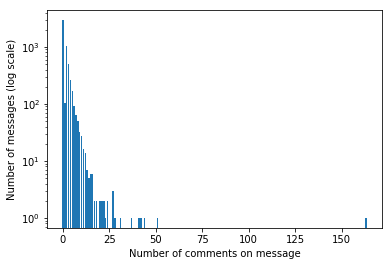

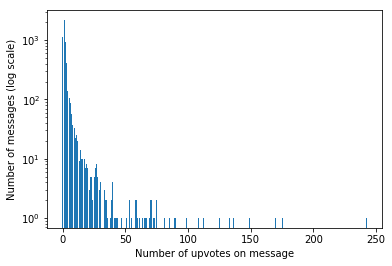

In [527]:
fig=plt.figure()
u, counts = np.unique(df['num_comments'].values, return_counts=True)
plt.bar(u, counts)
plt.yscale('log')
plt.ylabel('Number of messages (log scale)')
plt.xlabel('Number of comments on message')
plt.show()

fig=plt.figure()
u, counts = np.unique(df['ups'].values, return_counts=True)
plt.bar(u, counts)
plt.yscale('log')
plt.ylabel('Number of messages (log scale)')
plt.xlabel('Number of upvotes on message')
plt.show()

<h2>Look at the embeddings of the messages</h2>

In [528]:
op_examples_metadata=df.loc[df['is_op']==1, :].sample(n=num_samples_to_embed)
op_examples_metadata.reset_index(drop=True, inplace=True)
op_examples=op_examples_metadata['body'].tolist()
# print(op_examples)
with tf.Graph().as_default():
    with tf.device("/cpu:0"):
        module_url = "https://tfhub.dev/google/universal-sentence-encoder/2"
        embed = hub.Module(module_url)
        embeddings = embed(op_examples)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.tables_initializer())
        
        op_example_embeddings=sess.run(embeddings)

#         print(sess.run(embeddings))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [529]:
nop_examples_metadata=df.loc[df['is_op']==0, :].sample(n=num_samples_to_embed)
nop_examples_metadata.reset_index(drop=True, inplace=True)
nop_examples=nop_examples_metadata['body'].tolist()
# print(nop_examples)
with tf.Graph().as_default():
    with tf.device("/cpu:0"):
        module_url = "https://tfhub.dev/google/universal-sentence-encoder/2"
        embed = hub.Module(module_url)
        embeddings = embed(nop_examples)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.tables_initializer())
        
        nop_example_embeddings=sess.run(embeddings)

#         print(sess.run(embeddings))

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


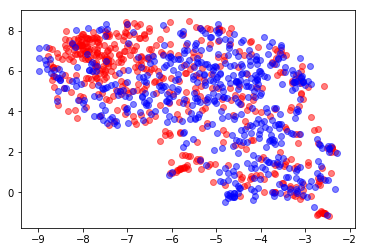

In [530]:
our_umap=umap.UMAP()
our_umap.fit(np.concatenate((op_example_embeddings, nop_example_embeddings)))
embedding_op=our_umap.transform(op_example_embeddings)
embedding_nop=our_umap.transform(nop_example_embeddings)

fig=plt.figure()

plt.scatter(embedding_op[:,0],embedding_op[:,1], c='r', alpha=0.5)
plt.scatter(embedding_nop[:,0], embedding_nop[:,1], c='b', alpha=0.5)

plt.show()

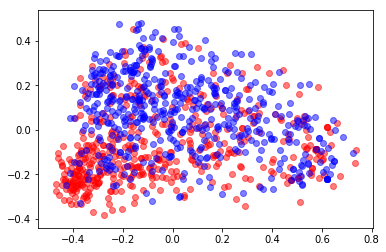

In [531]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)

pca.fit(np.concatenate((op_example_embeddings, nop_example_embeddings)))
embedding_op=pca.transform(op_example_embeddings)
embedding_nop=pca.transform(nop_example_embeddings)

fig=plt.figure()

plt.scatter(embedding_op[:,0],embedding_op[:,1], c='r', alpha=0.5)
plt.scatter(embedding_nop[:,0], embedding_nop[:,1], c='b', alpha=0.5)

plt.show()

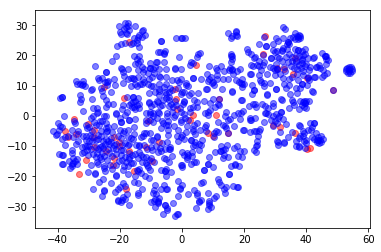

In [532]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2)

all_embedding=tsne.fit_transform(PCA(n_components=50).fit_transform(np.concatenate((op_example_embeddings, nop_example_embeddings))))
embedding_op=all_embedding[:50]
embedding_nop=all_embedding[50:]
fig=plt.figure()

plt.scatter(embedding_op[:,0],embedding_op[:,1], c='r', alpha=0.5)
plt.scatter(embedding_nop[:,0], embedding_nop[:,1], c='b', alpha=0.5)

plt.show()

<h2>Look at the relationship between points and metrics</h2>

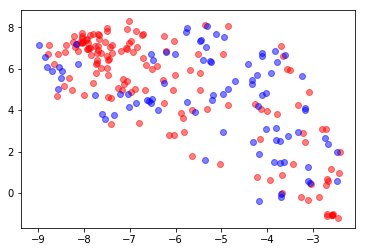

In [533]:
# for Umap

embedding_op=our_umap.transform(op_example_embeddings)
embedding_nop=our_umap.transform(nop_example_embeddings)

shortened_op=embedding_op[np.where(op_examples_metadata['num_comments']>2)]
shortened_nop=embedding_nop[np.where(nop_examples_metadata['num_comments']>2)]

fig=plt.figure()

plt.scatter(shortened_op[:,0],shortened_op[:,1], c='r', alpha=0.5)
plt.scatter(shortened_nop[:,0], shortened_nop[:,1], c='b', alpha=0.5)

plt.show()

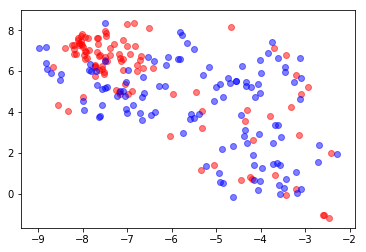

OP responses
['male 26 , resident third world nation, it was all going great until 2009. when severe clinical depression hit me. i used to be the smartest kid in my school and had a bright future in front of me. depression took toll on my cognitive skills and rendered me insecure, borderline retarded. managed to pass highschool and get a useless degree. iv always been fat and ugly but got good looks in 2011 owing to dietary changes. due to that i finally got a girlfriend. we were together until i got fat again. i cant even count change and shopkeepers often rip me off. i wish someday id wake up n my brain would be sharp again and i might salvage my life but its impossible. my nation has high inflation rate so even though ill inherit half a mil usd in assets, theyll be devalued so a regular income is needed to sustain. iv cut myself from everyone but my parents who view me as a burden. used to have bipolar but the mania isnt there anymore. meds made me even more retarded so gave them up

In [534]:
# for Umap

embedding_op=our_umap.transform(op_example_embeddings)
embedding_nop=our_umap.transform(nop_example_embeddings)

shortened_op=embedding_op[np.where(op_examples_metadata['ups']>2)]
shortened_nop=embedding_nop[np.where(nop_examples_metadata['ups']>2)]

fig=plt.figure()

plt.scatter(shortened_op[:,0],shortened_op[:,1], c='r', alpha=0.5)
plt.scatter(shortened_nop[:,0], shortened_nop[:,1], c='b', alpha=0.5)

plt.show()

print("OP responses")
print(op_examples_metadata.loc[op_examples_metadata['ups']>2, 'body'].sample(n=5).tolist())
print("Non OP responses")
print(nop_examples_metadata.loc[nop_examples_metadata['ups']>2, 'body'].sample(n=5).tolist())

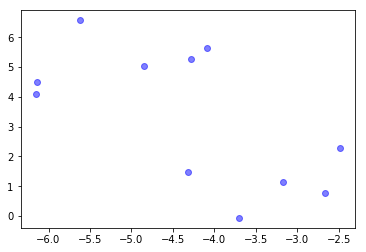

Non OP responses
['I do. Im agreeing this person is probably just venting not harming', 'cool', 'why are u telling us', 'Sounds like you need to find a job you like doing', 'This is so shocking,....life is hard .....whoever told u otherwise was wrong? Sleep on it chat to any1 online on fone anyting? U got this far so it proves u r a resilient fighter an fings will change? Life changes .....the clock never stops !hang in there an just change ya patterns of thought if u find yoself having negative thorts ??gd luck 1 💛💖✊']
OP responses
0


In [536]:
# for Umap

embedding_op=our_umap.transform(op_example_embeddings)
embedding_nop=our_umap.transform(nop_example_embeddings)

shortened_op=embedding_op[np.where(op_examples_metadata['downs']>0)]
shortened_nop=embedding_nop[np.where(nop_examples_metadata['downs']>0)]

fig=plt.figure()

plt.scatter(shortened_op[:,0],shortened_op[:,1], c='r', alpha=0.5)
plt.scatter(shortened_nop[:,0], shortened_nop[:,1], c='b', alpha=0.5)

plt.show()

#Show some examples
print("Non OP responses")
# for i in range(5):
print(nop_examples_metadata.loc[nop_examples_metadata['downs']>0, 'body'].sample(n=5).tolist())

print("OP responses")
print(len(op_examples_metadata.loc[op_examples_metadata['downs']>0, 'body']))
# print(op_examples_metadata.loc[op_examples_metadata['downs']>0, 'body'].sample(n=5).tolist())

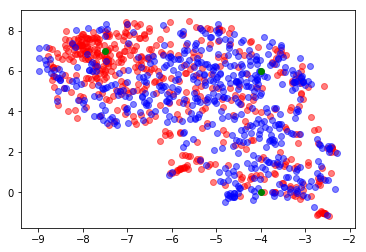

[-7.5  7. ]
nearest neighbours (2D):
I just want to kill myself to make the lives of other people worse because mine has been miserable for the longest time. I hate being partnerless and friendless. I've been like this forever. What am i good at? Saying jokes that people don't understand and playing fucking Halo. I wanted to do this since i was 12 cuz i never went out with people or had friends.
Bahaha! I like ur style
I meant to process your feelings, but I'm glad you aren't rushing into things
same. one moment i’ll be planning out my suicide and dead set on killing myself that night and then within a minute i’m fine. well, as ‘fine’ as i get
Same


[-4  0]
nearest neighbours (2D):
You could find the postal address of the organization and send them a Christmas card?
I'm so sorry you're going through all this. But stick with it; your kids need you and your life is worth it. Your partner is verbally abusing you. You work 2 jobs and take care of 2 kids. I'm betting that's double or tripl

In [545]:
#test outliers on umap
points=[np.asarray([-7.5,7]), np.asarray([-4,0]), np.asarray([-4,6])]


# for Umap

embedding_op=our_umap.transform(op_example_embeddings)
embedding_nop=our_umap.transform(nop_example_embeddings)

shortened_op=embedding_op[np.where(op_examples_metadata['ups']>-1)]
shortened_nop=embedding_nop[np.where(nop_examples_metadata['ups']>-1)]







fig=plt.figure()

plt.scatter(shortened_op[:,0],shortened_op[:,1], c='r', alpha=0.5)
plt.scatter(shortened_nop[:,0], shortened_nop[:,1], c='b', alpha=0.5)
for pt in points:
    plt.scatter(pt[0], pt[1], c='g')
plt.show()




for pt in points:
    k=5
    distances=np.sum(np.abs(pt.reshape(-1)[np.newaxis,:]-all_embeddings_2d)**2,axis=-1)**(1./2)
    idx = np.argpartition(distances, k)
    print(pt)
    print("nearest neighbours (2D):")
    for index in idx[:k]:
        if index<num_samples_to_embed:
            print(op_examples_metadata.loc[index, 'body'])
        else:
            print(nop_examples_metadata.loc[index%num_samples_to_embed, 'body'])
    print("\n")
    
    
num_duplicates=np.sum(df.duplicated(subset='body'))
print("num duplicates {}".format(num_duplicates))

print(set(df.loc[df.duplicated(subset='body'), 'body'].tolist()))

<h2>Try your own sentence embedding</h2>

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


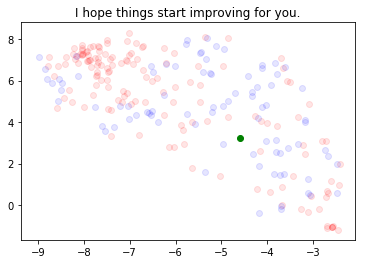

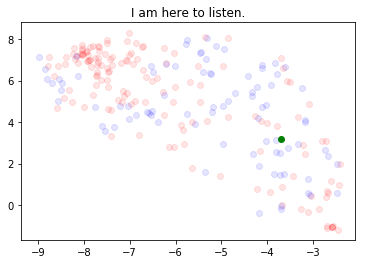

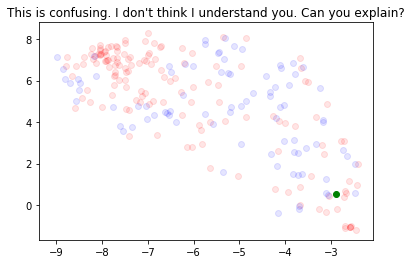

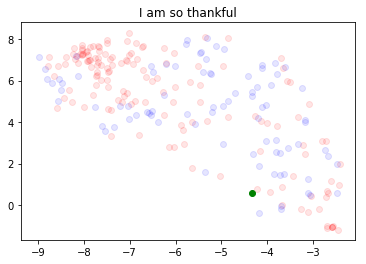

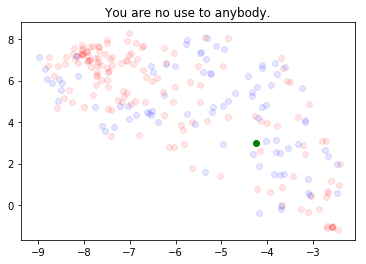

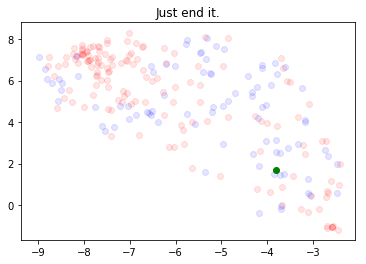

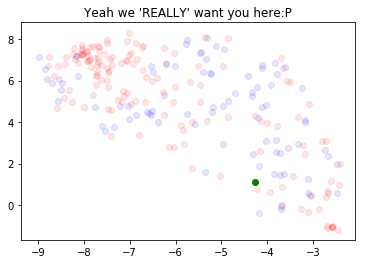

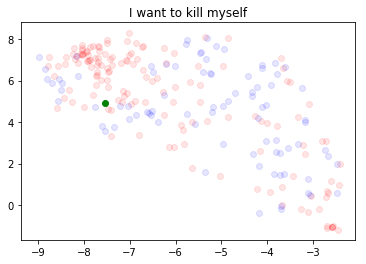

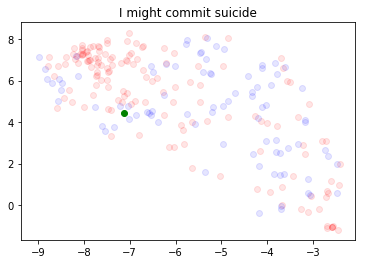

In [555]:
Examples=["I hope things start improving for you.", "I am here to listen.", "This is confusing. I don't think I understand you. Can you explain?", "I am so thankful", "You are no use to anybody.", "Just end it.", "Yeah we \'REALLY\' want you here:P", "I want to kill myself", "I might commit suicide"]
# print(op_examples)
with tf.Graph().as_default():
    with tf.device("/cpu:0"):
        module_url = "https://tfhub.dev/google/universal-sentence-encoder/2"
        embed = hub.Module(module_url)
        embeddings = embed(Examples)

    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.tables_initializer())
        
        your_example_embeddings=sess.run(embeddings)

showing="umap"

        
if showing=="umap":
    embedding_op=our_umap.transform(op_example_embeddings)
    embedding_nop=our_umap.transform(nop_example_embeddings)
    embedding_yours=our_umap.transform(your_example_embeddings)
elif showing=="PCA":
    embedding_op=pca.transform(op_example_embeddings)
    embedding_nop=pca.transform(nop_example_embeddings)
    embedding_yours=pca.transform(your_example_embeddings)



shortened_op=embedding_op[np.where(op_examples_metadata['num_comments']>2)]
shortened_nop=embedding_nop[np.where(nop_examples_metadata['num_comments']>2)]


for i in range(len(Examples)):
    fig=plt.figure()

    plt.scatter(shortened_op[:,0],shortened_op[:,1], c='r', alpha=0.1)
    plt.scatter(shortened_nop[:,0], shortened_nop[:,1], c='b', alpha=0.1)
    plt.scatter(embedding_yours[i,0], embedding_yours[i,1], c='g')
    plt.title(Examples[i])
    
    plt.show()




In [554]:
# KNN embedding
show_only_positive=True


all_embeddings=np.concatenate((op_example_embeddings, nop_example_embeddings))
all_embeddings_2d=np.concatenate((embedding_op, embedding_nop))
for i in range(len(Examples)):
    k=3
    distances=np.sum(np.abs(embedding_yours[i].reshape(-1)[np.newaxis,:]-all_embeddings_2d)**2,axis=-1)**(1./2)
    idx = np.argpartition(distances, k)
    
    print("Your sentence (2D):")
    print(Examples[i])
    print("\n")
    print("nearest neighbours (2D):")
    if show_only_positive:
        idx=np.argsort(distances)
        printed=0
        while printed<k:
            current, idx=idx[0], idx[1:]
            if current<num_samples_to_embed:
                if op_examples_metadata.loc[current, 'ups']>2:
                    print(op_examples_metadata.loc[current, 'body'])
                    printed+=1
            else:
                if nop_examples_metadata.loc[current%num_samples_to_embed, 'ups']>2:
                    print(nop_examples_metadata.loc[current%num_samples_to_embed, 'body'])
                    printed+=1
    else:
        for index in idx[:3]:
            if index<num_samples_to_embed:
                print(op_examples_metadata.loc[index, 'body'])
            else:
                print(nop_examples_metadata.loc[index%num_samples_to_embed, 'body'])
    print("\n")
        
    k=3
    distances=np.sum(np.abs(your_example_embeddings[i].reshape(-1)[np.newaxis,:]-all_embeddings)**2,axis=-1)**(1./2)
    idx = np.argpartition(distances, k)
    print("Your sentence:")
    print(Examples[i])
    print("\n")
    print("nearest neighbours:")
    if show_only_positive:
        idx=np.argsort(distances)
        printed=0
        while printed<k:
            current, idx=idx[0], idx[1:]
            if current<num_samples_to_embed:
                if op_examples_metadata.loc[current, 'ups']>2:
                    print(op_examples_metadata.loc[current, 'body'])
                    printed+=1
            else:
                if nop_examples_metadata.loc[current%num_samples_to_embed, 'ups']>2:
                    print(nop_examples_metadata.loc[current%num_samples_to_embed, 'body'])
                    printed+=1
    else:
        for index in idx[:3]:
            if index<num_samples_to_embed:
                print(op_examples_metadata.loc[index, 'body'])
            else:
                print(nop_examples_metadata.loc[index%num_samples_to_embed, 'body'])
    print("\n")
    
    


Your sentence (2D):
I hope things start improving for you.


nearest neighbours (2D):
You need to read my latest post, we are literally on the same boat... let’s stay positive and try your hardest!! We got this
HAPPY BIRTHDAY!!!🎂🤗 I hope you give "being 18" a chance. Best of luck and cheers!🍻
happy birthday!


Your sentence:
I hope things start improving for you.


nearest neighbours:
Thank you so much for the sharing, i hope you're still doing well by now.
That sounds really beautiful, and I'm happy to hear you're in a better place now. Someday I hope I can find strength like yours.
I'm going to do it today as well. I'm sorry to hear you're in my same spot.


Your sentence (2D):
I am here to listen.


nearest neighbours (2D):
Changing thermocouples, safety vales in catdaynes is job #1 today. Helping with a lock out and station shut down right now. What are you getting up to today?
Please talk to us. We want to be your friends :)
Hey Veg. I know youre hurting. If you feel like talking 